# Data Cleaning for OpenFoodFacts

## Dataset Description

Dataset Description...

In [1]:
# Import libraries

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import csv

#import re
import regex as re

import os
from pathlib import Path

In [2]:
# Parameters

path = str(Path(os.path.abspath(os.getcwd())).parent.absolute())
openfoodfactsUrl = path + '/data/en.openfoodfacts.org.products.csv'
foodtableUrl = path + '/data/data_2.tsv'

ingredients_tx = path + '/data/ingredients.txt'
additives_tx = path + '/data/additives.txt'
vitamins_tx = path + '/data/vitamins.txt'
packaging_materials_tx = path + '/data/packaging_materials.txt'
packaging_shapes_tx = path + '/data/packaging_shapes.txt'
labels_tx = path + '/data/labels.txt'

savePath =  path + '/data/foodDB/'

## Helper Functions

Helper functions...

In [5]:
# Plotting the dataset

def plotMissingValues(dataframe, width, high, character=False):
    plt.figure(figsize=(width, high)) 
    if character==False:
        ax = dataframe.isnull().sum().plot.barh(color='skyblue') 
    else:
        occurrences = (dataframe == character).sum().sort_values(ascending=True)
        ax = occurrences.plot.barh(color='skyblue') 


    # Customizing the plot

    plt.title('Missing Values per Column', fontsize=16)
    plt.xlabel('Number of Missing Values', fontsize=12)
    plt.ylabel('Columns', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7) 
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)


    # Display the values on the bars
    
    if character==False:
        for i, v in enumerate(dataframe.isnull().sum()):
            ax.text(v + 500, i, str(v), color='gray', va='center', fontsize=8)
    else:
        for i, v in enumerate(occurrences):
            ax.text(v + 500, i, str(v), color='gray', va='center', fontsize=8)

    plt.tight_layout()
    plt.show()

## Import Data (Chunk)

Load the data (one chunk) from a .tsv file

In [6]:
# Load the data
chunk_size = 100000
chunks_df = pd.read_csv(openfoodfactsUrl, sep="\t", chunksize=chunk_size)

for chunk_df in chunks_df:
    print(chunk_df.shape)
    break

(100000, 203)


E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,9,15,31,33,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data Exploration (Chunk)

Data Exploration...

In [7]:
# View columns name

print(chunk_df.columns.values)

chunk_df.shape

['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'last_modified_by' 'product_name'
 'abbreviated_product_name' 'generic_name' 'quantity' 'packaging'
 'packaging_tags' 'packaging_en' 'packaging_text' 'brands' 'brands_tags'
 'categories' 'categories_tags' 'categories_en' 'origins' 'origins_tags'
 'origins_en' 'manufacturing_places' 'manufacturing_places_tags' 'labels'
 'labels_tags' 'labels_en' 'emb_codes' 'emb_codes_tags'
 'first_packaging_code_geo' 'cities' 'cities_tags' 'purchase_places'
 'stores' 'countries' 'countries_tags' 'countries_en' 'ingredients_text'
 'ingredients_tags' 'ingredients_analysis_tags' 'allergens' 'allergens_en'
 'traces' 'traces_tags' 'traces_en' 'serving_size' 'serving_quantity'
 'no_nutrition_data' 'additives_n' 'additives' 'additives_tags'
 'additives_en' 'nutriscore_score' 'nutriscore_grade' 'nova_group'
 'pnns_groups_1' 'pnns_groups_2' 'food_groups' 'food_groups_tags'
 'food_groups_en' 'states' 'states_tags' 

(100000, 203)

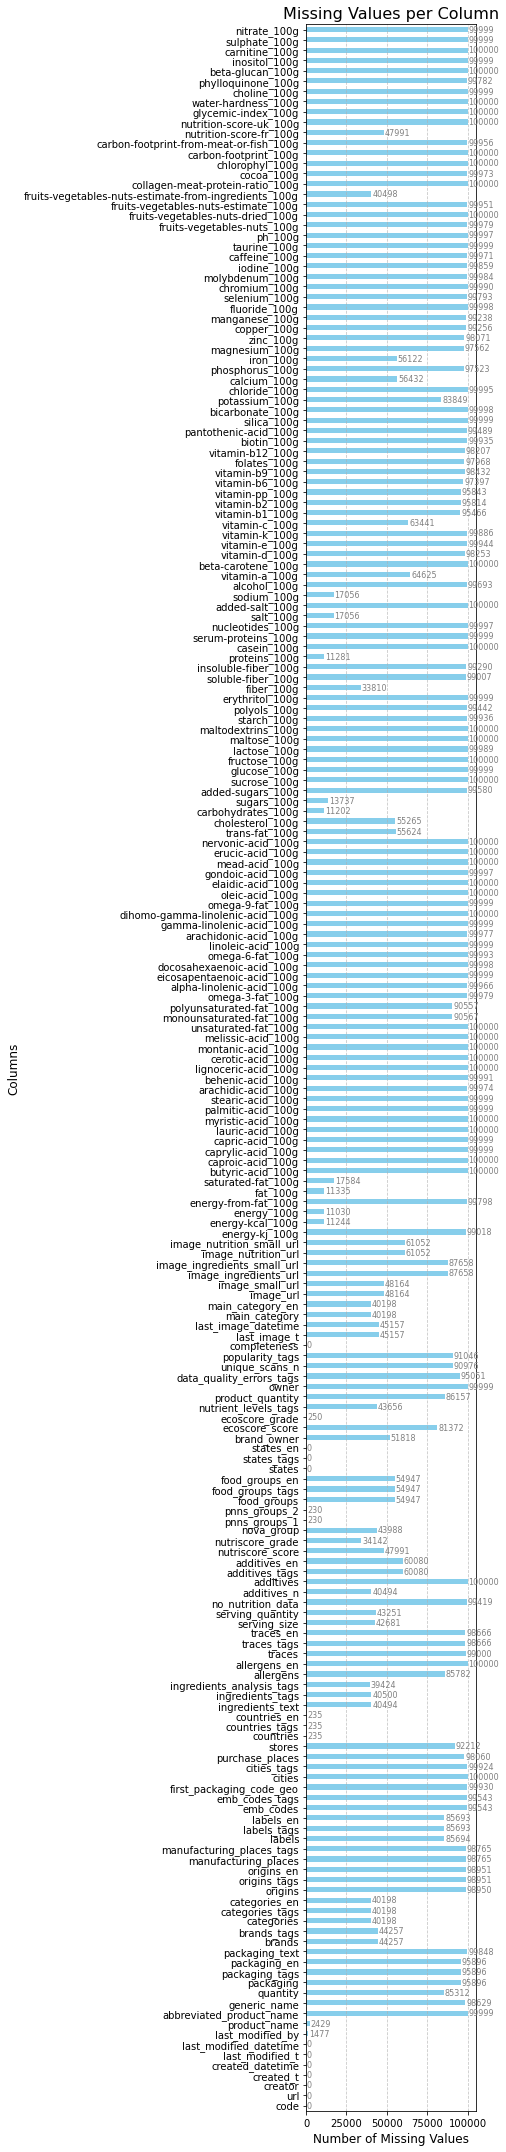

In [8]:
# Plotting the dataset
    
plotMissingValues(chunk_df, 7, 30)

## Import Data

Load the data from a .tsv file

In [9]:
# Create the filter
# $ = keep as is | - = don't keep | ? - keep as optional | t = translate

df_filter = ["code", #$$$$$$
             "product_name", #$$$$$$
             "packaging_tags", #?t?t?t (enumerate)
             "brands", #??????
             "brands_tags", #??????
             "labels_en", #t?t?t? (da processare)
             "countries_en", #$$$$$$ (importare il dataset poi - o countries-tags)
             "ingredients_tags", #$t$t$t (tassonomia - o ingredients_text o ingredients_analysis_tags)
             "serving_size", #??????
             "additives_n", #------ Usato solo per processare additives_tags
             "additives_tags", #?????? (importare il dataset poi)
             "nutriscore_score", #??????
             "nutriscore_grade", #??????
             "nova_group", #??????
             "food_groups", #??????
             "food_groups_tags", #?????? (o food_groups_en)
             "brand_owner", #??????
             "ecoscore_grade", #??????
             #"main_category_en", #------ (sostituito da food_groups_en)
             "energy-kcal_100g", #$$$$$$
             "energy_100g", #$$$$$$
             "fat_100g", #$$$$$$$
             "saturated-fat_100g", #??????
             "trans-fat_100g", #??????
             "cholesterol_100g", #??????
             "carbohydrates_100g", #$$$$$$
             "sugars_100g", #??????
             "fiber_100g", #??????
             "proteins_100g", #$$$$$$
             "salt_100g", #??????
             "sodium_100g", #??????
             "vitamin-a_100g", #??????
             "vitamin-c_100g", #??????
             "calcium_100g", #??????
             "iron_100g"] #??????

In [10]:
filter_df = pd.read_csv(openfoodfactsUrl, sep="\t", usecols=df_filter)

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,50,54,65) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data Exploration

Data Exploration...

In [11]:
# View columns name

print(filter_df.columns.values)

filter_df.shape

['code' 'product_name' 'packaging_tags' 'brands' 'brands_tags' 'labels_en'
 'countries_en' 'ingredients_tags' 'serving_size' 'additives_n'
 'additives_tags' 'nutriscore_score' 'nutriscore_grade' 'nova_group'
 'food_groups' 'food_groups_tags' 'brand_owner' 'ecoscore_grade'
 'energy-kcal_100g' 'energy_100g' 'fat_100g' 'saturated-fat_100g'
 'trans-fat_100g' 'cholesterol_100g' 'carbohydrates_100g' 'sugars_100g'
 'fiber_100g' 'proteins_100g' 'salt_100g' 'sodium_100g' 'vitamin-a_100g'
 'vitamin-c_100g' 'calcium_100g' 'iron_100g']


(3022567, 34)

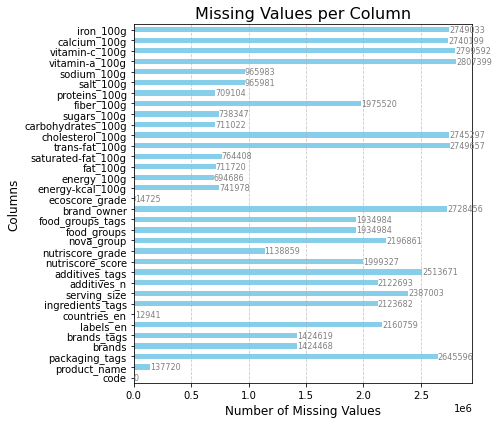

In [12]:
# Plotting the dataset
    
plotMissingValues(filter_df, 7, 6)

## Data Cleaning

Data Cleaning...

In [13]:
# Replace null values in additives_tags with empty string if additives_n is 0

def replace_null(row):
    if row['additives_n'] == 0 and pd.isnull(row['additives_tags']):
        return ""
    else:
        return row['additives_tags']
    
def replace_null_bycoll(row, col):
    if pd.isnull(row[col]):
        return ""
    else:
        return row[col]
    

filter_df['additives_tags'] = filter_df.apply(replace_null, axis=1)

filter_df["packaging_tags"] = filter_df.apply(replace_null_bycoll, args=('packaging_tags',), axis=1)
filter_df["brands"] = filter_df.apply(replace_null_bycoll, args=('brands',), axis=1)
filter_df["brands_tags"] = filter_df.apply(replace_null_bycoll, args=('brands_tags',), axis=1)
filter_df["labels_en"] = filter_df.apply(replace_null_bycoll, args=('labels_en',), axis=1)
filter_df["serving_size"] = filter_df.apply(replace_null_bycoll, args=('serving_size',), axis=1)
filter_df["nutriscore_score"] = filter_df.apply(replace_null_bycoll, args=('nutriscore_score',), axis=1)
filter_df["nutriscore_grade"] = filter_df.apply(replace_null_bycoll, args=('nutriscore_grade',), axis=1)
filter_df["nova_group"] = filter_df.apply(replace_null_bycoll, args=('nova_group',), axis=1)
filter_df["food_groups"] = filter_df.apply(replace_null_bycoll, args=('food_groups',), axis=1)
filter_df["food_groups_tags"] = filter_df.apply(replace_null_bycoll, args=('food_groups_tags',), axis=1)
#filter_df["food_groups_en"] = filter_df.apply(replace_null_bycoll, args=('food_groups_en',), axis=1)
filter_df["brand_owner"] = filter_df.apply(replace_null_bycoll, args=('brand_owner',), axis=1)
filter_df["ecoscore_grade"] = filter_df.apply(replace_null_bycoll, args=('ecoscore_grade',), axis=1)
#filter_df["main_category_en"] = filter_df.apply(replace_null_bycoll, args=('main_category_en',), axis=1)
filter_df["saturated-fat_100g"] = filter_df.apply(replace_null_bycoll, args=('saturated-fat_100g',), axis=1)
filter_df["trans-fat_100g"] = filter_df.apply(replace_null_bycoll, args=('trans-fat_100g',), axis=1)
filter_df["cholesterol_100g"] = filter_df.apply(replace_null_bycoll, args=('cholesterol_100g',), axis=1)
filter_df["sugars_100g"] = filter_df.apply(replace_null_bycoll, args=('sugars_100g',), axis=1)
filter_df["fiber_100g"] = filter_df.apply(replace_null_bycoll, args=('fiber_100g',), axis=1)
filter_df["salt_100g"] = filter_df.apply(replace_null_bycoll, args=('salt_100g',), axis=1)
filter_df["sodium_100g"] = filter_df.apply(replace_null_bycoll, args=('sodium_100g',), axis=1)
filter_df["vitamin-a_100g"] = filter_df.apply(replace_null_bycoll, args=('vitamin-a_100g',), axis=1)
filter_df["vitamin-c_100g"] = filter_df.apply(replace_null_bycoll, args=('vitamin-c_100g',), axis=1)
filter_df["calcium_100g"] = filter_df.apply(replace_null_bycoll, args=('calcium_100g',), axis=1)
filter_df["iron_100g"] = filter_df.apply(replace_null_bycoll, args=('iron_100g',), axis=1)

In [14]:
# Apply the filter to the Dataframe

food_table = filter_df[df_filter].copy()

food_table["isempty"] = np.where(food_table.isnull().sum(axis=1) >= 1, 1, 0)
percentage = food_table.isempty.value_counts()[1] / food_table.shape[0] * 100
print("Percentage of dropped rows: " + str(percentage))

food_table = food_table[food_table.isempty==0].copy()
food_table.isnull().sum()

food_table.drop("isempty", inplace=True,axis=1)
food_table.dropna(axis = 0, how = "any", inplace=True)

Percentage of dropped rows: 75.54049256807211


In [15]:
food_table.shape

(739305, 34)

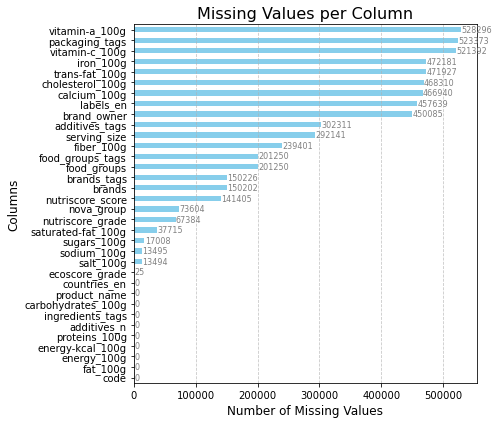

In [16]:
# Plotting the dataset
    
plotMissingValues(food_table, 7, 6, character="")

In [17]:
pd.set_option('display.max_columns', None)
food_table.head()

code            product_name packaging_tags  \
32  0000000001199  Solène céréales poulet                  
40  0000000001663  Crème dessert chocolat                  
49  0000000002264       Baguette Poitevin                  
62  0000000003827          Suedois saumon                  
68  0000000004510   Salade shaker taboulé                  

                     brands              brands_tags labels_en countries_en  \
32                    CROUS                    crous                 France   
40  Ferme De La Frémondière  ferme-de-la-fremondiere                 France   
49              Crous resto              crous-resto                 France   
62                    Crous                    crous                 France   
68                    Crous                    crous                 France   

                                     ingredients_tags serving_size  \
32  en:antioxidant,en:colour,en:tomato,en:vegetabl...                
40  en:whole-milk,en:dairy,en:milk,en:sugar,en:add...                
49  fr:baguette-poite-vin-pain-baguette,en:water,e...                
62  fr:paln-suedois,en:water,en:rye-flour,en:flour...                
68  fr:taboule,en:vegetable,en:colza-oil,en:oil-an...                

   additives_n                            additives_tags nutriscore_score  \
32           5  en:e150,en:e160a,en:e202,en:e316,en:e466                    
40           1                                   en:e406                    
49           0                                                              
62           2                           en:e300,en:e503                    
68           1                                   en:e202                    

   nutriscore_grade nova_group food_groups food_groups_tags brand_owner  \
32          unknown          4                                            
40          unknown          4                                            
49          unknown          4                                            
62          unknown          4                                            
68          unknown          4                                            

   ecoscore_grade  energy-kcal_100g  energy_100g  fat_100g saturated-fat_100g  \
32        unknown             219.0        916.0       5.9                0.5   
40        unknown               0.0          0.0       0.0                  0   
49        unknown             207.0        866.0       6.7                3.8   
62        unknown             172.0        720.0       4.4                1.2   
68        unknown             114.0        477.0       8.1                0.9   

   trans-fat_100g cholesterol_100g  carbohydrates_100g sugars_100g fiber_100g  \
32                                                30.3         1.7        2.8   
40                                                 0.0           0              
49                                                27.5         0.6        1.7   
62                                                23.3         4.6        2.7   
68                                                 5.7         1.4        1.7   

    proteins_100g salt_100g sodium_100g vitamin-a_100g vitamin-c_100g  \
32            9.7     0.464      0.1856                                 
40            0.0         0           0                                 
49            8.9       0.4        0.16                                 
62            8.4      3.58       1.432                                 
68            3.9      0.31       0.124                                 

   calcium_100g iron_100g  
32                         
40                         
49                         
62                         
68

## Save or Load the Dataset

In [18]:
# Save the new Dataset

food_table.to_csv(path + '/data/data_2.tsv', sep='\t', index=False)

In [3]:
# Import the Dataset

#food_table = pd.read_csv(foodtableUrl, sep="\t", na_values=['unknown'], keep_default_na=False)
food_table = pd.read_csv(foodtableUrl, sep="\t", na_values='unknown')

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Ingredients Counter

In [20]:
ingredients_map = {}

def cl_ingredients(text, ingredients_map, debug = False):
    

    # Pattern to split the text
    
    # pattern = r"[,.()\[\]{}]"
    pattern = r"[,]"
    split_text = re.split(pattern, text)

    for ingredient in split_text:
        if ingredient in ingredients_map:
            ingredients_map[ingredient] += 1
        else:
            ingredients_map[ingredient] = 1
    
   
    if debug:
        print(text)
#        print(text)
        
    #return ', '.join(result)

#cl_ingredients(food_table.at[32, 'ingredients_tags'], ingredients_map, False)
food_table['ingredients_tags'].apply(cl_ingredients, args=(ingredients_map,))
print(len(ingredients_map))

843048


In [21]:
# File path to save the CSV data
file_path = path + '/data/ingrediets_2.tsv'

sorted_ingredients = dict(sorted(ingredients_map.items(), key=lambda x: x[1], reverse=True))

# Writing the dictionary to a CSV file with tab-separated values
with open(file_path, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file, delimiter='\t')
    writer.writerow(['Ingredient', 'Count'])  # Writing header
    for ingredient, count in sorted_ingredients.items():
        writer.writerow([ingredient, count])

print(f"Dictionary has been written to {file_path}")

Dictionary has been written to C:\Users\Vaidas\Documents\GitHub\graphle/data/ingrediets_2.tsv


## Read Taxonomy

In [79]:
def split_line(text):
    
    split_text = re.split(':', text)
    
    language_tag = split_text[0]
    ingredients_text = split_text[1]
    
    ingredients = re.split(', ', ingredients_text)
    stripped_ingredients = [ingredient.strip().lower().replace(" ", "-") for ingredient in ingredients]
    
    return language_tag, stripped_ingredients

def check_synonyms(in_item, synonym_set, stopword_set):
    out = []
    split_in_item = re.split(':', in_item)
    in_tag = split_in_item[0]
    if in_tag in synonym_set:
        for syn_list in synonym_set[in_tag]:
            for syn in syn_list:
                if re.search(f'(^{syn}-)|(-{syn}-)|-{syn}$',split_in_item[1]):
                    for syn2 in syn_list:
                        if syn != syn2:
                            out.append(re.sub(syn, syn2, split_in_item[1]))
            if len(out) != 0:
                break
    if in_tag in stopword_set:
        for stopword in stopword_set[in_tag]:
            if re.search(f'(^{stopword}-)|(-{stopword}-)|-{stopword}$',split_in_item[1]):
                out.append(re.sub('--+', '-', re.sub(stopword, '', split_in_item[1])))
    #if len(out) != 0:
        #print(in_item)
        #print(out)
    return out
                
    
    

In [82]:
#Create synonym and stopword base

def extract_synonyms(file, synonym_set):
    
    cur_line = file.readline()
    while cur_line != '':
        if re.match('^synonyms:[a-z]{2}:', cur_line):
            new_item = re.match('^synonyms:[a-z]{2}:[^#]*', cur_line).group()
            split_item = re.split(':', new_item)
            new_tag = split_item[1]
            new_syns = []
            for word in re.split(',', split_item[2]):
                new_syns.append(word.strip().lower().replace(' ', '-'))
            if '' in new_syns:
                new_syns.remove('')
            if new_tag in synonym_set:
                synonym_set[new_tag].append(new_syns)
            else:
                synonym_set[new_tag] = [new_syns]
        cur_line = file.readline()
    return synonym_set


def extract_stopwords(file, stopword_set):
    
    cur_line = file.readline()
    while cur_line != '':
        if re.match('^stopwords:[a-z]{2}:', cur_line):
            new_item = re.match('^stopwords:[a-z]{2}:[^#]*', cur_line).group()
            split_item = re.split(':', new_item)
            new_tag = split_item[1]
            new_stops = []
            for word in re.split(',', split_item[2]):
                new_stops.append(word.strip().lower().replace(' ', '-'))
            if new_tag not in stopword_set:
                stopword_set[new_tag] = []
            for stop in new_stops:
                stopword_set[new_tag].append(stop)
        cur_line = file.readline()
    for key in stopword_set:
        stopword_set[key] = list(set(stopword_set[key]))
    return stopword_set

synonym_set = {}
stopword_set = {}

with open(ingredients_tx, 'r', encoding='utf-8') as file:
    extract_synonyms(file, synonym_set)
    file.seek(0)
    extract_stopwords(file, stopword_set)
    file.close()

with open(additives_tx, 'r', encoding='utf-8') as file:
    extract_synonyms(file, synonym_set)
    file.seek(0)
    extract_stopwords(file, stopword_set)
    file.close()
    
with open(vitamins_tx, 'r', encoding='utf-8') as file:
    extract_synonyms(file, synonym_set)
    file.seek(0)
    extract_stopwords(file, stopword_set)
    file.close()
    
with open(packaging_materials_tx, 'r', encoding='utf-8') as file:
    extract_synonyms(file, synonym_set)
    file.seek(0)
    extract_stopwords(file, stopword_set)
    file.close()
    
with open(packaging_shapes_tx, 'r', encoding='utf-8') as file:
    extract_synonyms(file, synonym_set)
    file.seek(0)
    extract_stopwords(file, stopword_set)
    file.close()
    
with open(labels_tx, 'r', encoding='utf-8') as file:
    extract_synonyms(file, synonym_set)
    file.seek(0)
    extract_stopwords(file, stopword_set)
    file.close()
    
print(synonym_set)
print(stopword_set)
    

{'en': [['fiber', 'fibre'], ['hydrolysed', 'hydrolyzed'], ['pasteurised', 'pasteurized'], ['wholemeal', 'whole', 'whole-grain', 'wholegrain', 'complete'], ['semi-wholemeal', 'semi-whole', 'semi-whole-grain', 'semi-wholegrain', 'semi-complete', 'semiwhole', 'semiwholemeal'], ['semi-sweet', 'semisweet'], ['fd&c', 'fd-and-c', 'fdc', 'ffdca', 'fdca'], ['n°', 'no', 'number', 'nb'], ['no1', 'n1', '1'], ['no2', 'n2', '2'], ['no3', 'n3', '3'], ['no4', 'n4', '4'], ['no5', 'n5', '5'], ['no6', 'n6', '6'], ['no7', 'n7', '7'], ['no8', 'n8', '8'], ['no9', 'n9', '9'], ['no10', 'n10', '10'], ['no11', 'n11', '11'], ['no12', 'n12', '12'], ['colour', 'color'], ['biobased', 'bio-based', 'biosourced', 'bio-sourced'], ['coloring', 'colouring', 'color', 'colour'], ['flavor', 'flavour', 'flavoring', 'flavouring'], ['gmos', 'genetically-modified-organisms', 'gmo'], ['rich-in', 'high-in'], ['msg', 'glutamate'], ['preservatives', 'conservatives'], ['seafood', 'sea-food'], ['without', '0%', 'free'], ['carbon', 'c

Ingredients

In [ ]:
# Read the taxonomy line by line and add each element to a dictionary

ingredients_tx_map = {}
master = ''
master_tag = ''
start = True
count_masters = 0

with open(ingredients_tx, 'r', encoding='utf-8') as file:
    
    for line in file:
        
        # Iterate until ingredients
        if start and '# # # # # # # # # # # # # #' not in line:
            continue
        else:
            start = False
            
        # Check if there is a new section
        if line == '\n':
            master = ''
            #print('reset')
            
        # Skip the line if is a comment or if is not a valid line
        if '#' in line or line.count(':') != 1 or '<' in line:
            continue
        
        language_tag, ingredients = split_line(line)
        
        # Add the line to the dictionary
        if language_tag == 'en' or master == '':
            master = ingredients[0]
            master_tag = language_tag
            count_masters += 1
        
        for ingredient in ingredients:
            ingredient = ingredient
            ingredients_tx_map[language_tag+':'+ingredient] = master_tag+':'+master
        
        
    print('# of elements in the dictionary: ' + str(len(ingredients_tx_map)))
    print('# of master elements in the dictionary: ' + str(count_masters) + '\n')
    print(ingredients_tx_map)

In [113]:
ing_dict = {}

with open(ingredients_tx, 'r', encoding='utf-8') as file:
    
    cur_line = file.readline()
    while cur_line != '':
        cur_ing = ''
        super_items = []
        if re.match('^<?[a-z]{2}:', cur_line):
            while re.match('^<[a-z]{2}:', cur_line):
                new_item = re.match('^<[a-z]{2}:[^#]*', cur_line).group()
                new_item = re.split(':', new_item)[1]
                super_items.append(re.sub('"', "'", re.sub('--+', '-', new_item.strip().lower().replace(' ', '-'))))
                cur_line = file.readline()
            while cur_line != '\n' and cur_line != '':
                if re.match('^[a-z]{2}:', cur_line):
                    new_item = re.match('^[a-z]{2}:[^#]*', cur_line).group()
                    new_item = re.split(':', new_item)
                    new_tag = new_item[0]
                    new_items = re.split(',', new_item[1])
                    for item in new_items:
                        item = re.sub('"', "'", re.sub('--+', '-', item.strip().lower().replace(' ', '-')))
                    if cur_ing == '':
                        cur_ing = re.sub('"', "'", re.sub('--+', '-', new_items[0].strip().lower().replace(' ', '-')))
                        ing_dict[cur_ing] = [super_items,[]]
                    for item in new_items:
                        f_name = re.sub('"', "'", re.sub('--+', '-', item.strip().lower().replace(' ', '-')))
                        f_item = f"{new_tag}:{f_name}"
                        ing_dict[cur_ing][1].append(f_item)
                        for synoym in check_synonyms(f_item, synonym_set, stopword_set):
                            ing_dict[cur_ing][1].append(f"{new_tag}:{synoym}")
                cur_line = file.readline()
            if(cur_ing != ''):
                ing_dict[cur_ing][1] = list(set(ing_dict[cur_ing][1]))
                print(cur_ing + f":\n{ing_dict[cur_ing]}\n")
        cur_line = file.readline()
    file.close()

imazalil:
[[], ['sk:imazalil', 'hu:imazalil', 'es:imazalil', 'sl:imazalil', 'en:imazalil', 'it:imazalil', 'fr:imazalil', 'ja:イマザリル', 'nl:imazalil', 'da:imazalil', 'fa:انیل\u200cکونازول', 'pt:imazalil', 'pl:imazalil', 'fi:imatsaliili', 'de:imazalil']]

frying:
[[], ['fr:friture', 'en:frying']]

caramel-syrup:
[[], ['ca:xarop-de-carmel', 'fr:sirop-de-caramel', 'de:karamellsirup', 'lt:karamelizuoto-sirupo', 'ja:キャラメルシロップ', 'hu:karamella-szirup', 'hr:karamelov-sirup', 'it:sciroppo-di-caramello', 'fr:sirop-caramel', 'es:jarabe-de-caramelo', 'de:caramelsirup', 'ca:xarop-carmel', 'es:sirope-de-caramelo', 'da:karamelsukkersirup', 'ru:карамельный-сироп', 'en:caramel-syrup', 'bg:карамелен-сироп', 'hr:karamelizirani-sirup', 'es:jarabe-caramelo', 'lt:karamelizuotas-sirupas', 'pt:xarope-de-caramelo', 'pt:xarope-caramelo', 'es:sirope-caramelo', 'ja:カラメルシラップ', 'ca:caramel-liquid', 'es:caramelo-líquido', 'pl:syrop-karmelowy', 'hr:karamel-sirup', 'hu:karamellszirup', 'hu:karamell-szirup', 'fi:karamelli

sunflower-lecithin:
[['e322(i)'], ['hr:lecitin-suncokreta', 'el:λεκιθίνες-ηλιστροπιου', 'pl:lecytyny-słonecznikowe', 'et:päevalilleletsitiin', 'lv:lecitinai-iš-saulègrąžų', 'pl:lecytyny-ze-słonecznika', 'lt:saulėgrąžų-lecitinai', 'bg:слънчогледов-лецитин', 'nb:solsikkelecitin', 'pl:lecytyna-słonecznika', 'de:sonnenblumen-lecithine', 'lt:lecitinai-iš-saulėgrąžų', 'et:päevalille-letsitiin', 'ca:lecitina-gira-sol', 'fr:lécithine-tournesol', 'ca:lecitines-gira-sol', 'de:sonnenblumenlecithin', 'nb:solsikkelecithin', 'lv:saulespuku-lecitīns', 'sk:slnečnicový-lecitín', 'ca:lecitines-de-gira-sol', 'de:sonnenblumenlecithine', 'fr:lécithine-de-tournesol', 'it:lecitine-di-girasole', 'en:sunflower-lecithin', 'pl:lecytyna-słonecznikowa', 'ro:lecitina-de-florarea-soarelui', 'fi:auringonkukkalesitiiniä', 'lt:emulsiklis-lecitinai-(saulėgrąžų)', 'nl:zonnebloemlecithine', 'es:lecitina-de-girasol', 'lt:lecitinai-saulėgrąžų', 'sv:solroslecitin', 'cs:slunečnicový-lecitin', 'it:lecitina-di-girasole', 'nn:so

mono-et-diglycerides-d'acides-gras-de-palme:
[['mono-and-diglycerides-of-fatty-acids-of-vegetable-origin'], ["fr:monoglycérides-diglycérides-d'acide-gras-de-palme", "fr:monoglycérides-et-diglycérides-d'acide-matières-grasses-de-palme", "fr:monoglycéris-et-diglycéris-d'aci-gras-palme", "fr:mono-et-diglycerides-d'acides-matières-grasses-de-palme", "fr:monoglycérides-et-diglycérides-d'acide-mg-de-palme", "fr:mono-et-diglycerides-d'acides-mg-de-palme", 'es:monoglicéridos-y-diglicéridos-de-ácidos-grasos-de-palma', 'es:monoglicéridos-y-diglicéridos-ácidos-grasos-palma', 'es:monoglicéridos-acidos-grasos-palma', "fr:mono-diglycerides-d'acides-gras-de-palme", "ca:monoglicèrids-i-diglicèrids-d'àcids-grassos-de-palma", 'es:monoglicéridos-de-acidos-grasos-de-palma', "ca:monoglcèrds-dglcèrds-d'àcds-grassos-de-palma", "fr:monoglycérides-et-diglycérides-d'acide-gras-de-palme", 'es:monoglicéridos-diglicéridos-de-ácidos-grasos-de-palma', 'es:diglicéridos-ácidos-grasos-palma', "ca:diglicèrids-d'àcids-gr

coagulating-enzyme:
[['enzyme'], ['sv:koagulerande-enzym', 'nl:stremmingsenzymen', 'nl:stollingsmiddel', 'bg:коагулиращ-ензим', 'sv:mjölkkoagulerande-enzym', 'es:enzima-coagulante', 'fi:hyydytysentsyymi', 'en:coagulating-enzyme', 'cs:koagulační-enzym', 'pl:enzym-koagulujący', 'bg:коагулиращи-ензими', 'it:enzima-coagulante', 'sv:mjölkkoagulerande-ystenzym', 'fr:enzymes-coagulantes', 'pt:coagulante', 'hu:koaguláló-enzim', 'fr:coagulant-enzymatique', 'de:gerinnendes-enzym', 'fr:enzyme-coagulante', 'ru:молокосвертывающий-фермент']]

microbial-coagulating-enzyme:
[['coagulating-enzyme'], ['bg:сирище-с-микробиален-произход', 'fr:enzyme-coagulante-microbienne', 'ca:coagulant-llet-microbià', 'en:microbial-coagulating-enzyme', 'de:mikrobieller-labaustauschstoff', 'en:microbial-enzyme', 'ca:coagulant-de-llet-microbià', 'ru:ферментный-препарат-микробного-происхождения', 'es:encima-coagulate-microbiana', "fr:enzyme-coagulante-d'origine-microbienne", 'ca:coagulant-microbià', 'bg:ирище-микробиален-п

bifidus:
[['lactic-ferments'], ['vi:vi-khuẩn-bifidus', 'en:bifidus-culture', 'hu:bifidusz', 'nl:bifidus', 'uk:біфідобактерії', 'hu:bifiduszbaktérium', 'fr:culture-de-bifidus', 'hu:bifidus', 'la:bifidobacterium', 'es:cultivos-bifidus', 'ca:bifidobacteri', 'tr:bifido-bakterisi', 'fr:bifidus', 'fr:culture-bifidus', 'hr:bifidobacterium-bb-12', 'nl:bifidobacterium', 'pt:bifidus', 'ca:bifidus', 'sv:bifidobacterium', 'en:bifidus', 'fr:bifidobacteries', 'hr:bifidobacterium', 'sv:bifidobacterium-sp', 'it:bifidobacterium', 'fr:bifidobactérium', 'ka:ბიფიდობაქტერიები', 'uz:bifidobakteriyalar', 'et:bifidobakter', 'bg:бифидус', 'fr:bifidobactéries', 'hu:bifidusz-kultúra', 'fa:بیفیدوباکتر', 'ru:бифидобактерии', 'ja:ビフィズス菌', 'kk:бифидобактериялар', 'es:bifidobacterium', 'es:bifidus', 'zh:雙歧桿菌屬', 'de:bifidus', 'fi:bifidus', 'fi:bifidus-viljelmä', 'es:bifidobacterias']]

bifidobacterium-bifidum:
[['bifidus'], ['fi:bifidobacterium-sp', 'en:bifidobacterium-bifidum', 'hr:bifidobacterium-bifidum-bb-12', 'xx

enzyme:
[[], ['da:enzym', 'id:enzim', 'nl:enzym', 'he:אנזים', 'sv:enzym', 'es:enzima', 'ja:酵素', 'ia:enzyma', 'si:එන්සයිම', 'ko:효소', 'ht:anzim', 'ga:einsím', 'gl:enzima', 'so:ensiim', 'is:ensím', 'pt:enzima', 'nn:enzym', 'sk:enzým', 'zh:酶', "sw:kimeng'enya", 'mr:उत्प्रेरक', 'yi:ענזים', 'oc:enzim', 'ml:രാസാഗ്നി', 'cy:ensym', 'mn:фермент', 'sh:enzim', 'vi:enzym', 'la:enzymum', 'ms:eenzim', 'th:เอนไซม์', 'ps:انزايم', 'hr:enzim', 'my:အင်န်ဇိုင်း', 'io:enzimo', 'bn:উৎসেচক', 'ku:enzîm', 'sl:encim', 'sq:enzima', 'hy:ֆերմենտ', 'br:enzim', 'as:উৎসেচক', 'te:ఎంజైము', 'fo:kveiki', 'fr:enzyme', 'de:enzym', 'fi:entsyymi', 'nl:enzymen', 'li:enzym', 'ro:enzime', 'ta:நொதியம்', 'qu:huptana', 'nb:enzymer', 'et:ensüüm', 'jv:ènzim', 'en:enzyme', 'ca:enzim', 'it:enzimi', 'hi:प्रकिण्व', 'el:ένζυμο', 'su:énzim', 'hr:enzimi', 'bg:ензим', 'an:enzima', 'pl:enzymy', 'nb:enzym', 'ro:enzimă', 'pa:ਐੱਨਜ਼ਾਈਮ', 'cs:enzym', 'hu:enzim', 'bg:ензими', 'af:ensiem', 'tl:ensaym', 'mk:ензим', 'tr:enzim', 'eo:enzimo', 'sr:ензим'

powdered-milk-products:
[['dairy'], ['bg:сухо-мляко-на-прах', 'ca:producte-a-base-de-llet-en-pols', 'es:productos-lácteos-en-polvo', 'es:productos-a-base-de-leche-polvo', 'en:powdered-milk-products', 'es:producto-lácteo-polvo', 'en:dried-milk-products', 'es:producto-a-base-de-leche-polvo', 'ca:productes-làctics-en-pols', 'ca:productes-a-base-llet-en-pols', 'es:productos-a-base-leche-en-polvo', 'ca:producte-a-base-llet-en-pols', 'hu:tejpor-alapú-termékek', 'es:productos-a-base-de-leche-en-polvo', 'es:producto-a-base-leche-en-polvo', 'es:producto-a-base-de-leche-en-polvo', 'ca:producte-làctic-en-pols', 'ca:productes-a-base-de-llet-en-pols', 'es:productos-lácteos-polvo', 'es:producto-lácteo-en-polvo', 'en:product-on-base-on-milk-powder', 'de:trockenmilcherzeugnis']]

butter:
[['dairy'], ['gl:manteiga', 'cy:menyn', 'si:බටර්', 'nb:smør', 'eo:butero', 'lb:botter', 'nn:smør', 'sw:siagi', 'sr:maslac', 'fy:bûter', 'oc:burre', 'ru:cли́вочное-ма́сло', 'fi:voita', 'cv:çу', 'tl:mantekilya', 'pa:ਮੱਖ

pasteurised-milk:
[['milk'], ['pt:leite-pasteurizado', 'tr:pastörize-süt', 'ro:lapte-pasteurizat', 'fr:lait-pasteurisé', 'de:pasteurisierte-milch', 'nl:gepasteuriseerde-melk', 'et:pastöriseeritud-piim', 'da:pasteuriseret-mælk', 'ru:молоко-пастеризованное', 'en:pasteurized-milk', 'hu:pasztőrözött-tej', 'fi:pastöroitu-maito', 'fi:pastöroidusta-maidosta', 'nb:pasteurisert-melk', 'it:latte-pastorizzato', 'hr:pasterizirano-mlijeko', 'en:pasteurised-milk', 'pl:mleko-pasteryzowane', 'sv:pastöriserad-mjölk', 'hu:pasztörizált-tej', 'ca:llet-pasteuritzada', 'lt:pasterizuotas-pienas', 'bg:пастьоризирано-мляко', 'es:leche-pasteurizada', 'cs:pasterizované-mléko', 'ru:пастеризованное-молоко']]

uht-pasteurised-milk:
[['sterilised-milk'], ['hu:ultrapasztőrözött-tej', 'it:latte-pastorizzato-uht', 'sv:uht-behandlad-mjölk', 'de:uht-milch', 'fr:lait-stérilisé-u.h.t', 'ca:llet-esterilitzada-uht', 'hu:uht-tej', 'en:uht-pasteurized-milk', 'en:uht-pasteurised-milk', 'fi:uht-käsitelty-maito', 'bg:uht-пастьори

lait-demi-écrémé-uht:
[['semi-skimmed-milk'], ['fr:lait-stérilisé-u-h-t-demi-écrémé', 'pt:leite-uht-meio-graxo', 'pt:leite-uht-meio-gordos', 'ca:llet-semidesnatada-esterilitzada-uht', 'nl:halfvolle-melk-uht-verhit', 'pt:leite-uht-meio-gordo', 'pt:leite-meio-graxo-uht', 'pt:leite-meio-gordos-uht', 'es:leche-parcialmente-desnatada-esterilizada-uht', 'fr:lait-demi-écrémé-uht', 'es:leche-uht-parcialmente-descremada', 'es:leche-semidesnatada-esterilizada-uht', 'it:latte-semiscremato-uht', 'pt:leite-meio-gordo-uht', 'ca:llet-parcialment-desnatada-esterilitzada-uht', 'fr:lait-demi-écrémé-stérilisé-uht', 'de:fettarme-haltbarmilch', 'de:fettarme-h-milch', 'pt:leite-meio-graxos-uht', 'fr:lait-stérilisé-uht-demi-écrémé', 'pt:leite-uht-meio-graxos', 'fr:lait-demi-écrémé-stérilisé-u.h.t']]

lait-de-montagne-demi-écrémé-stérilisé-uht:
[['lait-demi-écrémé-uht'], ['fr:lait-montagne-mi-écrémé-stérilisé-uht', 'fr:lait-de-montagne-demi-écrémé-stérilisé-uht']]

pasteurized-semi-skimmed-milk:
[['semi-skimm

lait-cru-entier:
[['raw-milk', 'whole-milk'], ['ca:llet-crua-sencera', 'fr:lait-cru-entier', 'es:leche-cruda-entera']]

cow's-milk:
[['milk'], ['ca:llet-de-vaca', 'nb:kumelk', 'zh:牛奶', 'fi:lehmänmaito', 'pl:krowie-mleko', 'hu:tehéntej', 'fr:lait-vache', 'bg:краве-мляко', 'sv:komjölk', 'es:leche-de-vaca', "en:cow's-milk", 'en:cow-milk', 'de:kuhmilch', 'fr:lait-de-vache', 'ro:lapte-de-vacă', 'hr:kravlje-mlijeko', "en:cows'-milk", 'it:latte-vaccino', 'tr:inek-sütü', 'ro:lapte-de-vaca', 'ru:коровье-молоко', 'pt:leite-vaca', 'nl:koemelk', 'pt:leite-de-vaca', 'ca:llet-vaca', 'ja:牛乳', 'it:latte-di-mucca', "uk:коров'яче-молоко", 'es:leche-vaca']]

milk-with-1.0%-milk-fat:
[['milk'], ['hr:mlijeko-s-1.0%-mliječne-masti', 'en:milk-1.0%-milk-fat', 'en:milk-with-1.0%-milk-fat', 'en:milk-with-1.0%-milk-fats', 'hr:mlijeko-s-1%-mliječne-masti']]

raw-cow's-milk:
[["cow's-milk", 'raw-milk'], ['ca:llet-crua-vaca', 'nl:rauwe-koemelk', 'es:leche-cruda-vaca', 'fr:lait-cru-de-vache', 'it:latte-di-mucca-crud

goat-milk:
[['milk'], ['et:kitsepiim', 'fr:lait-chèvre', 'tr:keçi-sütü', 'hu:kecsketej', 'hr:kozje-mlijeko', 'pl:mleko-kozie', 'sr:козје-млеко', 'ca:llet-de-cabra', "en:goats'-milk", 'pt:leite-de-cabra', 'bg:козе-мляко', 'pl:mleka-koziego', 'es:leche-cabra', 'pl:kozie-mleko', 'nb:geitemelk', 'fr:lait-de-chèvre', 'ru:козье-молоко', 'hy:այծի-կաթ', 'de:ziegenmilch', 'ko:염소젖', 'en:goat-milk', 'da:gedemælk', 'es:leche-de-cabra', 'it:latte-di-capra', 'cs:kozí-mléko', 'mk:козјо-млеко', 'ca:llet-cabra', 'he:חלב-עיזים', 'it:latte-caprino', 'lt:ožkos-pienas', 'pt:leite-cabra', 'sv:getmjölk', 'vi:sữa-dê', 'sk:kozie-mlieko', 'en:goats-milk', 'nl:geitenmelk', 'el:κατσικίσιο-γάλα', "en:goat's-milk", 'eo:kaprina-lakto', 'ja:ヤギ乳', 'eu:ahuntz-esne', 'kk:ешкі-сүті', 'ro:lapte-de-capra', 'ro:lapte-de-capră', 'id:susu-kambing', 'fi:vuohenmaito']]

whole-goat-milk:
[['goat-milk'], ['es:leche-de-cabra-cruda', 'ca:llet-de-cabra-sencera', 'fr:lait-cru-de-chèvre', 'de:ziegenvollmilch', 'ca:llet-cabra-sencera',

evaporated-milk:
[['milk'], ['hu:édesítetlen-sűrített-tej', 'fr:lait-concentré-non-sucré', 'bg:неподсладено-полукондензирано-мляко', 'zh:淡奶', 'mk:згуснато-млеко', 'eu:esne-lurrundu', 'pt:leite-evaporado', 'nl:geëvaporeerde-melk', 'ja:無糖練乳', 'ko:무당연유', 'th:นมระเหย', 'es:leche-evaporada', 'ca:llet-evaporada', 'en:evaporated-milk', 'de:evaporierte-kondensmilch', 'sv:indunstad-mjölk', 'nl:koffiemelk', 'lt:nesaldintas-kondensuotas-pienas', 'id:susu-evaporasi', 'de:evaporierte-milch', 'fi:maitotiiviste', 'ms:susu-sejat']]

coffee-cream:
[['evaporated-milk'], ['es:crema-de-café', 'nl:koffieroom', 'de:kaffeerahm', 'de:kaffeesahne', 'es:crema-café', 'it:panna-da-caffè', 'hu:kávétejszín', 'da:kaffefløde', 'en:coffee-cream', 'fr:crème-à-café', 'ca:crema-de-cafè', 'fi:kahvikerma', 'ca:crema-cafè', 'hu:kévékrém']]

condensed-milk:
[['milk'], ['hy:խտացրած-կաթ', 'pl:mleko-skondensowane', 'pt:leche-condensada', 'uk:згущене-молоко', 'vi:sữa-đặc', 'ms:susu-pekat', 'tr:kondense-süt', 'fa:شیر-تغلیظ\u200cش

lactose-and-milk-proteins:
[['milk-proteins', 'lactose'], ['fr:protéine-de-lait-et-lactose', 'es:proteínas-de-leche-y-ctosa', 'es:proteinas-leche', 'hu:laktóz-és-tejfehérje', 'ca:proteïnes-la-llet-i-lactosa', 'fr:lactose-et-protéines-de-lait', 'es:proteínas-la-leche-y-lactosa', 'es:lactosa-proteínas-de-la-leche', 'es:proteínas-de-la-leche-y-lactosa', 'pt:lactos-protínas-do-lit', 'hu:tejcukor-és-tejfehérje', 'es:proteinas-de-leche', 'es:ctosa-y-proteínas-de-leche', 'da:laktose-og-mælkeprotein', 'fr:protéines-de-lait-lactose', 'ca:proteïnes-de-la-llet-lactosa', 'fr:lactose-et-protéine-lait', 'fr:lactose-protéines-de-lait', 'it:lattosio-e-proteine-del-latte', 'nl:lactose-en-melkeiwitten', 'fr:protéine-lait-et-lactose', 'en:lactose-and-milk-proteins', 'es:lactosa-y-proteínas-de-la-leche', 'pt:lactose-e-proteínas-lácteas', 'fr:lactose-et-protéine-de-lait', 'fr:lactose-et-protéines-lait', 'ca:lactosa-i-proteïnes-la-llet', 'fr:protéines-de-lait-et-lactose', 'ca:lactosa-proteïnes-de-la-llet', 

whole-cow's-milk-powder:
[['whole-milk-powder'], ['es:leche-entera-de-vaca-en-polvo', "en:whole-grain-cow's-milk-powder", 'de:kuhmilchpulver', 'es:leche-entera-vaca-en-polvo', 'de:kuhvollmilchpulver', 'es:leche-tera-de-vaca-polvo', "en:whole-cow's-milk-powder", "en:complete-cow's-milk-powder", "en:wholegrain-cow's-milk-powder", "en:wholemeal-cow's-milk-powder"]]

skimmed-and-whole-milk-powder:
[['whole-milk-powder', 'skimmed-milk-powder'], ['en:skimmed-and-wholemeal-milk-powder', 'en:skimmed-and-whole-grain-milk-powder', 'fr:poudres-de-lait-écrémé-et-entier', 'en:skimmed-and-whole-milk-powder', 'fr:poudres-de-lait-écrémé-entier', 'fr:poudres-lait-écrémé-et-entier', 'en:skimmed-and-wholegrain-milk-powder', 'en:skimmed-and-complete-milk-powder', 'ru:молоко-сухое-цельное-и-обезжиренноё']]

reconstituted-milk-powder:
[['whole-milk-powder'], ['en:reconstituted-milk-powder', 'ru:восстановленное-молоко-из-сухого-молока', 'ca:llet-en-pols-reconstituida', 'es:leche-polvo-reconstituida', 'es:lec

yogurt-from-pasteurized-milk-with-milk-fat:
[['pasteurized-milk-yogurt'], ['en:yogurt-from-pasteurized-milk-with-milk-fat', 'en:yogurt-from-pasteurised-milk-with-milk-fat', 'hr:jogurt-od-pasteriziranog-mlijeka-s-mliječne-masti', 'hr:jogurt-pasteriziranog-mlijeka-s-mliječne-masti', 'en:yogurt-pasteurized-milk-with-milk-fat', 'en:yogurt-from-pasteurized-milk-milk-fat']]

solid-yogurt-made-from-pasteurized-milk-with-3.2%-milk-fat:
[['yogurt-from-pasteurized-milk-with-milk-fat'], ['hr:2%-mlijećne-masti', 'hr:čvrsti-jogurt-od-pasterizi̇ranog-mlijeka-s-3', 'en:solid-yogurt-made-from-pasteurised-milk-with-3.2%-milk-fat', 'en:solid-yogurt-made-pasteurized-milk-with-3.2%-milk-fat', 'en:solid-yogurt-made-from-pasteurized-milk-with-3.2%-milk-fat', 'en:solid-yogurt-made-from-pasteurized-milk-3.2%-milk-fat', 'hr:čvrsti-jogurt-pasterizi̇ranog-mlijeka-s-3']]

yogurt-from-pasteurized-milk-with-3-5-milk-fat:
[['yogurt-from-pasteurized-milk-with-milk-fat'], ['en:yogurt-from-pasteurized-milk-with-3-5-mil

whey-powder:
[['whey'], ['bg:суроватка-на-прах', 'fr:lactosérum-poudre', 'fr:petit-lait-poudre', 'nb:mysepulver-av-melk', 'tr:peynir-altı-suyu-tozu', 'ru:сыворотка-сухая-молочная', 'lt:išrūgų-milteliai', 'ru:сыворотка-молочная-сухая', 'ro:produs-din-zer-praf', 'fi:herajauhe', 'en:powdered-whey', 'es:lactoserum-polvo', 'fr:petit-lait-en-poudre', 'ca:sèrum-làctic-en-pols', 'fr:poudre-de-lactosérum', 'sv:vasslepulver-från-mjölk', 'hu:étkezési-savópor', 'pt:soro-de-leite-em-pó', 'da:vallepulver', 'da:vallepulver-mælk', 'de:molkepulver', 'en:milk-whey-powder', 'fr:sérum-de-lait-en-poudre', 'fr:poudre-lactosérum', 'is:mysuduft', 'pt:lactosoro-em-pó', 'et:vadakupulber', 'nl:wei-poeder', 'ru:сухая-молочная-сыворотка', 'pt:lacto-soro-pó', 'ca:sèrum-en-pols', 'da:vallepulver-af-mælk', 'ca:xerigot-en-pols', 'lv:sūkalu-pulveris', 'es:suero-de-leche-polvo', 'pt:lactossoro-em-pó', 'ro:derivat-din-zer-pudră', 'es:suero-de-leche-en-polvo', 'es:suero-en-polvo', 'bg:млечна-суроватка-на-прах', 'pt:soro-d

cream-from-normandy:
[['cream'], ['en:cream-normandy', 'de:sahne-aus-der-normandie', 'fr:crème-fraîche-normandie', 'fr:crème-fraîche-de-normandie', 'de:sahne-der-normandie', 'es:crema-normandía', 'nl:room-uit-normandië', 'en:cream-from-normandy', 'ja:ノルマンディー産生クリーム', 'es:crema-de-normandía']]

raw-cream:
[['cream'], ['de:rohe-sahne', 'fr:crème-lait-cru', 'ca:nata-crua', 'fr:crème-de-lait-cru', 'fr:crème-crue', 'es:crema-leche-cruda', 'es:crema-de-leche-cruda', 'ca:crema-de-llet-crua', 'en:raw-cream', 'es:nata-cruda', 'ca:crema-llet-crua']]

sterilized-cream:
[['cream'], ['de:sterilisierte-schlagsahne', 'es:crema-leche-esterilizada', 'hu:hőkezelt-tejszín', 'ca:crema-de-llet-esterilitzada', 'ca:nata-esterilitzada', 'en:sterilized-cream', 'fi:sterilisoitu-kerma', 'fr:crème-stérilisée', 'ca:crema-llet-esterilitzada', 'es:crema-de-leche-esterilizada', 'es:nata-esterilizada', 'de:sterilisierte-sahne']]

uht-cream:
[['cream'], ['hu:uht-tejszín', 'nl:uht-room', 'fi:uht-käsitelty-kerma', 'en:uht

buttermilk:
[['dairy'], ['ar:حليبب', 'io:butro-lakto', 'om:baaduu', 'en:sweet-cream-buttermilk', 'de:reine-buttermilch', 'de:buttermilch', 'fy:sûpe', 'hr:mlaćenica', 'he:חובצה', 'fi:kirnupiimä', 'pl:maślanki', 'te:మజ్జిగ', 'sa:तक्रम्', 'af:karringmelk', 'sv:kärnmjölk', 'es:leche-mazada', 'lv:paniņas', 'gd:blàthach', 'lt:pasukos', 'fr:bas-beurre', 'ja:バターミルク', 'uk:сколотини', 'ga:bláthach', 'nb:kjernemelk', 'is:áfir', 'da:kærnemælk', 'fa:آب\u200cدوغ', 'bg:мътеница', 'it:latticello', 'cy:llaeth-enwyn', 'es:suero-de-mantequilla', 'kn:ಮಜ್ಜಿಗೆ', 'en:buttermilk', 'ro:babeurre', 'hr:mlačenica', 'pl:maślanka', 'eo:buterlakto', 'ml:മോര്', 'li:karnemèlk', 'es:suero-mantequilla', 'ko:우락유', 'mo:babeurre', 'nl:karnemelk', 'ru:пахта', 'ca:sèrum-de-mantega', 'fr:babeurre', 'fi:kirnumaito', 'sl:pinjenec', 'hu:író', 'ms:susu-mentega', 'pt:leitelho', 'ar:حليب-رائب', 'fr:lait-fermenté', 'ne:मोही', 'hi:छाछ', 'fr:lait-battu', 'cs:podmáslí', 'zh:酪漿', 'hr:fermentirano-mlijeko', 'ca:sèrum-mantega', 'et:pett',

sheep's-milk-cheese:
[['cheese'], ['de:käse-schafsmilch', 'sv:fårost', 'de:käse-aus-schafsmilch', 'fi:juusto-lampaanmaidosta', 'es:quesos-de-leche-de-oveja', 'de:schafmilchkäse', 'fr:fromage-lait-de-brebis', "ca:formatge-d'ovella", 'de:schafskäse', 'es:queso-de-oveja', 'it:formaggio-di-pecora', 'pl:ser-z-mleka-owczego', 'es:queso-de-leche-de-oveja', "ca:formatges-llet-d'ovella", 'cs:ovčí-sýr', "en:sheep's-milk-cheese", 'es:quesos-oveja', 'fr:fromage-de-brebis', 'fa:پنیر-شیر-گوسفند', 'nl:schapenkaas', 'pl:owczy-ser', 'zh:羊奶酪', 'it:formaggio-di-pecore', 'nn:ost-sauemjølk', 'es:queso-leche-oveja', 'ru:сыр-овечьего-молока', 'bg:овче-сирене', 'sr:овчији-сир', 'en:sheep-cheeses', 'hu:juhsajt', 'fr:fromage-au-lait-brebis', 'en:cheeses-sheep-milk', 'es:quesos-leche-oveja', 'hy:ոչխարի-պանիր', 'es:queso-oveja', 'fr:fromage-brebis', 'fr:fromages-au-lait-de-brebis', 'fi:lampaanmaitojuusto', "ca:formatge-llet-d'ovella", "ca:formatges-d'ovella", 'he:גבינת-כבשים', 'fr:fromages-brebis', 'el:πρόβειο-τυ

brie-de-meaux:
[['brie'], ['xx:brie-de-meaux', 'fr:brie-de-meaux-aop', "en:brie-de-meaux-cheese-cow's-milk", "en:brie-de-meaux-cheese-from-cow's-milk", 'en:brie-de-meaux', 'th:บรีเดอโม', 'zh:莫城布里', 'ja:ブリー・ド・モー', 'fr:brie-meaux-aop', 'ko:브리-드-모']]

brie-de-melun:
[['brie'], ['xx:brie-de-melun', "en:brie-de-melun-cheese-cow's-milk", "en:brie-de-melun-cheese-from-cow's-milk", 'en:brie-de-melun', 'zh:默倫布里']]

bryndza:
[['cheese'], ['sk:bryndza', 'uk:бринза', 'en:bryndza', 'pl:bryndza', 'uk:бри́ндза']]

camembert:
[['cheese'], ['fa:کامامبر', 'be:камамбер', 'az:kamamber', 'he:קממבר', 'ar:كامامبير', 'hu:camembert', 'yi:קאמעמבערט', 'pl:camembert', 'sr:kamamber', 'zh:卡芒贝尔奶酪', 'ru:камамбер', 'sl:kamamber', 'kk:камамбер', 'uk:камамбер', 'en:camembert', 'el:καμαμπέρ', 'mk:камамбер', 'bg:камамбер', 'eo:kamemberto', 'cv:камамбер', 'ko:카망베르', 'hu:camembert-sajt', 'xx:camembert', 'lv:kamambērs', 'et:kamambäär', 'en:camembert-cheese', 'ja:カマンベールチーズ']]

camembert-from-pasteurised-milk:
[['camembert'], 

grated-emmental-cheese:
[['emmental'], ['es:queso-emmental-rallado', 'fr:emmenthal-râpé', 'sv:riven-emmentalerost', 'de:geriebener-emmentaler-käse', 'fr:fromage-emmental-râpé', 'ca:formatge-emmental-rallat', 'fr:fromage-emmenthal-râpé', "en:emmental-cheese-grated-cow's-milk", "en:emmental-cheese-grated-from-cow's-milk", 'nl:geraspte-emmentaler', 'da:revet-emmentalerost', 'de:geriebener-emmentaler', 'fi:emmentalraaste', 'it:formaggio-emmental-grattugiato', 'fr:emmental-râpé', 'es:queso-emmenthal-rallado', 'ca:emmental-ratllat', 'en:grated-emmental-cheese', 'hu:reszelt-ementáli']]

emmental-français-râpé:
[['grated-emmental-cheese'], ['ca:emmental-francès-ratllat', 'es:queso-emmental-francés-rallado', 'ca:formatge-emmental-ratllat', 'fr:emmental-français-râpé', 'es:queso-emmenthal-francés-rallado', 'fr:emmental-francais-râpé']]

fromage-blanc:
[['cheese'], ['ko:프로마주-프레', 'af:fromage-blanc', 'ja:フレッシュチーズ', 'hr:svježi-sir', 'hr:svježi-sirevi', 'nl:verse-kaas', 'ca:formatge-fresc', 'en:from

reduced-fat-maasdam-type-firm-cheese-with-around-14%-fat:
[['maasdam'], ['fr:fromage-type-maasdam-14%-mg', 'en:reduced-fat-maasdam-type-firm-cheese-with-around-14%-fat', 'fr:fromage-type-maasdam-14%-matières-grasses', 'en:reduced-fats-maasdam-type-firm-cheese-with-around-14%-fats', 'en:reduced-fat-maasdam-type-firm-cheese-around-14%-fat', 'fr:fromage-type-maasdam-14%-gras']]

maasdam-type-firm-cheese-with-around-27%-fat:
[['maasdam'], ['en:maasdam-type-firm-cheese-with-around-27%-fat', 'en:maasdam-type-firm-cheese-with-around-27%-fats', 'fr:fromage-type-maasdam-27%-matières-grasses', 'fr:fromage-type-maasdam-27%-gras', 'fr:fromage-type-maasdam-27%-mg', 'en:maasdam-type-firm-cheese-around-27%-fat']]

maasdam-râpé:
[['maasdam'], ['ca:formatge-maasdam-ratllat', 'es:queso-maasdam-rallado', 'fr:maasdam-râpé', 'nl:geraspte-maasdam']]

maroilles:
[['cheese'], ['ru:марой', 'ja:マロリーズ', 'en:maroilles', 'wa:marwale', 'uk:марой', 'ko:마루아유', 'xx:maroilles', 'fr:maroilles-aop', 'zh:瑪瑞里斯芝士']]

indust


parmigiano-reggiano-aop:
[['parmigiano-reggiano'], ['fr:parmigiano-reggiano-aop']]

pecorino:
[['cheese'], ['sl:pecorino', 'it:formaggio-pecorino', 'hu:pecorino', 'pt:pecorino', 'en:pecorino-cheese', 'ko:페코리노', 'af:pecorino', 'ru:пекорино', 'en:pecorino', 'eo:pecorino', 'sw:pecorino', 'ja:ペコリーノ', 'hy:պեկորինո', 'it:pecorino', 'sv:pecorino', 'sv:pecorino-ost', 'fi:pecorino', 'bg:пекорино', 'lb:pecorino', 'zh:義大利綿羊乾酪', 'el:πεκορίνο', 'cv:пекорино', 'uk:пекоріно', 'id:pecorino', 'hu:pecorino-sajt', 'pl:pecorino', 'cs:pecorino', 'eu:pecorino', 'fr:fromage-pecorino', 'nl:pecorino', 'de:pecorino', 'ca:pecorino', 'la:pecorinus', 'sk:pecorino', 'fr:pecorino', 'he:פקורינו', 'es:pecorino', 'da:pecorino', 'nb:pecorino']]

pecorino-romano:
[['pecorino'], ['da:pecorino-romano-ost', 'bg:пекорино-романо', 'fi:pecorino-romano', 'en:peccorino-romano-pdo-cheese', 'nl:pecorino-romano-kaas', 'hr:pecorino-romano', 'hr:sir-pecorino-romano-dop', 'da:pecorino-romano', 'it:pecorino-romano', 'hr:pecorino-roman

halloumi:
[['cheese'], ['es:halloumi', 'sv:halloumi', 'el:χαλλούμι', 'fi:halloumijuusto', 'bg:халуми', 'eo:halumo', 'ru:халлуми', 'ca:hellim', 'is:halloumi', 'nb:halloumi', 'ko:할루미', 'zh:哈羅米芝士', 'nl:halloumi', 'it:halloumi', 'pl:ser-halloumi', 'id:halloumi', 'ur:حلومی', 'de:halloumi', 'en:halloumi-cheese', 'pl:halloumi', 'la:chalumium', 'pt:halloumi', 'ar:حلوم', 'af:halloumi', 'tr:hellim', 'uk:халлумі', 'cy:halloumi', 'en:halloumi', 'cs:halloumi', 'he:חלומי', 'ja:ハルーミ', 'ku:helîme', 'fr:halloumi', 'fi:halloumi']]

västerbotten-cheese:
[['cheese'], ['es:queso-västerbotten', 'la:caseus-botniae-occidentalis', 'fr:västerbottensost', 'de:västerbotten-käse', 'sv:västerbottensost', 'ro:brânza-västerbotten', 'da:västerbottensost', 'fi:västerbotten-juusto', 'ja:ヴェステルボッテン・チーズ', 'en:västerbotten-cheese', 'id:keju-västerbotten']]

wensleydale:
[['cheese'], ['en:wensleydale', 'en:wensleydale-cheese', 'de:wensleydale', 'de:wensleydale-käse']]

american-cheese:
[['cheese'], ['fr:fromage-à-pâte-fondue

pantothenic-acid:
[['vitamins'], ['fi:b5', 'eu:azido-pantoteniko', 'lb:vitamin-b5', 'it:b5', 'hi:विटामिन-बी५', 'lv:b5-vitamīns', 'bs:vitamin-b5', 'ml:പാന്റോത്തിനിക്-ആസിഡ്', 'sk:b5', 'he:ויטמין-b5', 'hr:b5', 'sk:kyselina-pantoténová', 'uk:вітамін-в5', 'et:pantoteenhape', 'pl:kwas-pantotenomy', 'ru:пантотеновая-кислота', 'bg:витамин-b5', 'it:vitamina-b5', 'sv:pantotensyra', 'nl:pantoteenzuur', 'en:b5', 'ru:витамин-b5', 'fi:pantoteenihappo', 'de:b5', 'cs:vitamín-b5', 'pt:vitamina-b5', 'pt:ácido-pantoténico', 'fr:acide-pantothénique', 'sr:витамин-б5', 'tr:vitamin-b5', 'sr:пантотенска-киселина', 'nl:pantotheenzuur', 'pl:b5', 'fi:b5-vitamiini', 'hu:b5-vitamin', 'fr:vitamine-b5', 'ca:vitamina-b5', 'en:vitamin-b5', 'dv:ވިޓަމިން-ބީ5', 'tr:pantotenik-asit', 'ta:உயிர்ச்சத்து-பி5', 'de:pantothensäure', 'ro:vitamina-b5', 'vi:axit-pantothenic', 'ca:àcid-pantotènic', 'lb:pantothensaier', 'it:acido-pantotenico', 'lv:b5', 'eo:pantotena-acido', 'ko:판토텐산', 'cy:b5', 'ja:ビタミンb5', 'hu:pantoténsav', 'hy:պանտ


finegrained-salt:
[['salt'], ['ca:sal-fina', 'en:finegrained-salt', 'fi:hienojakoinen-suola', 'es:sal-fina', 'nl:fijn-zout', 'fr:sel-fin', 'de:feinkörniges-salz']]

rock-salt:
[['salt'], ['nl:steenzout', 'pl:sól-kamienna', 'bg:каменна-сол', 'lt:akmens-druska', 'nl:mineraalzout', 'en:rock-salt', 'es:sal-de-roca', 'hu:kősó', 'de:steinsalz', 'es:sal-roca']]

smoked-salt:
[['salt'], ['de:smoked-salt', 'bg:пушена-сол', 'fr:sel-fumé', 'en:smoked-salt', 'nl:gerookt-zout', 'hu:füst-ízű-só', 'ca:sal-fumada', 'de:rauchsalz', 'es:sal-ahumada', 'fi:savusuola', 'de:hickorysalz']]

concentré-salin-liquide:
[['salt'], ['fr:concentré-salin-liquide']]

black-salt:
[['salt'], ['pl:kala-namak', 'nl:zwart-zout', 'pl:sól-czarna-himalajska', 'pl:czarna-sól-himalajska', 'bg:черна-сол', 'pl:czarna-sól', 'ur:کالا-نمک', 'pl:czarnej-soli', 'en:black-salt']]

himalayan-salt:
[['salt'], ['el:αλάτι-ιμαλάιων', 'en:himalayan-salt', "fr:sel-l'himalaya", 'pl:sól-himalajska', 'bg:хималайска-сол', "ca:sal-de-l'himalaya"

salt-from-camargue:
[['sea-salt'], ['de:salz-der-camargue', 'en:salt-camargue', 'de:salz-aus-der-camargue', 'en:salt-from-camargue', 'fr:sel-de-camargue', 'nl:zout-uit-de-camargue', 'fr:sel-camargue']]

grey-salt:
[['sea-salt'], ['ca:sal-grisa-sal-mar-grisa', 'de:graues-salz', 'es:sal-gris', 'ca:sal-grisa-sal-de-mar-grisa', 'fr:sel-gris-marin', 'en:grey-salt', 'bg:сива-сол', 'en:sel-gris', 'it:sale-grigio', 'es:sal-marina-gris', 'es:sal-mar-gris', 'fr:sel-marin-gris', 'ca:sal-marina-grisa', 'es:sal-de-mar-gris', 'fr:sel-gris']]

grey-salt-from-guérande:
[['sel-gris', 'salt-from-guérande'], ['es:sal-gris-guéran', 'en:grey-salt-from-guérande', 'de:meersalz-der-guérande', 'de:meersalz-aus-der-guérande', 'ca:sal-grisa-de-guérande', 'de:guérande-salz', 'es:sal-gris-de-guérande', 'de:guérande-meersalz', 'fr:sel-gris-de-guérande', 'ca:sal-grisa-guéran', 'en:grey-salt-guérande', 'fr:sel-gris-guéran']]

fleur-de-sel:
[['sea-salt'], ['hu:sóvirág', 'fi:suolankukka', 'eo:salfloro', 'ca:flor-de-sal

beef:
[['animal'], ['pl:wołowina', 'bg:говедо', 'de:rind', 'hu:marha', 'ca:carn-de-vaca', 'it:manzo', 'fi:härkä', 'en:beef', 'pl:wołowa', 'nb:storfekjøtt', 'ro:vită', 'pl:wołowe', 'fi:härän', 'pt:carne-bovina', 'hr:govedi', 'fr:boeuf', 'hr:goveđa', 'hr:goveđi', 'fi:naudan', 'pl:wołowy', 'bg:говеждо', 'cs:hovězí', 'zh:牛', 'ja:ビーフ', 'fr:bœuf', 'en:steers', 'sv:nötkött', 'ca:carn-vaca', 'da:oksekød', 'hr:govedina', 'ru:говядина', 'fr:boeufs', 'fi:nauta']]

grilled-lean-beef-rib-steak:
[['beef'], ['fr:entrecôte-boeuf-partie-maigre-grillée', 'en:grilled-lean-beef-rib-steak', 'fr:entrecôte-de-boeuf-partie-maigre-grillée']]

pan-fried-lean-beef-rib-steak:
[['beef'], ['fr:entrecôte-de-boeuf-partie-maigre-poêlée', 'fr:entrecôte-boeuf-partie-maigre-poêlée', 'en:pan-fried-lean-beef-rib-steak']]

braised-beef-short-ribs:
[['beef'], ['fr:côtes-de-boeuf-braisées', 'fr:côtes-boeuf-braisées', 'en:braised-beef-short-ribs']]

grass-fed-beef:
[['beef'], ['es:carne-de-res-alimentada-con-pasto', 'en:grass-

cooked-calf-liver:
[['calf-liver'], ['en:cooked-calf-liver', 'fr:foie-de-veau-cuit', 'fr:foie-veau-cuit']]

cow:
[['animal'], ['nl:rund', 'en:cow', 'de:kuh', 'ca:vaca', 'nl:koe', 'pt:vaca', 'es:vaca', 'fr:vache', 'bg:крава']]

beef-bones:
[['bone', 'beef'], ['fr:os-de-boeuf', 'fi:naudan-luut', 'fi:naudan-lihaisat-luut', 'sv:ben-av-nöt', 'en:beef-bones', 'de:rinderknochen', 'fr:os-boeuf', 'sv:köttiga-ben-nöt', 'sv:köttiga-ben-av-nöt', 'es:huesos-carne-vacuna', 'es:huesos-de-carne-vacuna', 'sv:ben-nöt']]

oxtail:
[['beef'], ['de:ochsenschwanz', 'en:oxtail', 'es:rabo-vacuno']]

beef-tripe:
[['beef-meat'], ['de:rinderkutteln', 'es:callos-vacuno', 'es:callos-de-vacuno', 'en:beef-tripe', 'de:rinder-kutteln']]

bresaola:
[['beef'], ['de:bresaola', 'fr:bresaola', 'it:bresaola', 'en:bresaola']]

chuck-steak:
[['beef-meat'], ['ca:filet-de-llonzes-i-coll', 'de:chuck', 'fr:paleron', 'ca:filet-llonzes-i-coll', 'en:chuck-steak', 'fi:naudan-etuselkä', 'sv:högrev', 'id:leher-sapi', 'sv:högrev-av-nötkö

viande-et-gras-de-mouton:
[['sheeps-meat', 'sheeps-fat'], ['fr:viande-et-mg-de-mouton', 'fr:viande-et-matières-grasses-de-mouton', 'fr:viande-et-gras-de-mouton', 'fr:viande-gras-de-mouton', 'fr:vian-et-gras-mouton']]

mutton:
[['meat', 'sheep'], ['tr:koyun-eti', 'cs:skopové-maso', 'es:carne-de-oveja', 'fr:vian-mouton', 'cy:cig-oen', 'nl:schaapsvlees', 'be:бараніна', 'it:carne-ovina', 'az:qoyun-əti', 'hu:birkahús', 'en:mutton', 'uk:баранина', 'id:daging-domba', 'nl:schapenvlees', "ca:carn-d'ovella", "fr:viande-d'ovin", 'ru:баранятина', 'es:carne-oveja', 'fr:viande-de-mouton', 'sv:fårkött', 'hu:juhhús', 'de:schaffleisch', 'la:vervecina', 'fr:viande-ovine', 'af:skaapvleis', 'fi:lampaanliha', 'nb:fårekjøtt', 'en:sheeps-meat']]

sheeps-casing:
[['casing'], ['fr:boyau-mouton', 'en:mutton-casing', 'fi:lampaansuoli', 'hu:juhbél', 'en:sheep-gut', 'it:budello-di-sale', 'pl:jelito-baranie', 'en:sheeps-casing', 'es:tripa-oveja', 'fr:boyau-de-mouton', 'hr:ovčje-crijevo', 'es:tripa-de-oveja', 'de:sc

goat-meat:
[['meat', 'goat'], ['sr:јаретина', 'de:ziegenfleisch', 'fr:viande-de-chèvre', 'ca:carn-cabra', 'vi:thịt-dê', 'an:aponkye', 'la:haedina', 'ko:염소고기', 'ms:daging-kambing', 'id:daging-kambing', 'bg:козе-месо', 'ta:ஆட்டிறைச்சி', 'zh:山羊肉', 'ca:carn-de-cabrit', 'pt:carne-de-cabra', 'da:gedekød', 'fi:vuohenliha', 'es:cabrito-al-pastor', 'pt:carne-cabra', 'fr:vian-chèvre', 'ar:لحم-الماعز', 'bs:kozetina', 'ca:carn-cabrit', 'ru:козлятина', 'hu:kecskehús', 'en:goat-meat', 'ca:carn-de-cabra', 'nl:geitenvlees', 'nl:geitevlees', 'it:carne-di-capra', 'ja:ヤギ肉', 'eo:kapraĵo']]

young-goat:
[['meat', 'goat'], ['en:young-goat', 'fr:chevreau-cru', 'en:raw-young-goat']]

cooked-young-goat:
[['young-goat'], ['fr:chevreau-cuit', 'en:cooked-young-goat']]

pork:
[['animal'], ['en:swine', 'bg:свинско', 'hu:sertés', 'it:suino', 'pl:wieprzowa', 'ru:свинина', 'hu:malac', 'cs:vepřové', 'de:schwein', 'ca:porc', 'hu:disznó', 'pl:wieprzowina', 'fr:porc', 'fi:sian', 'nl:varken', 'nb:svin', 'fi:sika', 'en:pork

cooked-lardoons:
[['lardon'], ['pt:toucinho-cozido', 'de:gekochte-speckwürfel', 'en:cooked-lardoons', 'es:mechas-tocino-cocidas', 'fr:lardons-cuits', 'es:mechas-de-tocino-cocidas']]

smoked-cooked-lardoons:
[['smoked-lardoons'], ['pt:toucinho-cozido-fumado', 'fr:lardons-cuits-fumés-rissolés', 'fr:lardons-cuits-fumés', 'ca:cansalada-fumat-fregit', 'de:speckwürfel-gekocht-geräuchert', 'en:smoked-cooked-lardoons', 'de:speckwürfel-gekocht-und-geräuchert', 'es:tocino-ahumado-frito']]

rognons-de-porc:
[['pork-meat'], ['es:riñones-cerdo', 'es:riñones-de-cerdo', 'fr:rognons-porc', 'fr:rognons-de-porc', 'ca:ronyons-porc', 'ca:ronyons-de-porc']]

jarret-avant-de-porc:
[['pork-meat'], ['es:pierna-de-cerdo', 'es:pierna-cerdo', 'fr:jarret-avant-porc', 'fr:jarret-avant-de-porc']]

pièces-de-tête-de-porc:
[['pork-meat'], ['fr:morceaux-tête-porc', 'fr:pièces-tête-porc', 'es:cabeza-cerdo', 'es:cabeza-de-cerdo', 'fr:pièces-de-tête-de-porc', 'fr:morceaux-de-tête-de-porc', 'ca:cap-porc', 'ca:cap-de-porc'

pork-by-product:
[['pork'], ['en:pork-by-product', 'it:prodotto-con-maiale', 'es:subproducto-cerdo', 'nl:varkensvleesbijproduct', 'en:pork-product', 'fr:sous-produit-du-porc', 'de:nebenprodukt-schweinefleisch', 'fi:sianlihasta-saatava-sivutuote', 'es:subproducto-de-cerdo', 'fi:sianlihan-sivutuote', 'fr:sous-proit-porc', 'de:nebenprodukt-aus-schweinefleisch']]

graisse-de-porc:
[['pork-by-product'], ['pt:gordura-suíno', 'ro:grăsime-de-porc', 'ro:grasime-de-porc', 'fr:graisse-de-porc', 'hr:svinjsko-masno', 'pt:gordura-de-suíno', 'pt:lípido-de-suíno', 'fr:graisse-porc', 'pt:lípidos-de-suíno', 'pt:gorduras-de-suíno']]

sang-frais-de-porc:
[['pork-by-product'], ['fr:sang-frais-porc', 'fr:sang-frais-de-porc']]

protéines-de-sang-de-porc:
[['pork-by-product'], ['fr:protéines-de-sang-de-porc', 'fr:protéines-sang-porc']]

sang-de-porc:
[['pork-by-product'], ['fr:sang-porc', 'fr:sang-de-porc', 'sv:svin-blod', 'fi:sian-veri', 'sv:blod-svin', 'sv:blod-av-svin']]

plasma-de-porc:
[['pork-by-product

lard:
[['pork-fat'], ['wa:saeyén', 'es:manteca-de-cerdo-iberico', 'gd:blonag', 'gl:manteiga-de-porco', 'en:lard', 'pl:smalec', 'uk:смалець', 'de:schmalz', 'fr:lard-mg', 'eo:ŝmalco', 'en:pork-lard', 'ga:blonag', 'fr:lard-matières-grasses', 'lb:schmalz', 'es:manteca-cerdo', 'pt:banha', 'fi:ilava', 'ko:라드', 'nn:smult', 'io:saimo', 'nb:smult', 'zh:豬油', 'ru:смалец', 'th:มันหมู', 'es:manteca-de-cerdo', 'fr:lard-gras', 'cs:sádlo', 'it:strutto', 'ca:saïm', 'an:redetiu', 'fr:saindoux', 'fy:riezel', 'es:manteca-cerdo-iberico', 'nl:reuzel', 'pl:smalec-wieprzowy', 'ja:ラード', 'hu:disznózsír', 'sv:ister', 'cv:смалец']]

veal-meat:
[['veal', 'meat'], ['nl:kalfsvlees', 'fr:vian-veau', 'en:veal-meat', 'hu:borjúhús', 'de:kalbsfleisch', 'da:kalvekød', 'ca:carn-de-vedella', 'bg:телешко-месо', 'ca:carn-vella', 'de:kalbfleisch', 'fr:viande-de-veau', 'es:carne-de-ternera', 'es:carne-ternera', 'hr:juneće-meso', 'pl:mięso-cielęce', 'fi:vasikanliha', 'sv:kalvkött']]

veal:
[['beef'], ['hu:borjú', 'es:ternera', '

starch:
[[], ['et:tärklis', 'ko:녹말', 'sv:stärkelse', 'tl:gawgaw', 'hi:मंड', 'mk:скроб', 'bg:скорбяла', 'lt:tirštiklis-krakmolas', 'vi:tinh-bột', 'su:aci', 'ka:სახამებელი', 'pt:amido', 'ga:stáirse', 'ja:でん粉', 'tr:nişasta', 'ta:மாப்பொருள்', 'bg:нишестета', 'ja:デンプン', 'cs:škrob', 'nl:zetmeel', 'ro:amidon', 'pl:skrobia', 'lv:ciete', 'fi:tärkkelys', 'ar:نشا', 'uk:крохмаль', 'es:fecula', 'en:starches', 'da:stivelse', 'fa:نشاسته', 'ca:midó', 'li:zètmael', 'en:food-starch', 'mn:цардуул', 'ru:крахмал', 'es:almidón', 'bn:স্টার্চ', 'kk:крахмал', 'ms:kanji', 'az:nişasta', 'de:stärke', 'ja:澱粉', 'ml:അന്നജം', 'tt:kraxmal', 'ba:крахмал', 'fy:stiselmoal', 'de:stärken', 'la:amylum', 'th:แป้ง', 'qu:miqu', 'it:amido', 'el:άμυλο', 'de:speisestärke', 'fi:tärkkelystä', 'ur:نشاستہ', 'sw:wanga', 'yi:קראכמל', 'nn:stive', 'it:amidi', 'sq:amidoni', 'hu:keményítő', 'he:עמילן', 'zh:淀粉', 'pa:ਸਟਾਰਚ', 'bs:škrob', 'uz:kraxmal', 'id:amilum', 'sk:škrob', 'en:starch', 'sr:скроб', 'sh:škrob', 'lt:krakmolas', 'hr:škrob', 'f

potato-starch:
[['starch'], ['de:kartoffelmehl', 'hu:burgonyakeményítő', 'it:amido-di-patata', 'fr:fécule-de-pommes-de-terre', 'da:kartoffelstivelse', 'hr:krumpirov-škrob', 'zh:太白粉', 'ca:midó-patata', 'nn:potetmjøl', 'ca:fècula-de-patata', 'fr:fécule-pomme-terre', 'pt:amido-batata', 'fr:amidon-pomme-terre', 'es:almidón-patata', 'es:fécula-patata', 'ca:fècula-patata', 'es:fécula-de-patata', 'is:kartöflusterkja', 'de:kartoffelstärke', 'ru:картофельный-крахмал', 'it:amido-di-patate', 'es:almidón-de-patata', 'ru:крахмал-картофельный', 'es:almidón-papa', 'da:kartoffelmel', 'it:fecola-di-patate', 'fr:fécule-de-pomme-de-terre', 'pt:amido-de-batata', 'pt:fecula-batata', 'fi:perunatärkkelys', 'fr:amidon-de-pomme-de-terre', 'nl:aardappelzetmeel', 'sv:potatisstärkelse', 'fr:fécule-pommes-terre', 'ro:amidon-din-cartofi', 'et:kartulitärklis', 'uk:картопляний-крохмаль', 'en:potato-starch', 'id:tepung-kentang', 'pl:skrobia-ziemniaczana', 'fr:amidon-pommes-terre', 'cs:bramborový-škrob', 'lt:bulvių-kra

refined-vegetable-oil:
[['oil-and-fat'], ['de:raffinierte-pflanzenöle', 'en:refined-vegetable-oil', 'bg:рафинирано-растително-масло', 'pt:óleo-vegetal-refinado', 'de:raffinierte-pflanzliche-öle', 'es:aceite-vegetal-refinado', 'pl:rafinowany-olej-roślinny', 'pl:olej-roślinny-rafinowany', 'pl:oleje-roślinne-rafinowane', 'es:grasas-vegetales-refinadas']]

oil:
[['oil-and-fat'], ['ca:oli', 'sv:olja', 'zh:油', 'pt:óleo', 'cs:olej', 'da:olie', 'su:minyak', 'id:minyak', 'my:ဆီ', 'ja:油', 'lt:aliejus', 'kg:mafuta', 'yi:בוימל', 'so:saliid', 'sa:तैलम्', 'pl:oleje', 'sr:уље', 'hu:olaj', 'es:aceite', 'pa:ਤੇਲ', 'io:oleo', 'lv:eļļa', 'ru:масло', 'az:yağ', 'kn:ಎಣ್ಣೆ', 'it:olio', 'ro:ulei', 'uk:олія', 'si:තෙල්', 'el:έλαιο', 'tl:langis', 'jv:lenga', 'wa:ôle', 'ta:எண்ணெய்', 'de:öle', 'fi:öljy', 'en:cooking-oil', 'bn:তেল', 'br:eoul', 'ur:تیل', 'ga:ola', 'ar:زيت', 'el:λάδι', 'bg:олио', 'ko:기름', 'sl:olje', 'sk:olej', 'hy:յուղ', 'de:öl', 'nb:olje', 'mg:menaka', 'eo:oleo', 'fa:روغن', 'is:olía', 'eu:olio', 'sw:


clarified-butter:
[['butterfat'], ['sq:gjalpi-i-kthjelluar', 'es:mantequilla-clarificada', 'he:חמאה-מזוקקת', 'en:clarified-butter', 'de:geklärte-butter', 'ms:mentega-jernihan', 'hu:tisztított-vaj', 'th:เนยใส', 'fr:beurre-clarifié', 'ko:버터기름', 'lt:lydytas-sviestas', 'de:butterschmalz', 'ja:澄ましバター', 'pt:manteiga-clarificada', 'ca:mantega-clarificada', 'fi:kirkastettu-voi', 'zh:无水黄油', 'it:burro-chiarificato', 'ky:сары-май', 'it:burro-fuso', 'ru:топлёное-масло', 'nl:geklaarde-boter', 'uk:пряжене-масло', 'pl:masło-klarowane', 'os:царв', 'cs:přepuštěné-máslo', 'ar:عدل', 'kk:сары-май']]

clarified-cow's-butter:
[['clarified-butter'], ["en:clarified-cow's-butter", 'de:geklärte-kuhmilchbutter']]

ghee:
[['butterfat'], ['ga:gí', 'hu:ghí', 'nn:ghee', 'it:ghi', 'kn:ತುಪ್ಪ', 'pa:ਘਿਉ', 'pl:ghi', 'ne:घिउ', 'si:ගිතෙල්', 'mr:तूप', 'hi:घी', 'dv:ދަހީ', 'id:minyak-samin', 'sa:घृतम्', 'is:skírt-smjör', 'ru:гхи', 'sv:ghee', 'nl:ghi', 'ta:நெய்', 'gu:ઘી', 'eo:gio', 'da:ghee', 'pt:ghee', 'uk:ґі', 'pt:ghi', 'sl

non-hydrogenated-vegetable-fats:
[['vegetable-fat'], ['fr:matières-grasses-végétales-non-hydrogénées', 'es:grasas-vegetales-no-hydrogenadas', 'fi:hydrogenoimaton-kasvirasva', 'fr:matière-grasse-végétale-non-hydrogénée', 'bg:нехидрогенирана-растителна-мазнина', 'fi:kovettamattomat-kasvirasvat', 'it:grassi-vegetali-non-idrogenati', 'sv:ej-härdade-vegetabilisk-fetter', 'de:ungehärtete-pflanzenfette', 'fi:kovettamaton-kasvirasva', 'fr:graisses-végétales-non-hydrogénées', 'en:non-hydrogenated-vegetable-fats', 'bg:нехидрогенирани-растителни-мазнини', 'fr:mg-végétales-non-hydrogénées', 'fi:hydrogenoimattomat-kasvirasvat', 'fr:gras-végétales-non-hydrogénées', 'en:non-hydrogenated-vegetable-fat']]

non-hydrogenated-vegetable-oils:
[['vegetable-oil'], ['en:non-hydrogenated-vegetable-oil', 'fr:huile-végétale-non-hydrogénée', 'en:non-hydrogenated-vegetable-oils', 'es:aceite-vegetales-no-hidrogenados', 'it:oli-vegetali-non-idrogenati', 'hu:nem-hidrogénezett-növényi-olaj', 'fr:huiles-végétales-non-h

palm:
[['palm-oil'], ['hu:pálma', 'ja:パーム', 'nl:palm', 'he:דקל', 'nb:palme', 'it:palma', 'es:palma', 'hr:palma', 'hr:palmina', 'ru:пальмовое', 'da:palme', 'fi:palmu', 'fr:palme', 'hr:palmino', 'de:palme', 'sv:palm', 'en:palm', 'bg:палмова', 'cs:palmový', 'bg:палмово', 'lt:palmių', 'sk:palma', 'pt:palma', 'hr:palmine', 'pl:palma', 'de:palm', 'ro:palmier']]

babassu:
[['palm'], ['en:babassu', 'hr:babasu']]

palm-olein:
[['palm-oil'], ['en:palmolein-oil', 'fr:oléïne-palme', 'bg:палмов-олеин', 'th:น้ำมันปาล์มโอเลอิน', 'en:palm-olein', 'pt:oleína-de-palma', 'es:oleína-palma', 'es:oleína-de-palma', 'fi:palmuoleiini', 'fr:oléïne-de-palme', 'en:palmolein', 'nl:palmoleïne', 'pt:oleína-palma', 'de:palmolein']]

refined-palmolein-oil:
[['palm-olein'], ['en:refined-palmolein-oil']]

mixture-of-palm-oil-and-palm-superolein:
[['palm-oil', 'palm-olein'], ['en:mixture-of-palm-oil-and-palm-superolein', 'hr:mješavna-palmnog-ulja-palmnog-superolena', 'hr:mješavina-palminog-ulja-i-palminog-superoleina', '

fractionated-palm-kernel-oil:
[['palm-kernel-oil'], ['fr:huile-de-palmiste-fractionnée', 'fr:huile-palmiste-fractionnée', 'es:aceite-de-semilla-de-palma-fraccionada', 'es:aceite-de-semilla-de-palma-fraccionado', 'it:olio-di-palmisti-frazionato', 'es:aceite-fraccionado-de-semilla-de-palma', 'es:aceite-semilla-palma-fraccionada', 'es:aceite-fraccionado-semilla-palma', 'en:fractionated-palm-kernel-oil', 'es:aceite-semilla-palma-fraccionado', 'de:fraktioniertes-palmkernöl']]

palm-and-palm-kernel-oil:
[['palm-kernel-oil', 'palm-oil'], ['fr:huile-de-palme-de-palmiste', 'de:palm-und-palmkernöl', 'fi:palmu-ja-palmuydinöljy', 'fr:huile-palme-et-palmiste', 'es:aceite-de-palma-y-palmiste', 'hu:pálmaolaj-és-pálmamagolaj', 'nl:palmolie-en-palmkernolie', 'en:palm-and-palm-kernel-oil', 'es:aceite-de-palma-palmiste', 'de:palm-palmkernöl', 'hu:pálma-és-pálmamagolaj', 'de:palmöl-palmkernöl', 'es:aceite-palma-y-palmiste', 'fr:huile-de-palme-et-de-palmiste', 'de:palmöl-und-palmkernöl']]

palm-or-palm-ker

olive-oil:
[['vegetable-oil'], ['hu:olivaolaj', 'ja:オリーブ・オイル', 'de:olivenöl', 'is:ólífuolía', 'ro:ulei-de-măsline', 'el:ελαιόλαδο', 'bg:зехтин', 'ba:зәйтүн-майы', 'es:aceite-de-oliva', 'he:שמן-זית', 'vi:dầu-ô-liu', 'yi:שמן־זית', 'bg:дървено-масло', "oc:òli-d'oliva", 'sq:vaji-i-ullirit', 'fi:oliiviöljy', 'lt:alyvuogių-aliejus', 'lv:olīveļļa', 'nb:olivenolje', 'hi:जैतून-का-तेल', 'la:oleum', 'ta:ஆலிவ்-எண்ணெய்', 'ms:minyak-zaitun', 'cs:olivový-olej', 'nn:olivenolje', 'my:သံလွင်ဆီ', "it:olio-d'oliva", 'sc:ozu-de-olìa', 'sa:जिततैलम्', 'ru:оливковое-масло', 'ml:ഒലിവെണ്ണ', 'nl:olijfolie', 'th:น้ำมันมะกอก', 'be:аліўкавы-алей', 'ja:オリーブ油', 'mr:ऑलिव्ह-तेल', 'sr:маслиново-уље', 'uk:оливкова-олія', 'id:minyak-zaitun', 'hr:maslinovo-ulje', "fr:huiles-végétales-d'olive", 'fa:روغن-زیتون', 'ar:زيت-زيتون', "ca:oli-d'oliva", 'tt:зәйтүн-мае', 'eu:oliba-olio', 'gl:aceite-de-oliva', 'tr:zeytinyağı', 'pl:oliwa-oliwek', 'mk:маслиново-масло', 'et:oliiviõli', "fr:huile-d'olive", 'zh:橄欖油', 'no:olivenolje', 'pt:a

canola-oil:
[['rapeseed-oil'], ['fr:huile-de-canola', 'hu:canola-olaj', 'bg:олио-от-канола', 'bg:олио-канола', 'hu:kanolaolaj', 'da:rapsolie', 'fi:rypsiöljy', 'tr:kanola-yağı', 'cs:řepkový-olej', 'sv:rypsolja', 'it:olio-di-canola', 'fr:huile-canola', 'nl:canola-olie', 'es:aceite-canola', 'ja:キャノーラ油', 'hu:canolaolaj', 'de:ölrübsenöl', 'ca:oli-canola', 'hr:kanola-ulje', 'hu:kanola-olaj', 'ca:oli-de-canola', 'en:canola-oil', 'es:aceite-de-canola', 'sv:rybsolja', 'fi:rypsiöljyä']]

colza-oil:
[['rapeseed-oil'], ['fr:graisses-végétales-de-colza', 'it:olio-vegetale-di-colza', 'nl:koolzaadolie', 'pt:óleo-colza', 'fr:huile-colza', 'fr:huile-végétale-colza', 'it:olio-di-colza', 'es:aceite-de-colza', 'bg:рапично-олио', 'ca:oli-colza', 'fr:huile-végétale-de-colza', 'hu:repceolaj', 'nl:plantaardige-koolzaadolie', 'ca:oli-de-colza', 'pt:óleo-de-colza', 'fr:huile-de-colza', 'de:kolzaöl', 'fr:graisses-végétales-colza', 'en:colza-oil', 'fr:graisses-vegetales-colza', 'fr:graisses-vegetales-de-colza', '

sesame-oil:
[['vegetable-oil'], ['fr:huile-sésame', 'el:σησαμέλαιο', 'ko:참기름', 'ca:oli-de-sèsam', 'cs:sezamový-olej', 'zh:芝麻油', 'pt:óleo-sésamo', 'bg:сусамово-олио', 'he:שמן-שומשום', 'ms:minyak-bijan', 'fa:روغن-کنجد', 'vi:dầu-mè', 'kk:күнжіт-майы', 'pl:olej-sezamowy', 'id:minyak-wijen', 'it:olio-di-sesamo', 'pt:óleo-de-sésamo', 'he:שמן-סומסום', 'ru:кунжутное-масло', 'ja:ごま油', 'es:aceite-sésamo', 'be:кунжутавы-алей', 'hu:szezámolaj', 'et:seesamiõli', 'kn:ಎಳ್ಳೆಣ್ಣೆ', 'ml:നല്ലെണ്ണ', 'so:saliid-macsaro', 'te:నువ్వుల-నూనె', 'ar:زيت-السمسم', 'hy:քունջութի-ձեթ', 'hi:तिल-का-तेल', 'nl:sesamolie', 'os:кунжуты-зети', 'dv:ތިލެޔޮ', 'nb:sesamolje', 'sv:sesamolja', 'tr:susam-yağı', 'hu:szezámmagolaj', 'it:olio-di-semi-di-sesamo', 'fr:huile-de-sésame', 'ta:நல்லெண்ணெய்', 'en:sesame-seed-oil', 'hr:sezamovo-ulje', 'es:aceite-de-sésamo', 'eu:sesamo-olio', 'de:sesamöl', 'ca:oli-sèsam', 'ro:ulei-de-susan', 'da:sesamolie', 'sl:sezamovo-olje', 'nn:sesamolje', 'uk:кунжутна-олія', 'en:sesame-oil', 'is:sesamolía

hazelnut-oil:
[['vegetable-oil'], ['es:aceite-avellana', 'hr:biljna-ulje-lješnjaci', 'bg:лешниково-олио', 'it:olio-di-nocciole', 'en:hazelnut-oil', 'fr:huile-noisette', 'el:λάδι-φουντουκιού', 'fi:hasselpähkinäöljy', 'nl:hazelnootolie', 'fr:huile-de-noisette', 'de:haselnussöl', 'tr:fındık-yağı', 'es:aceite-de-avellana', 'nl:hazelnotenolie']]

virgin-hazelnut-oil:
[['hazelnut-oil'], ['fr:huile-vierge-noisette', 'fr:huile-vierge-de-noisette', 'en:virgin-hazelnut-oil', 'de:natives-haselnussöl']]

cold-pressed-hemp-oil:
[['vegetable-oil', 'hemp'], ['en:cold-pressed-hemp-oil', 'hr:hladno-prešano-konopljino-ulje']]

pistachio-seed-oil:
[['vegetable-oil'], ['hu:pisztáciaolaj', 'hu:pisztáciamag-olaj', 'en:pistachio-seed-oil', 'fr:huile-pistache', 'fi:pistaasipähkinäöljy', 'fr:huile-de-pistache', 'de:pistazienöl']]

almond-oil:
[['vegetable-oil'], ['bg:бадемово-олио', 'hr:bademovo-ulje', 'nl:amandelolie', "fr:huile-d'amande", 'de:mandelöl', 'en:almond-oil']]

huiles-d'amande-et-de-noisette:
[['h

cold-pressed-sunflower-oil:
[['sunflower-oil'], ['bg:нерафинирано-слънчогледово-масло', 'fr:huile-tournesol-pressée-à-froid', 'bg:нерафинирано-студено-пресовано-слънчогледово-масло', 'pt:óleo-de-girssol-prensdo-frio', 'en:cold-pressed-sunflower-oil', 'ru:масло-подсолнечное-рафинированное-дезодорированное-вымороженное', 'pt:óleo-de-girassol-prensado-a-frio', 'hu:hidegen-sajtolt-napraforgóolaj', 'es:aceite-girasol-prensado-en-frio', 'fr:huile-de-tournesol-pressée-à-froid', 'bg:студено-пресовано-слънчогледово-масло', 'pt:óleo-girassol-prensado-a-frio', 'fi:kylmäpuristettu-auringonkukkaöljy', 'hr:hladno-prešano-suncokretovo-ulje', 'pl:olej-słonecznikowy-tłoczony-na-zimno', 'pl:tłoczony-na-zimno-olej-słonecznikowy', 'es:aceite-de-girasol-prensado-en-frio', 'es:aceite-de-girasol-prsado-frio', 'nl:koudgeperste-zonnebloemolie', 'de:kaltgepresstes-sonnenblumenöl']]

huile-de-tournesol-vierge:
[['sunflower-oil'], ['fr:huile-de-tournesol-vierge-première-pression-à-froid', 'fr:huile-tournesol-vier

fish-oil:
[['oil'], ['pl:tran', "uk:риб'ячий-жир", 'is:lýsi', 'en:marine-oil', 'fr:huile-poisson', 'kk:балық-майы', 'fi:kalaöljy', 'da:fiskeolie', 'ar:زيت-السمك', 'fa:روغن-ماهی', 'az:balıq-yağı', 'mk:рибино-масло', 'nl:visolie', 'ko:생선기름', 'hi:मछली-का-तेल', 'id:minyak-ikan', 'vi:dầu-cá', 'en:fish-oil', 'ml:മീനെണ്ണ', 'sq:vaji-i-peshkut', 'cs:rybí-tuk', 'ru:рыбий-жир', 'zh:魚油', 'fr:huile-de-poisson', 'ms:minyak-ikan', 'de:fischöl', 'eo:fiŝoleo', 'es:aceite-de-pescado', 'es:aceite-pescado', 'pl:olej-rybi', 'hy:ձկան-յուղ', 'lt:zivju-eļļa', 'es:aceite-pescado-azul', 'hr:riblje-ulje', 'sv:fiskolja', 'hu:halolaj', 'my:ငါးကြီးဆီ', 'nb:fiskeolje', 'tr:balık-yağı', 'he:שמן-דגים', 'ja:魚油', 'es:aceite-de-pescado-azul', 'fr:huile-marine']]

marine-oil:
[['oil'], ['fr:huile-marine', 'en:marine-oil']]

poultry-fat:
[['fat', 'animal-fat'], ['hu:baromfizsír', 'en:poultry-fats', 'fr:graisse-de-volaille', 'de:geflügelfett', 'nl:vet-gevogelte', 'pl:tłuszcz-drobiowy', 'en:poultry-fat', 'fi:siipikarjarasva'

balsamic-vinegar-of-modena:
[['balsamic-vinegar'], ['en:modena-balsamic-vinegar', 'it:aceto-balsamico-di-modena', 'hr:aceto-balsamico-di-modena', 'en:balsamic-vinegar-modena', 'de:balsamessig-aus-modena', 'de:balsamessig-modena', 'en:balsamic-vinegar-of-modena', 'es:vinagre-balsamico-de-modena', 'fr:vinaigre-balsamique-de-modène', 'hr:balzamski-ocat-modene', 'es:vinagre-balsamico-mona', 'fr:vinaigre-balsamique-modène', 'hr:balzamski-ocat-iz-modene']]

white-balsamic-vinegar:
[['balsamic-vinegar'], ['sv:vit-balsamvinäger', 'fi:vaalea-balsamietikka', 'el:λευκό-βαλσαμικό-ξύδι', 'hu:fehér-balzsamecet', 'da:hvid-balsamicoeddike', 'fr:vinaigre-balsamique-blanc', 'de:weißer-balsamico-essig', 'bg:бял-балсамов-оцет', 'fi:valkoinen-balsamiviinietikka', 'it:aceto-balsamico-bianco', 'en:white-balsamic-vinegar']]

condiment-with-white-balsamic:
[['white-balsamic-vinegar'], ['en:condiment-with-white-balsamic', 'fr:condiment-balsamique-blanc', 'en:condiment-white-balsamic', 'it:condimento-con-balsami

gin:
[['alcohol'], ['nl:gin', 'nn:gin', 'hy:ջին', 'zh:琴酒', 'lt:džinas', 'da:gin', 'pl:gin', 'fr:london-dry-gin', 'pl:dżin', 'ja:ジン', 'la:gin', 'pl:dżinu', 'my:ဂျင်', 'el:τζιν', 'bg:джин', 'fi:gini', 'yi:דזשין', 'pl:ginu', 'cs:gin', 'de:gin', 'cy:jin', 'gl:xenebra', 'nb:gin', 'oc:gin', 'en:gin', 'fo:ginn', 'fr:gin', 'sh:džin', 'eu:gin', 'tr:cin', 'gv:jeneeve', 'is:gin', 'pt:gim', 'ar:جن', 'it:gin', 'ru:джин', 'vi:gin', 'et:džinn', 'sk:gin', 'sv:gin', 'ca:ginebra', 'io:jino', 'fa:جین', 'ro:gin', "he:ג'ין", 'uk:джин', 'hu:gin', 'id:gin', 'sl:gin', 'th:ยิน', 'eo:ĝino', 'cv:джин', 'lv:džins', 'be:джын', 'ta:ஜின்', 'ka:ჯინი', 'mk:џин', 'hr:gin', 'sr:џин', 'kk:джин', 'ko:진', 'es:ginebra']]

champagne:
[['alcohol'], ['id:sampanye', 'uk:шампанське', 'fa:شامپاین', 'az:şampan-şərabı', 'ro:șampanie', 'bg:шампанско', 'fr:champagne', 'is:kampavín', 'an:champán', 'eo:ĉampano', 'nn:champagne', 'lt:šampanas', 'vi:sâm-panh', 'nb:champagne', 'bo:ཤམ་ཕེན་ཆང་།', 'es:champán', 'ca:xampany', 'gu:શેમ્પેન', 'hu

red-wine:
[['wine'], ['sk:víno-červené', 'es:vino-tinto', 'eo:ruĝa-vino', 'ru:красное-вино', 'gl:viño-tinto', 'vi:rượu-vang-đỏ', 'fo:reyðvín', 'is:rauðvín', 'bg:червено-вино', 'en:red-wine', 'ro:vin-roșu', 'nn:raudvin', 'fr:vin-rouge', 'lb:roude-wäin', 'zh:紅葡萄酒', 'ta:திராட்சைச்-செங்கள்', 'ar:نبيذ-أحمر', 'da:rødvin', 'ka:წითელი-ღვინო', 'he:יין-אדום', 'nb:rødvin', 'fi:punaviini', 'it:vino-rosso', 'ba:ҡыҙыл-шарап', 'es:vino-tinto-mencia', 'nl:rode-wijn', 'ko:적포도주', 'sv:rödvin', 'de:rotwein', 'sv:rött-vin', 'ca:vi-negre', 'uk:червоне-вино', 'sh:crno-vino', 'hr:crno-vino', 'pt:vinho-tinto', 'af:rooiwyn', 'mk:црвено-вино', 'sr:црно-вино', 'hu:vörösbor', 'tr:kırmızı-şarap', 'kk:қызыл-таң', 'ja:赤ワイン', 'eu:ardo-beltz', 'pl:wino-czerwone', 'fa:شراب-سرخ']]

organic-red-wine:
[['red-wine'], ['bg:био-червено-вино', 'fr:vin-biologique-contient-des-sulfites', 'hu:bio-vörösbor', 'fr:vin-biologique-des-sulfites', 'en:organic-red-wine', 'fr:vin-rouge-biologique', 'fi:luomu-punaviini', 'fr:vin-rouge-bio'

eau-de-vie:
[['alcohol'], ['es:eau-vie', 'es:eau-de-vie', 'fr:eau-vie', 'fr:eau-de-vie', 'en:eau-de-vie', 'de:obstbrand', 'nl:eau-de-vie']]

eau-de-vie-de-vin:
[['eau-de-vie'], ['fr:eau-de-vie-de-vin', 'fr:eau-vie-vin']]

vermouth:
[['alcohol'], ['sr:вермут', 'ru:вермут', 'cs:vermut', 'en:vermouth', 'ro:vermut', 'hu:vermut', 'it:vermut', 'tr:vermut', 'is:vermut', 'ko:베르무트', 'uk:вермут', 'es:vermú', 'fi:vermutti', 'tl:bermut', 'be:вермут', 'el:βερμούτ', 'he:ורמוט', 'sk:vermut', 'io:vermuto', 'ga:fíon-mormónta', 'ka:ვერმუტი', 'jv:vermouth', 'gl:vermú', 'mk:вермут', 'bg:вермут', 'pl:wermut', 'zh:威末酒', 'nb:vermut', 'et:vermut', 'de:wermut', 'pt:vermute', 'fa:ورموت', 'xx:vermouth', 'es:vermut', 'eo:vermuto', 'cy:fermŵth', 'ar:فيرموت', 'ja:ベルモット', 'lt:vermutas', 'cv:вермут', 'sl:vermut', 'eu:bermut', 'ca:vermut']]

whisky:
[['alcohol'], ['hu:whisky', 'fr:whisky', 'fi:viski', 'en:whisky', 'fr:scotch-whiskey', 'xx:whisky']]

whiskey:
[['alcohol'], ['en:whiskey', 'xx:whiskey']]

cognac:
[['alco

artificial-flavouring:
[['flavouring'], ['pt:aromatizante-artificial', 'hu:mesterséges-ízesítő', 'en:artificial-flavor', 'fi:keinotekoiset-aromit', 'hu:mesterséges-ízesítők', 'de:künstliches-aroma', 'pt:aroma-artificial', 'hu:mesterséges-aroma', 'en:artificial-flavoring', 'ru:искусственный-ароматизатор', 'bg:изкуствен-аромат', 'hu:mesterséges-aromák', 'fr:arôme-artificiel', 'fi:keinotekoinen-aromi', 'hu:mesterséges-aromákat', 'fi:keinotekoinen-maku', 'hr:umjetna-aroma', 'hu:mesterséges-ízesítőket', 'en:artificial-flavouring', 'es:sabor-artificial', 'it:aroma-artificiale', 'es:saborizante-artificial', 'es:aroma-artificial', 'hu:mesterséges-ízesítőt', 'pt:sabor-artificial', 'bg:изкуствен-ароматизант', 'en:artificial-flavour', 'da:kunstig-smag', 'nl:kunstmatige-smaakstoffen', 'pl:sztuczne-aromaty', 'ro:arome-artificiale', 'cs:umělá-příchuť', 'fr:arômes-artificiels', 'hu:mesterséges-aromát', 'es:saborizantes-artificiales', 'pl:sztuczny-aromat']]

barbecue-flavouring:
[['flavouring'], ['en:

eucalyptus-flavouring:
[['natural-flavouring'], ['en:eucalyptus-flavor', 'es:aroma-de-eucalipto', "fr:arôme-d'eucalyptus", 'en:eucalyptus-flavour', 'de:eukalyptus-aroma', 'de:eukalyptusaroma', 'en:eucalyptus-flavouring', 'es:aroma-eucalipto', 'en:eucalyptus-flavoring']]

citric-flavouring:
[['natural-flavouring'], ['de:citrusaroma', 'en:citric-flavouring', 'en:citric-flavor', 'es:aroma-de-origen-natural-a-citricos', 'en:citric-flavour', 'es:aroma-origen-natural-a-citricos', 'en:citric-flavoring', 'es:aroma-natural-a-citricos', 'de:zitrusaroma']]

arômes-naturels-d'orange-avec-autres-arômes-naturels:
[['natural-orange-flavouring', 'with-other-natural-flavouring'], ['fi:luontainen-appelsiiniaromi-ja-muita-luontaisia-aromeja', 'pl:naturalny-aromat-pomarańczowy-z-innymi-naturalnymi-aromatami', 'de:natürliches-orangenaroma-mit-anderen-natürlichen-aromen', "fr:arômes-naturels-d'orange-avec-autres-arômes-naturels", "fr:arôme-origine-naturelle-d'orange-avec-autres-arômes-origine-naturelles", "

grapefruit-flavouring:
[['flavouring'], ['hu:grépfrút-ízesítőket', 'hu:grapefruit-aromát', 'hu:grapefruit-aroma', 'hu:grapefruit-aromák', 'hu:grépfrút-aromát', 'fi:greippiaromi', 'hu:grapefruit-ízesítőt', 'hu:grapefruit-aromákat', 'hu:grépfrút-aroma', 'de:grapefruitgeschmack', 'fr:arôme-de-pamplemousse', 'en:grapefruit-flavour', 'hu:grépfrút-ízesítő', 'en:grapefruit-flavouring', 'hu:grapefruit-ízesítő', 'hu:grépfrút-aromákat', 'hu:grapefruit-ízesítőket', 'en:grapefruit-flavor', 'hu:grépfrút-ízesítők', 'hu:grépfrút-aromák', 'fr:arôme-pamplemousse', 'hu:grépfrút-ízesítőt', 'en:grapefruit-flavoring', 'hu:grapefruit-ízesítők']]

grapefruit-natural-flavouring:
[['natural-flavouring', 'grapefruit-flavouring'], ['fr:arôme-naturel-de-pamplemousse', 'fr:arôme-naturel-pamplemousse', 'hu:természetes-grépfrút-aromák', 'hu:természetes-grépfrút-aromákat', 'hu:természetes-grépfrút-aromát', 'en:grapefruit-natural-flavouring', 'hu:természetes-grépfrút-ízesítőket', 'fi:luonnollinen-greippiaromi', 'hu:te

natural-oregano-flavouring:
[['natural-flavouring'], ['hu:természetes-oregánó-aromát', 'es:aroma-natural-de-orégano', 'hu:természetes-oregánó-ízesítő', 'hu:-oregánó-aroma', 'hu:természetes-oregánó-ízesítőt', "fr:arôme-d'origine-naturelle-d'origan", 'hu:természetes-oregánó-aroma', 'en:natural-oregano-flavour', 'fi:luonnollinen-oreganoaromi', 'hu:természetes-oregánó-ízesítőket', 'es:aroma-natural-orégano', 'en:natural-oregano-flavoring', 'hu:természetes-oregánó-aromákat', "fr:arôme-origine-naturelle-d'origan", 'es:aroma-de-origen-natural-de-orégano', 'fi:luontainen-oreganoaromi', 'hu:természetes-oregánó-ízesítők', "fr:arôme-naturel-d'origan", 'de:natürliches-oreganoaroma', 'hu:természetes-oregánó-aromák', 'en:natural-oregano-flavor', 'es:aroma-origen-natural-de-orégano', 'en:natural-oregano-flavouring']]

arôme-naturel-de-sureau:
[['natural-flavouring'], ['fr:arôme-naturel-sureau', 'fr:arôme-origine-naturelle-de-sureau', 'fr:arôme-naturel-de-sureau', "fr:arôme-d'origine-naturelle-de-sure

natural-strawberry-flavouring:
[['strawberry-flavouring', 'natural-flavouring'], ['en:natural-strawberry-flavour', 'fr:arôme-naturel-fraise', 'fi:luontainen-mansikka-aromi', 'hu:természetes-eper-aromát', "fr:arôme-d'origine-naturelle-de-fraise", 'hu:természetes-eper-ízesítők', 'fi:luontainen-mansikka-maku', 'en:natural-strawberry-flavor', 'hu:természetes-eper-aromákat', 'fr:arôme-origine-naturelle-de-fraise', 'es:saborizante-natural-de-fresa', 'hu:természetes-eper-aroma', 'de:natürliches-erdbeeraroma', 'hu:természetes-eper-ízesítő', 'hu:természetes-eper-aromák', 'nl:natuurlijk-aardbeienaroma', 'hu:természetes-eper-ízesítőket', 'en:natural-strawberry-flavouring', 'es:sabor-natural-de-fresa', 'pl:naturalny-aromat-truskawkowy', 'hu:-eper-aroma', 'hu:természetes-eper-ízesítőt', 'es:saborizante-natural-fresa', 'fr:arôme-naturel-de-fraise', 'en:natural-strawberry-flavoring']]

natural-raspberry-flavouring:
[['natural-flavouring'], ['fr:arôme-naturel-framboise', 'fr:arôme-origine-naturelle-de

arôme-naturel-de-moutarde:
[['natural-flavouring'], ["fr:arôme-d'origine-naturelle-de-moutarde", 'fi:luonnollinen-sinappiaromi', 'fi:luontainen-sinappiaromi', 'fr:arôme-naturel-moutar', 'fr:arôme-naturel-de-moutarde', 'fr:arôme-origine-naturelle-de-moutarde']]

arôme-naturel-de-romarin:
[['natural-flavouring'], ['fi:luontainen-rosmariiniaromi', 'fi:luonnollinen-rosmariiniaromi', 'fr:arôme-naturel-de-romarin', 'fr:arôme-origine-naturelle-de-romarin', "fr:arôme-d'origine-naturelle-de-romarin", 'fr:arôme-naturel-romarin']]

natural-basil-flavouring:
[['natural-flavouring'], ['hu:természetes-bazsaliom-aromákat', 'it:aroma-naturale-del-basilico', 'fr:arôme-naturel-de-basilic', 'it:aroma-origine-naturale-del-basilico', 'hu:természetes-bazsaliom-aroma', "fr:arôme-d'origine-naturelle-de-basilic", 'en:natural-basil-flavour', 'fi:luontainen-basilika-maku', 'hu:természetes-bazsaliom-ízesítőket', 'hu:-bazsaliom-aroma', 'es:sabor-albahaca-natural', 'hu:természetes-bazsaliom-ízesítő', 'hu:természete

natural-organic-vanilla-flavouring:
[['natural-vanilla-flavouring'], ['pt:aroma-natural-baunilha-biológica', 'en:natural-organic-vanilla-flavour', 'hu:természetes-bio-vanília-ízesítőket', 'es:aroma-de-origen-natural-de-vainilla-ecólogica', 'hu:természetes-bio-vanília-ízesítők', 'nl:natuurlijk-aroma-van-bio-vanille', 'da:økologisk-naturlig-vanillearoma', 'es:aroma-natural-de-vainilla-ecólogica', 'hu:természetes-bio-vanília-aromákat', 'fi:luontainen-luomu-vanilja-maku', 'hu:természetes-bio-vanília-ízesítő', 'fi:luontainen-luomu-vanilja-aromi', 'en:natural-organic-vanilla-flavouring', 'en:natural-organic-vanilla-flavor', 'hu:természetes-bio-vanília-aromák', 'hu:természetes-bio-vanília-aromát', 'hu:természetes-bio-vanília-ízesítőt', 'en:natural-organic-vanilla-flavoring', 'nl:natuurlijk-aroma-bio-ille', 'es:aroma-natural-vainilla-ecólogica', 'it:aroma-di-origine-naturale-di-vaniglia-biologica', 'hu:-bio-vanília-aroma', 'pt:sabor-natural-de-baunilha-biológica', 'pt:aroma-natural-de-baunilha

natural-peppermint-flavouring-with-other-natural-flavourings:
[['natural-peppermint-flavouring', 'natural-flavouring'], ['en:natural-peppermint-flavoring-with-other-natural-flavorings', 'fi:luonnollinen-piparminttuaromi-ja-muita-luontaisia-aromeja', 'en:natural-peppermint-flavour-with-other-natural-flavours', 'de:natürliches-pfefferminz-aroma-andeten-natürlichen-aromen', 'sv:naturlig-pepparmintsarom-med-andra-naturliga-aromer', 'sv:naturlig-pepparmintsarom-andra-naturliga-aromer', 'en:natural-peppermint-flavor-with-other-natural-flavors', 'de:natürliches-pfefferminz-aroma-mit-andeten-natürlichen-aromen', 'en:natural-peppermint-flavouring-with-other-natural-flavourings', 'hr:prirodne-arome-mente-s-drugim-prirodnim-aromama', 'en:natural-peppermint-flavouring-other-natural-flavourings', 'fi:luontainen-piparminttuaromi-ja-muita-luontaisia-aromeja']]

natural-mint-flavouring:
[['natural-flavouring', 'mint-flavouring'], ['it:aroma-di-menta-naturale', 'hu:természetes-menta-ízesítők', 'fi:luon

natural-garlic-flavouring:
[['natural-flavouring'], ["it:aroma-di-origine-naturale-d'aglio", 'pl:naturalny-aromat-czosnku', "it:aroma-naturale-d'aglio", 'de:natürliches-knoblaucharoma', "fr:arôme-origine-naturelle-d'ail", 'bg:натурален-аромат-на-чесън', 'ml:natuurlijk-knoflookaroma', 'fi:luonnollinen-valkosipuliaromi', "fr:arôme-naturel-d'ail", 'es:aroma-natural-de-ajo', 'hu:-fokhagyma-aroma', "it:aroma-origine-naturale-d'aglio", 'bg:-аромат-на-чесън', 'hu:természetes-fokhagyma-aromákat', 'hu:természetes-fokhagyma-aroma', 'hu:természetes-fokhagyma-ízesítőt', 'hu:természetes-fokhagyma-ízesítők', 'hu:természetes-fokhagyma-aromát', 'en:natural-garlic-flavour', 'en:natural-garlic-flavouring', 'es:aroma-natural-ajo', 'es:aroma-de-origen-natural-de-ajo', 'hu:természetes-fokhagyma-ízesítő', 'hu:természetes-fokhagyma-aromák', 'pl:naturalny-aromat-czosnkowy', "ca:aroma-natural-d'all", 'hu:természetes-fokhagyma-ízesítőket', 'en:natural-garlic-aroma', 'en:natural-garlic-flavor', 'en:natural-garli

arôme-naturel-de-gentiane:
[['natural-flavouring'], ['fr:arôme-naturel-de-gentiane', 'fi:luontainen-katkeroaromi', 'fr:arôme-origine-naturelle-de-gentiane', 'fr:arôme-naturel-gentiane', 'fi:luonnollinen-katkeroaromi', "fr:arôme-d'origine-naturelle-de-gentiane"]]

coconut-flavouring:
[['flavouring'], ['hu:kókusz-ízesítőket', 'en:coconut-flavouring', 'it:aroma-di-cocco', 'es:saborizante-a-coco', 'nl:kokosaroma', 'en:coconut-flavor', 'nl:kokosnoot-aroma', 'en:coconut-flavoring', 'de:kokosnuss-aroma', 'hu:kókusz-aromát', 'hu:kókusz-ízesítők', 'es:sabor-a-coco', 'fi:kookosaromi', 'hu:kókusz-aromákat', 'fr:arôme-noix-coco', 'hu:kókusz-aroma', 'hu:kókusz-ízesítőt', 'de:kokosaroma', 'fr:arôme-de-noix-de-coco', 'hu:kókusz-ízesítő', 'hu:kókusz-aromák', 'en:coconut-flavour']]

natural-coconut-flavouring:
[['coconut-flavouring', 'natural-flavouring'], ['hu:természetes-kókusz-ízesítő', 'hu:természetes-kókusz-ízesítők', 'it:aroma-di-origine-naturale-di-cocco', 'fi:luontainen-kookosaromi', 'fr:arôme-

natural-fig-flavouring:
[['natural-flavouring'], ['hu:-füge-aroma', 'hu:természetes-füge-aroma', 'en:natural-fig-flavoring', 'de:natürliches-feigenaroma', 'hu:természetes-füge-ízesítő', 'fr:arôme-naturel-de-figue', 'de:natürliches-feigen-aroma', 'en:natural-fig-flavour', 'fr:arôme-naturel-figue', 'en:natural-fig-flavouring', 'fr:arôme-origine-naturelle-de-figue', "fr:arôme-d'origine-naturelle-de-figue", 'en:natural-fig-flavor', 'hu:természetes-füge-aromát', 'fi:luontainen-viikuna-aromi', 'fi:luontainen-viikuna-maku', 'hu:természetes-füge-aromákat', 'hu:természetes-füge-ízesítőt', 'hu:természetes-füge-ízesítők', 'hu:természetes-füge-ízesítőket', 'hu:természetes-füge-aromák']]

cheese-flavouring:
[['flavouring'], ['bg:аромат-на-сирене', 'bg:аромат-сирене', 'es:aroma-de-queso', 'de:käse-aroma', 'es:aromas-con-saborizante-a-queso', 'en:cheese-flavor', 'en:cheese-flavoring', 'de:käsearoma', 'es:aroma-queso', 'en:cheese-flavouring', 'fr:goût-fromage', 'en:cheese-flavour', 'es:aromas-con-sabo

garlic-flavouring:
[['flavouring'], ['en:garlic-flavor', "fr:arôme-d'ail", 'pl:aromaty-czosnku', 'es:aroma-ajo', 'pl:aromat-czosnku', 'es:aroma-de-ajo', 'de:knoblauch-aroma', 'bg:аромат-чесън', 'en:garlic-flavouring', 'hr:aroma-češnjaka', 'sv:vitlökarom', 'en:garlic-flavour', "ca:aroma-d'all", 'de:knoblaucharoma', 'bg:аромат-на-чесън', 'fi:valkosipuliaromi', 'en:garlic-flavoring', 'pl:aromat-czosnkowy', 'sv:vitlöksarom']]

blackcurrant-flavouring:
[['flavouring'], ['de:schwarzes-johannisbeeraroma', 'en:blackcurrant-flavor', 'en:blackcurrant-flavouring', 'es:aroma-de-grosella', 'fi:mustaherukka-aromia', 'nb:solbær-aroma', 'fr:arôme-cassis', 'sv:svartvinbärsarom', 'fi:mustaherukka-maku', 'fi:mustaherukka-aromi', 'pl:aromat-czarnej-porzeczki', 'en:blackcurrant-flavour', 'es:aroma-grosella', 'en:blackcurrant-flavoring', 'da:solbæraroma']]

lime-flavouring:
[['flavouring'], ['es:aroma-de-lima', 'fr:arôme-citron-vert', 'sv:limearom', 'en:lime-flavoring', 'en:lime-flavour', 'es:aroma-lima', '

cereal:
[[], ['ga:céréeale', 'he:דגן', 'ca:cereal', 'bg:зърнени-продукти', 'ru:зерновые-культуры', 'hr:proizvodi-od-žitarica', 'ru:зерновые-продукты', 'it:cereali', 'ru:злаков', 'cs:cereálie', 'da:korn', 'fi:viljat', 'hr:žitarica', 'fr:céréales', 'ga:céréales', 'el:δημητριακό', 'sv:sädesslag', 'hu:gabonafélék', 'nl:granen', 'ca:cereals', 'pl:płatki-zbożowe', 'en:cereal', 'el:δημητριακά', 'nl:gemaakt-van-granen', 'hu:gabona', 'hr:žitarice', 'es:cereales', 'de:getreide', 'nl:gemaakt-granen', 'pt:cereais', 'pl:zboża', 'sv:spannmål', 'fr:céréale', 'pl:zboże', 'fi:vilja', 'hr:proizvi-žitarica', 'hr:žita', 'en:cereal-grains']]

crunchy-cereals:
[['cereal'], ['en:crunchy-cereals', 'es:cereales-crujientes', 'it:cereali-croccante', 'de:knusprige-cerealien', 'el:τραγανοί-κόκκοι-δημητριακών']]

billes-de-céréales:
[['cereal'], ['fr:billes-céréales', 'fr:billes-de-céréales']]

wholemeal-cereal:
[['cereal'], ['en:complete-cereal', 'en:whole-cereal', 'en:wholegrain-cereal', 'hr:proizvi-cjelovitih-ži

wheat-grain:
[['wheat'], ['fr:grains-de-blé', 'en:wheat-grain', 'fi:vehnänjyvät', 'bg:пшенично-зърно', 'de:weizenkörner', 'es:grano-trigo', 'bg:пшенични-зърна', 'es:grano-de-trigo', 'fi:vehjänjyvä', 'fr:grains-blé', 'sv:vetekorn']]

puffed-wheat:
[['wheat'], ['fr:blé-soufflé', 'it:frumento-soffiato', 'en:puffed-wheat', 'de:weizenpops']]

whole-wheat:
[['wheat'], ['en:wholemeal-wheat', 'en:wholegrain-grain-wheat', 'sv:fullkornsvete', 'en:complete-wheat', 'lt:viso-kviečių-rupiniai', 'pl:psenica-pełnego-premiału', 'nl:volkorentarwe', 'nl:volkoren-tarwe', 'hr:cjelovito-zrno-pšenice', 'sk:polnozrnata-pšenica', 'nb:sammalt-hvete', 'pt:trigo-integral', 'el:σίτος-ολικής-αλέσεως', 'bg:пълнозърнеста-пшеница', 'da:fuldkornshvede', 'sl:pšenični-polnozrnati', 'it:frumento-integrale', 'hu:teljes-kiőrlésű-búza', 'hr:pšenična-cjelovitog-zrna', 'zh:全麥小麥', 'lt:viso-kvietiniai-rupiniai', 'en:whole-grain-wheat', 'fi:täysjyvävehnä', 'lt:viso-kvietinės-rupiniai', 'en:wholewheat', 'de:vollkornweizen', 'ar:قم

durum-wheat:
[['wheat'], ['zh:硬粒小麦', 'es:trigo-duro', 'en:hard-wheat', 'eu:gari-gogor', 'bg:твърда-пшеница', 'ga:dúram', 'ky:катуу-буудай', 'pl:pszenica-durum', 'pl:pszenicy-twardej-durum', 'oc:blat-dur', 'ga:cruithneacht-chrua', 'pt:trigo-duro', 'af:durum', 'et:durumnisu', 'gl:trigo-duro', 'ro:grâu-dur', 'cs:pšenice-tvrdá', 'ca:blat-dur', 'lv:cietais-kviesis', 'pl:pszenicą-durum', 'el:σιτάρι-durum', 'nl:durum-tarwe', 'ms:durum', 'sv:durumvete', 'el:σκληρός-σίτος', 'fa:گندم-الجزایری', 'fr:blé-dur', 'da:durumhvede', 'hr:tvrda-pšenica', 'nn:durumkveite', 'pl:pszenicy-durum', 'fi:durumvehnä', 'sk:pšenica-tvrdá', 'it:grano-duro', 'vi:lúa-mì-cứng', 'he:דורום', 'en:durum-wheat', 'cy:gwenith-barfog', 'da:hård-hvede', 'pl:pszenica-twarda', 'lt:kietasis-kvietys', 'es:trigo-candeal', 'ru:пшеница-твёрдая', 'ja:デュラムコムギ', 'sl:trda-pšenica', 'nl:durumtarwe', 'de:hartweizen', 'tr:durum-buğdayı', 'ar:قمح-صلب', 'ko:듀럼밀', 'nb:durumhvete', 'ka:მაგარი-ხორბალი', 'hu:durumbúza', 'eo:durum-tritiko', 'mt:qamħ

semoule-de-blé-dur-précuite:
[['durum-wheat-semolina'], ['fr:semoule-blé-dur-précuite', 'fr:semoule-de-blé-dur-précuite']]

freekeh:
[['durum-wheat'], ['en:frik', 'fr:blé-vert-freekeh', 'fr:blé-concassé-frik', 'nl:freekeh', 'jv:freekeh', 'pt:freekeh', 'fr:blé-concassé', 'ar:فريكة', 'tr:firik', 'de:freekeh', 'en:cooked-spelt-freekeh', 'fr:freekeh', 'ba:фәрикә', 'de:farik', 'zh:翡麦', 'ja:フリーカ', 'fr:frik', 'it:freekeh', 'en:freekeh', 'he:פריקה', 'ru:фрике']]

poulard-wheat:
[['wheat'], ['fr:blé-poulard', 'en:poulard-wheat']]

wheat-germ:
[['wheat'], ['hu:búzacsíra', 'fr:germe-de-blé', 'ro:germeni-de-grâu', 'pl:kielki-pszenicy', 'fr:germe-blé', 'en:wheat-germ', 'fi:vehnänalkiot', 'ca:germen-de-blat', 'en:wheatgerm', 'it:germi-di-frumento', 'nl:tarwekiem', 'pt:gérmen-de-trigo', 'hr:pšenična-trava', 'it:germe-di-frumento', 'ca:germen-blat', 'es:germen-trigo', 'bg:пшеничен-зародиш', 'fr:germes-blé', 'es:germen-de-trigo', 'fi:vehnänalkio', 'fr:germes-de-blé', 'nb:hvetekim', 'pt:gérmen-trigo', '

barley-flakes:
[['barley'], ['es:copos-de-cebada', "it:fiocchi-d'orzo", 'fi:ohrahiutale', 'hr:ječmene-pahuljice', "fr:flocons-d'orge", 'hr:pahuljice-od-ječmena', "fr:flocon-d'orge", 'ru:хлопья-ячменные', 'nl:gerstvlokken', 'ro:fulgi-de-orz', 'bg:ечемичени-люспи', 'hr:pahuljice-ječmena', 'de:gerstenflocken', 'pl:płatki-jęczmienne', 'sv:kornflingor', 'en:barley-flakes', 'es:copos-cebada', 'hu:árpapehely', 'bg:люспи-от-ечемик', 'bg:люспи-ечемик']]

whole-grain-barley-flakes:
[['wholemeal-barley', 'barley-flakes'], ['en:whole-grain-barley-flakes', 'sv:fullkornskornflingor', 'en:wholegrain-grain-barley-flakes', 'en:complete-grain-barley-flakes', 'de:vollkorngerstenflocken', "fr:flocons-d'orge-intégrale", 'fi:täysjyväohrahiutale', 'en:wholemeal-grain-barley-flakes', 'en:wholemeal-barley-flakes', 'en:whole-barley-flakes', 'en:complete-barley-flakes', "fr:flocons-d'orge-complète", 'de:gerstenvollkornflocken', 'nl:volkoren-gerstvlokken', 'de:vollkorn-gerstenflocken', 'fi:täysjyväohrahiutaleet',

buckwheat:
[['cereal'], ['br:gwinizh-du', 'kk:егістік-қарақұмық', 'fy:boekweet', 'sh:heljda', 'da:boghvede', 'sr:heljda', 'uz:marjumak', 'ro:hrișcă', 'la:fagopyrum-esculentum', 'fi:tattari', 'ga:ruán', 'nl:boekweit', 'pl:gryka-zwyczajna', 'nn:bokkveite', 'gl:trigo-mouro', 'ne:फापर', 'zh:荞麦', 'bo:བྲ་བོ།', 'et:harilik-tatar', 'en:buckwheat', 'hy:հնդկացորեն-ցանովի', 'lv:griķi', 'oc:blat-negre', 'cy:gwenith-yr-hydd', 'eo:fagopiro', 'af:bokwiet', 'ja:ソバ', 'hu:hajdina', 'eu:artobeltz', 'az:əkin-qarabaşağı', 'es:sarraceno', 'de:buchweizen', 'tt:кара-бодай', 'zh:蕎麥', 'tl:hayang-trigo', 'fa:گندم-سیاه', 'os:сауфагæ', 'sl:ajda', 'ru:гречиха-посевная', 'sl:navadna-ajda', 'he:כוסמת', 'ky:кара-күрүч', 'kn:ಬಕ್\u200dಹ್ವೀಟ್', 'hi:कूटू', 'sr:хељда', 'ja:蕎麦', 'ru:греча', 'sk:pohánka-jedlá', 'el:πολύγονον', 'eu:suge-ilar', 'be:грэчка', 'es:trigo-sarraceno', 'ta:நெளிகோதுமை', 'ru:гречиха-съедобная', 'cv:хура-тулă', 'ba:ҡарабойҙай', 'ko:메밀', 'mk:елда', 'es:alforfón', 'sv:bovete', 'nb:bokhvete', 'ca:fajol', '

oat:
[['cereal'], ['so:sareen', 'hu:zab', 'pl:owsianych', 'tr:beyaz-yulaf', 'ms:oat', 'bg:овес', 'am:ገረማ', 'uz:suli', 'qu:tarpuy-awina', 'pt:aveia', 'et:kaer', 'sh:zob', 'vi:yến-mạch', 'pl:owsiana', 'fr:avoine', 'eu:olo', 'hr:zobi', 'pl:owsianej', 'bn:জই', 'el:βρώμη', 'mk:овес', 'sq:tërshëra', 'ru:овёс', 'ko:귀리', 'et:kaera', 'hr:zob', 'zh:燕麦', 'gl:avea', 'ca:civada', 'fa:جو-دوسر', 'nb:havre', 'id:haver', 'sr:овас', 'tt:игүле-солы', 'nl:haver', 'te:వోట్', 'hr:zobene', 'bo:ཡུག་པོ།', 'kn:ತೋಕೆ-ಗೋಧಿ', 'de:hafer', 'mr:ओट', 'mt:ħafur', 'sv:havre', 'lv:auzu', 'wa:avoenne', 'gd:coirce', 'az:əkin-yulafı', 'be:авёс', 'es:avena', 'ar:شوفان', 'hi:जई', 'cs:oves', 'lt:avižos', 'oc:civada', 'ro:ovaz', 'jv:haver', 'pl:owsiane', 'ta:காடைக்கண்ணி', 'mn:таримал-хошуу-будаа', 'ku:gîhagulî', 'lv:auzas', 'it:avena', 'pl:owsianego', 'si:යව', 'la:avena-sativa', 'an:cevada', 'ja:エンバク', 'pl:owsiany', 'sl:oves', 'ro:ovăz', 'ur:جئی', 'kk:екпе-сұлы', 'pl:owsa', 'tl:obena', 'lt:avižų', 'sk:ovos', 'bs:zob', 'he:שיבולת

oat-fibre:
[['oat', 'vegetable-fibre'], ['pl:błonnik-owsiany', 'ro:fibre-de-ovăz', 'fi:kaurakuitu', "it:fibra-d'avena", 'sl:zobena-vlakna', "fr:fibre-d'avoine", 'tr:yulaf-lifi', 'pl:błonnik-z-owsa', 'es:fibra-avena', 'sk:ovsená-vláknina', 'nl:havervezels', "fr:fibres-d'avoine", 'de:haferfasern', 'da:havrefibre', 'pt:fibra-de-aveia', 'hu:zabrost', 'en:oat-fiber', 'es:fibra-de-avena', 'en:oat-fibre', 'bg:овесени-влакнини', 'pt:fibra-aveia', 'pl:błonnik-owsa', 'el:εδώδιμες-ινες-βρώμης', 'sv:havrefiber', 'nl:havervezel']]

gluten-free-oat-fibre:
[['oat-fibre'], ["fr:fibre-d'avoine-sans-gluten", 'de:glutenfreie-haferfaser', 'en:gluten-free-oat-fibre', 'nl:glutenvrije-havervezels', 'en:gluten-free-oat-fiber', "fr:fibre-d'avoine-0%-gluten"]]

oat-bran:
[['oat'], ['bg:овесени-трици', 'es:salvado-avena', "fr:son-d'avoine", 'pt:salvado-avena', 'de:haferkleie', 'sv:havrekli', 'hu:zabkorpa', 'nl:haverzemelen-kiem', 'en:oat-bran', 'es:salvado-de-avena', 'kk:сұлы-кебегі', 'fi:kauralese', 'nn:havrekl

malted-wholemeal-rye-flour:
[['wholemeal-rye-flour', 'malt'], ['en:malted-wholegrain-rye-flour', 'en:malted-wholemeal-rye-flour', 'en:malted-complete-rye-flour', 'en:malted-whole-rye-flour', 'de:gemahlenes-vollkornroggenmehl', 'ru:мука-ржаная-обдирная', 'fi:mallastettu-täysjyväruisjauho', 'ru:мука-ржаная-хлебопекарная-обойная', 'ru:мука-ржаная-хлебопекарная-обдирная', 'en:malted-whole-grain-rye-flour']]

malted-wholemeal-rye-flakes-and-flour:
[['malted-wholemeal-rye-flakes', 'malted-wholemeal-rye-flour'], ['fi:mallastettu-täysjyväruishiutale-ja-jauho', 'de:gemahlenes-vollkornroggenmehl-und-flocken', 'de:gemahlenes-vollkornroggenmehl-flocken', 'en:malted-whole-rye-flakes-and-flour', 'en:malted-complete-rye-flakes-and-flour', 'en:malted-whole-grain-rye-flakes-and-flour', 'en:malted-wholemeal-rye-flakes-and-flour', 'en:malted-wholegrain-rye-flakes-and-flour']]

wholemeal-rye-groats:
[['wholemeal-rye'], ['sv:fullkornsrågkross', 'en:wholemeal-rye-groats', 'en:complete-rye-groats', 'en:whole


whole-grain-khorasan-flour:
[['khorasan-wheat-flour', 'wholemeal-flour'], ['fr:farine-de-kamut-intégrale', 'en:whole-grain-grain-khorasan-flour', 'en:complete-grain-kamut-flour', 'en:whole-khorasan-flour', 'en:wholemeal-grain-khorasan-flour', 'en:wholemeal-kamut-flour', 'de:khorasan-vollkornmehl', 'de:kamut-khorasan-vollkornmehl', 'en:whole-grain-grain-kamut-flour', 'en:wholegrain-grain-khorasan-flour', 'en:complete-khorasan-flour', 'en:complete-grain-khorasan-flour', 'fr:farine-kamut-complète', 'en:complete-kamut-flour', 'fr:farine-de-kamut-complète', 'en:wholegrain-kamut-flour', 'en:whole-grain-kamut-flour', 'en:whole-kamut-flour', 'en:wholegrain-khorasan-flour', 'en:wholegrain-grain-kamut-flour', 'en:wholemeal-grain-kamut-flour', 'en:wholemeal-khorasan-flour', 'en:whole-grain-khorasan-flour']]

teff:
[['cereal'], ['pl:teff', 'es:teff', 'en:teff', 'pl:tef', 'xx:teff', 'de:teff', 'pl:trawa-abisyńska', 'pl:miłka-abisyńska']]

teff-seed:
[['teff'], ['de:teffsamen', 'en:teff-seed', 'es:

caramelized-malted-wheat-flour:
[['malted-wheat-flour'], ['fi:karamellisoitu-vehnämallasjauho', 'de:karamellisiertes-weizenmalzmehl', 'de:weizenmalzmehl-karamellisiert', 'en:caramelized-malted-wheat-flour', 'sv:karamelliserat-vetemaltmjöl']]

пшенично-брашно-тип-450:
[['wheat-flour'], ['pl:mąka-pszenna-tortowa', 'fr:farine-de-blé-type-45', 'pl:mąka-pszenna-450', 'fr:farine-blé-t45', 'bg:пшенично-брашно-тип-450', 'pl:mąka-pszenna-tortowa-typ-450', 'fr:farine-blé-type-45', 'fr:farine-de-blé-t45', 'pl:mąka-pszenna-typ-450']]

farine-de-blé-type-55:
[['wheat-flour'], ['fr:farine-blé-t55', 'pl:mąka-pszenna-550', 'fr:farine-de-blé-t55', 'fr:farine-blé-type-55', 'fr:farine-de-blé-type-55', 'pl:mąka-pszenna-typ-550']]

wheat-flour-type-55:
[['wheat-flour'], ['en:wheat-flour-type-55', 'fr:farine-blé-tendre-t55', 'fr:farine-de-blé-tendre-t55', 'en:wheat-flour-type-55-for-bread', 'fr:farine-blé-tendre-t55-pour-pains', 'en:wheat-flour-t55', 'fr:farine-de-blé-tendre-t55-pour-pains']]

farine-de-fro

dextrinated-wheat-flour:
[['wheat-flour'], ['hu:dextrinált-búzaliszt', 'fr:farine-de-blé-dextrinée', 'nl:gedextrineerd-tarwemeel', 'de:dextriniertes-weizenmehl', 'en:dextrinated-wheat-flour', 'fr:farine-blé-xtrinée', 'es:harina-de-trigo-dextrinada', 'es:harina-trigo-xtrinada']]

pre-gelatinized-wheat-flour:
[['wheat-flour'], ['fr:farine-blé-prégélatinisée', 'en:pre-gelatinized-wheat-flour', 'fr:farine-froment-prégélatinisée', 'de:weizenquellmehl', 'fr:farine-de-blé-prégélatinisée', 'fr:farine-de-froment-prégélatinisée']]

farine-mi-blanche:
[['wheat-flour'], ['fr:farine-mi-blanche']]

farine-de-gonflement-de-blé:
[['wheat-flour'], ['fr:farine-de-gonflement-de-blé', 'fr:farine-gonflement-blé']]

farine-de-germes-de-blé-stabilisé:
[['wheat-flour'], ['fr:farine-de-germes-de-blé-stabilisé', 'fr:farine-germes-blé-stabilisé']]

fortified-wheat-flour:
[['wheat-flour'], ['en:fortified-wheat-flour', 'en:enriched-wheat-flour', 'fr:farine-blé-enrichie', 'it:farina-di-frumento-fortificada', 'sv:be

sifted-rye-flour:
[['rye-flour'], ['sv:rågsiktmjöl', 'fi:ruissihtijauho', 'fi:lestyruisjauho', 'de:gesiebtes-roggenmehl', 'da:sigtet-rugmel', 'de:roggenmehl-gesiebt', 'sv:siktat-rågmjöl', 'en:sifted-rye-flour']]

pregelatinized-rye-flour:
[['rye-flour'], ['ro:făină-de-secară-pregelatinizată', 'en:pregelatinized-rye-flour', 'de:roggenquellmehl']]

millet-flour:
[['cereal-flour'], ['it:farina-di-miglio', 'fi:hirssijauho', 'de:hirsemehl', 'fr:farine-millet', 'pl:mąka-jaglana', 'fr:farine-de-millet', 'es:harina-mijo', 'en:millet-flour', 'es:harina-de-mijo', 'hu:kölesliszt']]

whole-grain-millet-flour:
[['millet-flour', 'wholemeal-flour'], ['en:wholemeal-millet-flour', 'en:whole-millet-flour', 'en:complete-millet-flour', 'de:hirse-vollkornmehl', 'en:wholemeal-grain-millet-flour', 'en:wholegrain-millet-flour', 'en:whole-grain-millet-flour', 'de:hirsevollkornmehl', 'en:whole-grain-grain-millet-flour', 'en:complete-grain-millet-flour', 'en:wholegrain-grain-millet-flour']]

chestnut-flour:
[['f

brown-rice-flour:
[['rice-flour', 'wholemeal-flour'], ['hr:integralno-rižino-brašno', 'en:wholegrain-grain-rice-flour', 'it:farina-di-riso-nero', 'de:braunes-reismehl', 'en:brown-rice-flour', 'fr:farine-de-riz-intégrale', 'hu:barnariszliszt', 'fr:farine-riz-complet', 'fr:farine-intégrale-de-riz', 'fr:farine-riz-complète', 'fr:farine-de-riz-intégral', 'en:wholemeal-rice-flour', 'en:whole-grain-grain-rice-flour', 'fr:farine-de-riz-complète', 'fi:täysjyväriisijauho', 'de:volles-reismehl', 'de:reisvollkornmehl', 'en:wholegrain-rice-flour', 'es:harina-integral-de-arroz', 'fi:tumma-riisijauho', 'en:wholemeal-grain-rice-flour', 'fr:farine-de-riz-complet', 'en:full-rice-flour', 'es:harina-integral-arroz', 'en:whole-grain-rice-flour', 'fr:farine-complète-riz', 'en:complete-rice-flour', 'es:harina-arroz-integral', 'es:harina-de-arroz-integral', 'fr:farine-complète-de-riz', 'nl:volkoren-rijstmeel', 'en:whole-rice-flour', 'de:vollkornreismehl', 'en:complete-grain-rice-flour']]

semi-wholemeal-rice

semoule-de-maïs-précuite:
[['cornmeal'], ['fr:semoule-de-maïs-précuite', 'fr:semoule-maïs-précuite']]

wholegrain-maize-semolina:
[['cornmeal'], ['sv:fullkornsmajsgryn', 'fr:semoule-intégrale-de-mais', 'de:maisvollkorngriess', 'fr:semoule-complète-de-mais', 'fr:semoule-de-maïs-complet', 'fr:semoule-maïs-complet', 'en:whole-grain-maize-semolina', 'en:wholemeal-maize-semolina', 'fi:täysjyvämaissisuurimo', 'en:wholegrain-maize-semolina', 'da:fuldkornsmajsgryn', 'nl:volkoren-maïsgriesmeel', 'fr:semoule-de-maïs-intégral', 'fr:semoule-complète-mais', 'it:semolino-di-mais-integrale', 'en:whole-maize-semolina', 'fi:karkea-täysjyvämaissijauho', 'en:complete-maize-semolina']]

dextrinated-cornmeal:
[['cornmeal'], ['fr:farine-de-maïs-dextrinée', 'de:dextriniertes-maismehl', 'es:harina-maíz-xtrinada', 'nl:gedextrineerd-maïsmeel', 'es:harina-de-maíz-dextrinada', 'en:dextrinated-cornmeal', 'hu:dextrinált-kukoricadara', 'fr:farine-maïs-xtrinée']]

corn-flakes:
[['corn'], ['fr:cornflakes', 'es:copos-m


semi-wholemeal-rice:
[['rice'], ['en:semi-wholemeal-rice', 'en:semi-whole-grain-rice', 'en:semi-wholegrain-rice', 'en:semi-whole-rice', 'fr:riz-demi-complet', 'fr:riz-semi-complet', 'en:semi-complete-rice']]

whole-grain-brown-rice:
[['brown-rice'], ['en:wholemeal-grain-brown-rice', 'en:complete-grain-brown-rice', 'fr:riz-brun-complet', 'en:whole-grain-brown-rice', 'en:wholemeal-brown-rice', 'en:wholegrain-grain-brown-rice', 'es:arroz-integral', 'nl:volkoren-rijst', 'en:wholegrain-brown-rice', 'en:complete-brown-rice', 'de:brauner-vollkornreis', 'en:whole-grain-grain-brown-rice', 'en:whole-brown-rice', 'fr:riz-brun-intégral']]

organic-brown-rice:
[['brown-rice'], ['en:organic-brown-rice', 'nl:biozilvervliesrijst', 'bg:био-кафяв-ориз', "fr:riz-complet-issu-l'agriculture-biologique", 'fi:luomu-tumma-riisi', 'fr:riz-complet-bio', 'en:organic-full-grain-rice', 'bg:био-кафяв-пълнозърнест-ориз', "fr:riz-intégral-issu-de-l'agriculture-biologique", 'fr:riz-intégral-bio', "fr:riz-complet-issu

organic-round-rice:
[['round-rice'], ['hu:bio-kerek-rizs', 'fr:riz-rond-biologique', 'fi:luomu-pyöreäjyväinen-riisi', 'en:organic-round-rice']]

riz-rond-blanc:
[['round-rice'], ['fr:riz-rond-blanc', 'nl:witte-ronde-rijst', 'fr:riz-rond-blanchi', 'nl:ronde-rijst-wit']]

riz-rond-blanc-bio:
[['riz-rond-blanc'], ['fr:riz-rond-blanc-bio']]

semi-whole-round-rice:
[['round-rice'], ['nl:halfvolkoren-ronde-rijst', 'en:semi-complete-round-rice', 'en:semi-whole-round-rice', 'fr:riz-rond-demi-complet', 'en:semi-wholegrain-round-rice', 'fr:riz-rond-intégral-légèrement-poli', 'en:semi-wholemeal-round-rice', 'fr:riz-rond-semi-complet', 'fr:riz-rond-complet-légèrement-poli', 'en:semi-whole-grain-round-rice', 'nl:volkoren-ronde-rijst-lichtjes-gepolijst']]

whole-round-rice:
[['round-rice'], ['fr:riz-rond-intégral', 'en:wholegrain-round-rice', 'en:complete-round-rice', 'en:wholemeal-round-rice', 'en:whole-grain-round-rice', 'nl:volkoren-ronde-rijst', 'en:whole-round-rice', 'fr:riz-rond-complet']]

ri


camargue-long-grain-white-rice:
[['camargue-rice'], ['de:camarguischer-weißer-langkornreis', 'fi:pitkäjyväinen-valkoinen-camargue-riisi', 'fr:riz-camargue-long-blanc', 'en:camargue-long-grain-white-rice', 'fr:riz-de-camargue-long-blanc']]

riz-de-camargue-long-blanc-biologique:
[['camargue-long-grain-white-rice'], ['fr:riz-de-camargue-long-blanc-biologique', 'fr:riz-camargue-long-blanc-biologique']]

camargue-whole-long-grain-rice:
[['camargue-rice'], ['fr:riz-de-camargue-long-complet', 'en:camargue-complete-long-grain-rice', 'en:camargue-whole-grain-long-grain-rice', 'en:camargue-wholegrain-long-grain-rice', 'fr:riz-de-camargue-long-intégral', 'fi:pitkäjyväinen-camargue-täysjyväriisi', 'en:camargue-wholemeal-long-grain-rice', 'de:langkorn-naturreis-der-camargue', 'fr:riz-camargue-long-complet', 'de:langkorn-naturreis-aus-der-camargue', 'en:camargue-whole-long-grain-rice']]

camargue-whole-long-grain-black-rice:
[['camargue-rice'], ['en:camargue-wholemeal-long-grain-black-rice', 'en:c

peruvian-carob-gum:
[['e410'], ['de:tarakernmehl', 'es:goma-garrofín-peruana', 'en:peruvian-carob-gum', 'de:peruanisches-johannisbrotkernmehl']]

guar-flour:
[['flour', 'guar-gum'], ['es:harina-de-guar', 'fr:farine-graines-guar', 'fr:farine-de-graine-de-guar', 'hu:guar-liszt', 'en:guar-flour', 'fr:farine-guar', 'nl:guarpitmeel', 'sv:guarkärnmjöl', 'nb:guarkjernemel', 'fr:farine-graine-guar', 'it:farina-di-guar', 'es:harina-guar', 'fi:guarjauho', 'fr:farine-de-graines-de-guar', 'hu:guarliszt', 'fr:farine-de-guar', 'de:guarkernmehl']]

guar-gum:
[[], ['fr:gomme-guar', 'en:guar-gum', 'pt:goma-de-guar', 'el:κομμι-χαρουτιων', 'ca:goma-guar', 'ro:guma-de-guar', 'hr:guma-guar', 'pt:goma-guar', 'ro:guma-guar', 'bg:гума-гуар', 'nl:guargom', 'ro:gumă-guar', 'hu:guarmézga', 'hr:guar-guma', 'pl:guma-guar', 'fr:gomme-de-guar', 'ro:gumă-de-guar', 'hu:guargumi', 'fr:guar', 'ja:グァーガム', 'es:goma-guar', 'fi:guarkumi', 'it:gomma-di-guar']]

farine-de-graines-de-caroube-et-farine-de-graines-de-guar:
[['gu

icing-sugar:
[['sugar'], ['pt:açúcar-pó', 'en:powdered-sugar', 'fr:sucre-glace', 'nl:bloemsuiker', 'fr:sucre-en-poudre', 'hu:porcukor', 'es:azúcar-glasé', 'de:azucar-en-polvo', 'pt:açúcar-em-pó', 'ru:сахарная-пудра', 'bg:пудра-захар', 'it:zucchero-a-velo', 'fi:tomusokeri', 'nl:poedersuiker', 'hr:šećerni-posip', 'nl:glazuursuiker', 'en:icing-sugar', 'fr:sucre-poudre', 'sv:florsocker', 'ru:пудра-сахарная', 'de:puderzucker']]

sucre-caramélisé-en-poudre:
[['sugar'], ['fr:sucre-caramélisé-en-poudre', 'fr:sucre-caramélisé-poudre']]

puderzucker:
[[], ['de:puderzucker']]

sucre-candi:
[['sugar'], ['nl:kandijsuiker', 'fr:sucre-candi']]

vanilla-sugar:
[['sugar'], ['fi:vaniljasokeri', 'nl:vanillesuiker', 'es:azúcar-vainillada', 'fr:sucre-vanillé', 'it:zucchero-vanigliato', 'de:vanillezucker', 'en:vanilla-sugar', 'hr:vanilin-šećer', 'bg:ванилова-захар', 'lt:vanilinis-cukrus', 'pt:açúcar-de-baunilha', 'pt:açúcar-baunilha', 'bs:vanilin-šećer', 'sv:vaniljsocker', 'pl:cukier-waniliowy', 'da:vanilje

demerara-sugar:
[['unrefined-cane-sugar'], ['sv:demerarasocker', 'fi:demerarasokeri', 'fr:sucre-demerara', 'de:demerara-zucker', 'en:demerara-sugar', 'ca:sucre-demerara', 'de:demerera-zucker']]

unrefined-whole-cane-sugar:
[['unrefined-cane-sugar', 'whole-cane-sugar'], ['en:unrefined-wholegrain-cane-sugar', 'en:unrefined-complete-cane-sugar', 'es:azúcar-de-caña-integral-no-refinada', 'es:azúcar-integral-de-caña-sin-refinar', 'en:unrefined-whole-grain-cane-sugar', 'es:azúcar-integral-caña-sin-refinar', 'de:vollrohrzucker-unraffiniert', 'es:azúcar-integral-de-caña-libre-de-refinar', 'es:panela', 'de:unraffinierter-vollrohrzucker', 'es:azúcar-integral-de-caña-0%-refinar', 'es:azúcar-caña-integral-no-refinada', 'en:unrefined-whole-cane-sugar', 'en:unrefined-wholemeal-cane-sugar']]

beet-sugar:
[['sugar'], ['fi:juurikassokeri', 'fr:sucre-betterave', 'nl:suikerbietsuiker', 'de:rübenzucker', 'hu:répacukor', 'en:beet-sugar', 'fr:sucre-de-betterave', 'hr:šećer-šećerne-repe', 'it:zucchero-di-bar

glucose:
[['monosaccharide'], ['fi:glukoosi', 'da:glukose', 'ml:ഗ്ലൂക്കോസ്', 'fa:گلوکز', 'ja:ブドウ糖', 'ku:glukoz', 'en:glucose', 'ms:glukosa', 'pt:glucose', 'fr:glucose', "qu:uwas-misk'i", 'pl:glukoza', 'eu:glukosa', 'es:glucosa', 'eo:glukozo', 'hi:ग्लूकोज़', 'et:glükoos', 'ja:グルコース', 'la:glucosum', 'de:glucose', 'hr:glukoza', 'mn:глюкоз', 'hu:glükóz', 'ky:глюкоза', 'hu:szőlőcukor', 'oc:glucòsa', 'tr:glukoz', 'no:glykose', 'su:glukosa', 'om:giluukoosii', 'sq:glukoza', 'uz:glukoza', "as:গ্লুক'জ", 'cs:glukóza', 'bg:глюкоза', 'ro:glucoză', 'te:గ్లూకోస్', 'nn:glukose', 'mk:глукоза', 'af:glukose', 'ca:glicosa', 'vi:glucose', 'tt:глюкоза', 'ru:глюкоза', 'th:กลูโคส', 'hy:գլյուկոզ', 'ia:glucosa', 'bn:গ্লুকোজ', 'ur:گلوکوز', 'tl:glukosa', 'nb:glukose', 'fy:glukoaze', 'gl:glicosa', 'uk:глюкоза', 'de:glukose', 'zh:葡萄糖', 'az:qlükoza', 'ko:글루코스', 'no:glukose', 'sv:glukos', 'ga:glúcós', 'ta:குளுக்கோசு', 'ar:جلوكوز', 'io:glikoso', 'ug:گلۇكوزا', 'pt:glicose', 'sl:glukoza', 'ka:გლუკოზა', 'sw:glukosi', 'ca

glucose-fructose:
[['glucose', 'fructose'], ['sv:glukos-fruktos', 'fi:glukoosi-fruktoosi', 'es:glucosa-fructosa', 'fr:glucose-fructose', 'bg:глюкоза-фруктоза', 'en:glucose-fructose', 'nl:glucose-fructose', 'de:glukose-fruktose', 'it:glucosio-fruttosio']]

glucose-fructose-syrup:
[['glucose', 'fructose'], ['de:glukose-fruktosesirup', 'hr:fruktozno-glukozni-sirup', 'bg:глюкозо-фруктозен-сироп', 'hu:fruktóz-glükóz-szirup', 'de:glukose-fruktose-sirup', 'ja:果糖ぶどう糖液糖', 'cs:glukózovo-fruktózový-sirup', 'bg:сроп-от-глюкоза-фруктоза', 'ca:xarop-de-glicosa-fructosa', 'et:glükoosi-fruktoosisiirup', 'hu:glükóz-fruktózszörp', 'ru:сироп-глюкозно-фруктозный', 'hr:glukozno-fruktani-sirup', 'fi:glukoosi-fruktoosi-siirappi', 'nl:glucose-fructose-stroop', 'fi:fruktoosi-glukoosisiirappi', 'hu:glükóz-fruktózszőrp', 'sk:glukózový-fruktózový-sirup', 'pl:syrop-fruktozowo-glukozowy', 'da:glukose-fruktosesirup', 'bg:сироп-глюкоза-и-фруктоза', 'es:jarabe-de-glucosa-fructosa', 'fr:sirop-de-glucose-et-de-fructose'

sugar-syrup:
[['disaccharide'], ['pt:xaropa-açúcar', 'de:zuckersirup', 'hu:cukorszirup', 'ca:xarop-de-sucre', 'es:sirope-de-azucar', 'pt:xaropa-de-açúcar', 'ru:сахарный-сироп', 'es:jarabe-azucar', 'fi:sokerisiirappi', 'pl:syrop-cukrowy', 'fr:sirop-de-sucre', 'en:sugar-syrup', 'bg:захарен-сироп', 'fr:sirop-sucre', 'he:סירופ-סוכר', 'nb:sukkerlake', 'tr:şeker-şurubu', 'pl:syrop-z-cukru', 'it:sciroppo-di-zucchero', 'ro:sirop-de-zahar', 'es:sirope-azucar', 'ro:sirop-de-zahăr', 'lv:cukura-sīrups', 'pl:syrop-cukru', 'ca:xarop-sucre', 'nl:suikerstroop', 'es:jarabe-de-azucar', 'fi:sokeriliemi', 'sv:sockersirap', 'nb:sukkersirup']]

sirop-de-sucres-issus-de-fruits:
[['sugar-syrup'], ['fr:sirop-sucres-issus-fruits', 'fr:sirop-de-sucres-de-fruits', 'fr:sirop-de-sucres-issus-de-fruits']]

wheat-syrup:
[['disaccharide'], ['en:wheat-syrup', 'es:sirope-de-trigo', 'es:jarabe-de-trigo', 'ca:xarop-de-blat', 'ca:xarop-blat', 'es:sirope-trigo', 'de:weizensirup', 'es:jarabe-trigo', 'fr:sirop-de-blé', 'nl:ta


isomalto-oligosaccharide:
[['oligosaccharides'], ['pt:isomalto-oligossacandeos', 'fi:isomalto-oligosakkaridit', 'fi:isomalto-oligosakkaridi', 'de:isomalto-oligosaccharid', 'sv:isomalto-oligosackarider', 'en:isomaltooligosaccharide', 'cs:isomalto-oligosacharidy', 'fr:isomalto-oligosaccharide', 'en:isomalto-oligosaccharide', 'zh:低聚异麦芽糖', 'bg:изомалто-олигозахарид']]

fructooligosaccharide:
[['sweetener'], ['ja:フラクトオリゴ糖', 'zh:果寡糖', 'bg:фруктоолигозахарид', 'eu:fruktooligosakarido', 'en:fructooligosaccharide', 'nl:fructo-oligosachariden', 'fr:fructooligosaccharides', 'et:frukto-oligosahhariidid', 'de:oligofructose', 'es:fructooligosacárido', 'fi:frukto-oligosakkaridi', 'sr:fruktooligosaharid', 'pt:frutooligossacarídeo', 'it:frutto-oligosaccaridi', 'es:fructoligosacáridos', 'en:fructo-oligosaccharide', 'ca:fructooligosacàrid', 'sh:fruktooligosaharid', 'et:fruktooligosahhariidid', 'ar:قليل-السكاريد-الفركتوزي', 'hu:frukto-oligoszacharid', 'fr:fructo-oligosaccharide']]

protein:
[[], ['dv:ޕްރ

soy-protein:
[['plant-protein'], ['ca:proteïna-de-soja', 'ru:соевый-белок', 'es:proteina-vegetal-hidrolizada-soya', 'ro:proteina-vegetala-din-soia', 'es:proteina-de-soya', 'pl:białko-z-soi', 'et:sojavalk', 'es:proteina-soya', 'pt:proteína-de-soja', 'fr:protéines-de-soja', 'hr:bjelančevina-soje', 'ro:proteina-de-soia', 'da:sojaprotein', 'de:sojaprotein', 'sv:sojaproteinpeparat', 'fr:protéine-de-soja', 'ro:proteină-vegetală-din-soia', 'ca:proteïna-soja', 'es:proteina-de-soja', 'pl:białko-soi', 'sv:sojaprotein', 'it:proteine-di-soia', 'pt:proteína-soja', 'ru:соевый-протеин', 'pl:białko-sojowe', 'nl:soja-eiwit', 'hr:hidrolizat-sojinih-bjelančevina', 'hr:sojini-proteini', 'ja:大豆タンパク', 'fi:soijaproteiinivalmiste', 'hu:szójafehérje', 'en:soy-protein', 'bg:соев-протеин', 'cs:sójová-bílkovina', 'de:sojaproteine', 'fi:soijaproteiini', 'hr:sojine-bjelančevine', 'ja:大豆たんぱく', 'ro:proteină-de-soia', 'hr:bjelančevine-soje', 'pl:białka-sojowego', 'ja:大豆たん白', 'nl:sojaeiwitten', 'fr:protéine-soja', 'sk:

beef-collagen-protein:
[['beef-protein'], ['en:beef-collagen-protein', 'pl:białko-wołowe-kolagenowe', 'pl:białko-kolagenowe-wołowe', 'pl:kolagenowe-białko-wołowe', 'pl:białka-kolagenowe-wołowe']]

hydrolised-animal-protein:
[['hydrolysed-protein', 'animal-protein'], ['bg:хидролизиран-животински-протеин', 'fi:eläinproteiinihydrolysaatti', 'hu:hidrolizált-állati-fehérje', 'en:animal-hydrolysed-proteins', 'fr:protéines-animales-hydrolysées', 'en:hydrolised-animal-protein', 'en:animal-hydrolyzed-proteins', 'de:hydrolisiertes-tierprotein', 'hu:hidrolizált-állati-fehérjék', 'fi:eläinproteiinihydrolysaatit', 'fr:protéine-animale-hydrolysée']]

hydrolysiertes-schweineprotein:
[['hydrolised-animal-protein'], ['en:hydrolysed-pork-protein', 'fr:protéine-de-porc-hydrolysée', 'de:hydrolysiertes-schweineprotein', 'fr:protéine-porc-hydrolysée', 'es:proteína-cerdo-hidrolizada', 'nl:gehydroliseerd-varkenseiwit', 'en:hydrolyzed-pork-protein', 'hu:hidrolizált-sertésfehérje', 'es:proteína-de-cerdo-hidroli


proteins-mix:
[[], ['es:mezcla-proteínas', 'es:mezcla-de-proteínas', 'hr:proteinska-mješavina', 'de:proteinmischung', 'fr:mélange-de-protéines', 'it:mix-di-proteine', 'fr:mélange-protéines', 'en:proteins-mix']]

cocoa:
[['plant'], ['sk:kakao', 'az:kakao', 'bo:སྦྲིད་རིལ།', 'pl:kakaowa', 'it:cacao', 'fa:کاکائو', 'ko:코코아', 'nl:cacao', 'hi:कोको', 'ja:ココア', 'cs:kakao', 'pt:cacau', 'no:kakao', 'pl:kakaowej', 'sl:kakav', 'tr:kakao', 'hr:kakao', 'hu:kakaó', 'pl:kakaa', 'es:cocoa', 'de:kakao', 'hr:kakaa', 'da:kakao', 'sr:какао', 'pl:kakaowe', 'ga:cócó', 'ru:какао', 'en:cacao', 'fr:cacao', 'ca:cacau', 'id:kakao', 'ro:cacao', 'ar:كاكاو', 'el:κακάο', 'yi:קאקאו', 'bg:какао', 'lt:kakava', 'pl:kakaowy', 'fo:kakao', 'sv:kakao', 'mt:kawkaw', 'en:cocoa', 'ja:カカオ', 'ru:какао-тёртое', 'hr:theobroma-cacao-l', 'eo:kakao', 'pl:kakaowych', 'sh:kakao', 'pl:kakao', 'hr:kakaov', 'nb:kakao', 'fi:kaakao', 'he:קקאו', 'hr:kakaovca', 'zh:可可粉', 'es:cacao', 'nn:kakao', 'pl:kakaowego']]

cacao-cru:
[['cocoa'], ['fr:cac

cocoa-mass-and-cocoa-butter:
[['cocoa-paste', 'cocoa-butter'], ['en:cocoa-mass-and-cocoa-butter', 'es:pasta-de-cacao-manteca-de-cacao', 'fr:pâte-et-beurre-de-cacao', 'fr:pâte-de-cacao-et-beurre-de-cacao', 'es:pasta-de-cacao-y-manteca-de-cacao', 'fr:pâte-cacao-et-beurre-cacao', 'fr:pâte-de-cacao-beurre-de-cacao', 'de:kakaomasse-und-kakaobutter', 'es:pasta-cacao-y-manteca-cacao', 'fi:kaakaomassa-ja-voi', 'de:kakaomasse-kakaobutter', 'fr:pâte-et-beurre-cacao', 'fr:pâte-beurre-de-cacao']]

organic-cocoa-mass-and-organic-cocoa-butter:
[['cocoa-mass-and-cocoa-butter'], ['fi:luomu-kaakaomassa-ja-voi', 'fr:pâte-de-cacao-issus-de-l‘agriculture-biologique-beurre-de-cacao-issus-de-l‘agriculture-biologique', 'fr:pâte-de-cacao-issus-de-l‘agriculture-biologique-et-beurre-de-cacao-issus-de-l‘agriculture-biologique', 'fr:pâte-de-cacao-de-l‘agriculture-biologique-et-beurre-de-cacao-de-l‘agriculture-biologique', 'en:organic-cocoa-mass-and-organic-cocoa-butter', 'fr:pâte-cacao-issus-l‘agriculture-biologi

chocolate-filling:
[['chocolate'], ['fr:fourrage-chocolat', 'hr:punilo-okusa-čokolade', 'pl:nadzienie-czekoladowe', 'en:chocolate-filling', 'fi:suklaatäyte', 'hr:keks-s-kakaom', 'de:schokoladenfüllung', 'es:relleno-de-chocolate', 'es:relleno-de-cacao', 'en:filling-cream-with-chocolate', 'it:ripieno-al-cioccolato', 'fr:fourrage-au-chocolat', 'hr:punjenje-okusa-čokolade', 'es:relleno-chocolate', 'en:filling-cream-chocolate', 'es:relleno-cacao']]

chocolate-flavor-filling-with-pieces-of-coconut:
[['chocolate-filling', 'coconut-chips'], ['en:chocolate-flavor-filling-pieces-of-coconut', 'hr:punjenje-okusa-čokolade-s-komacičima-kokosa', 'en:chocolate-flavouring-filling-with-pieces-of-coconut', 'en:chocolate-flavor-filling-with-pieces-of-coconut', 'en:chocolate-flavour-filling-with-pieces-of-coconut', 'en:chocolate-flavor-filling-with-pieces-coconut', 'en:chocolate-flavoring-filling-with-pieces-of-coconut']]

pure-cocoa-butter-chocolate:
[['chocolate'], ['nl:chocolade-pure-cacaoboter', 'es:ch

water:
[[], ['hy:ջուր', 'pl:woda', 'fi:vesi', 'hu:víz', 'tk:suw', 'gl:auga', 'mr:पाणी', 'no:drikkevann', 'hu:ivóvíz', 'nl:water', 'ro:apa', 'no:vann', 'yi:וואסער', 'gv:ushtey', 'gn:y', 'zu:amanzi', 'de:trinkwasser', 'tr:su', 'yo:omi', 'pa:ਪਾਣੀ', 'kn:ನೀರು', 'pl:wody', 'ga:uisce', 'et:vesi', 'sm:vai', 'fr:eau-robinet', 'as:পানী', 'ps:اوبه', 'af:water', 'co:acqua', 'ha:ruwa', 'fa:آب', 'fo:vatn', 'ro:apă', 'zh:水', 'or:ଜଳ', 'uz:suv', 'el:νερό', 'oc:aiga', 'ar:ماء', 'sn:mvura', 'de:wasser', 'sv:vatten', 'th:น้ำ', 'ht:dlo', 'it:acqua-potabile', 'bg:вода-питейна', 'lv:ūdens', 'dv:ފެން', 'kk:су', 'ru:вода', 'en:water', 'iu:ᐃᒪᖅ', 'ln:mái', 'ml:ജലം', 'lb:waasser', 'sd:پاڻي', 'xh:amanzi', 'bn:পানি', 'mn:ус', 'mi:wai', 'hu:viz', 'eu:ur', 'qu:yaku', 'ie:aqua', 'da:vand', 'la:aqua', 'br:dour', 'ru:вода-питьевая', 'cy:dŵr', 'eo:akvo', 'fr:eau-du-robinet', 'mg:rano', 'ta:நீர்', 'en:drinking-water', 'lt:geriamasis-vanduo', 'pt:água', 'ts:mati', 'ba:һыу', 'ru:очищенная-вода', 'za:raemx', 'cv:шыв', 'ki:ma

carbonated-mineral-water:
[['mineral-water', 'carbonated-water'], ['de:kohlensäurehaltiges-mineralwasser', 'de:mineralwasser-mit-kohlensäure', 'es:agua-mineral-carbonatada', 'fi:hiilihapotettu-kivennäisvesi', 'nl:bruisend-mineraalwater', 'nl:gashoudendmineraalwater', 'en:sparkling-mineral-water', 'es:agua-carbonatada-mineral', 'fr:eau-minérale-gazeuse', 'en:carbonated-mineral-water', 'de:mineralwasser-kohlensäure']]

carbonated-natural-mineral-water:
[['natural-mineral-water', 'carbonated-water'], ['fr:eau-minérale-naturelle-gazeuse', 'hr:gazirana-prirodna-mineralna-voda', 'en:carbonated-natural-mineral-water', 'fi:hiilihapotettu-luonnollinen-kivennäisvesi', 'fi:hiilihapotettu-luontainen-kivennäisvesi', 'nl:gashoudend-natuurlijk-mineraalwater', 'en:natural-sparkling-mineral-water']]

eau-minérale-naturelle-gazéifiée:
[['carbonated-natural-mineral-water'], ['fr:eau-minérale-naturelle-gazéifiée', 'hr:prirodna-mineralna-voda-s-povećanom-količinom-ugljikovog-dioksida-vora', 'fr:eau-minéral

okara:
[['soya-bean'], ['ru:окара', 'vi:bã-đậu', 'jv:okara', 'es:pulpa-soya', 'de:okara', 'pt:polpa-de-soja', 'it:polpa-di-soia', 'pt:polpa-soja', 'lt:sojų-išspaudos', 'pl:okara', 'ko:비지', 'ja:おから', 'fr:pulpe-soja', 'zh:豆渣', 'es:pulpa-de-soya', 'en:okara', 'cs:okara', 'fr:pulpe-de-soja', 'en:soy-pulp', 'hr:okara', 'hr:sojino-meso', 'id:okara', 'uk:соєва-пульпа', 'tr:soya-küspesi']]

edamame:
[['soya-bean'], ['ja:枝豆', 'nl:edamamebonen', 'en:edamame-bean', 'fr:fève-edamame', 'fr:edamame', 'fr:fèves-soja-edamame', 'ja:えだ豆', 'fr:edamame-fèves', 'en:edamame-soybeans', 'de:edamame-bohnen', 'fr:haricots-edamame', 'en:edamame-beans', 'fr:fèves-de-soja-edamame', 'ja:えだまめ', 'da:edamame-bønner', 'en:edamame']]

mukimame:
[['edamame'], ['de:edamame-geschält', 'en:mukimame', 'de:mukimame', 'en:shelled-edamame']]

gluten:
[[], ['zh:麸质', 'ga:glútan', 'he:גלוטן', 'nl:gluten', 'hu:glutén', 'hr:gluten', 'sv:gluten', 'en:gluten', 'cs:lepek', 'lv:lipekli', 'el:γλουτένη', 'et:gluteen', 'pl:gluten', 'bg:глу

nährhefepulver:
[['nutritional-yeast'], ['de:nährhefepulver']]

nutritional-yeast-flake:
[['nutritional-yeast'], ['fr:flocons-levure-alimentaire', 'fi:ravintohiivahiutale', 'fi:ravintohiivahiutaleet', 'fi:oluthiivahiutaleet', 'fr:flocons-de-levure-alimentaire', 'pl:płatki-drożdżowe', 'fi:oluthiivahiutale', 'en:nutritional-yeast-flake']]

yeast-powder:
[['yeast'], ['fr:levure-poudre', 'ru:дрожжевой-порошок', 'da:tørret-gær', 'el:μαγιά-σκόνη', 'it:lievito-in-polvere', 'sv:torrjäst', 'fr:poudre-de-levure', 'sv:jästpulver', 'bg:мая-на-прах', 'fi:kuivahiiva', 'hu:porélesztő', 'da:tørgær', 'hu:élesztőpor', 'en:yeast-powder', 'nl:gistpoeder', 'pt:levedura-em-pó', 'de:hefepulver', 'fi:hiivajauhe', 'pt:levedura-pó', 'en:raising-powder', 'pl:drożdże-w-proszku', 'fr:poudre-levure', 'es:levadura-polvo', 'fr:levure-en-poudre', 'es:levadura-en-polvo', 'hr:kvasac-u-prahu']]

baking-powder:
[[], ['fr:levure-chimique', 'nb:bakepulver', 'pl:proszek-do-pieczenia', 'nl:bakpoeder', 'he:אבקת-אפיה', 'da:bage

whole-rye-sourdough:
[['rye-sourdough'], ['en:wholemeal-rye-sourdough', 'sv:surdeg-fullkornsrågmöl', 'en:whole-grain-rye-sourdough', 'en:wholegrain-rye-sourdough', 'en:whole-rye-sourdough', 'de:roggenvollkornsauerteig', 'en:complete-rye-sourdough', 'sv:surdeg-av-fullkornsrågmöl', 'fi:täysjyväruistaikinajuuri']]

levain-de-seigle-dévitalisé:
[['rye-sourdough'], ['fr:levain-seigle-dévitalisé', 'nl:geïnactiveerd-roggedesempoeder', 'fr:levain-de-seigle-dévitalisé']]

levain-de-seigle-déshydraté-et-dévitalisé:
[['rye-sourdough'], ['fr:levain-de-seigle-déshydraté-dévitalisé', 'fr:levain-de-seigle-déshydraté-et-dévitalisé', 'fr:levain-seigle-déshydraté-et-dévitalisé']]

rye-sourdough-powder:
[['rye-sourdough'], ['nl:gedroogd-roggedesem', 'en:rye-sourdough-powder', 'nl:rogge-zuurdesempoeder']]

speltzuurdesempoeder:
[['sourdough'], ['nl:speltzuurdesempoeder']]

natural-rice-sourdough:
[['sourdough'], ['it:lievito-madre-naturale-di-riso', "fr:levain-d'origine-naturelle-de-riz", 'pl:naturalny-za

calcium-phosphate:
[['tricalcium-phosphate'], ['es:fosfato-calcio', 'fr:phosphate-calcium', 'es:fosfato-cálcico', 'fi:kalsiumfosfaatti', 'fr:orthophosphate-de-calcium', 'en:calcium-phosphate', 'de:calciumphosphat', 'pt:fosfato-cálcio', 'it:fosfato-di-calcio', 'ro:fosfat-de-calciu', 'fr:phosphate-de-calcium', 'fr:orthophosphate-calcium', 'hu:kalcium-foszfát', 'hr:kalcijev-fosfat', 'pt:fosfato-de-cálcio', 'nl:calciumfosfaat', 'bg:калциев-фосфат', 'es:fosfato-de-calcio']]

monocalcium-phosphate:
[['calcium-phosphates'], ['pl:fosforan-wapnia-monozasadowy', 'ru:дигидроортофосфат-кальция', 'bn:মনোক্যালসিয়াম-ফসফেট', 'el:δισοξινο-φωσφορικο-ασβεστιο', 'lv:monokalcija-fosfāts', 'ga:sárfhosfáit', 'es:fosfato-monocalcico', 'da:monobasisk-calciumphosphat', 'ar:فوسفات-أحادي-الكالسيوم', 'ca:fosfat-monocalci', 'ro:fosfat-de-calciu-monobazic', 'mt:fosfat-monokalċiku', 'de:monocalciumphosphat', 'fi:monokalsiumfosfaatti', 'hu:monokalcium-foszfát', 'sl:monobazični-kalcijev-fosfat', 'en:monocalcium-phosph

gum-arabic:
[[], ['et:kummiaraabik', 'en:gum-arabic', 'hr:arapska-guma', 'en:e-414', 'lt:akacijų-derva', 'ja:アラビアガム', 'id:gom-arab', 'da:gummi-arabikum', 'da:arabisk-gummi', 'hy:արաբական-խեժ', 'fr:gomme-arabique', "fr:gomme-d'acacia", 'fa:صمغ-عربی', 'lt:gumiarabikas', 'ru:гуммиарабик', 'eo:araba-gumo', 'br:gom-arabek', 'pt:goma-arábica', 'lv:akācijas-sveķi', 'tr:arap-zamkı', 'sv:gummi-arabicum', 'he:גומי-ערבי', 'pl:guma-akacjowa', 'cs:arabská-guma', 'es:goma-árabe', 'lt:tirštiklis-akacijų-derva', 'en:ins414', 'bg:акациева-гума', 'en:ins-414', 'be:гуміарабік', 'ko:아라비아검', 'hu:gumiarábikum', 'mt:gomma-tal-akaċja', 'zh:阿拉伯膠', 'uk:гуміарабік', 'de:gummi-arabicum', 'en:arabic-gum', 'sl:akacijeva-guma', 'bg:гума-арабика', 'ro:gumă-arabică', 'bn:গঁদ', 'ca:goma-aràbiga', 'en:e414', 'ar:صمغ-عربي', 'en:acacia-gum', 'nl:arabische-gom', 'pl:guma-arabska', 'fi:arabikumi', 'gl:goma-arábiga', 'it:gomma-arabica', 'hr:akacija-guma', 'kk:гуммиарабик', 'uz:aqoqiyo', 'en:gum-acacia', 'sk:arabská-guma', 'h

tetrapotassium-diphosphate:
[['diphosphates'], ['cs:pyrofosforečnan-draselný', 'en:tetrapotassium-diphosphate', 'el:πυροφωσφορικο-καλιο', 'fi:tetrakaliumdifosfaatti', 'da:tetrakaliumdiphosphat', 'ro:difosfat-tetrapotasic', 'sv:tetrakaliumdifosfat', 'fr:diphosphate-tétrapotassique', 'sk:difosforečnan-tetradraselný', 'de:tetrakaliumdiphosphat', 'lt:tetrakalio-difosfatas', 'it:difosfato-di-tetrapotassio', 'et:tetrakaaliumdifosfaat', 'bg:тетракалиев-дифосфат', 'mt:difosfat-tetrapotassiku', 'en:tetrapotassium-pyrophosphate', 'pl:difosforan-tetrapotasowy', 'hu:tetrakálium-difoszfát', 'es:difosfato-tetrapotásico', 'lv:tetrakālija-difosfāts', 'en:e450v', 'sl:tetrakalijev-difosfat', 'cs:difosforečnan-draselný', 'pt:difosfato-tetrapotássico', 'nl:tetrakaliumdifosfaat']]

dicalcium-pyrophosphate:
[['diphosphates'], ['fi:dikalsiumpyrofosfaatti', 'en:e450vi', 'en:dicalcium-pyrophosphate']]

calcium-dihydrogen-diphosphate:
[['diphosphates'], ['fr:e450vii', 'et:kaltsiumdivesinikdifosfaat', 'lv:e450vi

polyphosphate:
[[], ['de:polyphosphate', 'de:e452', 'it:e-452', 'nl:e452', 'fr:e-452', 'nl:e-452', 'sl:e-452', 'sv:e452', 'es:polifosfatos', 'sl:e452', 'ro:e-452', 'fr:polyphosphate', 'pt:e-452', 'sr:e-452', 'es:polifosfato', 'en:polyphosphate-e452', 'bg:полифосфати', 'en:polyphosphate', 'zh:e452', 'ar:e452', 'pl:e452', 'hu:e452', 'uk:e452', 'pl:polifosforany', 'es:-452', 'pt:e452', 'mk:e-452', 'bg:полифосфат', 'pt:-452', 'pl:e-452', 'ru:e452', 'sr:e452', 'ar:e-452', 'sv:e-452', 'ca:e452', 'ca:polifosfats', 'fr:e452', 'ru:e-452', 'mk:e452', 'ca:e-452', 'fi:polyfosfaatit', 'fr:polyphosphates', 'hu:e-452', 'uk:e-452', 'cs:e-452', 'es:e-452', 'en:e-452', 'zh:e-452', 'bg:e-452', 'ca:polifosfat', 'nl:polyfosfaten', 'es:e452', 'it:e452', 'cs:e452', 'de:e-452', 'ro:e452', 'en:e452']]

sodium-polyphosphate:
[['polyphosphate'], ['en:e452i', 'sk:e452i', 'sl:e-452i', 'it:polifosfato-di-sodio', 'sk:e-452i', 'es:polifosfato-de-sodio', 'bg:e-452i', 'mt:polifosfat-tas-sodju', 'pt:polifosfato-sódio', 

berries:
[['fruit'], ['fr:baies', 'sv:bär', 'fi:marjat', 'it:bacche', 'fi:marja', 'he:פירות-יער', 'fi:marjoja', 'nl:rode-vruchten', 'ru:ягоды', 'hu:bogyós-gyümölcs', 'en:berry', 'ja:ベリーズ', 'en:berries', 'pl:owoce-jagodowe', 'da:bær', 'es:bayas', 'hr:bobičasto-voće', 'nb:bær', 'fr:baie', 'hu:bogyó', 'pt:bagas', 'hu:bogyótermés']]

forest-berries:
[['berries'], ['nl:bosvruchten', 'pl:owoce-leśne', 'fr:fruits-bois', 'hr:šumsko-voće', 'ca:fruits-de-bosc', 'es:frutas-bosque', 'es:frutas-del-bosque', 'fr:fruits-des-bois', 'en:forest-berries', 'pl:owoców-leśnych', 'ca:fruits-bosc']]

forest-berries-paste:
[['forest-berries'], ['hr:pasta-šumskog-voća', 'en:forest-berries-paste', 'hr:pasta-od-šumskog-voća']]

berry-blend:
[['berries'], ['fr:mélange-de-fruits-rouges', 'sv:bärblandning', 'en:berry-mix', 'fr:mélange-fruits-rouges', 'en:berry-blend', 'fi:marjaseos', 'de:beerenmischung']]

seed-and-berry-mix:
[[], ['de:samen-beeren-mix', 'fr:mélange-de-graines-et-de-baies', 'fr:mélange-graines-et-ba

purées-de-fruits-à-base-de-concentrés:
[['purée-de-fruits'], ['pt:puré-de-fruta-à-base-de-concentrado', 'fr:purées-fruits-à-base-concentrés', 'pt:puré-de-frutos-à-base-de-concentrado', 'fr:purées-de-fruits-à-base-de-concentrés', 'pt:puré-de-fruto-à-base-de-concentrado', 'pt:puré-de-frutas-à-base-de-concentrado', 'pt:puré-fruto-à-base-concentrado', 'fr:purees-de-fruits-à-base-de-concentres', 'pt:puré-frutos-à-base-concentrado', 'fr:purees-fruits-à-base-concentres', 'pt:puré-fruta-à-base-concentrado', 'pt:puré-frutas-à-base-concentrado']]

fruit-juices-and-purees-from-concentrate:
[['fruit-juice-from-concentrate', 'purées-de-fruits-à-base-de-concentrés'], ['en:fruit-juices-and-purees-from-concentrate', 'en:fruit-juices-and-purees-concentrate', 'fr:jus-et-purées-de-fruits-à-base-de-concentrés', 'de:fruchtsaft-und-püree-aus-konzentrat', 'de:fruchtsaft-und-püree-konzentrat', 'fr:jus-et-purées-fruits-à-base-concentrés', 'fr:jus-purées-de-fruits-à-base-de-concentrés', 'de:fruchtsaft-püree-aus

pitted-dried-apricots:
[['dried-apricots'], ['fr:abricots-secs-dénoyautés', 'de:getrocknete-aprikosen-entsteint', 'en:pitted-dried-apricots', 'fr:abricots-dénoyautés-secs', 'fi:kivettömät-kuivatut-aprikoosit', 'fi:kivetön-kuivattu-aprikoosi', 'de:entsteinte-getrocknete-aprikosen']]

apricot-kernels:
[['tree-nut'], ['es:huesos-de-albaricoque', 'de:aprikosenkerne', 'nb:aprikoskjerner', 'sv:aprikoskärnor', "it:mandorle-d'albicocca", "fr:noyau-d'abricot", 'nl:abrikozenpitten', 'fi:aprikoosinsiemenet', 'it:noccioli-di-albicocca', "fr:noyaux-d'abricots", 'fi:aprikoosinsiemen', 'en:apricot-kernels', 'es:huesos-albaricoque']]

apricot-marmalade:
[[], ['es:mermelada-albaricoque', 'hr:namaz-marelice', 'es:mermelada-de-albaricoque', 'hr:voćni-namaz-od-marelice', 'hr:marelica-džem', 'hr:voćni-namaz-marelice', 'hr:namaz-od-marelice', 'en:apricot-marmalade', 'hr:marmelada-marelica']]

apricot-flavouring:
[['flavouring'], ['en:apricot-flavoring', 'en:apricot-flavor', 'en:apricot-flavour', 'hr:aroma-m

concentrated-mango-puree:
[['mango-puree'], ['fr:puré-concentrée-mangue', 'en:concentrated-mango-puree', 'fr:puré-concentrée-de-mangue']]

mango-puree-from-concentrate:
[['mango-puree'], ['en:mango-puree-concentrate', 'en:mango-puree-from-concentrate', 'fr:purée-mangue-à-base-purée-concentrée', 'fr:purée-de-mangue-à-base-de-purée-concentrée']]

mango-puree-partially-from-concentrate:
[['mango-puree'], ['fr:purée-de-mangue-partiellement-à-base-de-concentré', 'fr:purée-mangue-partiellement-à-base-concentré', 'en:mango-puree-partially-concentrate', 'en:mango-puree-partially-from-concentrate']]

purée-et-puré-concentrée-de-mangue:
[['mango-puree', 'concentrated-mango-puree'], ['fr:purée-de-mangue-purée-de-mangue-à-base-de-concentré', 'fr:purée-et-puré-concentrée-mangue', 'fr:purée-de-mangue-et-purée-de-mangue-à-base-de-concentré', 'fr:purée-puré-concentrée-de-mangue', 'fr:purée-mangue-et-purée-mangue-à-base-concentré', 'fr:purée-et-puré-concentrée-de-mangue']]

purée-et-jus-de-mangue-conce

pear-juice-from-concentrate:
[['pear-juice'], ['hr:sok-kruške-koncentriranog-soka', 'es:jugo-de-pera-a-partir-de-pure-de-pera', 'es:zumo-pera-a-partir-pure-pera', 'it:succo-di-pera-da-concentrato', 'fr:jus-poire-à-base-jus-concentré', 'es:jugo-de-pera-procedente-de-concentrado', 'hr:sok-kruške-od-koncentriranog-soka', 'de:birnensaft-birnensaftkonzentrat', 'fi:päärynämehu-tiivisteestä', 'fr:jus-poire-à-base-concentré', 'en:pear-juice-from-concentrate', 'sv:päronjuice-från-koncentrat', 'fr:jus-de-poire-à-base-de-jus-concentré', 'es:zumo-de-pera-procedente-de-concentrado', 'en:pear-juice-concentrate', 'es:jugo-de-pera-a-partir-de-concentrado', 'es:jugo-pera-procente-concentrado', 'de:birnensaft-aus-birnensaftkonzentrat', 'es:zumo-de-pera-a-partir-de-concentrado', 'nl:perensap-uit-concentraat', 'es:zumo-de-pera-a-partir-de-pure-de-pera', 'fr:jus-de-poire-à-base-de-concentré', 'es:zumo-pera-a-partir-concentrado', 'sv:päronjuice-koncentrat']]

pear-juice-and-puree:
[['pear-juice', 'pear-pure

dried-apple:
[['apple'], ['de:äpfel-getrocknet', 'hr:sušene-jabuke', 'pt:maçãs-desidratadas', 'en:dried-apple', 'he:תפוח-מיובש', 'es:manzana-deshidratada', 'he:תפוחים-מיובשים', 'fi:kuivattu-omena', 'es:manzanas-deshidratadas', 'ru:сушеное-яблоко', 'hu:szárított-almadarabkák', 'fr:pommes-déshydratées', 'fr:pommes-séchées', 'pl:liofilizowane-jabłka', 'cs:sušenná-jablka', 'bg:сушени-ябълки', 'bg:ябълки-сушени', 'en:dried-apples', 'de:getrocknete-äpfel', 'th:แอปเปิลอบแห้ง', 'fr:pomme-séchée', 'sk:sušené-jablká', 'nl:gedroogde-appel', 'it:mele-secche', 'sv:torkat-äpple']]

tørrede-æbleskiver:
[['dried-apple'], ['sv:torkade-äppelskivor', 'da:tørrede-æbleskiver', 'nl:gedroogde-appelschijfjes']]

apple-pieces:
[['apple'], ['fr:morceaux-de-pomme', 'it:pezzi-di-mela', 'es:trozos-de-manzana', 'de:apfelstücke', 'es:trozos-manzana', 'fr:morceaux-pommes', 'nl:stukjes-appel', 'de:apfelstücken', 'en:apple-pieces', 'fr:morceaux-de-pommes', 'fr:morceaux-pomme', 'fi:omenapalat']]

dried-apple-pieces:
[['

cripps-pink-apple-juice:
[['apple-juice'], ['fr:jus-pomme-cripps-pink', 'fr:jus-de-pomme-cripps-pink', 'en:cripps-pink-apple-juice']]

granny-smith-apple-juice:
[['apple-juice'], ['en:granny-smith-apple-juice']]

jus-et-purée-de-pomme:
[['apple-juice', 'apple-puree'], ['fr:jus-et-purée-de-pomme', 'fr:jus-et-purée-pomme', 'fr:jus-purée-de-pomme']]

jus-et-purée-de-pomme-biologiques:
[['organic-apple-juice', 'organic-apple-puree'], ['fr:jus-et-purée-de-pomme-biologiques', 'fr:jus-et-purée-pomme-biologiques', 'fr:jus-purée-de-pomme-biologiques']]

apple-jam:
[[], ['ru:яблочное-повидло', 'en:apple-jam', 'de:apfelmarmelade', 'ru:повидло-яблочное']]

apple-with-orange-juice:
[['preparation', 'apple', 'orange'], ['en:apple-with-orange-juice', 'hr:jabuka-sa-sokom-naranče', 'hr:jabuka-sa-sokom-od-naranče', 'en:apple-orange-juice']]

apple-wine:
[['apple', 'wine'], ['en:apple-wine', 'hr:vino-jabuke', 'hr:vino-od-jabuke']]

apple-preparation:
[['preparation', 'apple'], ['hr:pripravak-s-jabukama',

grapefruit-juice-based-on-concentrate:
[['grapefruit-juice'], ['de:grapefruitsaft-aus-grapefruitsaftkonzentrat', 'it:succo-di-pompelmo-a-base-di-concentrato', 'de:grapefruitsaft-aus-konzentrat', 'fr:jus-de-pamplemousse-à-base-de-concentré', 'pl:sok-grejpfrutowy-agęsconego-soku-grejpfrutowego', 'de:grapefruitsaft-konzentrat', 'fi:greippimehu-tiivisteestä', 'en:grapefruit-juice-based-on-concentrate', 'de:grapefruitsaft-grapefruitsaftkonzentrat', 'pl:sok-grejpfrutowy-z-zagęszczonego-soku-grejpfrutowego', 'fr:jus-pamplemousse-à-base-concentré']]

écorces-de-pamplemousse:
[['grapefruit'], ['nl:pompelmoesschillen', 'de:grapefruitschale', 'fr:écorces-de-pamplemousse', 'fr:écorces-pamplemousse']]

yellow-grapefruit:
[['grapefruit'], ['fr:pulpe-de-pomelo-jaune-cru', 'fr:pulpe-de-pamplemousse-jaune-cru', 'fr:pulpe-pamplemousse-jaune-cru', 'en:yellow-grapefruit', 'fr:pulpe-pomelo-jaune-cru']]

pink-grapefruit:
[['grapefruit'], ['fr:pamplemousse-rose', 'en:pink-grapefruit', 'es:pomelo-rosa', 'de:p

lemon-pulp:
[['lemon'], ['it:polpa-di-limone', 'es:pulpa-de-limón', 'de:zitronenpulpe', 'fr:pulpe-de-citron', 'pt:polpa-limão', 'pt:polpa-de-limão', 'en:lemon-pulp', 'fr:pulpe-citron', 'bg:пулпа-лимон', 'es:pulpa-limón', 'hr:pulpa-limuna', 'fi:sitruunan-hedelmäliha', 'fr:pulpes-citron', 'nl:citroenpulp', 'fr:pulpes-de-citron', 'bg:пулпа-от-лимон']]

lemon-puree:
[['lemon'], ['it:purea-di-limone', 'fr:purée-de-citron', 'bg:пюре-лимони', 'en:lemon-puree', 'pt:puré-limão', 'es:puré-de-limon', 'nl:citroenpuree', 'pt:puré-de-limão', 'nl:puree-van-citroen', 'nl:puree-citroen', 'de:zitronenmark', 'fi:sitruunapyree', 'bg:пюре-от-лимони', 'fr:purée-citron', 'en:lemon-purée', 'es:puré-limon']]

purée-de-citron-sucrée:
[['lemon-puree'], ['nl:gesuikerde-citroenpuree', 'fr:purée-de-citron-sucrée', 'fr:purée-citron-sucrée']]

lemon-fibre:
[['vegetable-fiber'], ['ru:цитрусовые-волокна', 'sv:citronfiber', 'es:fibras-limón', 'fr:fibres-citron', 'nl:citroenvezels', 'es:fibras-de-limón', 'fr:fibres-de-ci

lemon-marmalade:
[['lemon'], ['ca:melmelada-llimona', 'es:mermelada-limón', 'ca:melmelada-de-llimona', 'es:mermelada-de-limón', 'de:zitronenmarmelade', 'en:lemon-marmalade', 'de:zitronen-marmelade']]

lemon-preparation:
[['preparation', 'lemon'], ['en:lemon-preparation', 'hr:pripravak-od-limuna', 'hr:pripravak-limuna']]

lemon-cake-honey-preparation:
[['preparation', 'lemon', 'cake', 'honey'], ['en:lemon-cake-honey-preparation', 'hr:pripravak-limun-kolač-med']]

lemon-filling:
[['filling', 'lemon'], ['en:lemon-filling', 'hr:punjenje-s-okusom-limuna']]

lime:
[['fruit', 'citrus-fruit'], ['ar:ليم', 'hi:नींबू', 'he:ליים', 'tr:misket-limonu', 'fr:citron-vert', 'pl:limonki', 'nb:lime', 'ja:ライム', 'nn:lime', 'eo:limeo', 'my:သံပရာ', 'nv:chʼil-dootłʼizhí-díkʼǫ́zhígíí', 'it:limetta', 'ru:лайм', 'mk:лимета', 'ta:தேசிப்பழம்', 'bg:зелен-лимон', 'bs:limeta', 'nl:limoen', 'sh:limeta', 'si:දෙහි', 'cy:leim', 'ko:라임', 'da:lime', 'eu:lima', 'ro:lămâie-verde', 'lo:ຫມາກນາວ', 'oc:lime', 'gl:lima', 'as:গোলনে

jus-d'orange-igp-valencia:
[['orange-juice'], ["fr:jus-d'orange-igp-valencia"]]

blood-orange:
[['orange'], ['en:blood-orange', 'bg:червен-портокал', 'es:naranja-sanguina', 'nl:bloedsinaasappel', 'it:arancia-rossa', 'de:blutorange', 'fr:orange-sanguine']]

calamansi:
[['orange'], ['de:calamondinorange', 'de:calamansi', 'en:calamansi']]

jus-d'orange-et-autres-agrumes-à-base-de-concentrés:
[['orange-juice', 'citrus-fruit'], ["fr:jus-d'orange-et-autres-agrumes-à-base-concentrés", "fr:jus-d'orange-et-agrumes-à-base-de-concentrés", "fr:jus-d'orange-et-autres-agrumes-à-base-de-concentrés", "fr:jus-d'orange-autres-agrumes-à-base-de-concentrés"]]

pasteurized-orange-juice:
[['orange-juice'], ["fr:jus-d'orange-pasteurisé", 'es:jugo-naranja-pasteurizado', 'en:pasteurized-orange-juice', 'en:pasteurised-orange-juice', 'es:jugo-de-naranja-pasteurizado', 'es:zumo-de-naranja-pasteurizado', 'da:pasteuriseret-appelsinjuice', 'de:pasteurisierter-orangensaft']]

organic-orange-juice:
[['orange-juice'], 


blood-orange-juice:
[['orange-juice', 'blood-orange'], ['de:blutorangensaft', "it:succo-d'arancia-sanguigna", 'it:puro-succo-di-arance-rosse', 'en:blood-orange-juice', "fr:jus-d'orange-sanguine", 'it:succo-di-arancia-biondo', 'nl:bloedsinaasappelsap']]

pulp:
[[], ['nl:pulp', 'pl:miąższ', 'pl:miąższu', 'fr:pulpe', 'en:pulp', 'bg:пулп', 'nl:vruchtvlees']]

orange-pulp:
[['orange', 'pulp'], ['fi:appelsiinihedelmäliha', 'pt:polpa-de-laranja', 'pl:miąższu-pomarańczy', 'bg:пулпа-портокал', "fr:pulpe-d'orange", 'es:pulpa-naranja', 'bg:пулпа-от-портокал', 'ca:polpa-taronja', 'nl:sinaasappelpulp', 'es:pulpa-de-naranja', 'pl:miąższ-pomarańczy', 'fi:appelsiinin-hedelmäliha', 'hu:narancs-gyümölcshős', "it:polpe-d'arancia", 'ar:لب-البرتقال', 'hu:narancs-püré', 'ca:polpa-de-taronja', 'en:orange-pulp', 'pt:polpa-laranja', 'de:orangenfruchtfleisch', 'hr:pulpa-naranče', 'bg:портокалов-пулп', "fr:cellules-d'oranges"]]

orange-zest:
[['orange'], ['nl:schillen-sinaasappel', 'de:orangenschalen', "fr:écor


acerola:
[['fruit'], ['de:acerola', 'de:acerola-kirsch', 'ca:cirera-acerola', 'fi:akerola', 'pl:acerola', 'bg:ацерола', 'es:semeruco', 'de:acerolakirschen', 'es:cerecita', 'ca:acerola', 'ru:ацерола', 'xx:acerola', 'pl:aceroli', 'hr:acerola', 'fr:acérola', 'en:acerola', 'es:acerola', 'es:manzanita', 'hr:acerole']]

acerola-juice:
[['acerola', 'fruit-juice'], ['pl:sok-aceroli', 'es:zumo-de-acerola', "fr:jus-concentré-d'acérola", 'fi:akerola-uute', 'fi:acerola-uute', 'bg:сок-ацерола', "fr:extrait-d'acérola", "it:estratto-d'acerola", 'nl:acerola-extract', 'es:zumo-acerola', 'ru:сок-ацеролы', 'de:acerolaextrakt', "fr:extrait-sec-d'acérola", 'bg:сок-от-ацерола', 'en:acerola-juice', 'pl:sok-z-aceroli', 'es:jugo-de-acerola']]

acerola-juice-from-concentrate:
[['acerola-juice'], ['en:acerola-juice-concentrate', 'en:acerola-juice-from-concentrate', 'de:acerolasaft-aus-acerolasaftkonzentrat', 'de:acerolasaft-acerolasaftkonzentrat']]

acerola-powder:
[['acerola'], ['it:acerola-in-polvere', 'pl:su


carambola:
[['fruit'], ['ln:pakapáka', 'mr:कमरक', 'kv:карамбола', 'bg:карамбола', 'nl:carambola', 'la:averrhoa-carambola', 'da:stjernefrugt', 'el:καραμπόλα', 'ko:카람볼라', 'to:tapanima', 'ch:bilembines', 'es:carambolo', 'tl:balimbing', 'is:stjörnuávöxtur', 'ca:caramboler', 'as:কৰ্দ্দৈ', 'jv:carambola', 'jv:belimbing', 'en:star-fruit', 'su:balimbing', 'sk:karambola', 'ty:raparapa', 'sr:karambola', 'te:నక్షత్ర-ఫలం-చెట్టు', 'sv:carambola', 'ms:belimbing-besi', 'kn:ಕಮರಾಕ್ಷಿ', 'pl:karambola', 'ht:karanbòl', 'my:စောင်းလျားပင်', 'en:carambola', 'jv:star-fruit', 'hu:csillaggyümölcs', 'da:karambole', 'pl:karamboli', 'fa:میوه-ستاره\u200cسان', 'pt:caramboleiro', 'gl:carambola', 'de:baumstachelbeere', 'nb:stjernefrukt', 'sq:starfruit', 'ro:carambola', 'nl:sterfruit', 'uk:карамбола', 'hu:carambola', 'bn:কামরাঙা', 'cs:čínská-hvězdice', 'eo:karambolfrukto', 'de:karambole', 'ja:スターフルーツ', 'pt:carambola', 'es:fruta-de-estrella', 'ar:قلنباق', 'et:karamboola', 'dv:ކާމަރަނގަ', 'lv:karambola', 'hy:կարամբոլա',

cherry-paste:
[['cherry'], ['hr:pasta-od-višnje', 'en:cherry-paste', 'hr:pasta-višnje']]

cherry-stem:
[['cherry'], ['de:kirschenstiele', 'de:kirschenstiel', 'fr:queues-de-cerise', 'en:cherry-stem', 'fr:queues-cerise', 'de:kirschstiel', 'en:cherry-stalk', 'de:kirschstiele']]

chokeberry:
[['berries'], ['cy:llwyn-aeron-tagu-coch', 'mk:аронија', 'pl:aroniowy', 'uk:aronia', 'de:apfelbeer', 'sk:arónia', 'nl:appelbes', 'fr:aronia', 'pl:aroniowa', 'fa:انگورک-گلوگیر', 'pl:aroniowe', 'en:chokeberry', 'pl:aronia', 'pl:aronii', 'ru:арония', 'hr:aronije', 'et:aroonia', 'de:apfelbeeren', 'bg:арония', 'es:aronia', 'eu:aronia', 'sq:aronia', 'sr:аронија', 'hr:aronija', 'hr:aronija-plod', 'kk:қара-жемісті-итжүзім', 'cs:temnoplodec', 'da:surbær', 'de:aronia', 'ar:أرونية', 'az:aroniya', 'hy:արոնիա', 'vi:aronia', 'sh:aronija', 'pt:aronia', 'ca:aronia', 'it:aronia', 'zh:野櫻莓', 'sl:aronija', 'hr:aronie', 'eo:aronio', 'sv:aroniasläktet', 'he:ארוניה', 'lv:aronijas', 'fr:aronie', 'ro:aronia', 'tr:aronia', 'cs:

elderberry:
[['elder', 'berries'], ['pl:owoc-czarnego-bzu', 'bg:бъз', 'es:bayas-sauco', 'de:holunderbeere', 'hr:bazga-plod', 'fr:baie-sureau', 'pl:jagoda-czarnego-bzu', 'pl:owoc-bzu-czarnego', 'fr:baie-de-sureau', 'pl:jagody-czarnego-bzu', 'de:holunderbeeren', 'nl:vlierbes', 'sv:fläderbär', 'en:elderberries', 'fr:baies-de-sureau', 'de:holunderbeer', 'fr:baies-sureau', 'es:bayas-del-sauco', 'hr:bazge', 'en:elderberry', 'pl:owoce-czarnego-bzu', 'hr:bazga', 'fi:seljanmarja', 'da:hyldebær']]

elderberry-juice:
[['elderberry', 'fruit-juice'], ['bg:сок-от-бъз', 'pt:suco-de-sabugo', 'fi:seljanmarjamehu', 'pt:sumo-de-sabugo', 'nl:vlierbessap', 'en:elderberry-juice', 'fi:seljanmarjatäysmehu', 'bg:сок-бъз', 'sv:fläderbärsjuice', 'pl:sok-carnego-bu', 'pl:sok-z-czarnego-bzu', 'pt:sumo-sabugo', 'it:succo-di-sambuco', 'es:jugo-saúco', 'fr:jus-de-sureau', 'fr:jus-sureau', 'de:holundersaft', 'es:zumo-de-saúco', 'es:jugo-de-saúco']]

elderberry-juice-concentrate:
[['elderberry-juice'], ['es:concentrado

kiwi:
[['fruit'], ['bo:སྤྲེལ་ཁམ།', 'th:กีวี', 'tr:kivi', 'br:kiwi', 'is:kíví', 'zh:奇異果', 'ms:buah-kiwi', 'az:kivi', 'ro:kiwi', 'es:kiwi', 'hr:kiwana', 'ar:كيوي', 'hu:kivi', 'kn:ಕೀವಿಹಣ್ಣು', 'bi:kiwe', 'fi:kiivi', 'ru:киви', 'ga:cíobhaí', 'lb:kiwi', 'nl:kiwi', 'en:kiwifruit', 'et:kiivi', 'ca:kiwi', 'mr:किवी', 'bs:kivi', 'ht:kiwi', 'hr:kiwi', 'ta:பசலிப்பழம்', 'it:actinidia', 'mk:киви', 'uk:ківі', 'gl:kiwi', 'bg:киви', 'kk:киви-жемісі', 'el:ακτινίδιο', 'jv:kiwi', 'ga:planda-cíobhaíonna', 'oc:kiwi', 'en:kiwi-fruit', 'fa:کیوی', 'de:kiwi', 'it:kiwi', 'nb:kiwi', 'ne:ठेकीफल', 'ti:ኪዊ', 'lv:kivi', 'pl:kiwi', 'cs:kiwi', 'nn:kiwifrukt', 'hr:aktinidija', 'sh:kivi', 'sv:kiwi', 'ml:കിവി-പഴം', 'su:buah-kiwi', 'lt:kivi', 'eo:kivifrukto', 'ur:کيوی', 'en:kiwi', 'da:kiwifrugt', 'hi:कीवी-फल', 'ka:კივი', 'he:קיווי', 'cy:ffrwyth-ciwi', 'eu:kiwi', 'nv:chʼil-dishooí', 'be:ківі', 'ja:キウイフルーツ', 'my:ကီဝီသီး', 'la:actinidiae-fructus', 'mi:huakiwi', 'vi:quả-dương-đào', 'pl:aktinidia', 'hy:կիվի', 'de:kiwifrucht', 'af

nectarine:
[['prunus-species-fruit'], ['uk:нектарин', 'zh:桃駁李', 'kv:нектарин', 'mt:nuċipriska', 'el:νεκταρίνι', 'ru:нектарин', 'tr:nektarin', 'hu:nektarin', 'fa:شلیل', 'ka:ვაშლატამა', 'nb:nektarin', 'nl:nectarijn', 'ro:nectarin', 'he:נקטרינה', 'hu:kopaszbarack', 'nl:naakte-perzik', 'vi:du-đào', 'cs:nektarinka', 'eu:brinoi', 'sk:nektárinka', 'pt:nectarina', 'sv:nektarin', 'sk:broskyňa-obyčajná-hladká', 'lv:nektarīns', 'it:pesca-noce', 'hr:nektarina', 'ca:nectarina', 'fr:nectarine', 'ga:neachtairín', 'en:nectarine', 'lt:nektarinas', 'ar:زليقة', 'eo:nektarino', 'fi:nektariini', 'sl:nektarina', 'bg:нектарина', 'ja:ネクタリン', 'tl:nektarina', 'gv:naghtyreen', 'hu:csupaszbarack', 'es:melocotonero', 'nl:nectarine', 'sk:broskyňa-obyčajná', 'lt:nektarininis-abrikosas', 'es:nectarina', 'hy:նեկտարին', 'it:nettarina', 'de:nektarine', 'la:prunus-persica-var.-nucipersica', 'pl:nektarynka', 'da:nektarin', 'es:pelón']]

papaya:
[['fruit'], ['ro:papaya', 'fa:پاپایا', 'la:carica-papaya', 'sg:päpâyë', 'pl:pa


granada-variedada-mollar-de-elche:
[['pomegranate'], ['es:granada-variedada-mollar-elche', 'es:granada-variedada-mollar-de-elche']]

pomegranate-seeds:
[['pomegranate'], ['en:pomegranate-seeds', 'bg:зрънца-от-нар', 'fi:granaattiomenan-siemen', 'fr:graines-de-grenade', 'de:granatapfelkerne', 'bg:зрънца-нар', 'fi:granaattiomenan-siemenet', 'fr:graines-grena']]

pomegranate-juice:
[['pomegranate', 'fruit-juice'], ['es:zumo-de-granada', 'fi:granaattiomenamehu', 'fr:jus-de-grenade', 'es:jugo-de-granada', 'en:pomegranate-juice', 'de:granatapfelsaft', 'es:jugo-granada', 'en:juice-pomegranate', 'en:juice-of-pomegranate', 'fr:jus-grena', 'it:succo-di-melagrana', 'es:zumo-granada']]

pure-pomegranate-juice:
[['pomegranate-juice'], ['en:-pomegranate-juice', 'fr:pur-jus-grena', 'en:pure-pomegranate-juice', 'fr:pur-jus-de-grenade', 'fr:-jus-de-grenade']]

directly-squeezed-natural-pomegranate-juice:
[['pomegranate-juice'], ['fr:jus-grena-pressé', 'fr:jus-de-grenade-pressé', 'en:directly-squeezed-n

rose-hip:
[['fruit'], ['nn:nype', 'af:roosbottel', 'hr:šipak-plod', 'fa:میوه-گل-رز', 'os:уагъылы', 'en:rosehip', 'hr:plodovi-šipka', 'ko:로즈힙', 'tr:kuşburnu', 'sv:nypon', 'hr:plod-šipka', 'bg:шипка', 'hr:šipak', 'lt:erškėtuogė', 'da:hyben', 'nl:rozebottel', 'it:cinorrodo', 'hu:csipkebogyó', 'be:шыпшына', 'en:rose-hip', 'fi:ruusunmarja', 'ar:وردة-المسك', 'ja:ローズヒップ', 'de:hagebutte', 'eo:rozbero', 'es:escaramujo', 'ru:шиповник', 'jv:rosehip', 'sk:šípka', 'bg:шипки', 'ml:റോസ്-ഹിപ്', 'kk:итмұрын', 'cs:šípky', 'zh:蔷薇果', 'lb:spackelter', 'ro:măceș', "fr:fruit-l'églantier", 'ky:ит-мурун', 'az:i̇tburnu', 'fi:kiulukka', 'hr:šipka', 'el:καρπός-της-αγριοτριανταφυλλιάς', 'hy:մասուր', 'de:hagebutten', 'eu:arkakarats', 'ca:gavarró', 'bs:šipurak', "fr:fruit-de-l'églantier", 'ga:mogóir-róis', 'nb:nype', 'lt:erškėtis', 'nl:rozenbottel', 'sk:ruža-šipkova', 'uk:шипшина', 'br:hogan', 'cv:шăлан', 'fr:cynorrhodon', 'pt:cinórrodo']]

dog-rose:
[['plant'], ['hr:rosa-canina-l', 'pl:dzika-róża', 'la:rosa-canina'


tamarillo:
[['fruit'], ['en:tamarillo', 'bg:дървесен-картоф', 'fr:tamarillo', 'de:baumtomate', 'de:tamarillo', 'bg:тамарило']]

grape:
[['fruit', 'berries'], ['ca:raim', 'eu:mahats', 'ru:виноград', 'ja:ぶどう', 'pl:winogrona', 'pl:winogrono', 'sd:انگور', 'sk:vinič', 'so:canab', 'nl:druiven', 'de:trauben', 'ar:عنب', 'km:ទំពាំងបាយជូរ', 'mn:усан-үзэм', 'th:องุ่น', 'ht:rezen', 'it:uva', 'ba:йөҙөм', 'fj:qerepi', 'cs:bobule', 'qu:uwas', 'mr:द्राक्ष', 'be:вінаградзіна', 'eo:vinbero', 'sc:bide', 'nb:druer', 'hr:grožđe', 'ka:ყურძენი', 'el:σταφύλι', 'io:vito', 'vi:nho', 'as:আঙুৰ', 'bn:আঙুর', 'sl:grozdje', 'tg:ангур', 'jv:anggur', 'pl:winogron', 'fi:rypäle', 'lt:vynuogė', 'gv:smeyr-feeyney', 'an:uga', 'mk:грозје', 'or:ଅଙ୍ଗୁର', 'su:anggur', 'de:traube', 'dv:މޭބިސްކަދުރު', 'zh:葡萄', 'sa:द्राक्षा', 'hi:अंगूर', 'ku:tirî', 'sr:грожђе', 'za:makit', 'br:rezin', 'ur:انگور', 'am:ወይን', 'fi:viinirypäle', 'tl:ubas', 'es:uva', 'ps:انګور', 'hy:խաղող', 'et:viinamari', 'pa:ਅੰਗੂਰ', 'sh:grožđe', 'ml:മുന്തിരിങ്ങ', 'sw

white-grape-juice:
[['grape-juice'], ['fi:vaalea-rypälemehu', 'fr:jus-de-raisin-blanc', 'pl:sok-z-białych-winogron', 'nl:witte-druivensap', 'en:white-grape-juice', 'pl:sok-białych-winogron', 'fr:jus-raisin-blanc', 'es:jugo-de-uva-blanca', 'de:traubensaft-weiss', "it:succo-d'uva-bianca", 'es:zumo-de-uva-blanca', 'es:jugo-uva-blanca', 'es:zumo-uva-blanca']]

concentrated-white-grape-juice:
[['white-grape-juice'], ['es:zumo-de-uva-blanca-concentrado', 'en:white-grape-juice-concentrate', 'fr:jus-raisin-blanc-concentré', 'es:jugo-uva-blanca-concentrado', 'es:jugo-de-uva-blanca-concentrado', 'fi:vaalea-rypälemehutiiviste', 'es:zumo-uva-blanca-concentrado', 'fr:jus-de-raisin-blanc-concentré', 'en:concentrated-white-grape-juice']]

organic-concentrated-white-grape-juice:
[['concentrated-white-grape-juice'], ['en:organic-white-grape-juice-concentrate', 'fi:luomu-vaalea-rypälemehutiiviste', 'fr:jus-concentre-raisin-blanc-bio', 'fr:jus-concentre-de-raisin-blanc-bio', 'en:organic-concentrated-whit

chasselas:
[['varietal'], ['be:шасла-доре', 'it:chasselas', 'de:gutedel', 'mo:chasselas', 'fr:chasselas', 'hu:saszla', 'cs:chrupka-bílá', 'ja:シャセラ', 'en:chasselas', 'nl:chasselas', 'ro:chasselas', 'zh:莎斯拉', 'cv:шасла', 'fi:gutedel', 'es:chasselas', 'sv:chasselas']]

cinsaut:
[['varietal'], ['nb:cinsault', 'ca:samsó', 'fi:cinsaut', 'bg:сензо', 'en:cinsault', 'fi:cinsault', 'ja:サンソー', 'cv:сенсо', 'ht:cinsault', 'nl:cinsault', 'fr:cinsault', 'it:ottavianello', 'de:cinsault', 'pt:cinsault', 'ru:сенсо', 'es:cinsault', 'en:cinsaut', 'pl:cinsault', 'sv:cinsault']]

debit:
[['varietal'], ['en:debit', 'hr:debit']]

dobričić:
[['varietal'], ['pl:dobričić', 'hr:dobričić', 'es:dobričić', 'ru:добричич', 'en:dobričić', 'fr:dobričić']]

drnekuša:
[['varietal'], ['en:drnekuša']]

gamay:
[['varietal'], ['nl:gamay', 'it:gamay', 'fr:gamay-noir', 'fr:cépage-gamay', 'de:gamay', 'pl:gamay', 'zh:佳美', 'sv:gamay', 'lb:gamay', 'ja:ガメ', 'he:גמאי', 'fi:gamay', 'hr:borgonja', 'ca:gamay', 'fr:gamay', 'bg:гаме-ноар'


pur-jus-de-grenade:
[['pomegranate-juice'], ['fr:pur-jus-de-grenade', 'fr:-jus-de-grenade', 'fr:pur-jus-grena']]

organic-pomegranate-juice:
[['pomegranate-juice'], ["fr:jus-grena-issu-l'agriculture-biologique", "fr:jus-de-grenade-issu-de-l'agriculture-biologique", "fr:jus-de-grenade-de-l'agriculture-biologique", 'en:organic-pomegranate-juice', 'fi:luomu-granaattiomenamehu', 'fi:luomugranaattiomenamehu']]

écorces-de-grenade:
[['pomegranate'], ['fr:écorces-grena', 'fr:écorces-de-grenade']]

acerola:
[['fruit'], ['fi:akerola', 'fi:acerola', 'en:barbados-cherry', 'en:acerola-cherry', 'en:west-indian-cherry', 'en:west-indian-cherries', 'pl:acerola', 'nl:acerola', 'de:acerolakirschen', 'fr:cerises-antilles', 'fr:cerises-de-barbade', 'fr:cerise-de-barbade', 'fr:cerise-de-la-barbade', 'ru:ацерола', 'fr:cerises-la-barba', 'en:barbados-cherries', 'fr:cerises-des-antilles', 'fr:cerise-antilles', 'it:acerola', 'fr:acérola', 'en:acerola', 'es:acerola', 'fr:cerise-la-barba', 'fr:cerises-de-la-bar

vegetable-blend:
[['vegetable'], ['de:gemüsemischung', 'es:mezcla-vegetales', 'de:gemischtes-gemüse', 'es:mezclas-vegetales', 'bg:паприкаш', 'sv:grönsaksmix', 'en:vegetable-mix', 'ru:овощи', 'es:mix-de-vegetales', 'es:mix-vegetales', 'fr:mélange-de-légumes', 'fi:vihannessekoitus', 'es:mezcla-de-vegetales', 'en:mixed-vegetables', 'es:blend-de-vegetales', 'en:vegetable-blend', 'pl:mieszanka-warzywna', 'fr:mélange-légumes', 'es:blend-vegetales', 'pl:mieszanka-warzyw', 'fi:kasvissekoitus']]

légume-déshydraté:
[['vegetable'], ['fr:légumes-déshydratés', 'fr:légumes-séchés', 'fi:kuivatut-vihannekset', 'sv:torkade-grönsaker', 'fi:kuivatut-kasvikset', 'fr:légume-déshydraté']]

légumes-verts:
[['vegetable'], ['fr:légumes-verts']]

fibres-de-légume:
[['vegetable-fiber'], ['fr:fibres-légume', 'fi:kasviskuitu', 'fr:fibres-de-légume']]

vegetable-concentrate:
[['vegetable'], ['hr:biljni-koncentrat', 'en:vegetable-concentrate', 'pt:concentrado-vegetal', 'sv:grönsakskoncentrat', 'da:grøntsagskoncentr

corn-salad:
[['salad', 'leaf-vegetable'], ['oc:doceta', 'hu:mezeisaláta', 'ja:ノヂシャ', 'el:λυκοτρίβολο', 'ro:fetică', 'ru:валерянелла', 'sv:vintersallat', 'en:common-cornsalad', 'pl:roszpunka-warzywna', 'sl:navadni-motovilec', 'cs:polníček', 'en:nut-lettuce', 'la:valerianella-locusta', 'nb:vårsalat', 'sr:матовилац', 'en:nusslisalat', 'et:põldkännak', 'it:lattughella', 'de:nüsslisalat', 'io:valerianelo', 'es:milamores', 'it:serzetto', 'pl:rapunkuł', 'ga:ceathrú-uain', 'cy:gwylaeth-yr-oen', 'ko:콘샐러드', 'da:feldsalat', 'en:raiponce', 'sv:fältsallat', 'en:fetticus', 'hu:salátagalambbegy', 'en:field-salad', 'ca:herba-dels-canonges', 'en:rapunzel', "en:lamb's-lettuce", 'sr:matilovac', 'zh:萵苣纈草', 'ru:полевой-салат', 'ca:canonges', 'it:morbidello', 'it:songino', 'gl:herba-dos-cóengos', 'fr:mâche', 'it:formentino', 'pl:roszponki', 'tr:kuzugevreği', 'fr:rampon', 'is:akursalat', 'pt:alface-coriro', 'de:feldsalat', 'hr:matovilac', 'wa:doûcete', 'nl:veldsla', 'pt:canónigos', 'uk:мласкавець-салатний', 

nettle:
[['leaf-vegetable'], ['kk:қалақай', 'io:urtiko', 'et:nõges', 'fr:ortie', 'hr:kopriva', 'da:nælde', 'kv:петшӧр', 'az:gicitkən', 'it:ortiche', 'ku:giyagezk', 'tt:кычыткан', 'oc:ortiga', 'en:perrenial-nettle', 'ko:쐐기풀속', 'li:brennieëtel', 'la:urtica-dioica', 'nb:brennesler', 'os:пысыра', 'fi:nokkonen', 'hu:csalánfélék', 'fa:گزنه', 'pl:pokrzywa', 'sc:pitigaìa', 'ky:чалкан', 'en:stinging-nettle', 'sv:nässelsläktet', 'la:urtica', 'ar:قراص', 'nn:nesleslekta', 'mk:коприва', 'cv:вĕлтĕрен', 'ka:ჭინჭარი', 'am:ሳማ', 'uz:gazanda', 'uk:кропива', 'pl:pokrzywy', 'be:крапіва', 'en:nettle', 'de:brennnessel', 'fi:nokkoset', "fr:herbes-d'ortie", 'ga:neantóg', 'ay:itapallu', 'bg:коприва', 'he:סרפד', 'ru:крапива', 'pl:pokrzyw', 'sq:hithëra', 'gl:ortiga', 'ja:イラクサ属', 'qu:kisa', 'cs:kopřiva', 'eu:asun', 'tr:isırgan', 'ca:ortiga', 'lt:dilgėlė', 'lv:nātres', 'hy:եղինջ', 'es:ortiga', 'ta:செந்தட்டி', 'mn:халгай', 'nl:brandnetel', 'de:brennnesseln', 'eo:urtiko', 'fr:orties', 'hr:urtica-dioica-l', 'zh:蕁麻', '


red-cabbage:
[['cabbage'], ['it:cavolo-rosso', 'fa:کلم\u200cقرمز', 'sq:lakër-e-kuqe', 'sk:červená-kapusta', 'hi:लाल-पत्ता-गोभी', 'ja:紫キャベツ', 'de:rotkohl', 'ne:रातो-गोभी', 'ja:赤キャベツ', 'bg:червено-зеле', 'ms:kubis-merah', 'uk:капуста-червоноголова', 'tr:kırmızı-lahana', 'ro:varză-roșie', 'mk:црвена-зелка', 'pl:kapusta-czerwona', 'el:κόκκινο-λάχανο', 'ga:cabáiste-dearg', 'ja:レッドキャベツ', 'nl:rode-kool', 'ka:წითელი-კომბოსტო', 'nl:rodekool', 'fi:punakaali', 'th:กะหล่ำปลีม่วง', 'fr:chou-rouge', 'hy:կարմիր-կաղամբ', 'hu:vörös-káposzta', 'en:red-cabbage', 'ko:적채', 'ml:ചുവന്ന-കാബേജ്', 'zh:紫甘藍', 'is:rauðkál', 'ca:col-llombarda', 'he:כרוב-אדום', 'eo:ruĝa-brasiko', 'br:kaol-ruz', 'cs:červené-zelí', 'es:col-lombarda', 'lg:emboga', 'bn:লাল-বাঁধাকপি', 'da:rødkål', 'pt:couve-roxa', 'gl:lombarda', 'pl:czerwona-kapusta', 'id:kol-merah', 'nb:rødkål', 'lv:sarkanais-galviņkāposts', 'es:cacho-lombarda']]

chinese-cabbage:
[['cabbage'], ['et:pekingi-lehtnaeris', 'cs:pekingské-zelí', 'ca:col-xinesa', 'ja:はくさい', 

sauerkraut:
[['white-cabbage'], ['sv:surkål', 'id:sauerkraut', 'et:hapukapsas', 'sr:кисели-купус', 'es:chucrut', 'pl:kiszonej-kapusty', 'ro:varză-acră', 'ca:xucrut', 'it:crauti', 'th:เซาเออร์เคราท์', 'sh:kiseli-kupus', 'ru:квашеная-капуста', 'fo:súrkál', 'is:súrkál', 'cs:kysané-zelí', 'zh:德国酸菜', 'eo:acida-brasiko', 'da:sauerkraut', 'pa:ਜ਼ਾਉਰਕਰੌਟ', 'fi:hapankaali', 'pl:kapusta-kiszona', 'pt:chucrute', 'sk:kyslá-kapusta', 'he:כרוב-כבוש', 'pl:kapusty-kiszonej', 'ko:자우어크라우트', 'de:sauerkraut', 'az:kələm-turşusu', 'io:surkruto', 'lb:sauermous', 'ga:cabáiste-géaraithe', 'mk:кисела-зелја', 'nb:sauerkraut', 'bg:кисело-зеле', 'br:kaol-go', 'pl:kapusta-kwaszona', 'yi:זויערקרויט', 'fa:کلم\u200cترش', 'uk:квашена-капуста', 'nl:zuurkool', 'li:zoermoos', 'pl:kiszona-kapusta', 'ja:ザワークラウト', 'ka:მჟავე-კომბოსტო', 'nn:surkål', 'eu:sauerkraut', 'pl:kwaszonej-kapusty', 'lv:skābēti-kāposti', 'fr:choucroute', 'vo:züdöfabrasid', 'hu:savanyú-káposzta', 'en:sauerkraut', 'sq:lakër-turshi', 'el:ξινό-λάχανο', 'hr:k

green-asparagus:
[['asparagus'], ['en:green-asparagus', 'de:grüne-spargeln', 'fi:vihreä-parsa', 'de:grüner-spargel', 'bg:зелена-аспержа', 'fr:asperges-vertes', 'pl:zielonych-szparagów', 'pt:espargos-verdes', 'pl:zielony-szparag', 'pl:zielone-szparagi', 'nl:groene-asperges', 'bg:зелени-аспержи', 'es:espárragos-verdes', 'it:asparagi-verdi']]

espárragos-verdes-sin-pelar:
[['green-asparagus'], ['es:espárragos-verdes-0%-pelar', 'es:espárragos-verdes-sin-pelar', 'es:espárragos-verdes-libre-de-pelar']]

white-asparagus:
[['asparagus'], ['pl:biały-szparag', 'it:asparagi-bianchi', 'de:weisse-spargeln', 'pl:białych-szparagów', 'bg:бели-аспержи', 'en:white-asparagus', 'pt:espargos-brancos', 'bg:бяла-аспержа', 'fr:asperges-blanches', 'pl:białe-szparagi', 'nl:witte-asperges', 'fi:valkoinen-parsa', 'es:espárrago-blanco', 'fr:asperge-blanche']]

chicory:
[['shoot-vegetable'], ['es:achicoria', 'pl:cykoria', 'bg:цикория', 'he:עולש', 'pt:chicória', 'ja:チコリー', 'fi:sikuri', 'nl:chicorij', 'de:chicoree', 

heart-of-palm:
[['shoot-vegetable'], ['fr:cœur-de-palmier', 'en:palm-heart', 'tl:ubod', 'pt:palmito', 'fr:cœur-palmier', 'pl:serca-palmy', 'la:cerebrum-palmae', 'fi:palmun-sydän', 'ar:جمار', 'pl:serce-palmy', 'eo:palmomedolo', 'fr:chou-palmiste', 'it:palmito', 'ru:сердцевина-пальмы', 'fa:پنیر-نخل', 'fr:coeurs-de-palmiers', 'it:cuori-di-palma', 'fr:coeurs-palmier', 'jv:pondhoh', 'fr:coeur-palmier', 'fr:coeur-de-palmier', 'ja:ハート・オブ・パーム', 'fr:cœurs-de-palmier', 'fr:cœurs-de-palmiers', 'es:palmito', 'fr:choux-palmistes', 'he:לבבות-דקל', 'fr:cœurs-palmier', 'fr:coeurs-palmiers', 'fr:coeurs-de-palmier', 'gv:cabbash-phalm', 'de:palmherzen', 'en:heart-palm', 'en:heart-of-palm', 'nl:palmharten', 'lt:palmės-šerdis', 'en:hearts-of-palm', 'de:palmherz', 'gl:palmito', 'sv:palmhjärta', 'fr:cœurs-palmiers', 'en:hearts-palm']]

onion-family-vegetable:
[['vegetable'], ["fr:légume-de-la-famille-de-l'oignon", "fr:légume-la-famille-l'oignon", "fr:légume-de-famille-de-l'oignon", 'en:onion-family-vegetable

shallot:
[['onion-family-vegetable', 'root-vegetable'], ['en:shallots', 'fi:salottisipuli', 'am:ቀይ-ሽንኩርት', 'nb:sjalottløk', 'es:chalota', 'eu:tipulatx', 'fr:échalote', 'pt:chalota', 'pl:szalotki', 'uk:цибуля-шалот', 'jv:brambang', 'de:schalotten', 'la:allium-ascalonicum', 'fa:موسیر', 'br:chalotez', 'ru:лук-шалот', 'da:skalotteløg', 'he:בצלצל', 'is:skalottlaukur', 'it:scalogno', 'ta:சின்ன-வெங்காயம்', 'my:ကြက်သွန်နီကလေး', 'nl:sjalot', 'oc:escaluènha', 'ur:قفلوط', 'lb:schalott', 'gl:chalota', 'ms:bawang-merah', 'id:kunir', 'ml:ചുവന്നുള്ളി', 'pl:szalotka', 'ko:셜롯', 'hu:mogyoróhagyma', 'nn:sjalottlauk', 'su:bawang-beureum', 'pl:czosnek-askaloński', 'eo:askalono', 'io:shaloto', 'ca:escalunya', 'cs:cibule-šalotka', 'ro:hașmă', 'vi:hẹ-tây', 'en:shallot', 'ht:echalot', 'zh:火葱', 'tr:arpacık-soğanı', 'de:schalotte', 'sv:schalottenlök', 'th:หอมแดง', 'ar:كراث-أندلسي', 'ja:エシャロット', 'ne:छ्यापी']]

red-shallot:
[['shallot'], ['pl:czerwona-szalotka', 'fr:échalote-rouge', 'en:red-shallot']]

concentrate

chive-seasoning:
[['chives'], ['de:schnittlauch-kräuter', 'es:aderezo-de-cebollino', 'es:arezo-cebollino', 'en:chive-seasoning']]

tuber:
[['vegetable'], ['es:tubérculos', 'es:tubérculo', 'en:tuber', 'en:tuber-vegetable', 'de:knollengemüse', 'fr:tubercule', 'en:tubers']]

taproot-vegetable:
[['vegetable'], ['en:taproot-vegetable', 'en:tap-root-vegetable']]

root-vegetable:
[['vegetable'], ['ca:arrel-vegetal', 'pa:ਜੜ੍ਹ-ਵਾਲੀ-ਸਬਜ਼ੀ', 'el:wurzelgemüse', 'eo:radiklegomo', 'sa:कन्दमूलानि', 'sq:rrënjë-perimesh', 'he:ירק-שורש', 'fr:légume-racine', 'ja:根菜', 'sv:rotfrukter', 'fa:لیست-سبزیجات-ریشه\u200cای', 'nl:wortelgewas', 'hi:रूट-सब्जि', 'la:vegetable-radix', 'lv:sakņaugs', 'tl:lamang-kati', 'lo:ມັນ', 'pl:warzywo-korzeniowe', 'bg:кореноплод', 'cs:kořenová-zelenina', 'ka:ძირხვენა', 'ud:выжы-емышъёс', 'de:wurzelgemüse', 'hu:gyökérzöldség', 'ia:legumine-a-radice', 'cy:gwreiddlysieuyn', 'et:juurvili', 'hy:արմատապտուղներ', 'en:root-vegetable', 'da:rodfrugt', 'pt:tubérculos', 'nb:rotfrukt', 'fi:juur

concentrated-carrot-juice:
[['carrot-juice'], ['nl:geconcentreerd-wortelsap', 'de:karottensaftkonzentrat', 'de:konzentrierter-karottensaft', 'fr:jus-concentré-de-carotte', 'fr:jus-concentré-carotte', 'da:koncentreret-gulerodsjuice', 'fr:jus-de-carotte-concentré', 'sv:morotjuicekoncentrat', 'no:gulrotkonsentrat', 'fr:jus-concentré-carottes', 'es:zumo-de-zanahoria-concentrado', 'en:concentrated-carrot-juice', 'es:jugo-de-zanahoria-concentrado', 'ru:концентрированный-морковный-сок', 'es:jugo-zanahoria-concentrado', 'fi:porkkanamehutiiviste', 'da:koncentreret-gulerodssaft', 'fr:jus-concentré-de-carottes', 'fr:jus-carotte-concentré', 'it:succo-di-carota-concentrato']]

carrot-juice-from-concentrate:
[['carrot-juice'], ['es:jugo-de-zanahoria-a-partir-de-concentrado', 'da:gulerodsjuice-koncentrat', 'fr:jus-de-carotte-à-base-de-concentré', 'en:carrot-juice-concentrate', 'de:karottensaft-aus-karottensaftkonzentrat', 'fr:jus-carottes-à-base-concentré', 'es:zumo-zanahoria-a-partir-concentrado', '

yam:
[['root-vegetable', 'tuber'], ['de:yamswurzeln', 'de:yam', 'en:yam', 'fr:igname', 'de:yamswurzel']]

chinese-yam:
[['yam'], ['it:dioscorea-polystachya', 'th:ฮ่วยซัว', 'fa:یم-چینی', 'ja:長芋', 'uk:китайський-ямс', 'lt:batatinė-dioskorėja', 'ar:ديسقوريا-متعددة-السنيبلات', 'ru:диоскорея-многокистевая', 'za:maenzbya', 'lv:ķīnas-jamss', 'fr:dioscorea-polystachya', 'ko:마', 'en:chinese-yam', 'zh:薯蕷', 'pl:pochrzyn-chiński', 'eo:dioscorea-polystachya', 'ms:ubi-cina', 'ja:ナガイモ', 'vi:dioscorea-polystachya', 'hu:dioscorea-polystachya', 'sv:dioscorea-polystachya']]

potato:
[['root-vegetable', 'tuber'], ['ik:asiaġruaq', 'bg:картофи', 'ja:ポテト', 'tr:patates', 'hu:burgonya', 'hr:krumpir', 'pa:ਆਲੂ', 'nv:nímasii', 'bs:krompir', 'gl:pataca', 'uz:kartoshka', 'ka:კარტოფილი', 'za:majlingzsuz', 'io:terpomo', "ay:ch'uqi", 'li:aerpel', 'eo:terpomo', 'et:kartul', 'ht:pòm-tè', 'ja:馬鈴薯', 'or:ଆଳୁ', 'en:potato', 'bi:kumala', 'ja:じゃがいも', 'fr:pomme-de-terre', 'hu:krumpli', 'es:papas', 'nb:potet', 'sl:zemiak', 'ff:

avocado:
[['fruit-vegetable'], ['ka:ავოკადო', 'te:అవోకాడో', 'nl:avocado', 'id:alpukat', 'zh:鳄梨', 'sv:avokado', 'uk:авокадо', 'de:avocado', 'ru:авокадо', 'he:אבוקדו', 'cs:avokádo', 'eu:ahuakate', 'pl:awokada', 'eo:avokado', 'ia:avocato', 'lt:avokadas', 'pl:smaczliwki', 'sq:avokado', 'ja:アボカド', 'bg:авокадо', 'it:avocado', 'hu:avokádó', 'fi:avokado', 'pl:smaczliwka', 'br:avoukez', 'gl:aguacate', 'vo:avokaado', 'fr:avocat', 'tr:avokado', 'mk:авокадо', 'el:αβοκάντο', 'ar:الأفوكادو', 'es:aguacate', 'ma:rahopūru', 'pt:abacate', 'sk:avokádo', 'hr:avokado', 'az:avokado', 'et:avokaado', 'hi:एवोकाडो', 'ca:alvocat', 'nb:avokado', 'pl:awokado', 'en:avocado', 'ku:avokado', 'hy:ավոկադո', 'an:aguacate', 'bn:আভোকাদো', 'ht:zaboka']]

raw-avocado-pulp:
[['avocado'], ['en:raw-avocado-pulp', "fr:pulpe-d'avocat-crue"]]

hass-avocado:
[['avocado'], ['fr:avocat-hass', 'pt:abacate-hass', 'es:aguacate-hass', 'it:avocado-hass', 'de:hass-avocados', 'de:hass-avocado', 'ko:할아버지-아보카도', 'zh:哈斯牛油果', 'es:aguacates-hass

beetroot-juice:
[['beetroot'], ['bg:сок-от-цвекло', 'en:beetroot-juice', 'it:succo-di-barbabietola', 'no:rødbetsaft', 'pl:sok-z-buraka', 'hr:sok-od-cikle', 'bg:сок-цвекло', 'de:randensaft', 'pl:sok-buraka', 'fr:jus-betterave', 'fi:punajuurimehu', 'es:jugo-remolacha', 'fi:punajuuritäysmehu', 'es:zumo-de-remolacha', 'hr:sok-cikle', 'es:jugo-de-remolacha', 'pl:sok-buraczany', 'nl:bietensap', 'fr:jus-de-betterave', 'cs:šťáva-z-červené-řepy']]

beetroot-juice-concentrate:
[['beetroot-juice'], ['da:rødbedejuice-fra-koncentrat', 'fi:punajuurimehutiiviste', 'sk:koncentrát-šťavy-z-cvikly', 'fr:jus-de-betterave-concentré', 'de:randensaft-konzentrat', 'hr:ugośćeni-sok-cikle', 'es:zumo-de-remolacha-concentrado.', 'hr:koncentrirani-sok-cikle-za-bojenje', 'pl:koncentrat-soku-z-buraka', 'hr:koncentrirani-sok-od-cikle-za-bojenje', 'hr:koncentrirani-sok-od-cikle', 'fr:jus-concentré-de-betterave', 'pl:koncentrat-soku-buraka', 'da:rødbedejuice-koncentrat', 'es:jugo-de-remolacha-concentrado.', 'en:beetroo

salad:
[['vegetable'], ['nl:salade', 'fi:salaatti', 'fr:salade', 'de:salat', 'en:salad', 'en:salad-greens', 'es:ensalada', 'fi:salaatit', 'ru:зелень', 'en:leafy-greens', 'sv:sallad', 'zh:沙拉', 'it:insalata', 'da:salat', 'hu:saláta']]

batavia:
[['salad'], ['fr:batavia']]

rocket:
[['salad'], ['es:rúcola', 'ar:جرجير', 'az:əkin-indausu', 'hr:rukola', 'bg:посевна-ерука', 'eo:kultiva-eruko', 'bg:рукола', 'la:eruca-vesicaria-subsp.-sativa', 'es:rúcula', 'sq:sallatë-manushaqeje', 'it:rughetta', 'fi:sinappikaali', 'es:arrúgula', 'la:eruca-sativa-mill', 'sv:ruccolasallad', 'is:klettasalat', 'en:roquette', 'en:rocket', 'es:ruca', 'hy:ճարճրուկ-ցանովի', 'lt:rukola', 'hu:rukkola', 'pa:ਤਾਰਾਮੀਰਾ', 'pl:rokietta-siewna', 'nb:ruccola', 'en:garden-rocket', 'fr:roquette', 'en:rucoli', 'co:rutulella', 'sd:ڄانڀو', 'es:jaramago', 'ga:ruachán', 'de:rucola', 'gl:eiruga', 'de:garten-senfrauke', 'es:oruga', 'pl:rukola', 'en:rucola', 'da:rucolasalat', 'cs:roketa-setá', 'en:rugula', 'tr:roka', 'es:rúgula', 'nl:zwa

chili-pepper:
[['fruit-vegetable'], ["gn:ky'ỹi", 'th:พริก', 'es:pimiento-picante', 'bg:лютиви-пиперки', 'gu:મરચું', 'fr:chili', 'en:chile', 'ht:piman', 'pa:ਮਿਰਚ', 'id:cabai', 'ln:pilipilí', 'de:chilischoten', "he:פלפלת-צ'ילי", 'sh:čili', 'de:peperoni', 'cs:chilli-paprička', 'nl:pepers', 'lo:ໝາກເຜັດ', 'pl:chili', 'sa:मरीचिका', 'ku:îsot', 'hi:मिर्च', 'os:цывзы', 'ja:チリ', 'nn:chilipepar', 'ar:فلفل-حار', 'br:pimant', 'ur:مرچ', 'ja:唐辛子', 'ky:калемпир', 'lv:čili-pipari', 'be:чырвоны-перац', 'hr:čili', 'es:chile', 'ta:பச்சை-மிளகாய்', 'ca:bitxo', 'ko:고추', 'pl:papryczka-chili', 'en:chili-pepper', 'pl:chilli', 'gl:chile', 'et:tšillipipar', 'bg:люта-чушка', 'el:τσίλι', 'fi:chili', 'sv:chili', 'en:chilli', 'vi:ớt', 'pl:ostra-papryka-pepperoni', 'la:chili', 'ka:წიწაკა', 'eu:pipermin', 'hr:čili-paprike', 'fi:chilipippuri', 'pl:papryka-pepperoni', 'fr:piment', 'sr:čili', 'tr:acı-biber', 'sv:fefferoni', 'su:cabé', 'sn:mhiripiri', 'de:piment', 'jv:lombok-abang', 'sk:chilli-paprička', 'it:peperoncino', 

spicy-red-pepper:
[['chili-pepper'], ['es:ñora', 'de:scharfer-roter-pfeffer', 'es:ñoras', 'en:spicy-red-pepper']]

peri-peri:
[['chili-pepper'], ['en:pili-pili', 'nl:pili-pili', 'fr:pili-pili', 'de:piri-piri', 'en:piri-piri', 'en:peri-peri']]

korean-chili-pepper:
[['chili-pepper'], ['en:korean-chili-pepper']]

korean-chili-powder:
[['korean-chili-pepper'], ['en:korean-chili-powder', 'en:gochugaru', 'xx:gochugaru']]

sichuan-pepper:
[['vegetable'], ['hr:sečuanski-papar', 'en:sichuan-pepper', 'pl:pieprz-syczuański']]

paprika:
[['spice'], ['tl:paprika', 'eo:papriko', 'fa:پاپریکا', 'ga:pemento', 'uk:паприка', 'br:paprika', 'ca:pebre-vermell', 'ru:паприка', 'bs:paprika', 'es:paprika', 'ro:boia', 'he:פפריקה', 'en:paprika', 'sr:паприка', 'hu:fűszerpaprika-őrlemény', 'fr:paprika', 'eu:piperrauts', 'az:paprika', 'io:papriko', 'it:paprika', 'ca:pebre-vermell-picant', 'hr:začinska-paprika', 'ko:파프리카', 'mk:црвен-пипер', 'lt:paprika', 'ja:パプリカ', 'tg:паприка', 'ms:paprika', 'ar:بابريكا', 'zh:辣椒粉',

tomato-pulp:
[['chopped-tomatoes'], ['bg:доматен-пулп', 'fr:pulpe-tomate', 'de:tomatenfleisch', 'fr:pulpe-de-tomate', 'es:pulpa-tomate', 'fi:tomaatin-hedelmäliha', 'it:polpa-di-pomodoro', 'en:tomato-pulp', 'pl:pulpa-pomidorowa', 'fi:tomaattipulppa', 'pt:polpa-tomate', 'es:pulpa-de-tomate', 'nl:tomatenpulp', 'fi:tomaattimassa', 'pt:polpa-de-tomate']]

sifted-tomato:
[['tomato'], ['pl:passata', 'sv:passerade-tomater', 'de:passierte-tomaten', 'nn:mosede-tomater', 'pt:tomates-passados', 'en:sifted-tomato', 'fr:coulis-de-tomates', 'se:mosade-tomater', 'fr:coulis-tomate', 'fi:seulotut-tomaatit', 'fr:coulis-de-tomate', 'nl:gezeefde-tomaten', 'it:passata-di-pomodoro', 'es:tomates-tamizados', 'fr:coulis-tomates']]

tomato-purée:
[['tomato'], ['pl:przecieru-pomidorowego', 'et:tomatipüree', 'sv:tomatpuré', 'sr:pire-od-paradajza', 'nl:tomatenpurée', 'en:tomato-purée', 'sv:tomatpyré', 'fi:tomaattisose', 'de:tomatenpüree', 'da:tomatpuré', 'fr:puree-tomate', 'fi:tomaattitiiviste', 'cs:rajčatový-protl

rutabaga:
[['root-vegetable', 'taproot-vegetable'], ['nb:kålrot', 'da:kålroe', 'es:colinabo', 'bg:кръмно-цвекло', 'de:kohlrübe', 'es:nabicol', 'fi:lanttu', 'en:rutabaga', 'sv:kålrot', 'et:kaalikas', 'en:swede', 'fr:rutabaga']]

cooked-rutabaga:
[['rutabaga'], ['fr:rutabaga-cuit', 'en:cooked-swede', 'en:cooked-rutabaga']]

turnip:
[['root-vegetable', 'taproot-vegetable'], ['en:turnip', 'br:irvin', 'pl:rzepa-biała', 'de:mairüben', 'az:şalğam', 'oc:nap', 'es:nabo', 'be:турнэпс', 'nl:meiraap', 'ga:tornapa', 'ht:navè', 'zh:芜菁', 'de:speiserübe', 'nv:niłtsínii-bikétłʼóól-dijoolí', 'pt:nabos', 'la:brassica-rapa-subsp.-rapa', 'gl:nabo', 'th:சிகப்பு-முள்ளங்கி', 'fa:شلغم', 'ja:カブ', 'fr:navet', 'tl:puting-singkamas', 'ro:nap', 'fr:navets', 'sv:majrova', 'bg:ряпа', 'de:rübe', 'sh:repa', 'os:фосы-булкъ', 'cy:erfinen', 'ar:لفت', 'sk:okrúhlica', 'hr:repa', 'uk:турнепс', 'cs:vodnice', 'lv:rācenis', 'km:ಟರ್ನಿಪ್', 'et:naeris', 'lt:ropė', 'vi:cải-củ-turnip', 'gv:napin', 'gu:સલગમ', 'ca:nap', 'ne:सलगम', 'hu

rapeseed:
[['root-vegetable'], ['ro:rapiță', 'ca:llavor-colza', 'es:nabina', 'it:colza', 'de:raps', 'bg:рапично', 'pl:rzepak', 'pl:rzepaku', 'pl:rzepakowy', 'hr:repičina', 'ca:colza', 'nl:koolzaad', 'bg:рапична', 'hr:repičino', 'en:rape-seed', 'bs:repičino', 'da:raps', 'fi:rapsi', 'en:oilseed-rape', 'nb:raps', 'sv:raps', 'pl:rzepakowe', 'ca:llavors-de-colza', 'sv:rapsfrön', 'ja:菜種', 'fr:colza', 'la:brassica-napus', 'pl:rzepakowa', 'hr:repica', 'bg:рапица', 'en:rape', 'en:rapeseed', 'ca:llavors-colza', 'ca:llavor-de-colza', 'hr:repice', 'fi:rapsinsiemenet', 'es:colza']]

canola:
[['rapeseed'], ['xx:canola', 'en:canola']]

turnip-rape:
[['root-vegetable'], ['en:turnip-rape', 'fr:navette', 'fi:rypsi', 'la:brassica-rapa-subsp.-oleifera', 'de:rübsamen', 'en:field-mustard']]

beans:
[['legume', 'pulse'], ['uk:квасоля-звичайна', 'to:piini', 'sa:शिम्बी', 'fa:لوبیا', 'is:matbaun', 'pt:feijão', 'nn:hagebønne', 'tg:лӯбиё', 'ro:fasole', 'vi:đậu-cô-ve', 'mr:घेवडा', 'io:fazeolo', 'gl:feixón', 'ud:фа

white-beans:
[['legume', 'pulse'], ['fr:haricots-cocos-blancs', 'pl:fasola-biała', 'en:white-beans', 'hr:grah-bijeli', 'nb:hvite-bønner', 'sv:vit-böna', 'fr:cocos-blancs', 'da:hvide-bønner', 'fi:valkoinen-papu', 'fr:haricots-blancs', 'fr:haricots-blancs-lingots', 'fr:haricots-coco-blancs', 'fr:haricots-blancs-dits-mogette', 'es:judia-blanca', 'fi:valkoiset-pavut', 'fr:lingots', 'en:great-northern-beans', 'sv:vita-bönor', 'fr:haricot-plat-coco', 'en:navy-beans', 'it:fagioli-bianchi', 'en:haricot-beans', 'fr:haricots-cocos', 'fr:lingots-blancs', 'bg:бял-боб', 'nl:witte-bonen', 'fr:haricots-coco', 'de:weiße-bohnen', 'es:alubias-blancas', 'fr:haricots-lingots', 'ru:фасоль-белая']]

haricots-coco-roses:
[['pulse'], ['fr:haricots-cocos-roses', 'fr:haricots-coco-roses']]

haricots-chevriers-verts:
[['pulse'], ['fr:haricots-chevriers-verts']]

haricots-mogettes:
[['white-beans'], ['fr:haricots-mogettes', 'fr:mogettes']]

haricots-mogettes-de-vendée:
[['haricots-mogettes'], ['fr:haricots-mogett

broad-bean:
[['pod-and-seed-vegetable'], ['is:bóndabaunir', 'en:broad-bean', 'ka:ცერცვი', 'it:fave', 'qu:chaqullu', 'en:fava-bean', 'ms:kacang-parang', 'az:at-paxlası', 'de:fava-bohnen', 'el:κουκιά', 'ku:keşol', 'es:habas-tiernas', 'eo:fabo', 'sl:bob', 'wa:grosse-feve', 'uk:біб-кінський', 'sw:mharagwe-pana', 'am:ባቄላ', 'eu:baba', 'hy:բակլա', 'lv:lauka-pupa', 'tr:bakla', 'pl:bobu', 'sa:वर्तुलकम्', 'os:бæхы-хъæдур', 'ja:ソラマメ', 'io:fabo', 'hr:bob', 'mk:бакла', 'nl:tuinboon', 'nl:tuinbonen', 'id:kara-oncet', 'he:פול', 'nb:hestebønne', 'de:ackerbohnen', 'cy:ffeuen-y-gerddi', 'pt:fava', 'tg:боқило', 'ga:pónaire-leathan', 'sq:bathët', 'fa:باقلا', 'ne:बकुल्ला-सिमी', 'de:ackerbohne', 'fr:fève', 'hi:बकला', 'pl:bób', 'bg:бакла', 'gl:faballón', 'hu:lóbab', 'ko:누에콩', 'cs:bob-obecný', 'vi:đậu-răng-ngựa', 'sv:bondböna', 'fr:féverole', 'nn:hestebønne', 'sr:боб', 'be:боб', 'en:faba-bean', 'fr:fèves', 'th:ถั่วปากอ้า', 'zh:蚕豆', 'es:habas', 'en:vicia-faba', 'et:põlduba', 'sh:bob', 'ml:അവര', 'te:అనపకాయ', 'a

besan:
[['chickpea-flour'], ['en:besan']]

pod-and-seed-vegetable:
[['vegetable'], ['en:pod-and-seed-vegetable']]

pea:
[['pod-and-seed-vegetable'], ['en:pea', 'la:pisum-sativum', 'fr:pois']]

green-peas:
[['pea'], ['ru:зеленый-горошек', 'en:green-peas', 'es:guisantes-verdes', 'nl:groene-erwten', 'pl:groch-zielony', 'lv:zaļie-zirnīši', 'nl:groene-erwt', 'fi:vihreät-herneet', 'it:piselli-verde', 'pl:groszku-zielonego', 'fr:pois-vert', 'ja:グリーンピース', 'sv:gröna-ärtor', 'ro:mazăre', 'fi:vihreä-herne', 'es:guisante-verde', 'th:ถั่ว-ลันเตา', 'kk:көк-буршақ', 'pl:zielony-groszek', 'de:grüne-erbsen', 'hr:grašak-zeleni', 'pl:zielonego-groszku', 'la:pisum-sativum-l.-subsp.-sativum', 'lt:žalieji-žirneliai', 'pl:groszek-zielony', 'da:grønne-ærter', 'bg:зелен-грах']]

garden-peas:
[['green-peas'], ['nl:doperwten', 'nl:doperwt', 'fi:tarhaherneet', 'fr:petits-pois', 'en:sweet-peas', 'fi:tarhaherne', 'la:pisum-sativum-l.-subsp.-sativum-var.-sativum', 'es:guisantes-de-jardín', 'es:guisantes-jardín', 'de

nut:
[[], ['fi:muut-pähkinät', 'hu:dióféléket', 'fr:-fruits-à-coque', 'es:frutos-cáscara-y-rivados', 'de:nussfrucht', 'te:గింజ', 'cy:cneuen', 'da:nødder', 'fr:fruits-secs-à-coque', 'lv:rieksti', 'nn:nøtt', 'ru:орехов', 'bs:orašasti-plod', 'de:nusskernmischung', 'se:niehtit', 'ja:種実', 'de:andere-nüsse', 'de:nüsse', 'de:anderer-schalenfrüchte', 'ga:cnónna', 'en:other-nuts', 'ce:бӏар', 'en:mixed-nuts', 'et:pähklid', 'sk:iné-orechy', 'cv:мăйăр', 'da:nød', 'el:καρύδια', 'gd:cnò', 'be:арэхі', 'mt:ġewża', 'ko:견과', 'pt:frutos-de-casca-rija', 'sl:oreški', 'ru:орех', 'hy:ընկույզ', 'et:pähkel', 'hu:diófélék', 'gl:noz', 'gv:cro', 'el:κάρυο', 'br:kraoñ', 'eu:fruitu-oskoldun', 'id:kacang-pohon', 'de:anderer-schalenfrüchten', 'de:anderen-schalenfrüchte', 'nb:nøtt', 'sl:orešek', 'es:otros-frutos-secos-de-cáscara', 'tg:чормағз', 'ca:nou', 'ar:بندقة', 'lt:riešutas', 'ta:கொட்டை', 'fr:fruits-à-coque', 'uk:горіх', 'ga:cnó', 'hr:orašasto-voće', 'it:altra-frutta-a-guscio', 'de:schalenfrüchte', 'ms:kekeras', 

sweet-almond:
[['tree-nut'], ['fr:amande-douce', 'de:süße-mandeln', 'de:süße-mandel', 'pt:amêndoas-doces', 'sv:sötmandel', 'en:sweet-almond', 'fi:makea-manteli', 'fr:amandes-douces', 'pt:amêndoa-doce', 'fi:makeat-mantelit']]

almond-paste:
[['almond'], ['en:almond-paste', 'it:pasta-di-mandorle', 'es:pasta-almendra', 'pl:pasta-migdałów', 'de:mandelpaste', 'hr:bademova-pasta', "fr:pâte-d'amandes", 'es:masa-fina-mazapán', 'pt:pasta-amêndoa', 'de:mandelmus', "fr:purée-d'amande", "fr:purée-d'amandes", 'pt:pasta-de-amêndoas', 'ja:アーモンドペースト', 'es:pasta-de-almendra', "fr:pâte-d'amande", 'hr:pasta-od-badema', 'pt:pasta-de-amêndoa', 'hr:pasta-badema', 'fi:mantelitahna', 'pl:pasta-migdałowa', 'de:mandelmasse', 'es:masa-fina-de-mazapán', 'pt:pasta-amêndoas', 'pl:pasta-z-migdałów']]

amandes-caramélisées:
[['almond'], ['pt:amêndoas-caramelizadas', 'fr:amandes-caramélisées', 'pt:amêndoa-caramelizada']]

praliné-aux-amandes-et-aux-noisettes:
[['almond', 'hazelnut'], ['fr:praliné-aux-amandes-aux-noist

hazelnut-paste:
[['hazelnut'], ['nl:hazelnootpasta', 'sk:oriešková-pasta', 'fr:pâte-noisette', 'fi:hasselpähkinätahna', 'fr:purée-de-noisettes', 'nb:hasselnøttpasta', 'sv:hasselnötspasta', 'sv:hasselnötsmassa', 'pl:pasta-orechów-laskowych', 'pt:pasta-avelãs', 'fr:pâte-de-noisette', 'hr:lješnjakova-pasta', 'pt:pasta-avelã', 'ro:pastă-de-alune-de-pădure', 'de:haselnussmark', 'hr:pasta-od-lješnjaka', 'hr:lješnjak-punjenje', 'hr:pasta-lješnjaka', 'pt:pasta-de-avelãs', 'hr:krema-od-lješnjaka', 'de:haselnüsspaste', 'hr:krema-lješnjaka', 'hr:lješnjak-pasta', 'bg:лешникова-паста', 'cs:oříšková-pasta', 'pl:pasta-z-orzechów-laskowych', 'nb:hasselnøtmasse', 'hu:mogyoromassza', "ca:pasta-d'avellana", 'bg:крем-лешник', 'da:hasselnödmasse', 'es:pasta-de-avellana', 'fr:purée-noisettes', 'es:pasta-de-avellanas', 'es:pasta-avellana', 'pt:pasta-de-avelã', 'fi:hasselpähkinämassa', 'es:pasta-avellanas', "ca:pasta-d'avellanes", 'en:hazelnut-paste', 'de:haselnussmus', 'de:haselnusspaste', 'it:pasta-di-nocci

peanut-butter:
[['peanut'], ['fr:beurre-de-cacahouète', 'hr:kikiriki-maslac', 'es:crema-cacahuete', 'en:peanut-butter', 'pt:manteiga-de-amendoim', 'fr:beurre-cacahuète', 'bg:фъстъчено-масло', 'bg:фъстъчена-паста', 'fr:beurre-de-cacahuète', 'pl:masło-z-orzeszków-ziemnych', 'pl:masło-oresków-iemnych', 'it:burro-di-arachidi', 'ja:ピーナッツバーター', 'de:erdnussbutter', 'es:crema-de-cacahuete', "fr:pâte-d'arachide", 'en:peanut-butter-peanut-paste', 'pt:manteiga-amendoim', "fr:beurre-d'arachide", 'nb:peanøttssmör', 'sv:jordnöttssmör', 'nl:pindakaas', 'fr:beurre-cacahouète', 'en:peanut-paste', 'en:peanut-butter-or-peanut-paste']]

crunchy-peanut-butter:
[['peanut-butter'], ['en:crunchy-peanut-butter', 'es:crema-de-cacahuete-crujiente', 'de:knusprige-erdnussbutter', 'es:crema-cacahuete-crujiente', 'es:crema-de-cacahuete-con-trozos', 'es:crema-cacahuete-con-trozos', 'es:crema-de-cacahuete-trozos']]

pecan-nut:
[['tree-nut'], ['de:pekannuss', 'sl:ameriški-orehi', 'ja:ペカン', 'sv:pekannötter', 'ro:nuci-pe

graines-grillées:
[['seed'], ['fr:graines-grillées']]

alfalfa-seeds:
[['seed', 'alfalfa'], ['en:alfalfa-seeds', 'nl:alfalfa-zaad', "ca:llavor-d'alfals", 'fr:graines-luzerne', 'fr:graines-de-luzerne']]

raw-alfalfa-seeds:
[['alfalfa-seeds'], ['fr:graines-luzerne-cru', 'en:raw-alfalfa-seeds', 'fr:graines-de-luzerne-cru']]

sprouted-alfalfa-seeds:
[['alfalfa-seeds'], ['en:sprouted-alfalfa-seeds', 'ja:アルファルファもやし', 'ja:糸もやし', 'fr:graines-de-luzerne-germées', 'pl:kiełki-lucerny', 'en:germinated-alfalfa', 'fr:graines-luzerne-germées']]

raw-sprouted-alfalfa-seeds:
[['sprouted-alfalfa-seeds'], ['en:raw-sprouted-alfalfa-seeds']]

aniseed:
[['seed'], ['sv:anis', 'te:సోపు', 'pl:anyż-owoc', 'es:semilla-de-anís', 'pl:anyż', 'es:anis', 'en:anise', 'nl:anijs', 'es:semilla-anís', 'da:anis', 'nl:anijszaad', 'hr:plod-anisa', 'it:anice', 'en:aniseed', 'pl:anyżek', 'fr:anis-vert', 'de:anis', "fr:graine-d'anis", 'pl:anyz-owoc', 'de:anissamen', "fr:graine-d'anis-vert", 'da:anisfrø', 'pl:anyżu', 'fr:anis', 

pumpkin-seed-flour:
[['pumpkin-seed'], ['es:harina-semillas-calabaza', 'de:kürbiskernmehl', 'en:pumpkin-seed-flour', 'es:harina-de-semillas-de-calabaza']]

organic-pumpkin-seed:
[['pumpkin-seed'], ['fi:luomu-kurpitsansiemen', 'en:organic-pumpkin-seed']]

poppy:
[['plant'], ['el:παπαρούνας', 'pt:papoila', 'it:papavero', 'pl:makowe', 'sv:vallmo', 'la:papaver-somniferum', 'pl:maku', 'lt:aguonos', 'pl:makowy', 'es:amapola', 'de:mohn', 'pl:makowa', 'fr:pavot', 'en:poppy', 'pl:mak']]

poppyseed:
[['poppy'], ['ca:llavors-rosella', 'en:poppyseed', 'sa:तिलभेदः', 'it:semi-di-papavero', 'fi:unikonsiemenet', 'zh:罌粟籽', 'nl:maanzaad', 'mr:खस-खस', 'sv:vallmofrön', 'ja:ケシの実', 'jv:wiji-poppy', 'ca:llavors-de-rosella', 'pt:sementes-de-papoila', 'es:semillas-amapola', 'it:grani-di-papavero', 'bg:маково-семе', 'en:poppy-seeds', 'is:valmúafræ', 'tr:haşhaş-tohumu', 'da:birkes', 'fr:graines-de-pavot', 'ml:കശകശ', 'fr:graines-pavot', 'ko:양귀비-씨', 'pt:sementes-papoila', 'ar:بذور-خشخاش', 'fi:unikonsiemen', 'de:mo

black-pepper:
[['pepper'], ['tr:karabiber', 'fi:mustapippuri', 'es:pimienta-negra', 'ca:pebre-negre', 'nb:piper-nigrum', 'el:μαύρο-πιπέρι', 'hu:feketebors', 'bg:черен-пипер', 'hr:plod-crnog-papra', 'it:pepe-nero', 'nb:sort-pepper', 'hr:piper-nigrum', 'ru:черный-перец', 'pl:pieprz-czarny', 'hu:fekete-bors', 'ja:黒胡椒', 'da:sort-peber', 'pt:pimenta-preta', 'ro:piper-negru', 'sv:svartpeppar', 'ru:перец-черный', 'en:black-pepper', 'uk:перець-чорний', 'ja:ブラックペッパー', 'hr:papar-crni', 'pl:czarny-pieprz', 'ca:pebre-negre-molt', 'zh:黑胡椒', 'ga:piobar-dubh', 'et:must-pipar', 'ar:فلفل-أسود', 'ja:黒こしょう', 'eo:nigra-pipro', 'cs:pepř-černý', 'kk:қара-бұрыш', 'de:pfeffer-schwarz', 'sk:čierne-korenie', 'fr:poivre-noir', 'cs:černý-pepř', 'ja:黒コショウ', 'nn:svart-pepper', 'sv:svart-peppar', 'bs:crni-biber', 'pt:pimenta-negra', 'sl:črni-poper', 'lt:juodieji-piperai', 'ru:перец-чёрный', 'nl:zwarte-peper', 'hr:crni-papar', 'nb:svart-pepper', 'de:schwarzer-pfeffer']]

black-peppercorns:
[['black-pepper'], ['es:pim

barbecue-seasoning:
[['condiment'], ['es:aderezo-a-barbacoa', 'es:salsa-barbacoa', 'fr:assaisonnement-saveur-barbecue', 'de:grillgewürz', 'en:barbecue-seasoning', 'es:aderezo-barbacoa']]

assaisonnement-goût-salé:
[['condiment'], ['fr:assaisonnement-goût-salé']]

assaisonnement-goût-fromage:
[['condiment'], ['fr:assaisonnement-goût-fromage']]

miso:
[['condiment'], ['uk:місо', 'fa:میسو', 'es:miso', 'sv:miso', 'eo:misoo', 'cs:miso', 'fi:misotahna', 'ms:miso', 'gl:miso', 'lt:sojų-pasta', 'lb:miso', 'ca:miso', 'ko:미소', 'da:miso', 'pl:miso', 'fi:miso', 'vi:miso', 'az:miso-şorbası', 'zh:味噌', 'ar:ميسو', 'sv:misopasta', 'id:miso', 'it:miso', 'en:miso-paste', 'eu:miso', 'bg:мисо', 'tl:miso', 'fr:miso', 'he:מיסו', 'fr:pâte-miso', 'tr:miso', 'sl:miso', 'nb:miso', 'my:မီဆို', 'hu:miszo', 'ru:мисо', 'ja:味噌', 'gd:miso', 'th:มิโซะ', 'nl:miso', 'de:miso', 'en:miso', 'pt:missô']]

red-miso-paste:
[['miso'], ['de:rote-miso-paste', 'en:red-miso-paste', 'fr:pâte-miso-rouge']]

spice:
[['condiment'], ['ca

plantes-aromatiques-déshydratées:
[['herb'], ['fr:plantes-aromatiques-déshydratées']]

extraits-naturels-et-aromates:
[['herb'], ['fr:extraits-naturels-et-aromates', 'fr:extraits-naturels-aromates']]

asafoetida:
[['spice'], ['th:มหาหิงคุ์', 'hi:हीँग', 'fa:انگدان\u200e', 'hy:քաղբան', 'hy:անգուժատ', 'tl:asapetida', 'hi:हिंग', 'fa:هنگ\u200e', 'de:teufelsdreck', 'ar:حِلْتِيت\u200e', 'sa:हिङ्गु', 'it:assafetida', 'hi:हींग', 'pl:smrodzieniec', 'fr:ase-fétide', 'es:asafétida', 'fi:hajupihka', 'lo:ມະຫາຫິງ', 'mr:हिंग', 'ta:பெருங்காயம்', 'fi:pirunpihka', 'hu:bűzös-aszat', 'hu:bűzös-husáng', 'tl:inggo', 'nl:asafoetida', 'gu:હિંગ', 'pl:czarcie-łajno', 'sv:dyvelsträck', 'pt:assafétida', 'ps:انجه\u200e', 'pl:asafetyda', 'kk:кеурексасыр', 'ml:കായം', 'fa:انگژد\u200e', 'is:djöflatað', 'fa:رافه\u200e', 'tr:hıthıt', 'kn:ಇಂಗು', 'my:ရှိန်းခို', 'tg:ров', 'ne:हिङ', 'tr:şeytantersi', 'te:ఇంగువ', 'nl:duivelsdrek', 'en:asafoetida']]

black-cumin:
[['spice', 'seed'], ['pl:czarnuszki', 'en:black-cumin', 'lv:sēj

green-cardamom:
[['cardamom'], ['la:elettaria-cardamomum', 'de:grüner-kardamom', 'en:elettaria-cardamomum', 'fr:cardamome-verte', 'de:grüner-cardamom', 'en:green-cardamom']]

black-cardamom:
[['cardamom'], ['ca:cardamom-negre', 'de:schwarzer-cardamom', 'cs:nepálský-kardamom', 'la:amomum-subulatum', 'az:bizvari-hil', 'de:schwarzer-kardamom', 'bo:ཀ་ཀོ་ལ།', 'jv:kapulaga-ireng', 'nb:svart-kardemomme', 'sv:svart-kardemumma', 'fr:cardamome-noire', 'uk:чорний-кардамон', 'zh:香豆蔻', 'el:mαύρο-κάρδαμο', 'fa:هل-سیاه', 'ja:アモムム・スブタトゥム', 'vi:thảo-quả', 'en:black-cardamom', 'it:cardamomo-nero', 'ko:향두구', 'ta:கருப்பு-ஏலக்காய்', 'ml:പേരേലം', 'eo:amomo', 'nl:zwarte-kardemom', 'bg:черен-кардамон', 'gu:એલચો', 'ne:अलैंची', 'hi:बड़ी-इलायची', 'ar:هيل-أسود']]

cardamom-pod:
[['cardamom'], ['da:hel-kardemomme', 'de:kardamon-schote', 'sv:kardemummakapsel', 'en:cardamom-pod', 'de:kardamom-ganz', 'it:cardamomo-in-baccelli']]

cardamom-seed:
[['seed', 'cardamom'], ['nl:kardemomzaden', 'fr:graines-cardamome', 'nl:h

ginger:
[['spice'], ['bi:giner', 'da:ingefær', 'gl:sinxebra', 'es:gengibre', 'ru:имбирь', 'fi:inkiväärinjuuri', 'nl:gemberwortel', 'tl:luya', 'cy:sinsir', 'sk:ďumbier', 'nn:ingefær', 'it:zenzero', 'ro:ghimbir', 'yi:אינגבער', 'ja:しょうが', 'kk:зімбір', 'af:gemmer', 'pl:imbir', 'bo:བཅའ་ལྒ།', 'uk:імбир', 'fr:racine-de-gingembre', 'gu:આદુ', 'he:זנגביל', 'sh:đumbir', 'kk:жанжабіл', 'ka:ჯანჯაფილი', 'hu:gyömbér', 'ru:корень-имбиря-свежий', 'pt:gengibre', 'ca:gingebre', 'wo:jinjeer', 'ko:생강', 'fr:racine-gingembre', 'io:jinjero', 'ak:kakaduro', 'da:ingefær-rod', 'nb:ingefærrot', 'en:ginger-root', 'ja:生姜', 'nl:gember', 'br:jinjebr', 'fr:gingembre', 'am:ዝንጅብል', 'lv:ingvers', 'kv:имбирь', 'sw:mtangawizi', 'id:jahe', 'tr:zencefil', 'lg:ennyingo-okuzimba', 'ht:jenjanm', 'nb:ingefær', 'is:engifer', 'bn:আদা', 'ug:زەنجىۋىل', 'ga:sinséar', 'hi:अदरक', 'ur:ادرک', 'hr:đumbir', 'ja:ジンジャー', 'te:అల్లం', 'ak:kakadro', 'ty:rea-tinito', 'hr:đumbira', 'gd:dinnsear', 'hr:korijen-đumbira', 'bg:джинджифил', 'jv:jaé', '

anéthol-de-badiane:
[['star-anise'], ['fr:anéthol-badiane', 'fr:anéthol-de-badiane']]

speculaaskruiden:
[['spice'], ['nl:speculaaskruiden']]

summer-savory:
[['herb'], ['pl:cząbru', 'da:sar', 'de:bohnenkraut', 'pl:cząber', 'fr:sarriette', 'nl:bonenkruid', 'fr:sariette', 'it:santoreggia', 'en:savory', 'es:ajedrea', 'sv:kyndel', 'en:summer-savory', 'bg:ронена-чубрица']]

coriander-leaf:
[['herb', 'coriander'], ['da:korianderblade', 'fi:korianterinlehti', 'nl:koriander-blaadjes', 'en:coriander-leaf', 'es:hojas-cilantro', 'nl:korianderblaadjes', 'en:cilantro', 'sv:korianderblad', 'eo:koriandrofolio', 'fr:feuille-coriandre', 'de:korianderblätter', 'es:hoja-cilantro', 'fr:coriandre-en-feuille', 'fr:feuilles-de-coriandre', 'nl:korianderblad', 'fi:korianterinlehdet', 'es:hoja-de-cilantro', 'fr:feuilles-coriandre', 'pl:liście-kolendry', 'es:hojas-de-cilantro', 'it:foglie-di-coriandolo', 'en:coriander-leaves', 'fr:feuille-de-coriandre', 'hu:korianderlevél', 'fr:coriandre-feuille']]

burnet:
[['

peppermint-leaf:
[['peppermint'], ['pl:liście-mięty-pieprzowej', 'fr:feuilles-menthe-poivrée-entières', 'pl:ziele-mięty-pieprzowej', 'fr:feuilles-de-menthe-poivrée-entières', 'pl:liść-mięty-pieprzowej', 'de:pfefferminzblätter-ganz', 'de:pfefferminzblätter', 'en:peppermint-leaves', 'en:peppermint-leaf', 'fr:feuilles-de-menthe-poivrée', 'fr:feuilles-menthe-poivrée']]

concentrated-peppermint-juice:
[['peppermint'], ['en:concentrated-peppermint-juice', 'fr:jus-concentré-menthe-poivrée', 'fr:jus-concentré-de-menthe-poivrée']]

peppermint-oil:
[['peppermint'], ['pt:óleo-hortelã-pimenta', 'el:αιθέριο-έλαιο-μέντας', 'da:pebermynte-olie', 'de:pfefferminzöl', 'fr:huile-de-menthe-poivrée', 'it:olio-di-menta-piperita', 'fr:huile-menthe-poivrée', 'bg:масло-от-дива-мента', 'nn:pebermynte-olie', 'ar:زيت-النعناع', 'pl:olejek-miętowy', 'pt:óleo-de-hortelã-pimenta', 'sv:pepparmintolja', 'sv:pebermynte-olie', 'en:peppermint-oil', 'he:שמן-מנטה-חריפה', 'lt:pipirmečių-aliejus', 'nl:pepermuntolie', 'et:pipa


basil-leaf:
[['basil'], ['de:basilikumblätter', 'en:basil-leaves', 'fr:feuilles-de-basilic', 'pl:liście-bazylii', 'fr:feuilles-basilic', 'en:basil-leaf']]

dried-basil:
[['basil'], ['de:getrocknetes-basilikum', 'fr:basilic-déshydraté', 'fi:kuivattu-basilika', 'pl:suszona-bazylia', 'fr:basilic-séché', 'es:albahaca-seca', 'pl:bazylia-suszona', 'en:dried-basil', 'it:basilico-essiccato', 'nl:gedroogde-basilicum']]

basil-extract:
[['basil'], ['en:basil-extract', 'fr:extrait-de-basilic', 'pl:ekstrakt-baylii', 'pl:wyciąg-baylii', 'nl:basilicumextract', 'fr:extrait-basilic', 'bg:екстракт-босилек', 'bg:екстракт-от-босилек', 'es:extracto-de-albahaca', 'es:extracto-albahaca', 'it:estratto-di-basilico', 'pt:extracto-de-manjericão', 'de:basilikumextrakt', 'pt:extrato-de-manjericão', 'pl:wyciąg-z-bazylii', 'pt:extracto-manjericão', 'pl:ekstrakt-z-bazylii', 'fi:basilikauute']]

basilic-en-poudre:
[['basil'], ['fr:basilic-poudre', 'fr:basilic-en-poudre', 'fi:basilikajauhe']]

thai-basil:
[['basil'],

dried-oregano:
[['oregano'], ['fr:origan-séché', 'pl:suszone-oregano', 'fi:kuivattu-oregano', 'fr:origan-déshydraté', 'en:dried-oregano']]

yomogi:
[['herb'], ['ja:よもぎ', 'en:japanese-magwort', 'en:yomogi', 'ja:ヨモギ', 'ja:艾', 'ja:もちぐさ', 'ja:餅草', 'en:korean-wormwood', 'ja:蓬', 'en:korean-mugwort', 'ja:モチグサ']]

bay-leaf:
[['herb'], ['or:ତେଜପତ୍ର', 'nl:laurier', 'af:lourierblaar', 'uz:dafna-yaprogʻi', 'ro:foi-de-dafin', 'tg:барги-ғор', 'pt:louro', 'it:laurier', 'cs:bobkový-list', 'nl:laurierblad', 'pt:folha-de-louro', 'pt:folha-louro', 'sk:bobkový-list', 'kk:лавр-жапырағы', 'zh:月桂葉', 'de:lorbeer', 'th:ใบกระวาน', 'fr:feuille-de-laurier', 'es:hoja-de-laurel', 'en:bay', 'la:laurus-nobilis', 'en:laurel', 'ro:dafin', 'de:lorbeerblätter', 'bg:дафинов-лист', 'fi:laakerinlehti', 'hy:դափնու-տերև', 'hr:lovorov', 'ms:daun-salam', 'pl:liści-laurowych', 'pt:folhas-de-louro', 'ru:лавровый-лист', 'it:lauro', 'tl:bay-leaf', 'da:laurbær', 'tr:akdeniz-defnesi', 'it:alloro', 'es:laurel', 'fr:feuille-laurier', '

hop-oil:
[['hops'], ['fi:humalaöljy', 'en:hop-oil', 'de:hopfenöl', 'sv:humleolja']]

processed-hops:
[['hops'], ['en:processed-hops', 'hr:prerađeni-hmelj']]

hop-preparation:
[['preparation', 'hops'], ['hr:pripravak-hmelja', 'hr:pripravak-od-hmelja', 'en:hop-preparation']]

jasmine-petals:
[['plant'], ['fr:pétales-de-jasmin', 'fr:pétales-jasmin', 'en:jasmine-petals']]

juniper:
[['plant'], ['ga:aiteal', 'en:juniper', 'bg:обикновена-хвойна', 'da:almindelig-ene', 'cs:jalovec-obecný', 'et:kadakas', 'eu:ipar-ipuru', 'et:harilik-kadakas', 'pl:jałowca', 'de:wachholder', 'tt:артыш', 'cy:merywen', 'be:ядловец-звычайны', 'ba:артыш', 'nb:einer', 'ca:ginebre-comú', 'lt:paprastasis-kadagys', 'he:ערער-מצוי', 'hu:közönséges-boróka', 'se:reatká', 'fo:baraldur', 'ro:ienupăr', 'nl:jeneverbes', 'pl:jałowcowa', 'is:einir', 'de:wacholder', 'br:jenevreg-boutin', 'sk:borievka-obyčajná', 'uk:ялівець-звичайний', 'fa:پیرو', 'hr:borovica', 'sq:dëllinja', 'es:enebro', 'sr:клека', 'sh:kleka', 'pl:jałowiec', 'zh:刺

mate:
[['plant'], ['ko:마테차', 'eo:mateo', 'sr:мате-чај', 'cy:mate', 'nl:maté', 'ar:متة', 'es:yerba-mate', 'fi:mate', 'es:mate', 'fr:yerba-mate', 'he:מאטה', 'tr:maté', 'ja:マテ茶', 'da:mate', 'en:yerba-mate-leaves', 'pa:ਮੇਟ', 'it:erba-mate', 'de:mate', 'fr:feuilles-de-mate', 'hu:matétea', 'nb:mate', 'ro:mate', 'os:мате', 'sl:mate', 'fr:maté', 'ru:мате', 'fo:mate', 'uk:мате', 'zh:瑪黛茶', 'tl:mate', 'eu:mate', 'gl:mate', 'nn:maté', 'sk:maté', 'pl:yerba-mate', 'oc:mate', 'pl:liście-mate', 'en:mate', 'ca:mate', 'et:mate', 'af:mate', 'qu:mati-upyana', 'pl:mate', 'pl:liści-mate', 'pt:erva-mate', 'be:матэ', 'br:mate', 'fr:feuilles-mate', 'cs:maté', 'bg:мате', 'ka:მატე', 'id:mate', 'hy:մատե', 'sv:mate', 'pt:chimarrão', 'en:yerba-mate', 'it:mate', 'lv:matē', "gn:ka'ay", 'lt:matė']]

organic-yerba-mate-leaves:
[['mate'], ['en:organic-yerba-mate-leaves', 'en:organic-yerba-mate', 'es:yerba-mate-orgánica']]

yerba-mate-elaborada-con-palo:
[['mate'], ['es:yerba-mate-elaborada-con-palo', 'es:yerba-mate-elab

ribwort-plantain:
[['plant'], ['fi:heinäratamo', 'sv:svartkämpar', 'qu:qallu-qallu', 'bg:ланцетовиден-живовлек', 'az:nəştəryarpaq-bağayarpağı', 'ja:ヘラオオバコ', 'da:lancet-vejbred', 'gl:lingua-de-ovella', 'ru:подорожник-ланцетолистный', 'uk:подорожник-ланцетолистий', 'ku:hevîzar', 'fr:plantain-lancéolé', 'be:трыпутнік-ланцэтны', 'li:smale-waegbrei', 'ps:گزک-بوټي', 'eo:lancfolia-plantago', 'sk:skorocel-kopijovitý', 'wa:oraye-di-live', 'zh:长叶车前', 'eu:ezpata-plantain', 'ko:창질경이', 'hu:lándzsás-útifű', 'ga:slánlus', 'en:ribwort-plantain', 'cy:llyriad-yr-ais', 'la:plantago-lanceolata', 'lt:siauralapis-gyslotis', 'sl:ozkolistni-trpotec', 'nb:smalkjempe', 'ar:لسان-الحمل-السهمي', 'sr:мушка-боквица', 'et:süstlehine-teeleht', 'tr:dar-yapraklı-sinirli-ot', 'ca:plantatge-de-fulla-estreta', 'it:piantaggine-lanciuola', 'cs:jitrocel-kopinatý', 'fa:کاردی', 'pl:babka-lancetowata', 'hr:uskolisni-trputac', 'de:spitzwegerich', 'os:лыстæгсыфджын-дугъысыф', 'nn:smalkjempe', 'nl:smalle-weegbree', 'ca:plantatge-fu

soapwort-extract:
[['soapwort'], ['pl:ekstrakt-z-mydlnicy-lekarskiej', 'it:estratto-di-saponaria', 'de:seifenkrautextrakt', 'pl:ekstrakt-z-korzenia-mydlnicy', 'fi:suopayrttiuute', 'en:saponaria-extract', 'pl:ekstrakt-korenia-mydlnicy', 'en:soapwort-extract', 'pl:ekstrakt-mydlnicy-lekarskiej', 'fr:extrait-saponaire', 'fr:extrait-de-saponaire']]

tea:
[['plant'], ['zu:itiye', 'bg:чай', 'qu:tiy', 'as:চাহ', 'vi:trà', 'ur:چائے', 'ne:चिया', 'ce:чай', 'fy:tee', 'tr:çay', 'ru:чай', 'ha:shayi', 'id:teh', 'et:tee', 'tk:çaý', 'af:tee', 'hy:թեյ', 'pt:chá', 'mr:चहा', 'hr:čaja', 'os:цай', 'si:තේ', 'su:entéh', 'ta:தேநீர்', 'ml:ചായ', 'jv:tèh', 'kn:ಚಹಾ', 'lo:ຊາ', 'or:ଚା’', 'so:shaax', 'ba:сәй', 'nl:thee', 'nv:chʼil-ahwééh', 'en:tea', 'my:လက်ဖက်', 'ro:ceai', 'ka:ჩაი', 'fo:te', 'dv:ސައި', 'uz:choy', 'hu:tea', 'sh:čaj', 'wa:té', 'sv:te', 'ga:tae', 'km:چائ', 'sq:çaji', 'zh:茶', 'mn:цай', 'ca:te', 'ht:te', 'sr:чај', 'iu:ᓂᐅᖅᑲᖅ/ᑏᕐᓗ', 'pa:ਚਾਹ', 'tt:чәй', 'sk:čaj', 'kk:шай', 'fi:tee', 'cs:čaj', 'ar:شاي', 'vo:tii

vanilla:
[['plant'], ['hu:vanília', 'ur:ونیلا', 'sl:vanilja', 'th:วานิลลา', 'uz:vanil', 'mg:vanila', 'de:vanille', 'pt:baunilha', 'eo:vanilo', 'et:vanilje', 'et:vanill', 'hr:vanilija', 'sk:vanilka-pravá', 'nb:vanilje', 'kk:ваниль', 'zh:香草', 'ht:vaniy', 'io:vanilo', 'lv:vanilas', 'sh:vanilija', 'cs:vanilka', 'eu:banilla', 'da:vanilje', 'ja:panili', 'ko:바닐라', 'to:vanila', 'nl:vanille', 'kn:ವನಿಲಾ', 'fi:vanilja', "gn:tyru'i", 'es:vainilla', 'mk:ванила', 'ga:fanaile', 'tr:vanilya', 'uk:ваніль', 'bg:ванилия', 'nn:vanilje', 'fr:vanille', 'bo:དྲི་ཞིམ་ལྡན་པའི་རྩྭ།', 'ru:ароматизатор-ваниль', 'hi:वैनिला', 'hr:vanilije', 'it:vaniglia', 'el:βανίλια', 'ar:فانيليا', 'fa:وانیل', 'my:ဗနီလာပင်', 'lt:vanilė', 'ta:வெனிலா', 'az:vanil', 'id:vanili', 'sr:ванила', 'gl:vainilla', 'af:vanielje', 'sv:vanilj', 'ru:ваниль', 'vi:va-ni', 'ms:vanila', 'ru:ароматизатор-натуральный-ваниль', 'la:vanilla', 'ca:vainilla', 'ro:vanilie', 'he:וניל', 'en:vanilla', 'pl:wanilia']]

natural-vanilla:
[['vanilla'], ['pt:baunilha-

wasabi:
[['plant'], ['cs:wasabi', 'hr:wasabi', 'it:wasabi', 'af:wasabi', 'fa:ואסאבי', 'et:vasaabi', 'fi:wasabi', 'eo:vasabio', 'el:γουασάμπι', 'it:rafano-giapponese', 'nn:wasabi', 'zh:山葵', 'th:วาซาบิ', 'he:वसाबी', 'id:wasabi', 'oc:wasabi', 'tr:vasabi', 'ru:васаби', 'es:salsa-de-wasabi', 'pt:wasabi', 'ms:wasabi', 'hu:vaszabi', 'fi:maustekrassi', 'nb:wasabi', 'da:wasabi', 'ar:وسابي', 'sk:wasabi', 'fr:wasabi', 'es:wasabi', 'jv:wasabi', 'ko:고추냉이', 'fr:raifort-japonais', 'hi:वसाबी', 'uk:васабі', 'nl:wasabi', 'de:wasabi', 'gl:wasabi', 'sv:wasabi', 'vi:wasabi', 'en:wasabi', 'ku:wasabi', 'tl:wasabi', 'yi:וואסאבי', 'es:salsa-wasabi', 'bg:уасаби', 'eu:wasabi', 'ja:ワサビ', 'fi:japaninpiparjuuri']]

rhodiola-rosea:
[['plant'], ['nn:rosenrot', 'kk:алтын-тамыр', 'ko:돌꽃', 'et:roosilõhnaline-kuldjuur', 'eu:rhodiola-rosea', 'sl:rožni-koren', 'ja:イワベンケイ', 'kl:tullerunnaq', 'nb:rosenrot', 'hi:रोडियोला-रोजिया', 'ba:алтын-тамыр', 'pl:różeniec-górski', 'hr:ružičasti-žednjak', 'sv:rosenrot', 'da:almindelig-ros

dehydrated-seaweed:
[['seaweed'], ['es:alga-marina-deshidritada', 'de:seetang-getrocknet', 'fi:kuivattu-merilevä', 'it:alghe-disidratate', 'fr:algues-déshydratées', 'en:dehydrated-seaweed']]

algues-réhydratées:
[['dehydrated-seaweed'], ['fr:algues-réhydratées']]

algue-laminaire-en-poudre:
[['seaweed'], ['fr:algue-laminaire-en-poudre', 'fr:algue-laminaire-poudre']]

algues-bretonnes:
[['seaweed'], ['fr:algues-bretonnes']]

algues-de-bretagne-nord:
[['seaweed'], ['fr:algues-bretagne-nord', 'fr:algues-de-bretagne-nord']]

paillettes-d'algues:
[['seaweed'], ["fr:paillettes-d'algues"]]

algae-extract:
[['algae'], ['es:extracto-alga', 'es:extracto-algas', 'es:extracto-de-alga', 'nl:algenextract', "fr:extrait-d'algues", 'ja:緑藻エキス', 'de:algenextrakt', 'es:extracto-de-algas', 'en:algae-extract']]

seaweed-extract:
[['seaweed', 'algae-extract'], ['fi:merileväuute', "fr:extrait-d'algues-marines", 'sv:tångextrakt', 'de:seealgenextrakt', 'en:seaweed-extract']]

lithothamnium-calcareum:
[['algae']

mushroom-extract:
[['mushroom'], ['es:extracto-de-champiñón', 'es:extracto-champiñón', 'fr:extrait-champignons', 'fr:extrait-de-champignons', 'pl:ekstrakt-z-grzybów', 'nl:champignonextract', 'pl:ekstrakt-grzybowy', 'fr:extrait-de-champignon', 'nl:paddestoelenextract', 'sv:champinjonextrakt', 'sv:svampextrakt', 'pl:ekstrakt-grybów', 'fi:sieniuute', 'de:pilzextrakt', 'fr:extrait-champignon', 'en:mushroom-extract', 'fi:herkkusieniuute', 'it:estratti-di-funghi']]

mushroom-powder:
[['mushroom'], ['de:champignonpulver', 'fr:poudre-champignon', 'sv:champinjonpulver', 'es:setas-en-polvo', 'en:mushroom-powder', 'es:polvo-de-setas', 'es:hongos-en-polvo', 'nl:champignonpoeder', 'fi:sienijauhe', 'es:polvo-de-hongos', 'es:hongos-polvo', 'es:setas-polvo', 'es:polvo-setas', 'fr:poudre-de-champignon', 'es:polvo-hongos']]

cantharellus:
[['mushroom'], ['en:cantharellus', 'xx:cantharellus', 'pl:pieprznik', 'de:pfifferlinge', 'en:cantharelle']]

golden-chanterelle:
[['cantharellus'], ['ga:cantarnaid', '

tremella-fuciformis:
[['kikurage-mushroom'], ['la:tremella-fuciformis', 'en:tremella-fuciformis']]

milkcap:
[['mushroom'], ['be:млечнік', 'fi:rouskut', 'cs:ryzec', 'ja:チチタケ属', 'la:lactarius', 'lt:piengrybis', 'tt:гөреҗдә', 'en:milkcap', 'ca:lactari', 'fr:lactaires', 'zh:乳菇屬', 'de:milchlinge', 'da:mælkehat', 'sv:riskor', 'sl:mlečnica', 'et:riisikas', 'ru:млечник', 'ka:რძიანა-სოკოები', 'nb:risker', 'bg:млечница', 'pl:mleczaj', 'ud:нингубиuk', 'fr:lactaire', 'hy:կաթնասնկեր', 'lv:cūceņu-ģints', 'nl:melkzwam', 'mk:млечка']]

saffron-milk-cap:
[['milkcap'], ['co:lattaghjolu', 'hu:ízletes-rizike', 'cy:cap-llaeth-saffrwm', 'uk:рижик-смачний', 'fi:männynleppärousku', 'nb:furumatriske', 'pl:rydze', 'sv:tallblodriska', 'nn:furumatriske', 'az:narıncı-südləyən', 'sk:rýdzik-pravý', 'cv:хыр-кăмпи', 'pl:mleczaj-rydz', 'gl:níscaro', 'ka:მჭადა-სოკო', 'el:κουμαρίτες', 'eu:esnegorri', 'tt:җирән-гөмбә', 'pl:rydz', 'fa:شیر-زعفران-کلاه', 'ro:râșcov-de-brad', 'nl:oranjegroene-melkzwam', 'en:saffron-milk-cap'

dehydrated-shiitake:
[['shiitake'], ['de:getrockneter-shiitake', 'fr:champignon-noir-déshydraté', 'pl:grzyby-suszone-shiitake', 'en:dehydrated-shiitake', 'fi:kuivattu-siitake', 'pl:suszone-grzyby-shiitake']]

champignon-noir-réhydraté:
[['shiitake'], ['fr:champignons-noirs-réhydratés', 'nl:gerehydrateerde-chinese-champignons', 'fr:champignon-noir-réhydraté', 'sv:rekonstituerad-svart-champinjon']]

shiitake-extract:
[['shiitake', 'mushroom-extract'], ['en:shiitake-extract']]

straw-mushroom:
[['mushroom'], ['en:straw-mushroom', 'la:volvaria-volvaria']]

pleurotus:
[['mushroom'], ['pl:boczniak', 'en:pleurotus', 'pl:boczniaki', 'de:seitlinge']]

oyster-mushroom:
[['pleurotus'], ['bo:ལེབ་ཤྭ།', 'ps:صدفي-پوڅکۍ', 'lb:austerechampignon', 'it:ostrica-funga', 'nl:oesterzwammen', 'vi:nấm-sò', 'fr:pleurote-huître', 'eo:ostrofungo', 'mk:буковка', 'ms:cendawan-tiram', 'lv:austeru-sānause', 'fr:pleurote-huitre', 'tr:kavak-mantarı', 'nl:oesterzwam', 'lt:gluosninė-kreivabudė', "qu:rinri-q'utu-qumutu", 

oily-fish:
[['fish'], ['en:oily-fish', 'hu:olajos-hal', 'fr:poisson-matières-grasses', 'nl:visolie', 'it:pesce-oleoso', 'nb:feit-fisk', 'fr:poisson-gras', 'nb:fet-fisk.-oljete-fisk', 'es:pescado-azul', 'fr:poisson-mg']]

white-fish:
[['fish'], ['de:weißer-fisch', 'de:weißfisch', 'en:white-fish', 'nl:witte-vis', 'es:pescado-blanco', 'pl:ryby-białe', 'bg:бяла-риба', 'nb:hvit-fisk', 'pl:ryb-białych', 'it:pesce-bianco', 'fr:poissons-blancs', 'fr:poisson-blanc']]

white-fish-fillets:
[['white-fish'], ['pl:filety-z-ryb-białych', 'pl:filety-ryb-białych', 'en:white-fish-fillets']]

extrait-de-poisson:
[['fish'], ['fr:extrait-de-poisson', 'nl:visextract', 'de:fischextrakt', 'fi:kalauute', 'fr:extrait-poisson']]

fish-meat:
[['fish'], ['bg:месо-риба', 'fr:chair-poisson', 'hr:meso-ribe', 'en:fish-meat', 'de:fischfleisch', 'bg:месо-от-риба', 'fr:chair-de-poisson', 'fr:chair-poissons', 'pl:mięso-ryb', 'fr:chair-de-poissons']]

white-fish-meat:
[['fish-meat', 'white-fish'], ['en:white-fish-meat', 'h

atlantic-wolffish:
[['fish'], ['de:gestreifter-seewolf', 'ru:полосатая-зубатка', 'sr:морски-вук', 'ga:cat-mara-an-atlantaigh', 'pl:zębacz-pasiasty', 'he:דג-זאב-אטלנטי', 'fi:merikissa', 'ca:peix-llop', 'fo:steinbítur', 'is:steinbítur', 'la:anarhichas-lupus', 'ar:عريك-أطلسي', 'da:havkat', 'fa:گرگ\u200cماهی-اطلسی', 'mk:морски-волк', 'cy:morflaidd', 'se:stáinnir', 'sv:havskatt', 'en:atlantic-wolffish', "fr:loup-d'atlantique", 'nl:zeewolf', 'cs:vlkouš-obecný', 'lt:paprastoji-vilkžuvė', 'nb:gråsteinbit', 'bg:ивичеста-зъбатка']]

raw-atlantic-bass:
[['atlantic-wolffish'], ['en:raw-atlantic-bass', "fr:loup-l'atlantique", 'fr:bar-cru', "fr:loup-de-l'atlantique"]]

spotted-wolffish:
[['fish'], ['en:spotted-wolffish', 'fr:loup-tacheté']]

raw-spotted-wolffish:
[['spotted-wolffish'], ['fr:loup-tacheté-cru', 'en:raw-spotted-wolffish']]

blue-whiting:
[['fish', 'white-fish'], ['fa:micromesistius-poutassou', 'de:blauer-wittling', 'pl:błękitek', 'la:micromesistius-spp', 'nl:blauwe-wijting', 'nn:kolmul

european-conger:
[['fish', 'rockfish', 'oily-fish'], ['ja:ヨーロッパアナゴ', 'bg:европейска-морска-змиорка', 'hr:ugor', 'fi:meriankerias', 'kg:musikimbila', 'nn:havål', 'en:european-conger', 'ar:قنجر-أوروبي', 'sv:havsål', 'el:μουγγρί', 'cy:congren', 'eu:itsas-aingira', 'sr:угор', 'sl:gruj', 'gl:congro', 'la:conger-conger', 'pl:konger', 'fr:congre', 'sh:ugor', 'zh:歐洲康吉鰻', 'nl:kongeraal', 'br:silienn-vor', 'tr:mığrı', 'it:grongo', 'co:groncu', 'ru:конгер', 'io:kongro', 'cs:úhořovec-mořský', 'es:congrio', 'lt:jūrinis-ungurys', 'nl:zeepaling', 'eo:kongro', 'de:meeraal', 'ca:congre', 'pt:safio', 'he:קונגר-אירופי', 'nb:havål', 'fa:مارماهی-بزرگ-اروپایی', 'uk:морський-вугор-звичайний']]

garfish:
[['fish', 'oily-fish'], ['en:garfish', 'de:hornhecht', 'en:garpike', 'de:belone-belone', 'es:aguja', 'la:belone-belone']]

perch:
[['fish', 'white-fish'], ['ca:perca', 'en:perch', 'de:barsch', 'fr:perche', 'nl:baars', 'es:perca']]

nile-perch:
[['perch'], ['br:perch-an-nil', 'de:nilbarsch', 'de:viktoriabarsch

north-pacific-hake:
[['hake'], ['uk:орегонський', 'fr:merlu-pacifique-nord', 'is:kyrrahafslýsingur', 'fr:merlu-du-pacifique-nord', 'zh:北太平洋梭鳕', 'la:merlusccius-productus', 'sv:stillahavskummel', 'de:pazifische-seehecht', 'it:merluzzo-del-pacifico', 'fa:قلاب\u200cدهان-آرام-شمالی', 'fr:merlu-du-pacifique', 'uk:хек-тихоокеанський', 'fi:kaliforniankummeli', 'ja:シロガネダラ', 'bg:тихоокеански-хек', 'en:north-pacific-hake', 'it:nasello-del-pacifico', 'la:merluccius-productus', 'de:nordpazifischer-seehecht', 'es:merluza-pacífico-norte', 'nl:pacifische-heek', 'cs:štikozubec-tichooceánský', 'fr:merlu-pacifique', 'es:merluza-del-pacífico-norte']]

argentine-hake:
[['hake'], ['en:argentine-hake', 'ru:патагонская-мерлуза', 'sv:argentinsk-kummel', 'fi:argentiinankummeli', 'ru:аргентинская-мерлуза', 'sl:argentinski-oslič', 'fa:قلاب\u200cدهان-آرژانتینی', 'ca:lluç-argentí', 'de:argentinische-seehecht', 'bg:аржентинска-мерлуза', 'nl:argentijnse-heek', 'it:nasello-argentino', 'ru:патагонский-хек', 'zh:赫氏無鬚鱈'

smoked-salmon:
[['salmon'], ['de:räucherlachs', 'en:smoked-salmon', 'fi:savulohi', 'nl:gerookte-zalm', 'es:salmón-ahumado', 'bg:пушена-сьомга', 'fr:saumon-fumé', 'it:salmone-affumicato']]

chutes-de-saumon-fumé:
[['smoked-salmon'], ['fr:chutes-saumon-fumé', 'fr:chutes-de-saumon-fumé']]

scottish-salmon:
[['salmon'], ["fr:saumon-d'écosse", 'en:scottish-salmon', 'de:schottischer-lachs']]

atlantic-salmon:
[['salmon'], ['pt:salmão-atlântico', 'he:סלמון-אטלנטי', 'ja:タイセイヨウサケ', 'sh:atlantski-losos', 'lt:atlantinė-lašiša', 'bn:আটলান্টিক-স্যালমন', 'ms:salmon-atlantik', 'af:atlantiese-salm', 'se:luossa', 'ca:salmó-europeu', 'en:salmo-salar-salmon', 'cy:eog', 'ko:대서양연어', 'mk:атлантски-лосос', 'sl:atlantski-losos', 'sr:атлантски-лосос', 'uk:лосось-атлантичний', 'zh:大西洋鮭', 'es:salmón-del-atlántico', 'tt:сөмбаш', 'nb:atlantisk-laks', 'ga:bradán-atlantach', 'bg:атлантическа-сьомга', 'hr:atlanski-losos', 'sv:atlantlax', 'eu:atlantiar-izokin', 'la:salmo-salar', 'cs:losos-obecný', 'fa:آزادماهی-اطلس', 

thread-fin-bream:
[['fish', 'white-fish'], ['de:scheinschnapper', 'ar:عندق', 'en:thread-fin-bream', 'bg:тънкопери-каракуди', 'fi:viiriahven', 'fr:cohana', 'he:נימי']]

nemipterus-spp:
[['thread-fin-bream'], ['en:nemipterus-spp']]

tilapia:
[['fish'], ['en:tilapia', 'de:tilapia', 'fr:tilapia']]

farmed-tilapia:
[['tilapia'], ['de:tilapia-aus-aquakultur', 'en:farmed-tilapia', 'de:tilapia-aquakultur', 'en:farm-raised-tilapia']]

tilapia-fillet:
[['tilapia'], ['en:tilapia-fillet', 'de:tilapiafilet', 'fr:filet-de-tilapia', 'fr:filet-tilapia']]

mozambique-tilapia:
[['tilapia'], ['de:buntbarsch-aus-mosambik', 'la:oreochromis-mossambicus', 'de:buntbarsch-mosambik', 'en:mozambique-tilapia']]

nile-tilapia:
[['tilapia'], ['la:oreochromis-niloticus', 'en:nile-tilapia']]

tuna:
[['fish'], ['uk:тунець', 'zh:鮪魚', 'pl:tuńczyki', 'eo:tinuso', 'sv:tonfisk', 'gl:túnido', 'fa:ماگورو', 'ru:тунец', 'fr:thon', 'af:tuna', 'ru:тунцы', 'da:tunfisk', 'en:tuna', 'hr:tunj', 'mk:туна', 'de:thunfisch', 'ht:ton', '

jack-mackerel:
[['mackerel'], ['ja:アジ、鯵', 'uk:ставрида', 'ka:სტავრიდა', 'fa:زبردم\u200cها', 'eu:txitxarro', 'hy:ստավրիդներ', 'ru:ставриды', 'bg:сафриди', 'vi:cá-sòng', 'en:jack-mackerel', 'kw:keynek', 'fi:piikkimakrillit', 'ar:طرخورة', 'fr:chinchard', 'he:טרכון', 'pl:suareus', 'tr:i̇stavrit', 'la:trachurus', 'mk:шарун', 'pt:chicharro', 'kk:ставрида', 'be:стаўрыды']]

filets-de-chinchards:
[['horse'], ['pt:filetes-de-carapau', 'pt:filetes-carapau', 'fr:filets-de-chinchards', 'fr:filets-chinchards']]

filets-de-maquereaux-cuits-au-court-bouillon:
[[], ['fr:filets-maquereaux-cuits-au-court-bouillon', 'fr:filets-de-maquereaux-cuits-au-court-bouillon', 'fr:filets-de-maquerex-cuits-court-bouillon']]

freshwater-bream:
[['fish'], ['en:bream', 'de:brasse', 'en:freshwater-bream', 'fr:brème']]

common-bream:
[['fish'], ['ba:ҡорман', 'it:abramis-brama', 'ka:კაპარჭინა', 'kk:табан-балық', 'io:bremo', 'pt:abramis-brama', 'cy:merfog', 'hr:deverika', 'sl:ploščič', 'vi:cá-vền', 'bg:платика', 'ro:plătic

arctic-char:
[['salmon'], ['pl:golec-zwyczajny', 'en:arctic-char', 'cs:siven-severní', 'nb:røye', 'fa:قزل\u200cآلای-آلپ', 'ar:شار-قطبي-شمالي', 'ka:არქტიკული-გოჭალა', 'fi:nieriä', 'nn:røye', 'sr:језерска-златовчица', 'ja:北極イワナ', 'de:seesaibling', 'fr:omble-chevalier', 'br:kofruz-arktikel', 'nl:trekzalm', 'es:salvelino', 'zh:北極紅點鮭', 'ga:ruabhreac', 'bs:jezerska-zlatovčica', 'ru:арктический-голец', 'is:bleikja', 'uk:палія-арктична', 'eu:amuarrain-artiko', 'kk:даватчан', 'sv:fjällröding', 'da:fjeldørred', 'la:salvelinus-alpinus', 'ca:truita-àrtica', 'et:arktika-paalia', 'cy:torgoch', 'it:salmerino-alpino', 'fo:bleikja']]

raw-arctic-char-raw:
[['arctic-char'], ['fr:omble-chevalier-cru', 'en:raw-arctic-char-raw']]

tub-gurnard:
[['fish', 'white-fish'], ['uk:морський-півень-жовтий', 'fr:rouget', 'fr:rouget-barbet-de-roche', 'br:talgorn', 'fr:rouget-barbet-roche', 'fr:rouget-barbet', 'en:surmullet', 'fi:isokurnusimppu', 'pl:kurek-czerwony', 'ca:lluerna-rossa', 'en:tub-gurnard', 'la:chelidonic

spineless-cuttlefish:
[['cuttlefish'], ['ar:sepiella-inermis', 'fr:seiche-sans-épines', 'de:wirbelloser-tintenfisch', 'la:sepiella-inermis', 'en:spineless-cuttlefish', 'ar:سپیداج-سست\u200cکمر', 'fr:sepiella-inermis', 'de:sepiella-inermis', 'en:sepiella-inermis', 'it:sepiella-inermis', 'zh:曼氏无针乌贼', 'fr:seiche-0%-épines', 'zh:sepiella-inermis']]

pharaoh-cuttlefish:
[['cuttlefish'], ['vi:sépia-pharaonis', 'zh:sépia-pharaonis', 'fi:sépia-pharaonis', 'en:sépia-pharaonis', 'fr:seiche-pharaon', 'la:sepia-pharaonica', 'fi:faaraoseepia', 'th:หมึกกระดองลายเสือ', 'ar:ماهی-مرکب-ببری', 'ar:sépia-pharaonis', 'de:sépia-pharaonis', 'zh:虎斑乌贼', 'en:pharaoh-cuttlefish', 'fr:sépia-pharaonis', 'vi:mực-nang-vân-hổ', 'th:sépia-pharaonis', 'de:pharao-sepie', 'la:sépia-pharaonis']]

mussel:
[['mollusc'], ['id:kupang', 'de:muscheln', 'eo:mitulo', 'es:mejillón', 'ko:담치류', 'af:mossel', 'en:mussels', 'fr:moules', 'es:mejillones', 'fo:kræklingur', 'tr:midye', 'is:kræklingur', 'io:muslo', 'eu:muskuilu', 'pt:mexilhã

scallop-with-coral:
[['scallop'], ['en:scallop-with-coral', 'fr:coquilles-saint-jacques-noix-et-corail', 'fr:coquilles-saint-jacques-avec-noix-et-corail', 'fr:coquilles-saint-jacques-avec-noix-corail', 'en:scallop-coral']]

scallop-without-coral:
[['scallop'], ['fr:coquilles-saint-jacques-noix', 'en:scallop-free-coral', 'fr:coquilles-saint-jacques-avec-noix', 'en:scallop-0%-coral', 'en:scallop-without-coral']]

atlantic-bay-scallop:
[['scallop'], ['de:jakobsmuscheln-der-atlantischen-küste', 'fr:pétoncles', 'fr:pétoncle', 'la:argopecten-irradians', 'en:atlantic-bay-scallop', 'zh:海湾扇贝', 'fa:گوش\u200cماهی-خلیج', 'en:bay-scallop', 'is:flóaskel']]

atlantic-calico-scallop:
[['scallop'], ['la:argopecten-gibbus', 'sr:ostrea-gibba', 'fr:pétoncle-calicot', 'en:atlantic-calico-scallop', 'de:atlantische-kattunmuschels']]

american-sea-scallop:
[['scallop'], ["fr:pecten-d'amérique", 'en:canadian-sea-scallop', 'fr:peigne-canada', 'fr:peigne-du-canada', 'la:placopecten-magellanicus', 'en:american-se


clam-meat:
[['clam'], ['en:clam-meat', 'de:muschelfleisch', 'fi:simpukan-liha']]

palourdes-précuites:
[['clam'], ['fr:palourdes-précuites']]

pink-clam:
[['clam'], ['la:mesodesma-donacium', 'de:chilenische-trogmuschel', 'de:mesodesma-donacium', 'en:surf-clam', 'en:mesodesma-donacium', 'en:pink-clam', 'es:mesodesma-donacium', 'es:machas', 'es:almejas-rosadas']]

undulate-venus:
[['clam'], ['zh:paratapes-undulatus', 'en:paratapes-undulatus', 'it:vongola-del-pacifico', 'la:paphia-undulata', 'zh:波紋橫簾蛤', 'th:หอยลาย', 'it:paratapes-undulatus', 'de:undulate-venus', 'en:undulate-venus', 'fi:paratapes-undulatus', 'zh:波纹巴非蛤', 'vi:paratapes-undulatus', 'th:paratapes-undulatus', 'fr:paratapes-undulatus', 'fr:undulate-venus', 'vi:sò-lụa', 'de:paratapes-undulatus', 'la:paratapes-undulatus', 'fi:mattosimpukka']]

clam-or-mussel:
[['mussel', 'clam'], ['fi:simpukat', 'fi:simpukka', 'en:clam-mussel', 'en:clam-or-mussel']]

crustacean:
[['shellfish'], ['id:krustasea', 'ms:krustasea', 'sw:gegereka', 'io

spiny-lobster:
[['lobster'], ['it:aragosta-mediterranea', 'zh:棘刺龍蝦', 'fi:langusti', 'es:langosta-rosada', 'mk:лангусти', 'en:rock-lobsters', 'az:lanqustlar', 'sh:jastog', 'br:grilh-mor', 'ru:настоящие-лангусты', 'bg:гърбати-омари', 'hr:jastog', 'nl:langoesten', 'ko:닭새우과', 'io:langusto', 'sr:лангуст', 'sv:europeisk-langust', 'cs:langustovití', 'fr:langouste', 'lb:langusten', 'en:langustas', 'pl:langusty', 'ca:palinurus', 'ka:ლანგუსტისებრნი', 'en:spiny-lobster', 'hu:európai-languszta', 'qu:langusta', 'ar:كركند-شائك', 'pl:langusta', 'th:กุ้งมังกร', 'fi:langustit', 'en:langouste', 'eo:palinuro', 'nl:langoest', 'de:langusten', 'la:palinuridae', 'ro:langustă', 'fr:langouste-rouge', 'eu:otarrain', 'ja:イセエビ科', 'fa:شاه\u200cمیگوی-تیغی', 'pt:lagosta', 'ga:gliomach-spíonach', 'pa:کریفش', 'nv:táłtłʼááh-chʼoshtsoh-bideeneezí', 'vi:tôm-rồng', 'he:לובסטרים-קוצניים']]

têtes-et-pinces-de-langoustines:
[['spiny-lobster'], ['fr:têtes-et-pinces-de-langoustines', 'fr:têtes-et-pinces-langoustines', 'fr:têt

northern-prawn:
[['shrimp'], ['fr:crevette-nordique-canada', 'en:northern-prawn', 'lt:paprastoji-šiaurinė-krevetė', 'bg:северна-скарида', 'zh:pandalus-borealis', 'pl:krewetka-północna', 'es:camarón-boreal', 'it:gamberetti-del-canada', 'ca:pandalus-borealis', 'nb:pandalus-borealis', 'vi:pandalus-borealis', 'da:dybvandsreje', 'fr:crevette-nordique-du-canada', 'sv:nordhavsräka', 'vi:tôm-hồng', 'is:stóri-kampalampi', 'bg:pandalus-borealis', 'de:kanada-crevetten', 'cs:krevetka-severní', 'zh:北极虾', 'hu:norvég-garnéla', 'fi:pohjankatkarapu', 'fr:pandalus-borealis', 'es:camarón-nórdico', 'is:pandalus-borealis', 'lt:pandalus-borealis', 'de:pandalus-borealis', 'ja:pandalus-borealis', 'en:pandalus-borealis', 'cs:pandalus-borealis', 'nb:dypvannsreke', 'ja:ホッコクアカエビ', 'gl:camarón-ártico', 'ca:gamba-boreal', 'la:pandalus-borealis', 'da:pandalus-borealis', 'gl:pandalus-borealis', 'hu:pandalus-borealis', 'sv:pandalus-borealis', 'fr:crevettes-nordique', 'pl:pandalus-borealis', 'fi:pandalus-borealis', 'it

sunflower-honey:
[['honey'], ['bg:слънчогледов-мед', 'nl:zonnebloemhoning', 'fi:auringonkukkahunaja', 'de:sonnenblumenhonig', 'fr:miel-de-tournesol', 'fr:miel-tournesol', 'pl:miód-słonecznikowy', 'en:sunflower-honey']]

thyme-honey:
[['honey'], ['es:miel-de-tomillo', 'bg:мед-от-мащерка', 'es:miel-tomillo', 'fr:miel-de-thym', 'da:timianhonning', 'bg:мед-мащерка', 'fr:miel-thym', 'de:thymianhonig', 'nl:tijmhoning', 'fi:timjamihunaja', 'en:thyme-honey']]

miel-de-thym-d'espagne:
[['thyme-honey', 'honey-from-spain'], ["fr:miel-thym-d'espagne", "fr:miel-de-thym-d'espagne"]]

linden-honey:
[['honey'], ['fr:miel-de-tilleul', 'nl:lindebloesemhoning', 'bg:липов-мед', 'fr:miel-tilleul', 'en:linden-honey', 'de:lindenblütenhonig', 'hr:lipov-med']]

miel-de-tilleul-de-picardie:
[['miel-de-tilleul', 'honey-from-france'], ['fr:miel-de-tilleul-de-picardie', 'fr:miel-tilleul-picardie']]

clover-honey:
[['honey'], ['en:clover-honey', 'de:kleeblütenhonig', 'nl:klaverhoning', 'fr:miel-de-trefle', 'de:klee

pollen:
[[], ['sw:mbelewele', 'tk:tozgajyk', 'ml:പരാഗം', 'fr:pollen-fleurs', 'be:пылок', 'sk:včelí-peľ', 'gd:poilean', 'ko:꽃가루', 'sl:pelod', 'en:pollen', 'hy:ծաղկափոշի', 'qu:sisa', 'ca:pollen', 'hi:पराग', 'af:stuifmeel', 'cv:шăрка', 'ro:polen', 'ta:மகரந்தம்', 'ru:пыльца', 'he:אבקה', 'lv:putekšņi', 'ga:pailin', 'pt:pólen', 'nb:pollen', 'ia:polline', 'az:çiçək-tozu', 'ja:花粉', 'sv:pollen', 'bg:цветен-прашец', 'te:పుప్పొడి', 'th:ละอองเรณู', 'mk:полен', 'io:poleno', 'nn:pollen', 'oc:pollèn', 'it:polline', 'sr:полен', 'hu:virágpor', 'ku:polen', 'cy:paill', 'kk:тозаң', 'es:polen', 'gl:pole', 'cs:pyl', 'ba:һеркә', 'kn:ಪರಾಗ-ಮತ್ತು', 'ar:حبوب-اللقاح', 'el:γύρη', 'eu:polen', 'sh:pelud', 'hr:cvjetni-pelud', 'is:frjóduft', 'nl:stuifmeel', 'uz:chang-donachalari', 'eo:poleno', 'la:pollen', 'tr:polen', 'lt:žiedadulkė', 'da:pollen', 'uk:пилок', 'fi:siitepöly', 'tl:bulo', 'ms:debunga', 'fr:pollen-de-fleurs', 'id:serbuk-sari', 'pl:pyłek', 'fa:گرده', 'zh:花粉', 'bs:polen', 'de:pollen', 'fr:pollen', 'vi:phấn-


café-arabica-de-colombie-en-poudre:
[['arabica-coffee'], ['fr:café-arabica-colombie-en-poudre', 'fr:café-arabica-de-colombie-poudre', 'fr:café-arabica-de-colombie-en-poudre']]

freshly-brewed-arabica-coffee:
[['arabica-coffee'], ['fr:café-arabica-fraîchement-préparé', 'nl:vers-gezette-arabica-koffie', 'en:freshly-brewed-arabica-coffee', 'de:frisch-gebrühter-arabica-kaffee']]

café-moulu-pur-arabica:
[['arabica-coffee'], ['fr:café-moulu-arabica', 'fr:café-moulu-pur-arabica', 'fr:café-moulu-100-arabica']]

cafe-moulu-pur-arabica-bio:
[['café-moulu-pur-arabica'], ['fr:cafe-moulu-pur-arabica-bio', 'fr:cafe-moulu-arabica-bio']]

café-arabica-torréfié:
[['arabica-coffee'], ['fr:café-arabica-torréfié']]

arabica-coffee-extract:
[['arabica-coffee'], ['fr:extraits-de-café-arabica', 'fi:arabiankahviuute', 'fi:arabica-kahviuute', 'sv:arabica-kaffeextrakt', 'en:arabica-coffee-extract', 'de:arabicakaffeeextrakt', 'fr:extraits-café-arabica']]

coffea-robusta:
[['coffee'], ['it:coffea-canephora', 'd

poultry:
[[], ['mk:живина', 'hy:թռչնաբուծություն', 'vi:gia-cầm', 'fr:volaille', 'my:ကြက်', 'it:pollame', 'tt:кошчылык', 'yi:עופות', 'pl:drobiowy', 'bg:домашна-птица', 'en:poultry', 'ta:கோழியின-வளர்ப்புப்-பறவைகள்', 'af:pluimvee', 'bn:পোল্ট্রি', 'hr:perad', 'id:unggas', 'hi:पोल्ट्री', 'hu:baromfi', 'es:ave-de-corral', 'fa:ماکیان', 'fi:siipikarja', 'sq:shpezët', 'sv:fjäderfä', 'tk:guşçulyk', 'uk:свійські-птахи', 'ro:păsări-de-casă', 'da:fjerkræ', 'eu:etxeko-hegazti', 'sk:hydina', 'et:kodulind', 'gl:ave-de-curral', 'pl:drobiowa', 'uz:parrandachilik', 'pl:drobiowe', 'pa:ਪੋਲਟਰੀ', 'sh:živina', 'nb:fjærkre', 'cy:dofednod', 'eo:kortobirdo', 'ka:მეფრინველეობა', 'wa:poytreye', 'bs:domaća-perad', 'pt:ave-capoeira', 'cs:domácí-drůbež', 'zh:家禽', 'ja:家禽', 'pl:drób', 'tr:kümes-hayvanları', 'ar:دواجن', 'io:pultro', 'sr:живина', 'nn:fjørfe', 'nl:pluimvee', 'pt:ave-de-capoeira', 'de:geflügel', 'tl:poltri', 'el:πουλερικά', 'ko:가금', 'ga:éanlaith-clóis', 'he:בשר-עוף', 'ru:домашняя-птица', 'kk:құс-шаруашылығ


blanc-de-poulet-cuit-de-qualite-superieure-traite-en-salaison-et-filet-interne-de-poulet:
[['chicken-meat'], ['fr:blanc-de-poul-cuit-de-qualite-superieure-traite-en-salaison-fil-interne-de-poul', 'fr:blanc-de-poulet-cuit-de-qualite-superieure-traite-salaison-et-filet-interne-de-poulet', 'fr:blanc-de-poulet-cuit-de-qualite-superieure-traite-en-salaison-et-filet-interne-de-poulet', 'fr:blanc-poulet-cuit-qualite-superieure-traite-en-salaison-et-filet-interne-poulet']]

aiguillette-de-poulet:
[['chicken-meat'], ['fr:aiguillette-poulet', 'fr:aiguillette-de-poulet']]

os-et-viande-de-poulet:
[['chicken-meat'], ['fr:os-et-viande-de-poulet', 'fr:os-viande-de-poul', 'fr:os-et-vian-poulet']]

aiguillettes-de-poulet:
[['chicken-meat'], ['fr:aiguillettes-poulet', 'fr:aiguillettes-de-poulet']]

manchons-de-poulet:
[['chicken-meat'], ['fr:manchons-poulet', 'fr:manchons-de-poulet']]

haut-de-cuisse-de-poulet:
[['chicken-meat'], ['fr:haut-cuisse-poulet', 'fr:haut-de-cuisse-de-poulet']]

poulet-traité

duck:
[['poultry'], ['nl:eend', 'it:anatra', 'pl:kaczka', 'es:pato', 'tr:ördek', 'da:and', 'sv:anka', 'ca:ànec', 'fi:ankka', 'bg:патица', 'en:duck', 'hu:kacsa', 'pt:pato', 'zh:鸭', 'fr:canard', 'de:ente']]

duck-meat:
[['duck', 'poultry-meat'], ['bg:патешко-месо', 'fr:vian-canard', 'pl:mięso-kacze', 'en:duck-meat', 'de:entenfleisch', 'fi:ankanliha', 'es:carne-de-pato', "it:carne-d'anatra", 'pl:mięso-kacki', "ca:carn-d'ànec", 'pl:mięso-z-kaczki', 'nl:eendenvlees', 'pl:kacze-mięso', 'fr:viande-de-canard', 'es:carne-pato']]

mechanically-separated-duck-meat:
[['duck-meat', 'mechanically-separated-meat'], ['fr:vian-séparée-mécaniquement-canard', 'fr:viande-séparée-mécaniquement-de-canard', 'fr:viande-de-canard-séparée-mécaniquement', 'fr:vian-canard-séparée-mécaniquement', 'en:mechanically-separated-duck-meat']]

duck-leg:
[['duck-meat'], ['de:entenkeule', 'de:entenkeulen', 'de:entenschenkel', 'fr:cuisses-canard', 'fr:cuisses-de-canard', 'en:duck-leg', 'en:duck-legs']]

duck-wing:
[['duck-m

goose-meat:
[['goose'], ['en:goose-meat', "fr:viande-d'oie", 'de:gänsefleisch', 'pl:mięso-gęsi', 'bg:гъше-месо']]

goose-liver:
[['goose'], ['nl:ganzenlever', 'de:gänseleber', 'en:goose-liver', 'bg:гъши-дроб', 'es:hígado-de-ganso', 'nn:gåselever', 'es:hígado-ganso', 'ru:гусиная-печень', "fr:foie-d'oie", "it:fegato-d'oca", 'sv:gåslever']]

foie-gras-d'oie:
[['goose-liver'], ["fr:foie-matières-grasses-d'oie", "fr:foie-mg-d'oie", "fr:foie-gras-d'oie"]]

partridge:
[['game-animal'], ['pl:kuropatwy', 'pl:kuropatwa', 'en:partridge', 'bg:яребица', 'fr:perdreaux', 'de:rebhuhn', 'fr:perdrix', 'es:perdiz']]

fumé-de-perdiz:
[['partridge'], ['es:fumé-perdiz', 'es:fumé-de-perdiz']]

egg:
[[], ['it:uova', 'hr:iz-jaja', 'fr:oeuf', 'ru:яйца', 'da:æg', 'zh:雞蛋', 'ga:ubh', 'ja:卵', 'fr:œuf', 'nn:egg', 'en:egg', 'rw:igi', 'gv:ooh', 'ka:კვერცხი', 'en:eggs', 'pl:jajeczne', 'hi:अण्डा', 'ko:알', 'hr:-jaja', 'nl:eieren', 'ro:ou', 'fi:muna', 'ta:முட்டை-ஓா்-உணவு', 'be:яйка', 'pl:jaj', 'eu:arrautza', 'si:බිත්තරය',

œufs-de-catégorie-a-de-poules-élevées-en-plein-air:
[['free-range-chicken-eggs', 'category-a-egg'], ['fr:œufs-de-catégorie-a-de-poules-élevés-en-plein-air', 'fr:œufs-de-catégorie-a-de-poules-élevé-en-plein-air', 'fr:oeufs-de-catégorie-a-de-poules-élevée-en-plein-air', 'fr:oeufs-de-catégorie-a-de-poules-élevées-en-plein-air', 'fr:oeufs-de-catégorie-a-de-poules-élevées-plein-air', 'fr:œufs-frais-de-poules-élevés-en-plein-air-de-catégorie-a', 'fr:œufs-de-catégorie-a-de-poules-élevées-en-plein-air', 'fr:9-œufs-catégorie-a-poules-élevées-en-plein-air', 'fr:9-œufs-de-catégorie-a-de-poules-élevé-en-plein-air', 'fr:9-œufs-de-catégorie-a-de-poules-élevés-en-plein-air', 'fr:œufs-de-catégorie-a-de-poules-élevée-en-plein-air', 'fr:oeufs-catégorie-a-poules-élevées-en-plein-air', 'fr:9-œufs-de-catégorie-a-de-poules-élevée-en-plein-air', 'fr:œufs-de-ctégorie-de-poules-élevées-en-plein-ir', 'fr:œufs-frais-de-poules-élevées-en-plein-air-de-catégorie-a', 'fr:oeufs-de-catégorie-a-de-poules-élevé-en-plein

whole-fresh-eggs:
[['whole-egg'], ['nl:hele-verse-eieren', 'en:wholemeal-fresh-eggs', 'fr:oeufs-entiers-frais', 'fr:œuf-entier-frais', 'nl:heel-vers-ei', 'pt:ovos-inteiros-frescos', 'es:huevos-enteros-frescos', 'fr:œufs-entiers-frais', 'de:frisches-vollei', 'en:wholegrain-fresh-eggs', 'fr:œufs-frais-entiers', 'ca:ou-sencer-fresc', 'en:complete-fresh-eggs', 'ca:ous-sencers-frescos', 'en:whole-grain-fresh-eggs', 'fr:oeufs-frais-entiers', 'bg:цели-пресни-яйца', 'fi:kokonainen-tuore-muna', 'it:uova-fresche-intere', 'fr:oeuf-entier-frais', 'en:whole-fresh-eggs', 'fi:kokonaiset-tuoreet-munat']]

œufs-entiers-extra-frais:
[['whole-fresh-eggs'], ['fr:oeufs-entiers-extra-frais', 'fr:œufs-entiers-extra-frais', 'nl:extra-verse-hele-eieren']]

œuf-entier-d'élevage-au-sol:
[['whole-egg'], ['de:vollei-bodenhaltung', "fr:oeuf-entier-d'élevage-sol", 'de:vollei-aus-bodenhaltung', "fr:œuf-entier-d'élevage-sol", "fr:œuf-entier-d'élevage-au-sol", 'it:uovo-intero-da-allevamento-al-suolo', "fr:oeuf-entier-d

rehydrated-egg-white:
[['egg-white-powder'], ['nl:gerehydrateerd-eiwit', 'es:clara-de-huevo-rehidratada', "fr:blanc-d'oeuf-réhydraté", 'it:albume-reidratato', "ca:clara-d'ou-rehidratada", 'es:clara-huevo-rehidratada', 'fi:uudelleenhydratoitu-munavalkuainen', 'sv:rehydrerad-äggvita', "fr:blanc-d'œuf-réhydraté", 'de:rehydratisiertes-eiklar', 'bg:рехидратиран-яйчен-белтък', 'en:rehydrated-egg-white']]

pasteurised-egg-white-powder:
[['egg-white-powder'], ['en:pasteurised-egg-white-powder', 'de:pasteurisiertes-eiweißpulver', 'ru:продукты-яичные', "fr:blanc-d'oeuf-poudre-pasteurisé", 'fi:pastöroitu-munanvalkuaisjauhe', "fr:blanc-d'oeuf-en-poudre-pasteurisé", 'ru:яичные-продукты', 'en:pasteurized-egg-white-powder']]

scharrelei-eiwitpoeder:
[['egg-white-powder'], ['nl:scharrelei-eiwitpoeder', 'nl:scharreleiwitpoeder']]

vrije-uitloopeiwitpoeder:
[['egg-white-powder'], ['nl:vrije-uitloopeiwitpoeder', 'nl:vrije-uitloopei-eiwitpoeder']]

blanc-d'oeuf-en-poudre-de-poules-élevées-au-sol:
[['egg-w

egg-yolk-powder:
[['egg-yolk'], ['es:polvo-de-yema-de-huevo', 'es:yema-de-huevo-en-polvo', 'fr:poudre-jaune-d’oeuf', 'lt:kiaušinių-trynių-milteliai', "fr:jaunes-d'œufs-en-poudre", 'pt:gas-de-ovo-pó', 'fi:keltuaisjauhe', 'lt:kiaušinio-trynių-milteliai', 'sv:äggulepulver', 'es:polvo-yema-huevo', "fr:poudre-de-jaunes-d'œufs", 'pl:żółtko-jaja-w-proszku', "fr:jaune-d'œufs-en-poudre", "fr:jaune-d'oeuf-poudre", 'lt:kiaušinių-trynio-milteliai', 'fr:poudre-jaune-d’œuf', 'pt:gemas-ovo-em-pó', "fr:jaune-d'œufs-poudre", "fr:jaune-d'oeuf-en-poudre", 'fr:poudre-de-jaune-d’oeuf', 'de:eigelbpulver', 'pt:gemas-de-ovo-em-pó', 'fr:poudre-de-jaune-d’œuf', 'nl:eigeelpoeder', 'es:yema-de-huevo-polvo', 'en:egg-yolk-powder', "fr:jaune-d'oeufs-poudre", "fr:jaune-d'oeufs-en-poudre", "fr:jaune-d'œuf-poudre", 'da:æggeblommepulver', 'en:eggs-yolk-powder', "fr:jaunes-d'oeufs-en-poudre", "fr:poudre-jaunes-d'œufs", 'it:tuorli-in-polvere', 'fi:munankeltuaisjauhe', 'bg:яйчен-жълтък-на-прах', "fr:jaunes-d'œufs-poudre", 

inulin:
[['vegetable-fiber'], ['cs:inulin', 'th:อินูลิน', 'sv:inulin', 'de:inulin', 'sl:inulin', 'hr:inulin', 'pl:inulina', 'pt:inulina', 'lt:inulinas', 'hr:inulin-od-cikorije', 'gl:inulina', 'it:inulina', 'sr:инулин', 'fi:inuliinikuitu', 'lv:inulīns', 'ro:inulina', 'fr:inuline', 'vi:inulin', 'io:inulino', 'eo:inulino', 'zh:菊粉', 'es:inulina', 'jv:inulin', 'mk:инулин', 'fi:inuliini', 'nn:inulin', 'uk:інулін', 'ca:inulina', 'hr:prehrambena-vlakna-beneo', 'uz:inulin', 'en:inulin', 'sv:inulinfiber', 'sh:inulin', 'hy:ինուլին', 'nb:inulin', 'ru:инулин', 'hu:inulin', 'nl:inuline', 'he:אינולין', 'ar:إينولين', 'tr:i̇nülin', 'hr:inulinsko-vlakno', 'ja:イヌリン', 'da:inulin', 'hr:inulin-cikorije', 'bs:inulin', 'be:інулін', 'id:inulin', 'fa:اینولین', 'eu:inulina', 'hr:vlakna-inulina', 'bg:инулин']]

inulin-aus-topinambur:
[['inulin'], ['de:inulin-topinambur', 'de:inulin-aus-topinambur']]

vegetable-fiber:
[['fiber'], ['it:fibre-vegetali', 'hu:növényi-rost', 'bg:растителни-влакна', 'sv:växtfibrer', 'ja

pizza-crust:
[['pizza-dough'], ['ja:ピザクラスト', 'en:pizza-crust']]

inactive-dough:
[['dough'], ['hr:inaktivni-kvasac', 'de:inaktive-hefe', 'en:inactive-dough']]

macaroni:
[['pasta'], ['en:macaroni', 'nb:makaroni', 'no:makaroni', 'nn:makaroni']]

cooked-pasta:
[['pasta'], ['de:teigwaren-gekocht', 'fi:kypsennetty-pasta', 'fi:keitetty-pasta', 'fr:pâte-cuite', 'nl:gekookte-pasta', 'es:pasta-cocinada', 'fr:pâtes-cuites', 'sv:kokt-pasta', 'fr:pâte-cuites', 'it:pasta-già-cotta', 'en:cooked-pasta']]

precooked-pasta:
[['dough'], ['de:teig-vorgebacken', 'nl:voorgebakken-pasta', 'fi:esikypsennetty-pasta', 'es:pasta-precocida', 'fr:fond-pâte-précuit', 'fr:pâte-précuite', 'fr:fond-de-pâte-précuit', 'en:precooked-pasta', 'fr:pâtes-précuites', 'it:pasta-precotta']]

pasta:
[['dough'], ['it:paste-alimentari', 'hy:մակարոնեղեն', 'eo:pastaĵo', 'nb:pasta', 'gd:pastà', 'or:ପାସ୍ତା', 'de:teigwaren', 'lv:pasta', 'en:pastas', 'uz:makaron-mahsulotlari', 'hi:पास्ता', 'cy:pasta', 'so:baasto', 'nl:pastas', 'uk:мак

dried-pasta:
[['pasta'], ['en:dried-pasta', 'fr:pâte-sèche']]

egg-pasta:
[['pasta'], ['id:pasta-telur', 'de:eierteigwaren', 'af:eier-pasta', 'fi:munapasta', 'fr:pâtes-oeufs', 'pl:makaron-jajeczny', "it:pasta-all'uovo", 'fr:pâtes-œufs', 'nl:eierpasta', 'fr:pâtes-aux-oeufs', 'fr:pâtes-aux-œufs', 'en:egg-pasta']]

pâtes-aux-œufs-aux-épinards:
[['egg-pasta'], ['fr:pâtes-aux-œufs-aux-épinards', 'fr:pâtes-œufs-épinards']]

fresh-egg-pasta:
[['fresh-pasta', 'egg-pasta'], ['fr:pâtes-fraîches-oeufs', "it:pasta-fresca-all'uovo", 'fr:pâtes-fraîches-aux-oeufs', 'de:frische-eierteigwaren', 'en:fresh-egg-pasta', 'nl:verse-eierpasta']]

pastry:
[['dough'], ['en:pastry', 'fr:pâte-à-tarte', 'de:gebäckteig', 'en:pastry-dough', 'de:kuchenteig', 'en:pie-dough']]

shortbread:
[[], ['jv:roti-cekak', 'en:shortbread-cookie', 'ar:مخبوز-هش', 'ja:ショートブレッド', 'af:brosbrood', 'en:shortbread-cookies', 'xx:shortbread', 'zh:奶油酥餅', 'en:shortbread', 'he:שורטברד', 'ko:쇼트브레드']]

cooked-shortbread-dough:
[['shortbread'], 

neapolitan-wafer:
[[], ['fi:napolilainen-vohveli', 'fa:ویفر-ناپولی', 'hu:nápolyi-ostya', 'be:неапалітанскія-вафлі', 'tr:gofret', 'ca:napolitana', 'nl:neapolitan-wafer', 'es:napolitana', 'de:neapolitaner-waffeln', 'fr:gaufrette', 'it:cialda', 'en:neapolitan-wafer']]

éclats-de-gaufrettes:
[['neapolitan-wafer'], ['de:hüppenflocken', 'it:fiocchi-di-hüppen', 'fr:éclats-gaufrette', 'fr:éclats-de-gaufrettes', 'fr:éclats-de-gaufrette', 'fr:éclats-gaufrettes']]

wafer:
[[], ['pl:wafli', 'es:obleas', 'it:wafer', 'pl:wafel', 'de:oblaten', 'es:barquillo-libre-de-azúcares-añadidos', 'es:oblea', 'fr:pain-azyme', 'nl:ongedesemd-brood', 'es:barquillo-0%-azúcares-añadidos', 'en:wafer', 'fi:vohvelit', 'es:barquillo-sin-azúcares-añadidos', 'es:barquillo', 'nl:ouwel', 'en:wafers']]

backoblate:
[['wafer'], ['de:backoblaten', 'de:backoblate']]

biscuit-d'enrobage:
[[], ["fr:biscuit-d'enrobage"]]

гризини:
[[], ['nl:broodstengels', 'sv:grissini', 'bg:гризини', 'fr:gressins', 'pt:gressinos', 'de:grissini']]

breadcrumbs:
[['coating'], ['bg:галета', 'ca:farina-de-galeta', 'es:migas-de-pan', 'fr:panure', 'ja:パン粉', 'bg:панировка', 'ca:farina-galeta', 'eo:raspaĵo', 'sk:strúhanka', 'sv:brödsmulor', 'de:semmelbrösel', 'he:פירורי-לחם', 'en:breading', 'de:panur', 'en:bread-crumbs', 'fr:chapelure', 'fi:leivite', 'nb:griljermel', 'nl:paneermelen', 'be:паніровачныя-сухары', 'zh:麵包屑', 'uk:паніровка', 'da:panering', 'da:rasp', 'sv:skorpmjöl', 'id:tepung-roti', 'fi:paneerausseos', 'es:rebozador', 'pl:bułki-tartej', 'cs:strouhanka', 'pt:pão-ralado', 'es:migaja-pan-rallado', 'sv:panering', 'en:breadcrumbs', 'eu:ogi-birrindu', 'ca:pa-ratllat', 'lt:malti-džiūvėsiai', 'sv:ströbröd', 'vi:vụn-bánh-mì', 'fi:korppujauho', 'el:ψίχουλα-ψωμιού', 'de:paniermehl', 'fi:maustepaneerausta', 'fr:chapelures', 'sv:kryddpanering', 'es:migaja-de-pan-rallado', 'hr:krušne-mrvice', 'io:raspo-pano', 'ar:بقسماط', 'it:pane-grattugiato', 'hu:kenyérmorzsa', 'pl:bułka-tarta', 'it:pangrattato', 'fi:paneerausjauho', 'ru:панировочные-су

nougat:
[[], ['gl:nougat', 'nl:nougats', 'pl:nugat', 'sk:nugát', 'id:nougat', 'lt:nuga', 'nb:nougat', 'en:nougats', 'fr:türkischer-honig', 'he:נוגט', 'lb:nougat', 'pl:nugatowy', 'hy:նուգա', 'da:nougat', 'it:mandorlato', 'az:nuqa', 'tr:nuga', 'fr:nougat', 'it:torrone', 'pt:nougat', 'eu:nogat', 'pl:nugatowa', 'vi:kẹo-hạnh-phúc', 'ja:ヌガー', 'af:nougat', 'hu:nugát', 'sv:nougat', 'cs:nugát', 'nl:noga', 'ar:نوغة', 'bg:нуга', 'ru:нуга', 'nl:nougat', 'eo:nugato', 'cy:nyget', 'nl:nogas', 'en:nougat', 'fi:nougat', 'uk:нуга', 'es:nougat', 'ko:누가', 'io:nugato', 'fa:نوقا', 'et:nugat', 'ml:നൂഗാ', 'pl:nugatowe', 'de:nougats', 'lv:nuga', 'el:μαντολάτο', 'zh:牛轧糖', 'sl:nugat', 'fr:nougats', 'oc:nogat', 'sr:нугат', 'ca:nogat', 'ga:eithneagán', 'de:nougat', 'la:nucatum']]

morceaux-de-nougat:
[['nougat'], ['fr:morceaux-de-nougat', 'fr:morceaux-nougat']]

nougat-flavor-paste:
[['nougat'], ['en:nougat-flavouring-paste', 'en:nougat-flavour-paste', 'en:nougat-flavor-paste', 'en:nougat-flavoring-paste', 'hr:pas

lemonade:
[[], ['eu:limonada', 'el:λεμονάδα', 'io:limonado', 'ro:limonada', 'hu:limonádé', 'la:limonata', 'uz:limonad', 'az:limonad', 'cy:lemonêd', 'zh:檸檬水', 'en:lemonades', 'ro:limonadă', 'bg:лимонада', 'ur:سکنجبین', 'ta:எலுமிச்சைச்சாறு', 'fr:limonade', 'tr:limonata', 'hr:limunada', 'eo:limonado', 'ba:лимонад', 'ko:레모네이드', 'pt:limonada', 'oc:limonada', 'sh:limunada', 'sd:سڪنجبين', 'es:limonadas', 'ga:líomanáid-dhearg', 'ne:लेमोनेड', 'fr:limonades', 'gl:limoada', 'mk:лимонада', 'nl:limonades', 'sr:лимунада', 'it:bibita-gassata', 'fa:شربت-آبلیمو', 'lb:limonad', 'it:limonata', 'de:zitronenlimonade', 'uk:лимонад', 'en:lemonade', 'de:limonaden', 'nl:limonade', 'et:limonaad', 'ml:നാരങ്ങാവെള്ളം', 'lt:limonadas', 'ja:レモネード', 'cs:limonáda', 'id:limun', 'kk:лимонад', 'bs:limunada', 'cv:лимонад', 'es:limonada', 'nb:limonade', 'ca:llimonada', 'mr:लिंबू-सरबत', 'pa:ਸ਼ਿਕੰਜਵੀ', 'de:limonade', 'pl:lemoniada', 'hy:լիմոնադ', 'pl:lemoniady', 'da:limonade', 'ru:лимонад', 'he:לימונדה', 'ar:شراب-الليمون', '

конфитюр-от-малини:
[['jamen'], ['bg:конфитюр-от-малини', 'fr:confiture-de-framboise', 'bg:конфитюр-малини', 'fr:confiture-framboise', 'de:himbeermarmelade']]

cocoa-spread:
[[], ['pl:krem-kakaowy', 'fr:crème-cacao', 'pt:creme-de-cacau', 'fr:crème-de-cacao', 'es:crema-cacao', 'es:crema-de-cacao', 'de:kakao-creme', 'en:cocoa-cream', 'de:kakaocreme', 'pt:creme-cacau', 'en:cocoa-spread']]

hazelnut-and-cocoa-spread:
[[], ['es:crema-cacao-y-avellanas', 'fr:pâte-à-tartiner-aux-noisettes-et-au-cacao', 'fr:crème-de-cacao-et-de-noisette', 'es:crema-de-cacao-avellanas', 'fr:crème-de-cacao-de-noiste', 'hr:pasta-s-kakaom-i-lješnjacima', 'fr:pâte-à-tartiner-x-noisettes-et-cacao', 'hr:pasta-s-kakaom-lješnjacma', 'en:hazelnut-and-cocoa-spread', 'es:crema-de-cacao-y-avellanas', 'fr:crème-cacao-et-noisette', 'fr:pâte-à-tartiner-aux-noistes-au-cacao', 'fr:pâte-à-tartiner-noisettes-et-au-cacao']]

hazelnut-spread:
[[], ['hr:lješnjak-krem-proizvod', 'fr:pâte-à-tartiner-aux-noisettes', 'en:hazelnut-spread

mirin:
[['sauce'], ['he:מירין', 'ja:みりん', 'hu:mirin', 'ar:ميرين', 'es:mirin', 'vi:mirin', 'fr:sauce-mirin', 'cs:mirin', 'id:mirin', 'tr:mirin', 'en:mirin', 'en:mirin-wine', 'uk:мірін', 'jv:mirin', 'hy:միրին', 'hi:मीरीन', 'de:mirin', 'nn:mirin', 'zh:味醂', 'fa:میرین', 'bg:мирин', 'fi:mirin', 'sk:mirin', 'bn:মিরিন', 'hr:mirin-sirup', 'fr:mirin', 'da:mirin', 'ur:میرین', 'pa:ਮੀਰੀਨ', 'it:mirin', 'ko:미림', 'nb:mirin', 'sq:mirin', 'ms:mirin', 'th:มิริง', 'hr:mirin-vino', 'en:mirin-sauce', 'hr:mirin', 'nl:mirin', 'eo:mirino', 'sv:mirin', 'pl:mirin', 'et:mirin', 'pt:mirin']]

mustard-sauce:
[['sauce', 'mustard'], ['en:mustard-sauce', 'fr:sauce-moutarde']]

prepacked-mustard-sauce:
[['mustard-sauce'], ['fr:sauce-moutarde-préemballée', 'en:prepacked-mustard-sauce']]

fish-sauce:
[['sauce'], ['fi:kalakastike', 'fr:sauce-poisson', 'nl:vissaus', 'bg:рибен-сос', 'pl:sos-rybny', 'da:fiskesaus', 'ja:魚醤', 'en:fish-sauce', 'es:salsa-de-pescado', 'nn:fiskesaus', 'de:fischsosse', 'it:salsa-di-pesce', 'es:sals

lemon-vinaigrette:
[['vinaigrette'], ['de:zitronenvinaigrette', 'bg:лимонов-винегрет', 'fi:sitruunavinegretti', 'fi:sitruuna-vinaigrette', 'en:lemon-vinaigrette', 'fr:vinaigrette-citron', 'fr:vinaigrette-au-citron']]

burger-sauce:
[['sauce'], ['pl:sos-hamburgerowy', 'fr:sauce-burger', 'fr:sauce-hamburger', 'en:burger-sauce']]

prepacked-burger-sauce:
[['burger-sauce'], ['fr:sauce-burger-préemballée', 'en:prepackaged-burger-sauce', 'en:prepacked-burger-sauce']]

sauce-blanche:
[['sauce'], ['fr:sauce-blanche']]

prepared-sauce:
[['sauce'], ['fr:sauce-cuisinée', 'de:fertig-zubereitete-soße', 'de:fertigsauce', 'en:prepared-sauce', 'fi:valmistettu-kastike', 'de:soße-fertig-zubereitet', 'de:fertigsoße']]

caramel-sauce:
[['sauce'], ['pl:sosu-karmelowego', 'es:salsa-caramelo', 'fr:sauce-caramel', 'ja:カラメルソース', 'nl:caramelsaus', 'bg:карамелен-сос', 'de:caramelsauce', 'ru:карамельный-соус', 'en:caramel-sauce', 'nl:karamelsaus', 'sv:kolasås', 'pl:sos-karmelowy', 'it:salsa-al-caramello', 'fi:kar

orange-extract:
[['fruit-extract', 'natural-orange-flavouring'], ['it:estratto-di-arancia', 'nl:sinaasappelextracten', 'pl:ekstrakty-pomarańcy', 'pt:extrato-laranja', 'es:extracto-de-naranja', 'de:orangenextrakt', 'pt:extracto-de-laranja', 'bg:екстракт-портокал', 'hr:orange-extract', 'pt:extrato-de-laranja', 'pl:ekstrakt-z-pomarańczy', 'bg:портокалов-екстракт', 'bg:екстракт-от-портокал', 'pl:ekstrakty-z-pomarańczy', 'es:extracto-naranja', 'en:orange-extract', 'pl:ekstrakt-pomarańcy', "fr:extrait-d'orange", 'fi:appelsiiniuute']]

aromatic-caramel:
[['caramel'], ['en:aromatic-caramel', 'es:caramelo-aromático', 'de:aromatisches-karamell', 'nl:aromatische-karamel', 'it:caramello-aromatico', 'pt:caramelo-aromático', 'fr:caramel-aromatique', 'nl:aromatiserende-karamel']]

stuffed-tomatoes:
[[], ['fr:tomate-farcie', 'en:stuffed-tomatoes', 'fr:tomates-farcies', 'de:gefüllte-tomaten', 'nl:gevulde-tomaat', 'nl:gevulde-tomaten', 'bg:пълнени-домати']]

stuffed-poblano-peppers:
[[], ['en:stuffed-po

In [83]:
add_dict = {}

with open(additives_tx, 'r', encoding='utf-8') as file:
    
    cur_line = file.readline()
    while cur_line != '':
        cur_add = ''
        super_items = []
        if re.match('^<?[a-z]{2}:', cur_line):
            while re.match('^<[a-z]{2}:', cur_line):
                new_item = re.match('^<[a-z]{2}:[^#]*', cur_line).group()
                new_item = re.split(':', new_item)[1]
                super_items.append(re.sub('"', "'", re.sub('--+', '-', new_item.strip().lower().replace(' ', '-')))
                cur_line = file.readline()
            while cur_line != '\n' and cur_line != '':
                if re.match('^[a-z]{2}:', cur_line):
                    new_item = re.match('^[a-z]{2}:[^#]*', cur_line).group()
                    new_item = re.split(':', new_item)
                    new_tag = new_item[0]
                    new_items = re.split(',', new_item[1])
                    for item in new_items:
                        item = re.sub('"', "'", re.sub('--+', '-', item.strip().lower().replace(' ', '-')))
                    if cur_add == '':
                        cur_add = re.sub('"', "'", re.sub('--+', '-', new_items[0].strip().lower().replace(' ', '-')))
                        add_dict[cur_add] = [super_items,[]]
                    for item in new_items:
                        f_name = re.sub('"', "'", re.sub('--+', '-', item.strip().lower().replace(' ', '-')))
                        f_item = f"{new_tag}:{f_name}"
                        add_dict[cur_add][1].append(f_item)
                        for synoym in check_synonyms(f_item, synonym_set, stopword_set):
                            add_dict[cur_add][1].append(f"{new_tag}:{synoym}")
                cur_line = file.readline()
            if(cur_add != ''):
                add_dict[cur_add][1] = list(set(add_dict[cur_add][1]))
                print(cur_add + f":\n{add_dict[cur_add]}\n")
        cur_line = file.readline()
    file.close()

e100:
[[], ['en:curcumin', 'nl:curcumine', 'id:e100', 'es:curcumina', 'hu:e100', 'sv:kurkumin', 'tr:e100', 'es:extracto-cúrcuma', 'da:e100', 'et:kurkumiin', 'he:כורכומין', 'fa:کورکومین', 'en:e100', 'lt:kurkuminas', 'sk:kurkumín', 'ta:குர்க்குமின்', 'pl:barwiący-wyciąg-kurkumy', 'pl:kurkumina', 'fa:e100', 'da:curcumin', 'ja:e100', 'fr:extrait-de-curcuma', 'id:kurkumin', 'nb:kurkumin', 'nl:kurkuma-extract', 'pl:wyciąg-kurkumy', 'es:extracto-de-cúrcuma', 'de:kurkumaextrakt', 'cs:e100', 'hr:e100', 'zh:姜黄素', 'pl:ekstrakt-z-kurkumy', 'uk:куркумін', 'mt:kurkumina', 'ru:e100', 'ro:curcumină', 'lv:e100', 'mt:e100', 'ga:e100', 'ar:e100', 'ca:curcumina', 'fi:kurkumiini', 'ko:e100', 'ru:куркумины', 'uk:e100', 'kn:e100', 'it:curcumina', 'bg:e100', 'hu:kurkumin', 'pl:ekstrakt-kurkumy', 'sl:kurkumin', 'vi:e100', 'es:e100', 'en:turmeric-extract', 'hr:kurkumin', 'bs:kurkumin', 'sv:e100', 'lt:e100', 'el:κουρκουμινη', 'vi:curcumin', 'nb:e100', 'da:gurkemejeekstrakt', 'en:curcuma-extract', 'sl:e100', 'pl:

e104:
[[], ['fr:ci-47005', 'en:quinoline-yellow', 'sv:kinolingult', 'de:e-104', 'pl:e104', 'lt:chinolino-geltonasis', 'de:chinolingelb', 'el:e104', 'fr:jaune-quinoléine', 'el:κιτρινο-κινολινης', 'nl:chinoline-geel', 'ca:groc-de-quinoleina', 'fi:ci-47005', 'da:e104', 'fr:e104', 'ca:e104', 'lv:e104', 'de:e104', 'cs:cl-47005', 'it:e104', 'sv:e-104', 'bg:хинолин-жълто', 'mt:isfar-tal-kinolin', 'cs:potravinářská-žluť-13', 'en:e104', 'es:e104', 'pt:amarelo-de-quinoleína', 'bg:e104', 'et:kinoliinkollane', 'hu:kinolinsárga', 'ro:e104', 'es:e-104', 'hu:e104', 'mt:e104', 'es:amarillo-de-quinoleína', 'ro:galben-de-chinolină', 'cs:chinolinová-žluť', 'en:c.i.-47005', 'cs:e104', 'fi:e104', 'sl:kinolinsko-rumeno', 'ca:groc-de-quinoleína', 'ca:groc-quinoleina', 'pt:amarelo-quinoleína', 'ca:groc-quinoleína', 'cs:e-104', 'nl:e104', 'sk:e104', 'pt:e104', 'es:amarillo-quinoleína', 'fi:kinoliinikeltainen', 'fi:kinoliinikeltainen-ws', 'sk:chinolínová-žltá', 'lv:hinolīna-dzeltenais', 'lt:e104', 'it:giallo-ch

e122:
[[], ['el:καρμοϊσινη', 'pl:e122', 'es:e122', 'es:e-122', 'mt:e122', 'fr:ci-14720', 'fr:azorubine', 'hr:e122', 'sl:e122', 'hu:azorubin', 'lv:e122', 'et:karmoisiin', 'el:kαρμοϊζίνη', 'sk:azorubín', 'cs:carmoisin', 'fi:azorubine', 'fi:e122', 'nl:e122', 'fr:e122', 'da:azorubin-(carmoisin)', 'de:carmoisin', 'es:azorrubina', 'en:acid-red-14', 'es:food-red-3', 'lt:azorubinas', 'et:asorubiin', 'da:e-122', 'sl:karmoizin', 'cs:karmoisin', 'sv:e-122', 'pt:azorrubina', 'en:azorubin-s', 'et:e122', 'fr:e-122', 'sv:azorubin', 'es:acid-red-14', 'de:azorubin-(carmoisin)', 'cs:azorubín', 'da:carmoisin', 'fi:karmosiini', 'xx:e122', 'cs:e122', 'el:e122', 'es:azorubina-s', 'da:e122', 'de:e-122', 'en:food-red-no3', 'el:αζωρουμπινη', 'nl:azorubine', 'it:c20h12n2na2o7s2', 'bg:азорубин', 'es:c.i.-14720', 'lt:e122', 'en:azorubine', 'pt:azorubina', 'es:-122', 'ro:e122', 'lt:karmoizinas', 'pt:e122', 'de:azorubin', 'nl:ci-14720', 'el:αζορουμπίνη', 'en:carmoisine', 'ro:azorubină', 'bg:e122', 'ro:carmoizină', 

e128:
[[], ['fr:rouge-2g', 'nl:rood-2g', 'it:e128', 'bg:e128-food-additive', 'fr:c.i.-18050', 'ca:e128', 'cs:e128-food-additive', 'fi:atsogeraniini', 'sl:e128', 'fr:e128', 'ro:e128', 'sl:e128-food-additive', 'el:e128', 'ca:vermell-2g', 'fi:e-128', 'fr:azofloxin', 'fr:amidonaphthol-red-g', 'hu:red-2g', 'fi:punainen-2g', 'fr:red-2g', 'sk:e128-food-additive', 'sv:e-128', 'en:red-2g', 'es:rojo-2g', 'fr:ci-no.-18050', 'fr:ci-acid-red-1', 'cs:e128', 'et:e128-food-additive', 'de:roth-2g', 'pt:e128', 'de:rot-2g', 'es:e128', 'fr:d&c-red-11', 'fr:acid-red-1', 'de:e-128', 'ro:roșu-2g', 'xx:e128', 'nl:e128', 'lv:e128-food-additive', 'fi:dinatrium-5-asetamido-4-okso-3-(fenyylihydratsinyylideeni)naftaleeni-2\\', 'nl:ci-18050', 'fr:ci-food-red-10', 'fr:azo-geranine-2g', 'mt:e128-food-additive', 'lv:e128', 'lt:e128', 'et:e128', 'de:e128', 'hu:vörös-2g', 'el:e128-food-additive', 'fi:ci-18050', 'sv:e128', 'en:e128', 'fr:cas-3734-67-6', 'pl:czerwień-2g', 'da:e128', 'fi:7-disulfonaatti', 'lt:e128-food-add

e140:
[[], ['sl:e140', 'lv:e140', 'hr:e140', 'et:e140', 'fr:chlorophylles-chlorophyllines', 'bg:e140-food-additive', 'bg:e140', 'ro:clorofile-și-clorofiline', 'es:e140', 'ro:e140', 'et:e140-food-additive', 'es:e140-food-additive', 'hu:e140', 'en:e140', 'de:chlorophyll-c1', 'sk:e140', 'cs:e140', 'en:chlorophylls-and-chlorophyllins', 'el:e140', 'sl:e140-food-additive', 'lt:e140', 'pl:e140', 'ca:e140', 'pt:e140-food-additive', 'hu:klorofillok-és-klorofillinek', 'nl:e140', 'el:e140-food-additive', 'xx:e140', 'it:e140-food-additive', 'pt:e140', 'cs:e140-food-additive', 'sk:e140-food-additive', 'fr:e140', 'mt:e140', 'ca:clorofil-i-clorofilines', 'sv:e140', 'de:e140', 'lt:e140-food-additive', 'fi:klorofyllejä-ja-klorofylliinejä', 'fi:klorofyllit-ja-klorofylliinit', 'it:e140', 'lv:e140-food-additive', 'nl:chlorofylen-en-chlorofyllinen', 'da:e140', 'sv:klorofyll-b', 'da:e140-food-additive', 'fi:e140', 'fr:chlorophylles-et-chlorophyllines', 'ca:clorofl-cloroflnes', 'mt:e140-food-additive', 'pl:c

e141(ii):
[['e141'], ['nl:kopercomplexen-chlorofylinen', 'sl:natrijev-bakrov-klorofilin', 'et:naatriumvaskklorofülliin', 'lv:nātrija-vara-hlorofilīns', 'et:klorofülliinide-vasekompleksid', 'es:clorofilina-cúprica-sodio', 'bg:натриев-меден-хлорофилин', 'lv:hlorofilīnu-vara-kompleksi', 'es:e141(ii)', 'sv:e141(ii)', 'pl:e141(ii)', 'fi:klorofylliinikuparikompleksit', 'nl:natriumkoperchlorofyline', 'fr:cuivre-phaeophytin-a', 'es:clorofilina-cúprica-potasio', 'en:potassium-copper-chlorophyllin', 'sl:bakrovi-kompleksi-klorofilinov', 'it:e141(ii)', 'fr:cuivre-chlorophyllines', 'fi:natriumkupariklorofylliiniä', 'da:natriumkobberchlorophyllin', 'bg:калиев-меден-хлорофилин', 'fr:complexe-cuivrique-chlorophyllines-avec-sels-de-sodium-et-de-potassium', 'sk:e141(ii)', 'nl:kaliumkoperchlorofyline', 'sv:natriumkopparklorofyllin', 'pt:complexos-cúpricos-de-clorofilinas', 'fr:laque-aluminique-de-chlorophylline', 'fr:complexe-cuivrique-des-chlorophyllines-avec-sels-de-sodium-et-de-potassium', 'hu:klorofi

e150c:
[[], ['el:εναμμωνιο-καραμελοχρωμα', 'en:caramel-colour-ammonia', 'cs:e150c', 'pt:e150c', 'en:ammonia-caramel', 'fr:caramel-e150c', 'es:caramelo-confitería', 'el:e150c', 'es:e150c', 'hu:ammóniás-karamell', 'pt:caramelo-amónia', 'sv:ammoniakprocessen', 'lt:e150c', 'en:beer-caramel', 'de:e150c', 'sk:amoniakový-karamel', 'ru:сахарный-колер-iii', "en:baker's-caramel", 'et:ammooniumkaramell', 'fi:ammoniummenetelmän-sokerikulööriä', 'fr:caramel-ammoniacal', 'pl:karmel-klasy-iii', 'ro:e150c', 'ru:e150c', 'fr:e150c-caramel', 'es:caramelo-amónico', 'sv:e150c', 'pl:karmel-amoniakalny', 'es:caramelo-de-panadería', 'hr:e150c', 'es:caramelo-de-confitería', 'es:-caramo-amónico', 'de:ammoniak-zuckercouleur', 'bg:амониев-карамел', 'fr:e150c', 'pt:caramelo-de-amónia', 'fi:ammoniummenetelmän-sokerikulööri', 'pl:e150c', 'et:e150c', 'hr:amonijačni-karamel', 'sk:e150c', 'mt:karamella-tal-ammonja', 'da:ammonieret-karamel', 'fi:e150c', 'nl:e150c', 'bg:e150c', 'mt:e150c', 'de:ammoniak-zuckerkulör', 'es:

e155:
[[], ['bg:e155', 'lt:e155', 'bg:кафяво-ht', 'es:e-155', 'en:chocolate-brown-ht', 'fr:brun-chocolat-ht', 'pt:e155', 'hu:e155', 'sk:e155', 'pt:castanho-ht', 'es:marrón-chocolate-ht', 'sv:brun-ht', 'ca:marro-ht', 'fi:e-155', 'ro:e155', 'fr:brun-ht', 'ca:marró-ht', 'et:pruun-ht', 'es:pardo-ht', 'mt:kannella-ht', 'ca:e155', 'nl:e155', 'et:e155', 'sv:e-155', 'el:καστανο-ht', 'fi:ruskea-ht', 'hu:csokoládébarna-ht', 'de:e155', 'pl:e155', 'en:brown-ht', 'xx:e155', 'es:e155', 'fi:e155', 'lt:šokolado-rudasis-ht', 'fr:e155', 'da:e155', 'sl:e155', 'it:bruno-ht', 'sl:rjavo-ht', 'el:e155', 'lv:brūnais-ht', 'de:braun-ht', 'it:c27h18n4na2o9s2', 'ro:brun-ht', 'es:marrón-ht', 'en:e155', 'sk:hnedá-ht', 'es:-155', 'da:brown-ht', 'mt:e155', 'pl:brąz-ht', 'it:e155', 'el:καστανό-ci-food-3', 'de:e-155', 'nl:bruin-ht', 'cs:e155', 'cs:hněď-ht', 'it:marrone-ht', 'hu:barna-ht', 'lt:rudasis-ht', 'fi:ci-20285', 'sv:e155', 'lt:maisto-rudasis-3', 'lv:e155']]

e15x:
[[], ['fr:e15x', 'es:e15x', 'pt:e15x-food-addit

e160a(iv):
[['e160a'], ['pl:karoteny-otrzymywane-z-alg', 'sl:karoteni-iz-alg', 'lt:e160a(iv)', 'sv:e160a(iv)', 'xx:e160a(iv)', 'en:algal-carotenes', 'it:e160a(iv)', 'pl:e160a(iv)', 'lv:aļģu-karotīni', 'lt:dumblių-karotenai', 'cs:e160a(iv)', 'fi:e160a(iv)', 'fi:leväkaroteeneja', 'pl:karoteny-otrymywane-alg', 'da:e160a(iv)', 'pt:carotenos-provenientes-algas', 'bg:e160a(iv)', 'lv:e160a(iv)', 'sv:karotener-från-alger', 'it:caroteni-derivati-dalle-alghe', 'en:e160a(iv)', 'es:carotenos-algas', 'hu:e160a(iv)', 'da:algecarotener', 'de:e160a(iv)', 'nl:caroteen-uit-algen', 'ro:e160a(iv)', 'sv:karotener-alger', 'sk:e160a(iv)', 'et:vetikalised-karoteenid', 'et:e160a(iv)', 'hu:algakarotinok', 'sk:karotény-z-rias', 'bg:каротини-от-водорасли', 'ro:caroten-din-alge', 'el:καροτενια-απο-φυκη', 'mt:e160a(iv)', 'pt:e160a(iv)', 'fi:leväkaroteenit', 'mt:karoteni-mill-alga', 'es:e160a(iv)', 'fr:e160a(iv)', 'nl:e160a(iv)', "fr:carotènes-d'algues", 'bg:карини-водорасли', 'de:algencarotine', "fr:β-carotène-extr


e160e:
[[], ['nl:e160e', 'et:beeta-apo-8′-karotenaal-(c30)', 'fr:e160e', "en:trans-beta-apo-8'-carotenal", 'mt:beta-apo-8′-karotenal-(c30)', 'fr:c-30', 'hu:béta-apo-8′-karotinal-(c30)', 'nl:apocarotenal', 'bg:бета-апо-8′-каротенал-(c30)', 'fr:bêta-apocaroténal-8', 'pl:e160e', 'es:-160', 'mt:e160e', 'fr:apocaroténal', 'it:beta-apo-8′-carotenale-(c30)', 'sl:e160e', 'en:c.i.-food-orange-n6', 'en:e-no-160e', 'da:beta-apo-8′-carotenal(c30)', 'de:e-160e', 'fr:c30', "fr:bêta-apocaroténal-8'-(c-30)", 'sv:e-160e', 'ro:e160e', 'fr:ci-food-orange-6', 'fr:colorant-alimentaire-orange-ci-6', 'et:e160e', 'hr:e160e', 'es:e-160e', "de:8'-apo-β-caroten-8'-al", 'fr:bêta-apocaroténal', "fr:apocaroténal-8'", 'hr:beta-apo-8-carotenal', 'fr:β-apo-8′-caroténal-(c30)', 'cs:β-apo-8′-karotenal-(c-30)', 'bg:e160e', 'es:apocarotenal', 'lv:βeta-apo-8′-karotenāls-(c30)', 'lt:beta-apo-8′-karotenalis-(c30)', 'de:beta-apocarotinal', "sl:beta-apo-8'-karotenal-(c30)", 'en:e-nb-160e', 'fr:1107-26-2', 'da:e160e', 'sk:e160

e161e:
[[], ['lt:e161e', 'fi:violaksantiini', 'da:e161e', 'pt:e161e', 'it:e161e', 'ca:violaxantina', 'bg:e161e-food-additive', 'en:violaxanthin', 'fi:violaksantiinia', 'xx:e161e', 'fr:violaxanthine', 'it:violaxantina', 'cs:e161e-food-additive', 'ro:violoxantină', 'es:violaxantina', 'ca:e161e', 'lt:violaksantinas', 'sl:e161e', 'pl:wiolaksantyna', 'cs:e161e', 'fi:violoksantiini', 'ro:e161e', 'fr:diépoxy-zéaxanthine', 'sv:violaxantin', 'sk:e161e-food-additive', 'hu:e161e', 'el:e161e-food-additive', 'de:e161e-food-additive', 'fr:violoxanthine', 'fr:e161e', 'nl:violoxanthine', 'sl:e161e-food-additive', 'nl:violaxanthine', 'fi:violoksantiinia', 'pl:e161e', 'pt:e161e-food-additive', 'es:e161e', 'et:e161e-food-additive', 'nl:e161e', 'da:e161e-food-additive', 'lv:e161e-food-additive', 'sk:e161e', 'mt:e161e', 'lv:e161e', 'fi:e161e', 'mt:e161e-food-additive', 'el:e161e', 'en:e161e', 'fr:diépoxyde-de-zéaxanthine', 'et:e161e', 'sv:e161e', 'hu:violaxantin', 'de:e161e', 'bg:e161e']]

e161f:
[[], ['fr

e163a:
[[], ['da:e163a-food-additive', 'lt:e163a', 'en:cyanidin', 'da:e163a', 'sk:e163a-food-additive', 'et:e163a', 'sv:e163a-food-additive', 'ro:e163a', 'bg:e163a', 'mt:e163a-food-additive', 'de:e163a', 'ro:e163a-food-additive', 'es:e163a-food-additive', 'fi:syanidiiniä', 'pt:e163a', 'lt:e163a-food-additive', 'en:e163a', 'cs:e163a-food-additive', 'hu:e163a', 'fi:syanidiini', 'hu:cianidin', 'mt:e163a', 'el:e163a', 'fi:e163a', 'sl:e163a-food-additive', 'nl:e163a-food-additive', 'de:e163a-food-additive', 'cs:e163a', 'fr:e163a', 'et:e163a-food-additive', 'it:e163a', 'lv:e163a', 'pt:e163a-food-additive', 'sk:e163a', 'sv:e163a', 'fr:cyanidine', 'xx:e163a', 'pl:cyjanidyna', 'it:e163a-food-additive', 'pl:e163a', 'nl:e163a', 'lv:e163a-food-additive', 'bg:e163a-food-additive', 'el:e163a-food-additive', 'es:e163a', 'sl:e163a']]

e163b:
[[], ['et:e163b-food-additive', 'el:e163b', 'de:e163b-food-additive', 'cs:e163b-food-additive', 'sk:e163b-food-additive', 'sl:e163b-food-additive', 'xx:e163b', 'm

e170(i):
[['e170'], ['de:pigment-white-18', 'es:carbonato-de-calcio', 'ko:e170(i)', 'pl:węglan-wapnia', 'lv:kalcija-karbonāts', 'it:ci-pigmento-bianco-18', 'sl:kalcijev-karbonat', 'gv:carboanaayt-kelkium', 'sv:e170(i)', 'lv:ci-baltais-pigments-18', 'bn:e170(i)', 'af:e170(i)', 'ky:e170(i)', 'la:e170(i)', 'es:carbonato-calcio', 'mt:e170(i)', 'uk:e170(i)', 'el:ανθρακικο-ασβεστιο', 'ca:carbonat-de-calci', 'mk:калциум-карбонат', 'ja:炭酸ｃａ', 'bs:e170(i)', 'bs:kalcij-karbonat', 'he:סידן-פחמתי', 'oc:e170(i)', 'en:calcium-carbonate', 'mr:e170(i)', 'cs:uhličitan-vápenatý', 'ml:e170(i)', 'oc:carbonat-de-calci', 'bn:ক্যালসিয়াম-কার্বনেট', 'el:e170(i)', 'sk:uhličitan-vápenatý', 'sr:e170(i)', 'an:e170(i)', 'cs:e170(i)', 'hu:mészkő', 'ru:карбонат-кальция', 'de:e170(i)', 'xx:e170(i)', 'et:ci-valge-pigment-18', 'ca:e170(i)', 'id:e170(i)', 'ko:탄산-칼슘', 'ar:e170(i)', 'es:ci-pigment-white-18', 'ja:炭酸カルシウム', 'ta:e170(i)', 'tr:kalsiyum-karbonat', 'cy:calsiwm-carbonad', 'uz:kalsiy-karbonat', 'zh:e170(i)', 'bg:

e172(i):
[['e172'], ['et:e172(i)', 'de:eisenoxidschwarz', 'fr:oxyde-de-fer-noir', 'sv:e172(i)', 'bg:e172(i)-food-additive', 'da:e172(i)', 'es:e172(i)', 'sk:e172(i)', 'it:e172(i)', 'hu:e172(i)', 'en:e172(i)', 'pl:czarny-tlenek-żelaza', 'sv:e172(i)-food-additive', 'hu:fekete-vas-oxid', 'fi:musta-rautaoksidi', 'es:e172(i)-food-additive', 'it:e172(i)-food-additive', 'cs:e172(i)', 'fr:oxy-fer-noir', 'fi:mustaa-rautaoksidia', 'sl:e172(i)', 'fi:marsmusta', 'sl:e172(i)-food-additive', 'nl:e172(i)-food-additive', 'en:black-iron-oxide', 'ro:e172(i)', 'lv:e172(i)', 'pt:e172(i)', 'el:e172(i)-food-additive', 'fi:e172(i)', 'lv:e172(i)-food-additive', 'ro:oxid-de-fier-negru', 'xx:e172(i)', 'cs:e172(i)-food-additive', 'da:e172(i)-food-additive', 'de:e172(i)', 'fi:marsmustaa', 'lt:e172(i)', 'pt:e172(i)-food-additive', 'nl:e172(i)', 'bg:e172(i)', 'et:e172(i)-food-additive', 'fr:e172(i)', 'mt:e172(i)-food-additive', 'pl:e172(i)', 'sk:e172(i)-food-additive', 'mt:e172(i)', 'el:e172(i)', 'lt:e172(i)-food-ad

e182:
[[], ['da:e182-food-additive', 'fi:orseiini', 'fr:orcéine', 'en:e182', 'es:-182', 'sl:e182-food-additive', 'cs:orcein', 'pt:e182-food-additive', 'et:e182', 'el:e182-food-additive', 'ro:orchil', 'cs:orceiny', 'xx:e182', 'sl:e182', 'sv:e182-food-additive', 'fi:orseiinia', 'mt:e182-food-additive', 'mt:e182', 'de:orcein', 'lv:e182', 'de:7-amino-2-phenoxazim', 'de:7-hydroxy-2-phenoxazon', 'pt:e182', 'it:e182', 'lt:e182', 'fr:orseille-orcéine', 'fr:e182', 'de:e182', 'es:e182', 'nl:orcein', 'et:e182-food-additive', 'nl:e182', 'pl:e182', 'hu:e182', 'es:orcina', 'el:e182', 'hu:orcein', 'de:7-amino-2-phenoxazon', 'lt:e182-food-additive', 'cs:e182', 'es:e-182', 'fr:orseille', 'lv:e182-food-additive', 'sk:e182', 'ro:e182', 'it:e182-food-additive', 'sk:e182-food-additive', 'bg:e182-food-additive', 'fi:e182', 'en:orcein', 'bg:e182', 'da:e182', 'pl:orceina', 'es:orceína', 'sv:e182']]

e200:
[[], ['ca:acid-sorbic', 'is:e200', 'fi:e200', 'da:e200', 'it:acido-sorbico', 'lv:sorbīnskābe', 'sh:e200',

e211:
[[], ['hr:konzervans-natrijev-benzoat', 'fi:natriumbentsoaattia', 'es:consrvant-211', 'fr:conservateur-e211', 'pt:e211', 'ro:e211', 'xx:e211', 'pl:benzoesan-sodu', 'ar:e211', 'lv:nātrija-benzoāts', 'es:benzoato-sodio', 'sh:natrijum-benzoat', 'et:naatriumbensoaat', 'sk:e211', 'nb:natriumbenzoat', 'hu:e211', 'lv:e211', 'nl:e211', 'vi:natri-benzoat', 'tr:e211', 'ru:бензоат-натрия', 'fi:natriumbentsoaatti', 'fa:e211', 'es:benzoato-de-sosa', 'pt:benzoato-sódio', 'sh:e211', 'es:benzoato-sódico', 'is:e211', 'sv:natriumbensoat', 'it:benzoato-di-sodio', 'es:benzoato-sosa', 'et:e211', 'sl:natrijev-benzoat', 'fr:benzoate-sodium', 'hr:e211', 'cs:sodná-sůl-kyseliny-benzoové', 'sv:e211', 'ru:консервант-бензоат-натрия', 'es:conservante-e-211', 'lt:e211', 'es:conservante-e211', 'id:natrium-benzoat', 'pl:e211', 'sr:натријум-бензоат', 'en:sodium-benzoate', 'bs:natrijum-benzoat', 'ca:benzoat-sodi', 'it:c6h5coona', 'cs:e211', 'bs:e211', 'hu:nátrium-benzoát', 'he:סודיום-בנזואט', 'is:natríumbensóat', 

e217:
[[], ['nl:propyl-p-hydroxybenzoaat-natriumzout', 'de:e217', 'en:e217', 'sv:e217-food-additive', 'fr:dérivé-sodique-du-4-hydroxybenzoate-de-propyle', 'es:e217-food-additive', 'hu:nátrium-propil-para-hidroxibenzoát', 'pt:e217-food-additive', 'sv:e217', 'el:e217-food-additive', 'es:e217', 'hu:e217', 'en:sodium-propyl-para-hydroxybenzoate', 'cs:e217-food-additive', 'lv:e217', 'ro:e217', 'it:e217', 'lt:e217', 'de:e217-food-additive', 'it:e217-food-additive', 'sk:e217-food-additive', 'lv:e217-food-additive', 'et:e217', 'ro:e217-food-additive', 'pl:e217', 'fr:e217', 'sl:e217', 'fi:e217', 'fr:dérivé-sodique-du-4-hydroxybenzoate-propyle', 'mt:e217-food-additive', 'sk:e217', 'fi:natriumpropyyli-p-hydroksibentsoaatti', 'xx:e217', 'et:e217-food-additive', 'pt:e217', 'da:e217-food-additive', 'da:e217', 'sl:e217-food-additive', 'mt:e217', 'pl:sól-sodowa-p-hydroksybenzoesanu-propylu', 'el:e217', 'lt:e217-food-additive', 'fr:dérivé-sodique-4-hydroxybenzoate-de-propyle', 'fi:natriumpropyyli-p-hyd

e223:
[[], ['ro:metabisulfit-de-sodiu', 'fi:natriummetabisulfiittia', 'es:e223', 'mt:pirosulfit', 'bg:натриев-метабисулфит', 'de:natriummetabisulfit', 'zh:焦亚硫酸钠', 'es:pirosulfito', 'sk:disiričitan-sodný', 'hy:e223', 'id:e223', 'pt:pirossulfito', 'sl:natrijev-metabisulfit', 'sv:natriumdisulfit', 'sk:e223', 'cs:pyrosiřičitan', 'ru:e223', 'pt:metabissulfito-sódio', 'eo:natria-pirosulfito', 'it:pirosolfito', 'lt:natrio-metabisulfitas', 'ca:e223', 'fr:disulfite-sodium', 'sv:e223', 'pt:e223', 'sr:e223', 'tr:sodyum-metabisulfit', 'ja:ピロ亜硫酸na', 'pt:metabissulfito-de-sódio', 'sl:e223', 'et:naatriumdisulfit', 'es:metabisulfito-de-sodio', 'fi:natriumdisulfiitti', 'ar:e223', 'it:metabisolfito-di-sodio', 'de:e223', 'ca:metabisulfit-sodi', 'fi:pyrosulfiittia', 'el:e223', 'cs:disiřičitan-sodný', 'de:pyrosulfit', 'tr:e223', 'zh:e223', 'es:metabisulfito-sodio', 'es:metabisulfito-sódico', 'it:e223', 'en:pyrosulfite', 'hr:natrijev-metabisulfit', 'hu:nátrium-metabiszulfit', 'fi:natriumdisulfiittia', 'pl:p

e228:
[[], ['ca:bisulfit-potassi', 'es:bisulfito-potásico', 'ro:bisulfit-de-potasiu', 'cs:e-228', 'bg:e228', 'fi:e228', 'en:potassium-bisulphite', 'fi:kaliumbisulfiittia', 'ca:bisulfit-de-potassi', 'nl:e228', 'el:e228', 'ca:e228', 'fi:kaliumvetysulfiittia', 'de:e228', 'de:kaliumbisulfit', 'ca:sulfit-àcid-de-potassi', 'da:kaliumhydrogensulfit', 'pl:wodorosiarczan(iv)-potasu', 'pl:e228', 'sl:e228', 'xx:e228', 'fi:kaliumvetysulfiitti', 'es:sulfito-ácido-potasio', 'fr:e228', 'lt:kalio-bisulfitas', 'es:sulfito-ácido-de-potasio', 'fr:bisulfite-potassium', 'fr:sulfite-aci-potassium', 'lv:e228', 'bg:калиев-бисулфит', 'pt:e228', 'pt:bissulfito-de-potássio', 'es:-228', 'pt:bissulfito-potássio', 'pt:hidrogenossulfito-de-potássio', 'de:khso3', 'cs:e228', 'nl:kaliumwaterstofsulfiet', 'ca:sulfit-àcid-potassi', 'cs:hydrogensiřičitan-draselný', 'el:οξινο-θειωδες-καλιο', 'en:e228', 'de:e-228', 'pl:kwaśny-siarczyn-potasu', 'es:e228', 'es:bisulfito-potasio', 'et:kaaliumvesiniksulfit', 'es:bisulfito-de-po

e237:
[[], ['nl:e237', 'da:e237-food-additive', 'sl:e237', "fr:sel-de-l'acide-formique", 'bg:e237-food-additive', 'it:formiato-di-sodio', 'pt:metanoato-sódio', 'en:sodium-formiate', 'pt:formiato-de-sódio', 'el:e237', 'cs:sodná-sůl-kyseliny-metanové', 'fr:formiate-de-sodium', 'lv:e237', 'xx:e237', 'mt:e237-food-additive', 'mt:e237', 'de:natriumformiat', 'el:e237-food-additive', 'fr:e237', 'et:e237', 'cs:methanoát-sodný', 'es:e-237', 'pt:metanoato-de-sódio', 'sk:e237-food-additive', 'sv:e237', 'lv:e237-food-additive', 'fr:formate-de-sodium', 'de:e237', 'it:hcoona', 'fi:e237', 'cs:sodná-sůl-kyseliny-mravenčí', 'de:e-237', 'es:metanoato-sodio', 'fr:formate-sodium', 'pt:e237', 'pt:formiato-sódio', 'fi:natriumformiaatti', 'en:sodium-formate', 'es:metanoato-de-sodio', 'de:natriummethanat', 'de:hco2na', "fr:ester-de-l'acide-formique", 'sl:e237-food-additive', 'it:e237', 'pl:hcoona', 'cs:e237', 'fi:natriumformiaattia', 'da:e237', 'fr:formiate-sodium', 'cs:sodná-sůl-kyseliny-methanové', 'ro:e237

e243:
[[], ['pt:e243-food-additive', 'cs:e243', 'da:e243', 'ro:e243', 'lt:e243', 'bg:e243-food-additive', 'cs:e243-food-additive', 'de:e243', 'fi:etyylilauryyliarginaatti', 'mt:e243-food-additive', 'nl:e243', 'sv:e243', 'fr:e243', 'hu:e243', 'sl:e243-food-additive', 'pt:e243', 'el:e243-food-additive', 'hu:etil-lauroil-arginát', 'fr:arginate-d’éthyle-laurique', 'lv:e243-food-additive', 'en:e243', 'et:e243-food-additive', 'sl:e243', 'lt:e243-food-additive', 'en:ethyl-lauroyl-arginate', 'it:e243', 'lv:e243', 'fi:etyylilauryyliarginaattia', 'pl:e243', 'de:e243-food-additive', 'es:e243', 'sk:e243-food-additive', 'et:e243', 'ro:e243-food-additive', 'es:etil-lauroil-arginato', 'it:e243-food-additive', 'pl:e243-food-additive', 'sv:e243-food-additive', 'mt:e243', 'bg:e243', 'xx:e243', 'el:e243', 'nl:e243-food-additive', 'fi:e243', 'sk:e243', 'da:e243-food-additive']]

e246:
[[], ['en:e246', 'xx:e246', 'en:glycolipids']]

e249:
[[], ['cs:kno2', 'es:e249', 'it:nitrito-di-potassio', 'nl:e249', 'el

e261:
[[], ['fr:acétates-de-potassium', 'cs:ch3cook', 'fr:e-261', 'sk:e261', 'fr:127-08-2', 'hu:kálium-acetát', 'pt:e261', 'fa:e261', 'hr:e261', 'et:kaaliumatsetaat', 'ta:e261', 'et:e261', 'de:e-261', 'cs:e261', 'fr:acétates-potassium', 'tr:e261', 'fi:kaliumasetaattia', 'ar:e261', 'de:kaliumacetate', 'ru:ацетат-калия', 'pt:etanoato-de-potássio', 'ja:e261', 'vi:kali-axetat', 'id:e261', 'es:e-261', 'pl:e261', 'en:potassium-acetate', 'pt:acetato-de-potássio', 'es:etanoato-de-potasio', 'ta:பொட்டாசியம்-அசிட்டேட்டு', 'xx:e261', 'lt:e261', 'nb:kaliumacetat', 'fr:e261(i)', 'cs:draselná-sůl-kyseliny-ethanové', 'cs:ethanoát-draselný', 'fr:e261', 'sr:kalijum-acetat', 'nl:kaliumacetaat', 'eo:kalia-acetato', 'bg:калиев-ацетат', 'bs:e261', 'sv:kaliumacetat', 'es:etanoato-potasio', 'hr:kalijevi-acetati', 'es:acetato-potásico', 'de:ch3cook', 'fa:پتاسیم-استات', 'lv:e261', 'en:e261', 'sh:e261', 'ar:أسيتات-البوتاسيوم', 'pt:etanoato-potássio', 'cs:draselná-sůl-kyseliny-octové', 'fr:acétate-potassium', 'sl

e265:
[[], ['fi:dehydroetikkahappoa', 'hu:e265', 'es:ácido-dehidroacético', 'fr:e265', 'es:e265', 'et:e265-food-additive', 'pt:e265-food-additive', 'xx:e265', 'el:e265-food-additive', 'it:e265-food-additive', 'mt:e265-food-additive', 'ro:e265-food-additive', 'hu:dehidroecetsav', 'lv:e265', 'sk:e265-food-additive', 'fr:acide-déhydracétique', 'fi:e265', 'sl:e265', 'cs:e265-food-additive', 'da:e265-food-additive', 'sv:e265', 'fr:acide-déhydroacétique', 'bg:e265-food-additive', 'pl:kwas-dehydrooctowy', 'bg:e265', 'da:e265', 'it:e265', 'en:dehydroacetic-acid', 'ro:e265', 'fi:dehydroetikkahappo', 'sl:e265-food-additive', 'nl:e265-food-additive', 'en:e265', 'cs:e265', 'de:e265-food-additive', 'lt:e265', 'el:e265', 'lt:e265-food-additive', 'lv:e265-food-additive', 'pt:e265', 'pl:e265', 'sk:e265', 'sv:e265-food-additive', 'et:e265', 'de:e265', 'nl:e265', 'mt:e265']]

e266:
[[], ['es:e266-food-additive', 'fr:déhydroacétate-de-sodium', 'da:e266-food-additive', 'fi:natriumdehydroasetaattia', 'es:e


e282:
[[], ['lt:kalcio-propionatas', 'ru:e282', 'de:calciumpropionat', 'mt:e282', 'ru:пропионат-кальция', 'pt:propanoato-cálcio', 'pt:propionato-cálcio', 'sv:kalciumpropionat', 'fi:kalsiumpropionaatti', 'xx:e282', 'fi:kalsiumpropionaattia', 'de:e282', 'et:kaltsiumpropionaat', 'fi:e282', 'nl:calciumpropionaat', 'sk:propionan-vápenatý', 'sh:kalcijum-propanoat', 'sl:kalcijev-propionat', 'lt:e282', 'cs:e282', 'da:e282', 'eo:e282', 'fr:e282', 'fr:propionate-de-calcium', 'et:e282', 'hr:kalcijev-propionat', 'pl:e282', 'da:calciumpropionat', 'ar:بروبيونات-الكالسيوم', 'ca:propanoat-calci', 'ro:propionat-de-calciu', 'sh:e282', 'ca:propionat-càlcic', 'es:e282', 'es:propionato-cálcico', 'hu:kalcium-propionát', 'es:propionato-calcio', 'eo:kalcia-propanato', 'bg:калциев-пропионат', 'ca:propanoat-de-calci', 'hr:e282', 'pt:propanoato-de-cálcio', 'fa:کلسیم-پروپانوات', 'fr:propionate-calcium', 'es:propionato-de-calcio', 'hu:e282', 'ro:e282', 'sv:e282', 'zh:丙酸钙', 'en:calcium-propionate', 'nb:e282', 'mt:


gärungskohlensäure:
[['e290'], ['de:gärungskohlensäure']]

natürliche-quellkohlensäure:
[['quellkohlensäure'], ['de:natürliche-quellkohlensäure']]

e296:
[[], ['et:õunhape', 'et:e296', 'ar:e296', 'de:2-dicarbonsäure', 'eu:e296', 'es:e296', 'mk:e296', 'cs:kyselina-jablečná', 'hi:मैलिक-अम्ल', 'es:ácido-málico', 'bg:хидроксиянтарна-киселина', 'pl:e296', 'da:malat', 'pl:kwas-jabłkowy', 'sv:malat', 'ar:حمض-التفاح', 'mt:aċidu-maliku', 'hu:almasav', 'zh:苹果酸', 'en:hydroxybutanedioic-acid', 'nb:e296', 'vi:axit-malic', 'it:acido-fruttico', 'el:e296', 'de:e296', 'ro:e296', 'de:2-hydroxybutan-1.4-disäure', 'cs:kyselina-hydroxybutandiová', 'hr:e296', 'lt:e296', 'kk:e296', 'it:acido-l-(-)-idrossisuccinico', 'fi:hydroksibutaanidihappo', 'it:e296', 'nn:e296', 'cs:kyselina-hydroxyjantarová', 'ro:acid-malic', 'en:malic-acid', 'de:2-hydroxybernsteinsäure', 'it:malato', 'he:e296', 'tr:malik-asit', 'sr:malinska-kiselina', 'fi:omenahappoa', 'de:aepfelsäure', 'ga:e296', 'mk:јаболкова-киселина', 'ru:яблочная


e302:
[[], ['fr:ascorbate-calcium-(vitamine-c)', 'el:ασκορβικο-ασβεστιο', 'ro:ascorbat-de-calciu', 'ro:e302', 'de:e302', 'hu:kalcium-aszkorbát', 'fr:ascorbate-de-calcium-(vitamine-c)', 'mt:askorbat-tal-kalċju', 'ca:ascorbat-calci', 'nl:e302', 'es:e302', 'de:calciumascorbat', 'mt:e302', 'es:ascorbato-de-calcio', 'el:e302', 'nl:calciumascorbaat', 'lt:kalcio-askorbatas', 'pl:e302', 'cs:askorban-vápenatý', 'bg:e302', 'et:e302', 'sv:e302', 'pl:askorbinian-wapnia', 'pt:e302', 'da:calciumascorbat', 'hu:e302', 'en:e302', 'et:kaltsiumaskorbaat', 'pt:ascorbato-cálcio', 'fi:kalsiumaskorbaatti', 'fr:ascorbate-de-calcium', 'it:ascorbato-di-calcio', 'es:ascorbato-cálcico', 'lt:e302', 'sk:askorban-vápenatý', 'en:calcium-ascorbate', 'ca:e302', 'sl:e302', 'sl:kalcijev-askorbat', 'xx:e302', 'lv:e302', 'lv:kalcija-askorbāts', 'fi:e302', 'sk:e302', 'da:e302', 'cs:e302', 'pt:ascorbato-de-cálcio', 'sv:kalciumaskorbat', 'bg:калциев-аскорбат', 'ca:ascorbat-de-calci', 'it:e302', 'fi:kalsiumaskorbaattia', 'es:

e307b:
[[], ['da:e307b', 'sl:e307b-food-additive', 'sv:e307b', 'fr:tocophérol-concentré', 'et:e307b', 'lv:e307b-food-additive', 'en:concentrated-tocopherol', 'nl:e307b', 'sk:e307b-food-additive', 'el:e307b', 'lt:e307b-food-additive', 'nl:e307b-food-additive', 'pt:e307b-food-additive', 'es:e307b', 'mt:e307b-food-additive', 'sl:e307b', 'da:e307b-food-additive', 'bg:e307b', 'it:e307b-food-additive', 'hu:e307b', 'pt:e307b', 'de:e307b-food-additive', 'ro:e307b-food-additive', 'sv:e307b-food-additive', 'sk:e307b', 'cs:e307b-food-additive', 'it:e307b', 'fr:e307b', 'es:e307b-food-additive', 'fi:e307b', 'en:e307b', 'hu:e307b-food-additive', 'de:e307b', 'bg:e307b-food-additive', 'et:e307b-food-additive', 'cs:e307b', 'fi:e307b-food-additive', 'lt:e307b', 'pl:e307b', 'lv:e307b', 'ro:e307b', 'el:e307b-food-additive', 'pl:e307b-food-additive', 'mt:e307b', 'xx:e307b']]

e307c:
[[], ['hr:dl-a-tokoferol-acetat', 'sr:e307c', 'xx:e307c', 'fi:dl-alfa-tokoferolia', 'bg:dl-α-токоферол', 'hr:e307c', 'it:dl-a

e313:
[[], ['it:e313-food-additive', 'bg:e313', 'cs:e313', 'el:e313-food-additive', 'sv:e313', 'pt:e313', 'bg:e313-food-additive', 'es:galato-etilo', 'lv:e313-food-additive', 'nl:e313', 'ro:gelat-de-etil', 'hu:e313', 'lt:e313-food-additive', 'sk:e313-food-additive', 'da:e313', 'hu:etil-gallát', 'de:e313-food-additive', 'es:galato-de-etilo', 'pl:e313', 'es:e313', 'fi:e313', 'nl:e313-food-additive', 'et:e313', 'sv:e313-food-additive', 'en:e313', "fr:gallate-d'éthyle", 'lt:e313', 'el:e313', 'et:e313-food-additive', 'fr:e313', 'sk:e313', 'xx:e313', 'de:e313', 'pl:e313-food-additive', 'mt:e313', 'sl:e313', 'ro:e313', 'pt:e313-food-additive', 'sl:e313-food-additive', 'lv:e313', 'mt:e313-food-additive', 'fi:etyyligallaattia', 'it:e313', 'da:e313-food-additive', 'en:ethyl-gallate', 'fi:etyyligallaatti', 'cs:e313-food-additive']]

e314:
[[], ['pt:e314', 'sk:e314', 'xx:e314', 'en:guaiacum', 'cs:e314-food-additive', 'hu:guajak', 'fi:e314', 'sv:e314', 'fi:guaaksihartsi', 'fi:guaaksihartsia', 'lv:e

e320:
[[], ['it:butilidrossianisolo-(bha)', 'lv:butilhidroksianizols-(bha)', 'da:butylhydroxyanisol', 'hr:e320', 'fi:e320', 'lt:butilhidroksianizolis', 'ro:3-terț-butil-4-hidroxianisol', 'sk:e320', 'en:bha', 'mt:idrossilanisol-butilat-(bha)', 'fr:9009-68-1', 'de:3-tert-butyl-4-hydroxyanisol', 'nl:3-tert-butyl-4-hydroxyanisool', 'el:βουτυλ-υδροξυανισολη-(bha)', 'fr:hydroxyanisole-butylé', 'pl:butylowany-hydroksyanizol', 'et:e320', 'bg:бутил-хидроксианизол-(бха)', 'pt:e320', 'hu:3-terc-butil-4-hidroxi-anizol', 'pl:butylohydroksyanizol', 'ru:e320', 'es:hidroxibutilanisol', 'nl:e320', 'hu:butilezett-hidroxi-anizol-(bha)', 'en:butylated-hydroxyanisole', 'es:e-320', 'pt:butil-hidroxianisole-(bha)', 'es:bha', 'lv:e320', 'it:c11h16o2', 'sl:e320', 'da:3-tert-butyl-4-hydroxyanisol', 'fi:bha', 'ca:bha', 'cs:3-terc-butyl-4-hydroxyanisol', 'fr:8003-24-5', 'fr:3bha', 'es:butilhidroxianisol', 'cs:e320', 'fr:butylated-hydroxyanisole', 'nl:butylhydroxyanisool-(bha)', 'es:3-t-butil-4-hidroxianisol', 'da

e324:
[[], ['fi:e324', 'et:e324-food-additive', 'es:e-324', 'es:etoxiquina', 'ro:e324', 'el:e324', 'da:e324-food-additive', 'en:ethoxyquin', 'hu:etiloxikvin', 'es:e324', 'bg:e324', 'cs:e324', 'sv:e324-food-additive', 'el:e324-food-additive', 'lt:e324', 'en:e324', 'mt:e324-food-additive', 'nl:e324', 'lv:e324', 'es:-324', 'pt:etoxiquin', 'da:e324', 'sv:e324', 'et:e324', 'fi:etoksikviini', 'lv:e324-food-additive', 'lt:e324-food-additive', 'sk:e324', 'sk:e324-food-additive', 'mt:e324', 'de:e324', 'pl:etoksychina', 'ro:etoxiquină', 'pt:e324', 'bg:e324-food-additive', 'it:etossichina', 'pt:etoxiquina', 'de:ethoxyquin', 'pl:etoksyquina', 'it:e324', 'xx:e324', 'sl:e324-food-additive', 'fr:e324', 'hu:e324', 'fi:etoksikviiniä', 'sl:e324', 'nl:e324-food-additive', 'pl:e324', 'cs:e324-food-additive', 'fr:ethoxyquine']]

e325:
[[], ['sh:e325', 'sk:e325', 'ca:lactat-de-sodi', 'fr:e325', 'et:naatriumlaktaat', 'cs:e325', 'ca:e325', 'lv:e325', 'hr:e325', 'pl:e325', 'ru:e325', 'vi:natri-lactat', 'ja:e32

e331(i):
[['e331'], ['lv:mononātrija-citrāts', 'fr:citrate-monosodique', 'pt:e331(i)', 'en:monosodium-citrate', 'lt:mononatrio-citratas', 'sv:e331(i)', 'pt:citrato-monossódico', 'bg:мононатриев-цитрат', 'sl:e331(i)', 'it:citrato-monosodico', 'sl:mononatrijev-citrat', 'hu:e331(i)', 'el:e331(i)', 'ca:citrat-monosòdic', 'ca:citrat-monosodic', 'et:naatriumdivesiniktsitraat', 'sv:mononatriumcitrat', 'hu:mononátrium-citrát', 'en:e331(i)', 'fi:mononatriumsitraatti', 'fr:e331(i)', 'cs:citronan-monosodný', 'es:e331(i)', 'sk:e331(i)', 'mt:e331(i)', 'fi:mononatriumsitraattia', 'ro:e331(i)', 'bg:e331(i)', 'ca:e331(i)', 'da:mononatriumcitrat', 'xx:e331(i)', 'es:citrato-monosódico', 'pl:cytrynian-monosodowy', 'de:e331(i)', 'lv:e331(i)', 'lt:e331(i)', 'nl:e331(i)', 'pl:e331(i)', 'sk:e331(i)-food-additive', 'de:mononatriumcitrat', 'it:e331(i)', 'cs:e331(i)', 'da:e331(i)', 'el:δισοξινο-κιτρικο-νατριο', 'fi:e331(i)', 'mt:ċitrat-monosodiku', 'es:citrato-sódico', 'et:e331(i)', 'nl:mononatriumcitraat', 'ro


e333(iii):
[['e333'], ['es:e333(iii)', 'sv:trikalciumcitrat', 'sv:e333(iii)', 'hu:e333(iii)', 'it:e333(iii)', 'fi:trikalsiumsitraatti', 'sk:dicitran-trivápenatý', 'ro:citrat-tricalcic', 'hr:e333(iii)', 'cs:e333(iii)', 'en:tricalcium-citrate', 'nl:e333(iii)', 'sl:trikalcijev-citrat', 'de:tricalciumcitrat', 'cs:tricalcium-citrate', 'mt:e333(iii)', 'lt:trikalcio-citratas', 'da:tricalciumcitrat', 'pt:e333(iii)', 'et:e333(iii)', 'nl:tricalciumcitraat', 'ro:e333(iii)', 'bg:e333(iii)', 'fr:citrate-tricalcium', 'fa:e333(iii)', 'lv:e333(iii)', 'hu:trikalcium-citrát', 'pl:e333(iii)', 'lv:trikalcija-citrāts', 'sk:e333(iii)', 'et:kaltsiumtsitraat', 'nb:trikalsiumsitrat', 'hr:trikalcijev-citrat', 'pt:citrato-tricálcico', 'it:citrato-tricalcico', 'fr:citrate-de-tricalcium', 'de:e333(iii)', 'da:e333(iii)', 'lt:e333(iii)', 'mt:ċitrat-trikalċiku', 'nb:e333(iii)', 'sk:citran-trivápenatý', 'zh:柠檬酸钙', 'xx:e333(iii)', 'fi:e333(iii)', 'pl:cytrynian-triwapniowy', 'bg:трикалциев-цитрат', 'fa:کلسیم-سیترات', '

e336(i):
[['e336'], ['es:bitartrato-de-potasio', 'lt:e336(i)', 'it:tartrato-monopotassico', 'pl:kwaśny-winian-potasu', 'sk:vínan-draselný', 'fi:e336(i)', 'en:potassium-hydrogen-tartrate', 'et:e336(i)', 'da:e336(i)', 'el:οξινο-τρυγικο-καλιο', 'es:tartrato-monopotásico', 'en:monopotassic-tartrate', 'en:cream-tartar', 'sv:e336(i)', 'de:monokaliumtartrat', 'it:e336(i)', 'pt:e336(i)', 'sk:e336(i)', 'lv:e336(i)', 'cs:e336(i)', 'es:e336(i)', 'fr:e336(i)', 'hu:e336(i)', 'fi:monokaliumtartraattia', 'de:e336(i)', 'mt:tartrat-monopotassiku', 'el:e336(i)', 'en:potassium-bitartrate', 'de:kaliumtartrat-einbasig', 'mt:e336(i)', 'lt:monokalio-tartratas', 'hr:e336(i)', 'sl:monokalijev-tartrat', 'et:kaaliumvesiniktartraat', 'fi:monokaliumtartraatti', 'hr:monokalijev-tartarat', 'en:monopotassium-tartrate', 'en:cream-of-tartar', 'xx:e336(i)', 'nl:e336(i)', 'pl:winian-monopotasowy', 'cs:monopotassium-tartrate', 'nl:monokaliumtartraat', 'pl:kamień-winny', 'pt:tartarato-monopotássico', 'pl:e336(i)', 'da:mono


e339(ii):
[[], ['ro:monofosfat-disodic', 'it:fosfato-secondario-di-sodio', 'ta:e339(ii)', 'sl:dinatrijev-monofosfat', 'es:fosfato-disódico', 'fa:e339(ii)', 'pl:fosforan-disodowy', 'ru:e339(ii)', 'hu:dinátrium-monofoszfát', 'vi:natri-hiđrophotphat', 'ja:リン酸水素二ナトリウム', 'fi:dinatriumfosfaattia', 'sv:e339(ii)', 'cs:fosforečnan-disodný', 'fi:e339(ii)', 'mt:fosfat-tas-sodju-sekondarju', 'ta:இருசோடியம்-பாசுபேட்டு', 'mt:monofosfat-disodiku', 'eo:e339(ii)', 'nl:secundair-natriumfosfaat', 'sh:e339(ii)', 'pt:e339(ii)', 'sk:monofosforečnan-disodný', 'el:e339(ii)', 'cs:sekundární-fosforečnan-sodný', 'hu:dinátrium-foszfát', 'pt:fosfato-secundário-de-sódio', 'et:e339(ii)', 'sl:dinatrijev-fosfat', 'bg:динатриев-фосфат', 'hr:e339(ii)', 'sk:fosforečnan-disodný', 'pl:drugorzędowy-fosforan-sodu', 'da:dinatriummonophosphat', 'it:fosfato-disodico', 'fi:sekundaarinen-natriumfosfaatti', 'en:e339(ii)', 'vi:e339(ii)', 'bg:динатриев-монофосфат', 'pt:monofosfato-dissódico', 'fr:monophosphate-disodique', 'es:sodio

e340(ii):
[['e340'], ['sl:dikalijev-ortofosfat', 'hu:dikálium-foszfát', 'lt:antrinis-kalio-fosfatas', 'ro:fosfat-de-potasiu-secundar', 'nl:e340(ii)', 'fi:dikaliumortofosfaattia', 'nl:dikaliumorthofosfaat', 'en:dipotassium-monophosphate', 'it:ortofosfato-dipotassico', 'cs:hydrogenfosforečnan-draselný', 'sv:e340(ii)', 'pl:e340(ii)', 'xx:e340(ii)', 'lt:dikalio-monofosfatas', 'lv:otrējais-kālija-fosfāts', 'sl:e340(ii)', 'fi:dikaliumortofosfaatti', 'it:e340(ii)', 'cs:e340(ii)', 'sl:sekundarni-kalijev-fosfat', 'hu:dikálium-monofoszfát', 'bg:дикалиев-фосфат', 'mt:e340(ii)', 'lt:e340(ii)', 'fi:e340(ii)', 'hu:dikálium-ortofoszfát', 'da:e340(ii)', 'el:οξινο-φωσφορικο-καλιο', 'lv:dikālija-monofosfāts', 'bg:дикалиев-монофосфат', 'en:e340(ii)', 'es:monofosfato-dipotásico', 'mt:monofosfat-dipotassiku', 'pt:fosfato-dipotássico', 'it:fosfato-secondario-di-potassio', 'fi:dikaliumfosfaatti', 'es:ortofosfato-dipotásico', 'de:dikaliumphosphat', 'el:e340(ii)', 'sl:dikalijev-monofosfat', 'nl:dikaliummonofos

e342:
[[], ['pl:e342', 'fr:orthophosphate-diammonié', 'de:ammoniumphosphat', 'ro:e342', 'it:e342-food-additive', 'lt:e342', 'ro:e342-food-additive', 'fr:orthophosphate-monoammonié', 'sv:e342', 'el:e342-food-additive', 'sv:e342-food-additive', 'es:e342-food-additive', 'es:e342', 'lv:e342', 'hu:ammónium-foszfát', "fr:phosphates-d'ammonium", 'nl:e342', 'sl:e342', 'pt:e342-food-additive', 'hu:diammónium-foszfát', 'lt:e342-food-additive', 'xx:e342', 'mt:e342', 'hu:e342', 'fr:e342', 'en:ammonium-phosphate', 'da:e342', 'bg:e342', 'en:e342', 'fi:ammoniumfosfaatti', 'mt:e342-food-additive', 'en:monoammonium-phosphate', 'en:diammonium-phosphate', 'lv:e342-food-additive', 'pl:e342-food-additive', 'sl:e342-food-additive', 'sk:e342-food-additive', 'hu:monoammónium-foszfát', 'bg:e342-food-additive', 'et:e342-food-additive', 'fi:e342', 'pt:e342', 'cs:e342', 'cs:e342-food-additive', 'el:e342', 'fi:ammoniumfosfaattia', 'da:e342-food-additive', 'de:e342', 'et:e342', 'sk:e342', 'it:e342', 'nl:e342-food-a

e349:
[[], ['en:e349', 'lt:e349-food-additive', 'sv:e349', 'el:e349-food-additive', 'ro:e349-food-additive', 'sl:e349-food-additive', 'sk:e349-food-additive', 'pt:e349', 'da:e349-food-additive', 'cs:e349-food-additive', 'pl:e349', 'fi:ammoniummalaattia', 'sl:e349', 'es:-349', 'es:malato-amonio', 'fi:ammoniummalaatti', 'nl:e349', 'et:e349-food-additive', 'mt:e349-food-additive', 'xx:e349', 'fr:e349', 'sk:e349', 'es:e349', 'it:e349', 'de:e349', 'lv:e349', 'lv:e349-food-additive', 'en:ammonium-malate', 'sv:e349-food-additive', 'cs:e349', 'da:e349', "fr:malate-d'ammonium", 'bg:e349', 'it:e349-food-additive', 'mt:e349', 'el:e349', 'et:e349', 'pt:e349-food-additive', 'de:e349-food-additive', 'es:e-349', 'hu:ammónium-malát', 'hu:e349', 'es:malato-de-amonio', 'bg:e349-food-additive', 'fi:e349', 'nl:e349-food-additive', 'pl:e349-food-additive', 'es:malato-amónico', 'ro:e349', 'lt:e349']]

e350:
[[], ['fr:e350', 'en:e350', 'sl:e350', 'ca:e350', 'es:malatos-sodio', 'et:e350', 'fr:malates', 'en:so

e355:
[[], ['bg:e355', 'ca:àcid-adípic', 'sv:hexandikarbonylsyra', 'fi:e355', 'pt:ácido-adípico', 'ro:acid-adipic', 'lt:heksano-dirūgštis', 'es:ácido-adípico', 'en:hexanedioic-acid', 'lv:heksāndiskābe', 'lv:adipīnskābe', 'de:adipate', 'et:e355', 'mt:aċidu-adipiku', 'fi:heksaanidikarbonihappo', 'ca:e355', 'hu:hexándisav', 'cs:adipát', 'de:adipinsäure', 'it:acido-adipico', 'el:αδιπικο-οξυ', 'da:adipinsyre', 'es:e355', 'sl:e355', 'da:hexandisyre', 'sv:e355', 'hu:adipinsav', 'es:adipato', 'de:hexandisäure', 'pt:adipato', 'de:hexan-1\\', 'it:e355', 'fi:heksaanidihappo', 'fr:acide-adipique', 'mt:e355', 'bg:адипинова-киселина', 'fr:e355', 'cs:kyselina-adipová', 'ro:acid-hexandioic', 'nl:adipinezuur', 'sk:e355', 'da:e355', 'hu:e355', 'bg:хександиолова-киселина', 'ca:acid-adipic', 'mt:aċidu-eżandiojku', 'nl:e355', 'lt:e355', 'lv:adipināts', 'sv:adipinsyra', 'fi:adipiinihappo', 'lv:heksāndiolskābe', 'pt:ácido-hexanodióico', 'sl:heksandiojska-kislina', 'nl:hexaandizuur', 'pl:kwas-heksanodiowy', '

e367:
[[], ['fi:kalsiumfumaraattia', 'el:e367-food-additive', 'fi:kalsiumfumaraatti', 'ro:e367-food-additive', 'it:e367-food-additive', 'pl:e367-food-additive', 'lv:e367', 'xx:e367', 'sk:e367', 'lv:e367-food-additive', 'sv:e367-food-additive', 'de:e367', 'el:e367', 'es:-367', 'lt:e367', 'pt:e367', 'sl:e367', 'es:e367', 'es:e-367', 'en:calcium-fumarate', 'fr:fumarates-calcium', 'en:e367', 'da:e367', 'sk:e367-food-additive', 'nl:e367-food-additive', 'cs:e367-food-additive', 'bg:e367-food-additive', 'et:e367-food-additive', 'pt:e367-food-additive', 'fi:e367', 'et:e367', 'es:fumarato-cálcico', 'ro:e367', 'sv:e367', 'hu:e367', 'fr:e367', 'bg:e367', 'da:e367-food-additive', 'mt:e367-food-additive', 'lt:e367-food-additive', 'sl:e367-food-additive', 'es:fumarato-de-calcio', 'es:fumarato-calcio', 'hu:kalcium-fumarát', 'it:e367', 'mt:e367', 'pl:e367', 'nl:e367', 'de:e367-food-additive', 'cs:e367', 'fr:fumarates-de-calcium']]

e368:
[[], ['sl:e368', 'hu:e368', 'hu:ammónium-fumarát', 'lv:e368-food

e387:
[[], ['et:e387', 'de:e387-food-additive', 'fi:oksisteariinia', 'sk:e387-food-additive', 'xx:e387', 'lt:e387-food-additive', 'en:e387', 'cs:e387-food-additive', 'it:e387', 'ro:e387-food-additive', 'sv:e387-food-additive', 'it:e387-food-additive', 'nl:oxystearine', 'bg:e387', 'et:e387-food-additive', 'fi:oksisteariini', 'mt:e387', 'fr:e387', 'fr:oxystearin', 'sk:e387', 'da:e387-food-additive', 'pt:e387', 'es:e387-food-additive', 'sv:e387', 'sl:e387-food-additive', 'ro:e387', 'lv:e387', 'da:e387', 'en:e387-food-additive', 'sl:e387', 'es:e387', 'lv:e387-food-additive', 'hu:oxisztearin', 'el:e387-food-additive', 'fi:e387', 'el:e387', 'mt:e387-food-additive', 'lt:e387', 'pl:e387-food-additive', 'nl:e387', 'bg:e387-food-additive', 'de:e387', 'pl:e387', 'hu:e387', 'cs:e387', 'pt:e387-food-additive']]

e388:
[[], ['es:e388-food-additive', 'lv:e388-food-additive', 'ro:e388-food-additive', 'fr:c6h10o4s', 'sk:e388-food-additive', 'el:e388-food-additive', 'it:e388-food-additive', 'de:e388', '

e401:
[[], ['mt:alġinat-tas-sodju', 'ja:e401', 'el:αλγινικο-νατριο', 'fi:e401', 'nb:natriumalginat', 'pt:alginato-sódio', 'sv:natriumalginat', 'it:e401', 'nl:natriumalginaat', 'sk:e401', 'it:alginato-di-sodio', 'lv:e401', 'ru:e401', 'ja:アルギン酸ｎａ', 'hr:e401', 'en:sodium-alginate', 'fi:natriumalginaatti', 'es:e401', 'ar:e401', 'ja:アルギン酸ナトリウム', 'ro:alginat-de-sodiu', 'fi:natriumalginaattia', 'el:e401', 'pl:e401', 'ro:e401', 'da:natriumalginat', 'sk:alginát-sodný', 'bg:натриев-алгинат', 'es:alginato-sodio', 'ca:alginat-sodi', 'de:e401', 'fr:alginate-sodium', 'en:e401', 'mt:e401', 'ru:альгинат-натрия', 'cs:e401', 'pt:alginato-de-sódio', 'uk:e401', 'ca:alginat-de-sodi', 'da:e401', 'hu:e401', 'bg:e401', 'sl:natrijev-alginat', 'es:alginato-sódico', 'cs:alginan-sodný', 'de:natriumalginat', 'et:naatriumalginaat', 'fr:e401', 'uk:альгінат-натрію', 'sl:e401', 'it:sodio-alginato', 'xx:e401', 'fr:alginate-de-sodium', 'et:e401', 'ca:e401', 'sv:e401', 'hu:nátrium-alginát', 'pl:alginian-sodu', 'lt:e401',

e407:
[[], ['es:carragenina', 'jv:e407', 'en:e407-stabilizer', 'ro:caragenan', 'ru:e407', 'fi:karrageenit', 'fi:e407', 'el:καραγενανη', 'fr:stabilisant-e407', 'nn:karragenan', 'et:e407', 'es:carragenatos', 'et:karrageen', 'da:e407', 'sw:e407', 'el:e407', 'fr:carraghénane', 'ja:e407', 'ca:carragahen', 'xx:e407', 'de:e407', 'de:carragaheen', 'cs:karagenan', 'fr:carraghénanes', 'sl:e407', 'fa:کاراگینان', 'fr:carraghénane-(de-chondrus-gigartina-spp.)', 'ru:каррагинан', 'eo:e407', 'fi:karrageeniä', 'sk:e407', 'nb:karragenan', 'en:carrageenan', 'lv:karagināns', 'hr:karagenan', 'pl:karagen', 'eo:karageno', 'nl:carrageen', 'bg:e407', 'en:e407', 'ca:carragenines', 'id:karagenan', 'ta:e407', 'lv:e407', 'ca:carragenat', 'pt:carragenina', 'jv:karagenan', 'fr:e407', 'ja:カラギーナン', 'fa:e407', 'bg:карагенан', 'cs:e407', 'cs:karagen', 'sv:karragenan', 'id:e407', 'sk:karagénan', 'hu:karragének', 'fr:mousse-danemark-(de-furcellaria-fastigiata)', 'et:karrageenid', 'it:carraghenina', 'nl:e407', 'lt:e407', '

e412:
[[], ['pl:guma-cyamopsis', 'en:guar-flour', 'sl:guar-gumi', 'sk:guarová-guma', 'es:goma-jaguar', 'en:guar-gum', 'pt:goma-de-guar', 'ca:goma-guar', 'fr:farine-de-graine-de-guar', 'it:guarano', 'hu:guargyanta', 'it:gomma-cyamopsis', 'el:κόμμι-κυάμοψης', 'fr:gomme-cyamopsis', 'it:farina-di-guar', 'es:e412', 'bg:гума-циамопсис', 'nl:guargom', 'ru:гуаровая-камедь', 'hu:guar-liszt', 'sk:e412', 'fr:farine-graine-guar', 'fi:e412', 'tr:e412', 'pl:guma-guar', 'fr:farine-galligum-de-guar', 'es:harina-de-guar', 'lt:cyamopsis-derva', 'de:guaran', 'nl:e412', 'tr:guar-zamkı', 'sk:guma-cyamopsis', 'es:goma-de-cyamopsis', 'lt:pupenių-derva', 'en:gum-cyamopsis', 'de:guakernmehl', 'fr:gomme-guar', 'fr:e412', 'nb:e412', 'ca:goma-de-guar', 'hu:guarliszt', 'fr:galligum-g', 'pt:e412', 'tr:guar-gam', 'hr:e412', 'pt:goma-guar', 'cs:guma-guar', 'bg:гума-гуар', 'fr:gommes-de-guar', 'ru:e412', 'fr:gomme-jaguar', 'nl:cyamopsisgom', 'el:e412', 'sv:guarkärnsmjöl', 'hr:guar-guma', 'ro:gumă-de-cyamopsis', 'sv:gu

e417:
[[], ['lv:e417', 'fr:caroube-pérou', 'ro:gumă-tara', 'sk:e417', 'fr:e417', 'nl:e417', 'pt:e417', 'de:e417', 'lt:tara-derva', 'pl:e417', 'xx:e417', 'fr:tara-gum', 'cs:guma-tara', 'lv:tara-sveķi', 'it:gomma-di-tara', 'sk:guma-tara', 'da:taragummi', 'hr:e417', 'fi:e417', 'nl:taragom', 'el:κομμι-ταρα', 'pl:guma-tara', 'sv:tarakärnmjöl', 'es:e417', 'en:e417', 'hu:taramagliszt', 'de:tarakernmehl', 'ca:e417', 'hu:e417', 'lt:e417', 'fr:cas-39300-88-4', 'et:tarakummi', 'et:e417', 'fi:tarakumi', 'ca:goma-tara', 'da:e417', 'sv:taragummi', 'bg:гума-тара', 'it:e417', 'ro:e417', 'en:tara-gum', 'cs:e417', 'fr:caroube-du-pérou', 'sl:tara-gumi', 'pt:goma-de-tara', 'es:goma-tara', 'mt:gomma-tara', 'sl:e417', 'pt:goma-tara', 'fi:tarakumia', 'mt:e417', 'fr:gomme-tara', 'bg:e417', 'el:e417', 'hu:taramag-liszt', 'sv:e417']]

e418:
[[], ['es:-418', 'ca:e418', 'en:gellan-gum', 'pt:e418', 'bg:гума-джелан', 'de:e-418', 'fi:e418', 'et:e418', 'ro:e418', 'en:gellan', 'hr:e418', 'xx:e418', 'bg:e418', 'nl:e418

e424:
[[], ['xx:e424', 'sv:e424', 'el:e424-food-additive', 'sk:e424-food-additive', 'fi:curdlan', 'pt:curdlana', 'es:e424', 'lv:e424-food-additive', 'ja:カードラン', 'cs:e424', 'lv:e424', 'lt:e424-food-additive', 'pl:e424', 'it:e424-food-additive', 'sl:e424', 'sl:e424-food-additive', 'sv:e424-food-additive', 'cs:e424-food-additive', 'nl:curdlan', 'de:curdlan', 'fr:curdlan', 'fr:e424', 'da:e424-food-additive', 'sk:e424', 'hu:e424-food-additive', 'de:e424', 'it:e424', 'da:e424', 'mt:e424-food-additive', 'et:e424-food-additive', 'es:e424-food-additive', 'et:e424', 'nl:e424', 'en:curdlan', 'pl:e424-food-additive', 'ro:e424-food-additive', 'en:e424', 'ja:e424', 'pt:e424', 'mt:e424', 'el:e424', 'fi:e424', 'bg:e424', 'bg:e424-food-additive', 'ro:e424', 'lt:e424', 'hu:e424']]

e425:
[[], ['ca:konjac', 'da:e425-food-additive', 'ca:e425', 'sk:e425-food-additive', 'de:e425-food-additive', 'lv:e425', 'da:e425', 'et:e425', 'fi:konjak', 'lt:e425-food-additive', 'en:konjac', 'lv:e425-food-additive', 'it:e

e430:
[[], ['lt:e430', 'pt:e430-food-additive', 'pl:e430', 'en:e430', 'pl:e430-food-additive', 'sk:e430', 'fr:e430', 'hu:polioxietilén-8-sztearát', 'mt:e430', 'el:e430-food-additive', 'sk:e430-food-additive', 'fr:stéarate-polyoxyéthylène-(8)', 'es:e430', 'cs:e430-food-additive', 'es:polioxietilen-(8)-estearato', 'fi:polyoksietyleeni(8)monostearaatti', 'lv:e430-food-additive', 'de:e430', 'en:polyoxyethylene-(8)-stearate', 'fi:e430', 'da:e430-food-additive', 'it:e430', 'lv:e430', 'cs:e430', 'es:polioxietilen-estearato', 'sl:e430', 'xx:e430', 'bg:e430', 'nl:polyoxyleen-8-stearaat', 'hu:e430', 'mt:e430-food-additive', 'et:e430', 'ro:e430-food-additive', 'sv:e430-food-additive', 'es:e430-food-additive', 'it:e430-food-additive', 'lt:e430-food-additive', 'et:e430-food-additive', 'fr:stéarate-de-polyoxyéthylène-(8)', 'sv:e430', 'pt:e430', 'bg:e430-food-additive', 'da:e430', 'sl:e430-food-additive', 'ro:e430', 'de:e430-food-additive', 'el:e430', 'es:polioxietilen-(20)-estearato', 'nl:e430', 'fi

e436:
[[], ['de:polyoxyethylen-sorbitan-tristearat', 'es:triestearato-sorbitán-polioxietilenado', 'sk:polysorbát-65', 'da:polysorbat-65', 'mt:polisorbat-65', 'el:e436', 'nl:e436', 'lt:polioksietileno-sorbitano-tristearatas', 'nl:polyoxyethyleensorbitaantristearaat', 'ro:tristearat-de-polioxietilenă-sorbitan', 'fr:tristéarate-de-polyoxyéthylène-sorbitane', 'sv:polyoxietylensorbitantristearat', 'da:e436', 'de:e436', 'sk:e436', 'fr:tristéarate-de-polyoxyéthylène-sorbitan-(polysorbate-65)', 'ca:triestearat-de-sorbitan-polioxietilenat', 'de:e-436', 'pt:triestearato-de-polioxietileno-sorbitano', 'hu:polioxietilén-szorbitan-trisztearát', 'sl:e436', 'el:polysorbate-65', 'sl:polisorbat-65', 'ro:polisorbat-65', 'cs:polysorbát-65', 'pt:triestearato-polioxietileno-sorbitano', 'mt:e436', 'es:e436', 'en:e436', 'lt:e436', 'es:triestearato-de-sorbitán-polioxietilenado', 'lv:polioksietilēna-sorbitāna-tristearāts', 'pl:tristearynian-polioksyetylenosorbitolu', 'bg:полиоксиетилен-сорбитан-тристеарат', 'fr

e440(ii):
[['e440'], ['el:e440(ii)', 'fi:e440(ii)', 'sv:amiderat-pektin', 'pl:pektyna-amidowana', 'lt:amidintas-pektinas', 'fr:pectine-amidée', 'fr:e440(ii)', 'es:e440(ii)', 'cs:e440(ii)', 'sv:e440(ii)', 'et:amiiditud-pektiin', 'lv:e440(ii)', 'el:αμιδιωμενες-πηκτινικες-υλες', 'ro:e440(ii)', 'en:e440(ii)', 'nl:geamideerde-pectine', 'ca:pectina-amidada', 'de:e440(ii)', 'lv:amidēts-pektīns', 'pt:e440(ii)', 'da:e440(ii)', 'en:amidated-pectin', 'it:e440(ii)', 'cs:amidovaný-pektin', 'bg:амидиран-пектин', 'sk:e440(ii)', 'fi:amidoitu-pektiini', 'pt:pectina-amidada', 'xx:e440(ii)', 'fi:amidoitua-pektiiniä', 'it:pectina-amidata', 'lt:e440(ii)', 'nl:e440(ii)', 'sk:amidovaný-pektín', 'da:amideret-pectin', 'mt:pektina-amidata', 'pl:e440(ii)', 'hu:amidált-pektin', 'mt:e440(ii)', 'sl:amidirani-pektin', 'ro:pectină-amidată', 'ca:e440(ii)', 'es:pectina-amidada', 'sl:e440(ii)', 'hu:e440(ii)', 'bg:e440(ii)', 'et:e440(ii)', 'de:amidiertes-pektin']]

e441:
[[], ['en:superglycerinated-fully-hydrogenated-rap

e541:
[[], ['el:e541-food-additive', 'et:e541', 'sl:e541', 'ca:e541', 'es:fosfato-aluminio-y-sodio', 'lv:e541', 'ro:fosfat-de-aluminiu-și-sodiu', 'ca:fosfat-de-sod-alumn', "fr:phosphate-d'aluminium-de-sodium", 'en:sodium-aluminium-phosphate', 'it:fosfato-di-sodio-e-alluminio', 'ca:fosfat-de-sodi-i-alumini', 'nl:e541', 'pt:fosfato-d-alumínio-sódio', 'sk:hydrogénfosforečnan-hlinito-sodný', 'fr:phosphate-de-sodium-aluminium', 'et:naatriumalumiiniumfosfaat', 'ro:e541', 'cs:fosforečnan-sodno-hlinitý', 'fi:e541', 'xx:e541', 'bg:e541', 'ca:fosfat-sodi-i-alumini', 'fr:phosphate-sodium-aluminium', 'lt:e541', 'pl:fosforan-glinowo-sodowy', 'es:e541', 'fi:natriumalumiinifosfaattia', 'hu:nátrium-alumínium-foszfát', 'bg:натриевоалуминиев-фосфат', 'pl:e541', "fr:phosphate-d'aluminium-et-de-sodium", 'sv:e541', 'lv:skābais-nātrija-alumīnija-fosfāts', 'pt:fosfato-de-alumínio-e-sódio', 'pt:fosfato-alumínio-e-sódio', 'cs:e541', 'da:natriumaluminiumphosphater', 'es:fosfato-de-aluminio-sodio', "fr:phosphate

e550:
[[], ['pl:e550', 'ro:e550-food-additive', 'da:e550-food-additive', 'et:e550', 'es:e550', 'sk:e550-food-additive', 'fr:silicate-de-sodium', 'pl:e550-food-additive', 'sk:e550', 'ro:e550', 'fr:métasilicate-sodium', 'bg:e550-food-additive', 'fi:natriumsilikaattia', 'fr:e550', 'fr:silicate-sodium', 'lv:e550', 'en:sodium-silicate', 'lt:e550-food-additive', 'hu:e550', 'nl:natriumsilicaten', 'el:e550-food-additive', 'et:e550-food-additive', 'mt:e550', 'cs:e550-food-additive', 'el:e550', 'de:e550', 'bg:e550', 'de:e550-food-additive', 'lv:e550-food-additive', 'sl:e550', 'fi:e550', 'sl:e550-food-additive', 'en:sodium-silicates-(i)\\', 'mt:e550-food-additive', 'da:e550', 'nl:e550', 'cs:e550', 'en:sodium-metasilicate', 'es:e550-food-additive', 'en:sodium-silicate-(ii)\\', 'hu:nátrium-szilikát', 'pt:e550', 'pt:e550-food-additive', 'sv:e550', 'xx:e550', 'en:e550', 'fi:natriumsilikaatti', 'fr:métasilicate-de-sodium', 'sv:e550-food-additive', 'it:e550', 'lt:e550', 'it:e550-food-additive']]

e450:

e450(v):
[['e450'], ['cs:pyrofosforečnan-draselný', 'de:e450(v)', 'en:tetrapotassium-diphosphate', 'ro:e450(v)', 'el:πυροφωσφορικο-καλιο', 'fi:tetrakaliumdifosfaatti', 'hr:e450(v)', 'fi:tetrakaliumdifosfaattia', 'da:tetrakaliumdiphosphat', 'xx:e450(v)', 'lt:e450(v)', 'mt:e450(v)', 'ro:difosfat-tetrapotasic', 'sv:tetrakaliumdifosfat', 'fr:cas-7320-34-5', 'fr:e450(v)', 'fr:diphosphate-tétrapotassique', 'et:e450(v)', 'fi:e450(v)', 'de:tetrakaliumdiphosphat', 'fr:tetra-potassium-pyrophosphate', 'et:tetrakaaliumdifosfaat', 'it:difosfato-di-tetrapotassio', 'bg:тетракалиев-дифосфат', 'lt:tetrakalio-difosfatas', 'pt:difosfato-tetrapotássico', 'sk:difosforečnan-tetradraselný', 'pl:e450(v)', 'sk:e450(v)', 'mt:difosfat-tetrapotassiku', 'en:e450(v)', 'hu:e450(v)', 'pt:e450(v)', 'da:e450(v)', 'es:e450(v)', 'sv:e450(v)', 'pl:difosforan-tetrapotasowy', 'hu:tetrakálium-difoszfát', 'cs:e450(v)', 'es:difosfato-tetrapotásico', 'lv:tetrakālija-difosfāts', 'it:e450(v)', 'sl:tetrakalijev-difosfat', 'el:e450

e451(ii):
[['e451'], ['da:e451(ii)', 'el:τριπολυφωσφορικό-κάλιο', 'pt:e451(ii)', 'et:pentakaaliumtrifosfaat', 'es:tripolifosfato-pentapotásico', 'lt:kalio-trifosfatas', 'lv:pentakālija-tripolifosfāts', 'fi:pentakaliumtrifosfaatti', 'ro:e451(ii)', 'el:τριφωσφορικό-κάλιο', 'it:tripolifosfato-pentapotassico', 'lt:pentakalio-trifosfatas', 'fi:pentakaliumtrifosfaattia', 'da:kaliumtriphosphat', 'lv:e451(ii)', 'fi:pentakaliumtripolyfosfaatti', 'de:pentakaliumtriphosphat', 'nl:kaliumtrifosfaat', 'de:pentakaliumtripolyphosphat', 'it:trifosfato-pentapotassico', 'lt:pentakalio-tripolifosfatas', 'it:e451(ii)', 'cs:trifosforečnan-pentadraselný', 'sl:kalijev-trifosfat', 'en:potassium-tripolyphosphate', 'sk:trifosforečnan-pentadraselný', 'da:pentakaliumtriphosphat', 'et:kaaliumtripolüfosfaat', 'it:trifosfato-di-potassio', 'el:e451(ii)', 'fi:pentakaliumtripolyfosfaattia', 'sk:e451(ii)', 'pl:trifosforan-pentapotasowy', 'mt:trifosfat-pentapotassiku', 'bg:калиев-трифосфат', 'el:τριφωσφορικο-καλιο', 'sl:p

e452(v):
[['e452'], ['fr:e452(v)', 'en:e452(v)', 'cs:e452(v)-food-additive', 'es:e452(v)', 'nl:e452(v)', 'lv:e452(v)-food-additive', 'da:e452(v)-food-additive', 'et:e452(v)-food-additive', 'de:e452(v)', 'en:ammonium-polyphosphate', 'sk:e452(v)-food-additive', 'de:e452(v)-food-additive', 'bg:e452(v)', 'cs:e452(v)', 'bg:e452(v)-food-additive', 'pl:e452(v)', 'it:e452(v)', 'el:e452(v)', 'pl:e452(v)-food-additive', 'mt:e452(v)', 'fi:e452(v)', 'da:e452(v)', 'ro:e452(v)', 'et:e452(v)', 'el:e452(v)-food-additive', 'sk:e452(v)', "fr:polyphosphate-d'ammonium", 'ro:e452(v)-food-additive', 'sl:e452(v)-food-additive', 'sv:e452(v)-food-additive', 'xx:e452(v)', 'hu:ammónium-polifoszfát', 'nl:e452(v)-food-additive', 'sv:e452(v)', 'lv:e452(v)', 'lt:e452(v)-food-additive', 'pt:e452(v)-food-additive', 'lt:e452(v)', 'mt:e452(v)-food-additive', 'it:e452(v)-food-additive', 'sl:e452(v)', 'hu:e452(v)', 'fi:ammoniumpolyfosfaatti', 'es:e452(v)-food-additive', 'pt:e452(v)', 'fi:ammoniumpolyfosfaattia']]

e452(vi

e461:
[[], ['ca:metilcellulosa', 'de:e461', 'fi:e461', 'lt:metilceliuliozė', 'el:μεθυλοκυτταρινη', 'hu:metil-cellulóz', 'hr:e461', 'ga:e461', 'mt:ċelluloża-metilika', 'ru:метилцеллюлоза', 'es:e461', 'ar:e461', 'it:e461', 'cs:methylcelulóza', 'et:e461', 'hr:metilceluloza', 'pt:metilcelulose', 'es:metilcelulosa', 'xx:e461', 'ja:メチルセルロース', 'fa:متیل-سلولز', 'cs:metylcelulóza', 'sk:metyloceluloza', 'pt:e461', 'ro:metilceluloză', 'ro:e461', 'pl:e461', 'sl:metilceluloza', 'en:e461', 'lv:metilceluloze', 'ru:e461', 'uk:метилцелюлоза', 'bg:e461', 'en:methyl-cellulose', 'el:e461', 'sv:metylcellulosa', 'mt:e461', 'sl:e461', 'ar:ميثيل-السليولوز', 'fi:metyyliselluloosaa', 'pl:metyloceluloza', 'en:methylcellulose', 'ga:ceallalós-carbocsaimeitile', 'fa:e461', 'sk:e461', 'lv:e461', 'da:methylcellulose', 'hu:e461', 'ca:metilcel·lulosa', 'ja:e461', 'fr:méthylcellulose', 'nl:e461', 'uk:e461', 'hr:metil-celuloza', 'cs:e461', 'fi:metyyliselluloosa', 'da:e461', 'bg:метил-целулоза', 'de:methylcellulose', 'ca:

e468:
[[], ['es:goma-de-celulosa-entrelazada', 'fr:gomme-cellulose-réticulée', 'da:e468', 'sk:sieťovaná-celulózová-guma', 'nl:e468', 'ro:carboximetilceluloză-de-sodiu-reticulată', 'es:carboximetilcelulosa-sódica-entrelazada', 'pt:carboximetilcelulose-de-sódio-reticulada', 'sv:e468', 'lv:e468', 'nl:vernette-cellulosegom', 'de:e468', 'mt:e468', 'en:crosslinked-sodium-carboxy-methyl-cellulose', 'it:gomma-di-cellulosa-reticolata', 'fr:gomme-de-cellulose-réticulée', 'ro:gumă-de-celuloză-cu-structură-reticulată', 'fr:carboxyméthylcellulose-de-sodium-réticulée', 'en:e468', 'sl:e468', 'lv:šķērsšūtās-celulozes-sveķi', 'pt:carboximetilcelulose-sódio-reticulada', 'el:κομμι-κυτταρινης-με-σταυροδεσμους', 'de:vernetzte-carboxymethylcellulose', 'sl:zamreženi-celulozni-gumi', 'fr:cmc-réticulée', 'bg:напречно-свързана-натриева-карбоксиметил-целулоза', 'lt:cross-linked-cellulose-gum', 'en:cross-linked-cellulose-gum', 'fi:e468', 'fi:silloitettua-selluloosakumia', 'sk:sieťovaná-karboxymetylcelulóza', 'sv:

e470a(i):
[['e470a'], ['hu:e470a(i)', 'en:sodium-salts-fatty-acids', 'en:e470a(i)', 'hu:zsírsavak-nátriumsói', 'xx:e470a(i)', 'fi:e470a(i)', 'fi:rasvahappojen-natriumsuolat', 'ro:săruri-de-sodiu-ale-acizilor-grași', 'ro:e470a(i)', 'en:sodium-salts-of-fatty-acids', 'fi:rasvahappojen-natriumsuoloja']]

e470a(ii):
[['e470a'], ['en:potassium-salts-fatty-acids', 'hu:zsírsavak-káliumsói', 'fi:rasvahappojen-kaliumsuoloja', 'en:potassium-salts-of-fatty-acids', 'fi:e470a(ii)', 'hu:e470a(ii)', 'ro:săruri-de-potasiu-ale-acizilor-grași', 'ro:e470a(ii)', 'xx:e470a(ii)', 'en:e470a(ii)', 'fi:rasvahappojen-kaliumsuolat']]

e470a(iii):
[['e470a'], ['en:calcium-salts-of-fatty-acids', 'fi:rasvahappojen-kalsiumsuolat', 'fi:rasvahappojen-kalsiumsuoloja', 'ro:săruri-de-calciu-ale-acizilor-grași', 'ro:e470a(iii)', 'hu:e470a(iii)', 'en:calcium-salts-fatty-acids', 'xx:e470a(iii)', 'en:e470a(iii)', 'fi:e470a(iii)', 'hu:zsírsavak-kalciumsói']]

e470b:
[[], ["ca:sal-magnèsica-d'àcids-grassos", 'pt:sais-de-magnési

e472a:
[[], ['ca:e472a', 'mt:esteri-tal-aċidu-aċetiku-tal-mono-u-d-digliċeridi-tal-aċidi-grassi', 'pt:ésteres-acéticos-mono-e-diglicéridos-ácidos-gordos', "fr:esters-acétiques-mono-et-diglycéri-d'aci-gras", 'es:ésteres-acéticos-monoglicéridos-y-diglicéridos-ácidos-grasos', 'fr:esters-acétiques-des-mono-et-diglycérides', 'sv:e472a', 'ja:e472a', 'ro:e472a', 'it:e472a', 'sl:acetatni-estri-mono-in-digliceridov-maščobnih-kislin', 'gl:éster-diacetil-acético-de-ácidos-graxos', 'pt:ésteres-acéticos-de-mono-e-diglicéridos-de-ácidos-graxos', "fr:esters-glycéroliques-l'aci-acétique-et-d'acis-gras", 'fi:rasvahappojen-mono-ja-diglyseridien-etikkahappoestereitä', 'pt:ésteres-acéticos-de-mono-e-diglicéridos-de-ácidos-gordos', "fr:esters-glycéroliques-de-l'acide-acétique-et-d'acides-matières-grasses", 'el:εστερες-του-οξικου-οξεος-με-μονο-και-διγλυκεριδια-λιπαρων-οξεων', 'ja:グリセリン酢酸脂肪酸エステル', "fr:esters-acétiques-des-mono-et-diglycérides-d'acides-matières-grasses", 'en:acetic-acid-esters-mono-and-diglyc

e472c:
[[], ['fr:citroglycérides', 'et:e472c', "fr:ester-diacétyl-citrique-mono-et-diglycéris-d'acis-gras", 'sr:e472c', 'es:ésteres-cítricos-de-monoglicéridos-y-diglicéridos-de-ácidos-grasos', 'en:citric-acid-esters-mono-and-diglycerides-fatty-acids', 'de:e472c', 'bs:citratni-esteri-mono-i-diglicerida-masnih-kiselina', 'it:e472c', 'sl:e472c', 'fi:e472c', 'nn:e472c', 'sr:цитратни-естери-моно-и-диглицерида-масних-киселина', 'bg:естер-на-лмонената-кселна-с-моно-дглцерд-на-мастн-кселн', 'pt:ésteres-cítricos-mono-e-diglicéridos-ácidos-gordos', 'da:citronsyreestere-af-mono-og-diglycerider-af-fedtsyrer', 'el:e472c', 'mt:e472c', "fr:esters-glycéroliques-de-l'acide-citrique-et-d'acides-mg", 'lt:e472c', 'en:citric-acid-esters-of-mono-and-diglycerides-of-fatty-acids', "fr:esters-citriques-des-mono-et-diglycérides-d'acides-matières-grasses", "fr:esters-glycéroliques-de-l'acide-citrique-et-d'acides-gras", 'lv:e472c', 'pt:ésteres-cítricos-de-mono-e-diglicéridos-de-ácidos-gordo', 'ro:esteri-ai-acidul

e472e:
[[], ['el:e472e', 'ro:e472e', 'lt:riebiųjų-rūgščių-mono-ir-digliceridų-mono-ir-diacetilvyno-rūgšties-esteriai', 'es:ésteres-monoacetiltartárico-diacetiltartárico-de-monoglicéridos-diglicéridos-de-ácidos-grasos', 'de:diacetylweinsäureester-von-mono-diglyceriden-von-speisefettsäuren', 'it:emulsionante-e472e', 'en:mono-and-diacetyl-tartaric-acid-esters-mono-and-diglycerides-fatty-acids', "fr:esters-monoacétyltartriques-et-diacétyltartriques-des-mono-et-diglycérides-d'acides-gras", 'pt:ésteres-mono-e-diacetiltartáricos-mono-e-diglicéridos-ácidos-gordos', 'sl:e472e-food-additive', 'nl:e472e', 'bs:mono-i-diacetil-tartaratni-esteri-mono-i-diglicerida-masnih-kiselina', "fr:ester-monoacéthyltartrique-mono-et-diglycéris-d'acis-gras", 'da:mono-og-diacetylvinsyreestere-mono-og-diglycerider-fedtsyrer', 'es:ésteres-monoacetiltartárico-y-diacetiltartárico-monoglicéridos-y-diglicéridos-ácidos-grasos', 'es:e472e', 'pt:éstrs-mono-diactiltartáricos-d-mono-diglicéridos-d-ácidos-gordos', 'sv:e472e',

e472g:
[[], ['bg:e472g-food-additive', 'sk:e472g', 'nl:e472g', 'lt:e472g', 'hu:e472g', 'el:e472g', 'lt:e472g-food-additive', 'mt:e472g-food-additive', 'en:e472g', 'pl:e472g-food-additive', 'xx:e472g', 'pt:e472g', 'cs:e472g', 'ro:e472g', 'hu:szacharóz-monogliceridek', 'fi:e472g', 'pl:e472g', 'de:succinylierte-monoglyceride', 'nl:e472g-food-additive', 'da:e472g', 'fr:e472g', 'fi:sukkinyloituja-monoglysereitä', 'da:e472g-food-additive', 'et:e472g-food-additive', 'sl:e472g', 'lv:e472g-food-additive', 'it:e472g', 'ro:e472g-food-additive', 'el:e472g-food-additive', 'hr:e472g', 'et:e472g', 'es:e472g', 'de:e472g', 'fi:sukkinyloidut-monoglyseridit', 'lv:e472g', 'mt:e472g', 'sv:e472g', 'cs:e472g-food-additive', 'fr:monoglycérides-succinyles', 'it:e472g-food-additive', 'bg:e472g', 'sk:e472g-food-additive', 'en:succinylated-monoglycerides', 'pt:e472g-food-additive', 'es:e472g-food-additive', 'sl:e472g-food-additive', 'sv:e472g-food-additive']]

e473:
[[], ['sv:e473', 'nl:sucrose-esters-van-vetzure

e477:
[[], ['hu:e477', 'pl:estry-kwasów-tłuszczowych-i-glikolu-propylenowego', 'da:e477', 'es:ésteres-de-propano-1\\', 'es:ésteres-de-ácidos-grasos-propilenglicol', 'es:ésteres-de-ácidos-grasos-con-propilenglicol', 'pt:2-diol-ácidos-gordos', 'el:e477', 'sk:e477', 'sv:e477', 'pt:ésteres-de-propano-1\\', 'cs:e477', 'es:2-diol-ácidos-grasos', 'en:no2-diol-esters-of-fatty-acids', "it:esteri-dell'1\\", 'en:2-diol-esters-of-fatty-acids', 'el:2', 'en:n2-diol-esters-of-fatty-acids', 'xx:e477', "fr:esters-du-propylène-glycol-d'acide-mg", 'cs:2-diolu-s-mastnými-kyselinami', 'fr:e477', 'de:e477', 'sl:2-diolni-estri-maščobnih-kislin', 'lt:e477', 'lt:2-diolio-esteriai', 'de:propylenglycolester-speisefettsäuren', 'de:propylenglycolester-von-speisefettsäuren', 'pt:e477', "fr:esters-du-propylène-glycol-d'acide-gras", 'hr:e477', 'lv:2-diola-esteri', 'hr:propan-1\\', 'es:mono-diésteres-de-1', 'da:propylenglycolestere-af-fedtsyrer', 'es:ésteres-ácidos-grasos-con-propilenglicol', 'ro:2-propandiolici-ai-ac

e481:
[[], ['pt:estearoíl-lactilato-sódio', 'es:estearoil-2-lactilato-de-sodio', 'es:estearoil-lactilato-sodio', 'en:sodium-stearoyl-no2-lactylate', 'cs:stearoyl-2-mléčnan-sodný', 'en:sodium-stearoyl-2-lactylate', 'it:e481', 'fr:oléyl-sodium-lactylé', 'ja:ステアリル乳酸ｎａ', 'pl:2-stearoilomleczan-sodu', 'ja:ステアリル乳酸ナトリウム', 'fr:oléyl-de-sodium-lactylé', 'sv:natriumstearoyl-2-laktylat', 'fi:natriumstearoyylilaktylaattia', 'el:στεατοϋλογαλακτυλικό-νάτριο', 'fr:stéaroyllactylate-de-sodium', 'ro:stearoil-2-lactilat-de-sodiu', 'ja:ステアリル乳酸na', 'ja:ステアロイル乳酸ナトリウム', 'pt:e481', 'ga:e481', 'de:e481', 'it:stearoil-lattilato-di-sodio', 'sr:natrijum-stearoil-laktilat', 'cs:stearoyllaktylát-sodný', 'hr:e481', 'nl:e481', 'et:naatriumstearoüüllaktülaat', 'sr:e481', 'es:estearoil-lactilato-de-sodio', 'nl:natriumstearoyllactylaat', 'bg:e481', 'lt:e481', 'es:estearoil-2-lactilato-sódico', 'sh:natrijum-stearoil-laktilat', 'eo:natria-stearoila-laktilato', 'ca:estearoïl-2-lactilat-sodi', 'pt:estearoíl-2-lactilato-sód

e489:
[[], ['et:e489-food-additive', 'cs:e489', 'it:e489', 'fi:metyyliglukosidi-kookosöljyesteriä', 'pl:e489', 'lt:e489', 'da:e489-food-additive', 'lv:e489', 'lt:e489-food-additive', 'pt:e489', 'ro:glucozidă-de-metil-ester-de-ulei-de-nucă-de-cocos', 'ro:e489', 'hu:e489', 'sv:e489', 'da:e489', 'de:e489-food-additive', 'sk:e489', 'sl:e489', 'pt:e489-food-additive', 'en:methyl-glucoside-coconut-oil-ester', 'lv:e489-food-additive', 'nl:e489-food-additive', 'sk:e489-food-additive', 'bg:e489', 'fi:e489', 'hu:e489-food-additive', "fr:ester-de-méthylglycoside-d'huile-de-coco", 'nl:e489', 'fi:metyyliglukosidi-kookosöljyesteri', 'ro:ulei-de-nucă-de-cocos-și-ester-de-metil-glucozidă', 'es:e489-food-additive', 'el:e489', 'es:e489', 'bg:e489-food-additive', 'it:e489-food-additive', 'de:e489', 'et:e489', "fr:ester-méthylglycosi-d'huile-coco", 'mt:e489', 'fr:e489', 'sl:e489-food-additive', 'en:e489', 'el:e489-food-additive', 'sv:e489-food-additive', 'cs:e489-food-additive', 'mt:e489-food-additive', '

e500:
[[], ['ca:e500-food-additive', 'fr:carbonates-sodium', 'nn:natriumkarbonater', 'he:נתרן-קרבונט', 'sl:e500-food-additive', 'hr:natrijevi-karbonati', 'el:e500-food-additive', 'en:sodium-carbonates', 'sk:e500', 'bg:e500-food-additive', 'fi:e500', 'fr:e500', 'he:נתרן-ססקויקרבונט', 'he:סודיום-קרבונטים', 'fr:carbonates-de-sodium', 'nb:e500', 'nn:e500', 'it:carbonati-di-sodio', 'ca:e500', 'et:e500-food-additive', 'hu:nátrium-karbonátok', 'lt:e500-food-additive', 'en:e500', 'pt:carbonatos-sódio', 'ru:e500', 'fi:natriumkarbonaatit', 'he:סודיום-קרבונט', 'nl:e500', 'mt:e500-food-additive', 'he:נתרן-מימן-קרבונט', 'he:קרבונטים-של-נתרן', 'de:e500', 'hu:e500', 'nl:natriumcarbonaten', 'tr:e500', 'sl:e500', 'da:e500', 'hr:e500', 'nb:natriumkarbonater', 'pt:carbonatos-de-sódio', 'cs:e500', 'mt:e500', 'pl:węglany-sodu', 'es:e500', 'es:carbonatos-de-sodio', 'lt:e500', 'bg:e500', 'lv:e500', 'pt:e500', 'ro:e500', 'ru:карбонаты-натрия', 'et:e500', 'he:e500', 'sk:e500-food-additive', 'it:e500', 'he:', '

e501:
[[], ['xx:e501', 'cs:e501-food-additive', 'et:e501', 'fi:e501', 'de:e501', 'bg:e501', 'fr:e501', 'it:e501', 'lt:kalio-karbonatai', 'cs:e501', 'nl:kaliumcarbonaten', 'en:e501', 'ro:carbonați-de-potasiu', 'sk:uhličitany-draselné', 'fr:carbonates-de-potassium', 'pl:węglany-potasu', 'ca:e501', 'sv:kaliumkarbonater', 'fr:carbonates-potassium', 'it:carbonati-di-potassio', 'el:e501', 'lv:e501-food-additive', 'nl:e501', 'sl:e501', 'el:ανθρακικά-άλατα-καλίου', 'lv:e501', 'hu:kálium-karbonátok', 'pt:carbonatos-de-potássio', 'de:kaliumcarbonaten', 'es:e501', 'lt:e501', 'ca:carbonats-potassi', 'sk:e501', 'da:kaliumcarbonater', 'pt:carbonatos-potássio', 'da:e501', 'ro:e501', 'es:carbonatos-de-potasio', 'mt:karbonati-tal-potassju', 'pl:e501', 'bg:калиеви-карбонати', 'mt:e501', 'fi:kaliumkarbonaatit', 'pt:e501', 'sl:e501-food-additive', 'en:potassium-carbonates', 'et:kaaliumkarbonaadid', 'hr:e501', 'hu:e501', 'ca:carbonats-de-potassi', 'es:carbonatos-potasio', 'sv:e501']]

e501(i):
[['e501'], [

e503(ii):
[['e503'], ['zh:碳酸氢铵', 'ru:гидрокарбонат-аммония', 'en:salt-of-hartshorn', 'lv:amonija-hidrogēnkarbonāts', 'eo:e503(ii)', 'es:carbonato-ácido-amonio', 'ru:e503(ii)', 'ja:e503(ii)', 'en:salt-hartshorn', 'en:ammonium-bicarbonate', 'de:ammonium-hydrogencarbonat', 'th:e503(ii)', 'ko:e503(ii)', 'hu:ammónium-hidrogén-karbonát', 'pt:carbonato-ácido-amónio', 'el:e503(ii)', 'nb:ammoniumhydrogenkarbonat', 'sh:e503(ii)', 'fi:hirvensarvisuola', 'nl:ammoniumbicarbonaat', 'sv:ammoniumvätekarbonat', 'sk:hydrogenuhličitan-amónny', 'is:e503(ii)', 'pt:hidrogenocarbonato-de-amónio', 'de:ammoniumbicarbonat', 'lt:amonio-hidrokarbonatas', 'da:ammoniumhydrogencarbonat', 'es:carbonato-ácido-de-amonio', 'es:bicarbonato-amónico', 'fa:بی\u200cکربنات-آمونیوم', "ca:carbonat-àcid-d'amoni", 'ro:carbonat-acid-de-amoniu', 'bg:амониев-хидроген-карбонат', 'pl:e503(ii)', 'ja:炭酸水素アンモニウム', "it:carbonato-acido-d'ammonio", 'pt:hidrogenocarbonato-de-amônio', 'ro:e503(ii)', 'xx:e503(ii)', 'es:e503(ii)', 'hr:e503(ii)'

e508:
[[], ['ca:e508', 'fi:sylviini', 'es:cloruro-potásico', 'ro:clorură-de-potasiu', 'fr:chlorure-potassium', 'bg:калиев-хлорид', 'sv:kaliumklorid', 'bg:силвин', 'pt:cloreto-de-potássio', 'lt:e508', 'sk:chlorid-draselný', 'ca:clorur-potassi', 'et:sülviin', 'it:cloruro-di-potassio', 'sv:e508', 'cs:chlorid-draselný', 'ca:clorur-de-potassi', 'ca:clorur-potàssic', 'cs:drasloš', 'en:potassium-chloride', 'fr:chlorure-de-potassium', 'sk:sylvín', 'el:χλωριουχο-καλιο', 'hu:kálium-klorid', 'mt:klorur-tal-potassju', 'fi:kaliumkloridi', 'lv:e508', 'fr:sylvine', 'hr:e508', 'nl:e508', 'no:kaliumklorid', 'el:συλβίνης', 'bg:e508', 'it:e508', 'es:cloruro-potasio', 'mt:e508', 'pl:e508', 'hu:szilvin', 'el:e508', 'de:e508', 'xx:e508', 'mt:silvin', 'nl:zout-dieetzout', 'en:e508', 'lt:silvinas', 'de:kaliumchlorid', 'sl:kalijev-klorid', 'fi:sylviiniä', 'es:cloruro-de-potasio', 'no:e508', 'pt:e508', 'fi:e508', 'it:cloruro-potassico', 'sv:sylvin', 'hu:e508', 'lv:silvins', 'fi:kaliumkloridia', 'lt:kalio-chlori

e514:
[[], ['lt:e514-food-additive', 'pt:e514', 'bg:e514', 'lt:e514', 'mt:e514', 'sv:e514', 'ca:sulfats-de-sodi', 'nl:e514', 'fr:sulfates-de-sodium', 'fi:natriumsulfaattit', 'sk:e514', 'da:e514', 'et:e514-food-additive', 'lv:e514-food-additive', 'ro:e514', 'el:e514', 'it:solfatos-di-sodio', 'xx:e514', 'cs:e514-food-additive', 'sl:e514-food-additive', 'mt:e514-food-additive', 'sl:e514', 'fi:e514', 'ca:e514', 'es:sulfatos-sodio', 'el:e514-food-additive', 'pl:e514', 'en:sodium-sulphates', 'sk:e514-food-additive', 'fr:sulfates-sodium', 'hu:nátrium-szulfátok', 'nl:natriumsulfaten', 'es:sulfatos-de-sodio', 'bg:e514-food-additive', 'de:e514', 'lv:e514', 'en:e514', 'hu:e514', 'fr:e514', 'cs:e514', 'da:natriumsulfater', 'sv:natriumsulfater', 'ro:sulfati-de-sodiu', 'it:e514', 'pt:sulfatos-de-sódio', 'pl:e514-food-additive', 'ro:sulfati-de-natriu', 'pt:sulfatos-sódio', 'ca:sulfats-sodi', 'de:natriumsulfater', 'et:e514', 'es:e514']]

e514(i):
[['e514'], ['hu:e514(i)', 'es:e514(i)', 'el:θειικα-αλατ

e518:
[[], ['es:e518', 'sv:magnesiumsulfat', 'pt:e518', 'sl:e518', 'xx:e518', 'bg:e518-food-additive', 'el:e518', 'pl:siarczan-magnezu', 'lt:e518', 'sk:e518', 'pl:e518', 'hu:e518', 'de:magnesiumsulfat', 'en:epsom-salts', 'el:e518-food-additive', 'nl:e518', 'cs:síran-hořečnatý', 'it:solfato-di-magnesio', 'fi:e518', 'mt:e518-food-additive', 'pt:sulfato-de-magnésio', 'lv:e518', 'sl:magnezijev-sulfat', 'lt:e518-food-additive', 'en:magnesium-sulphate', 'mt:e518', 'fi:magnesiumsulfaatti', 'es:sulfato-de-magnesio', 'fr:sulfate-magnésium', 'nl:magnesiumsulfaat', 'lv:magnija-sulfāts', 'pt:sulfato-magnésio', 'it:e518', 'et:magneesiumsulfaat', 'ro:sulfat-de-magneziu', 'fr:sulfate-de-magnésium', 'fi:magnesiumsulfaattia', 'fr:e518', 'da:e518-food-additive', 'bg:e518', 'de:e518', 'da:e518', 'hu:magnézium-szulfát', 'et:e518', 'sk:e518-food-additive', 'en:magnesium-sulfate', 'es:sulfato-magnesio', 'cs:e518', 'sv:e518', 'en:e518', 'ro:e518']]

e519:
[[], ['nl:blauwe-vitriool', 'fr:cuso4', 'sl:modra-gal

e524:
[[], ['ta:சோடியம்-ஐதராக்சைடு', 'es:hidróxido-sódico', 'fr:soude-caustique', 'he:נתרן-הידרוקסידי', 'pl:ług-sodowy', 'es:hidróxido-sodio', 'sh:natrijum-hidroksid', 'sv:e524', 'eu:e524', 'eo:natria-hidroksido', 'eu:sodio-hidroxido', 'nl:naoh', 'hy:e524', 'so:e524', 'da:kaustisk-soda', 'hu:e524', 'nl:destop', 'da:ætsnatron', 'ja:水酸化ナトリウム', 'mn:натрийн-гидроксид', 'fi:kaustinen-sooda', 'vi:natri-hiđroxit', 'pl:soda-kaustyczna', 'de:ätznatron', 'it:idrato-di-sodio', 'cs:kaustická-soda', 'sl:e524', 'bg:e524', 'da:natriumhydroxid', 'de:kaustisches-soda', 'ro:sodă-caustică', 'sl:kavstična-soda', 'en:e524', 'cs:e524', 'et:seebikivi', 'bg:натриева-основа', 'es:e524', 'es:hidróxido-de-sodio', 'gl:hidróxido-de-sodio', 'el:καυστικό-νάτριο', 'ca:hidròxid-de-sodi', 'ar:e524', 'ga:e524', 'it:soda-caustica', 'fi:natriumhydroksidia', 'th:โซดาไฟ', 'cs:hydroxid-sodný', 'mk:e524', 'uk:e524', 'el:e524', 'lv:nātrija-hidroksīds', 'ru:гидроксид-натрия', 'fr:hydroxy-sodium', 'bg:сода-каустик', 'pt:hidróxid

e528:
[[], ['pl:e528', 'bg:магнезиев-хидроксид', 'fr:magnésium-hydroxy-', 'de:magnesiumhydroxid', 'fi:e528', 'hu:e528', 'fi:magnesiumhydroksidi', 'fi:magnesiamaitoa', 'es:e528', 'da:magnesiumhydroxid', 'nl:magnesiumhydroxide', 'en:magnesium-hydroxide', 'en:e528', 'it:magnesio-idrossido', 'es:hidróxido-magnesio', 'lv:e528', 'xx:e528', 'pt:hidróxido-de-magnésio', 'pt:e528', 'sk:hydroxid-horečnatý', 'fi:magnesiamaito', 'pl:wodorotlenek-magnezu', 'ro:hidroxid-de-magneziu', 'fr:lait-magnésie', 'it:e528', 'fr:e528', 'sk:e528', 'lv:magnija-hidroksīds', 'ca:e528', 'fr:magnésie-hydratée', 'ca:hidròxid-magnesi', 'fr:hydrate-magnésie', 'fr:magnésium-hydroxyde-de', 'el:e528', 'cs:hydroxid-hořečnatý', 'sl:e528', 'sv:magnesiumhydroxid', 'cs:e528', 'es:leche-magnesia', 'mt:idrossidu-tal-manjeżju', 'et:e528', 'es:hidróxido-de-magnesio', 'lt:magnio-hidroksidas', 'et:magneesiumhüdroksiid', 'fi:magnesiumhydroksidia', 'fr:hydroxy-magnésium', 'it:idrossido-di-magnesio', 'ca:hidroxid-magnesi', 'ro:e528', 'c

e538:
[[], ['et:kaltsiumheksatsüanoferraat(ii)', 'lt:kalcio-geltonasis-prusidas', 'sv:e538', 'sk:e538', 'xx:e538', 'et:e538', 'en:yellow-prussiate-lime', 'pt:prussianato-amarelo-de-cal', 'hu:e538', 'el:e538', 'es:e538', 'ca:ferrocianur-calci', 'pt:ferrocianeto-cálcio', 'pt:ferrocianeto-de-cálcio', 'es:prusiato-de-cal', 'hu:kalcium-ferrocianid', 'lt:e538', 'es:prusiato-cal', 'lv:kalcija-dzeltenais-asinssāls', 'sv:kalciumferrocyanid', 'mt:ferroċjanur-tal-kalċju', 'de:gelbcalcium', 'fi:kalsiumferrosyanidia', 'nl:calciumhexacyanoferraat(ii)', 'mt:e538', 'pl:żółty-prusydek-wapna', 'el:πρωσσικό-κίτρινο-της-ασβέστου', 'en:e538', 'en:calcium-ferrocyanide', 'ro:ferocianură-de-calciu', 'sk:žltý-kyanid-vápenatý', 'sl:yellow-prussiate-of-lime', 'en:yellow-prussiate-of-lime', 'lv:e538', 'cs:hexakyanoželeznatan-vápenatý', 'lv:kalcija-ferocianīds', 'es:ferrocianuro-cálcico', 'it:e538', 'ca:ferrocianur-de-calci', 'pt:prussianato-amarelo-cal', 'hu:kalcium-ferro-cianid', 'pl:e538', 'mt:prussjat-isfar-ta

e553a(ii):
[['e553a'], ['lv:e553a(ii)', 'hu:magnézium-triszilikát', 'da:magnesiumtrisilicat', 'pl:trikrzemian-magnezu', 'lt:e553a(ii)', 'fi:magnesiumtrisilikaatti', 'mt:trisilikat-tal-manjeżju', 'pl:e553a(ii)', 'es:trisilicato-magnésico', 'sl:e553a(ii)', 'es:e553a(ii)', 'sl:magnezijev-trisilikat', 'mt:e553a(ii)', 'et:magneesiumtrisilikaat', 'fr:trisilicate-de-magnésium', 'el:e553a(ii)', 'fr:e553a(ii)', 'it:e553a(ii)', 'en:magnesium-trisilicate', 'de:magnesiumtrisilicat', 'pt:e553a(ii)', 'fi:magnesiumtrisilikaattia', 'pt:trissilicato-magnésio', 'sk:trikremičitan-horečnatý', 'lv:magnija-trisilikāts', 'it:trisilicato-di-magnesio', 'sv:e553a(ii)', 'fi:e553a(ii)', 'bg:e553a(ii)', 'cs:trikřemičitan-hořečnatý', 'da:e553a(ii)', 'bg:магнезиев-трисиликат', 'de:e553a(ii)', 'fr:trisilicate-magnésium', 'hu:e553a(ii)', 'ro:e553a(ii)', 'sk:e553a(ii)', 'ro:trisilicat-de-magneziu', 'el:τριπυριτικο-μαγνησιο', 'et:e553a(ii)', 'cs:e553a(ii)', 'pt:trissilicato-de-magnésio', 'sv:magnesiumtrisilikat', 'xx:e5

e558:
[[], ['ro:bentonit', 'sv:e558', 'bg:e558', 'de:e558', 'el:e558-food-additive', 'fr:e-558', 'de:e-558', 'ro:e558', 'xx:e558', 'et:bentoniit', 'fi:e558', 'nl:e558', 'pl:bentonit', 'sl:e558', 'pl:e558', 'en:e558', 'bg:бентонит', 'pt:e558', 'sk:bentonit', 'hu:bentonit', 'en:bentonite', 'lt:e558', 'cs:e558', 'nl:vollersaarde', 'lt:e558-food-additive', 'es:bentonita', 'fi:bentoniitti', 'fr:e558', 'et:e558', 'sl:e558-food-additive', 'it:bentonite', 'sv:bentonit', 'cs:bentonit', 'lv:e558', 'mt:e558', 'da:e558', 'ca:e558', 'da:e558-food-additive', 'sv:e-558', 'nl:bentoniet', 'hu:e558', 'es:e558', 'cs:e-558', 'ca:bentonita', 'fi:bentoniittia', 'pt:bentonite', 'sk:e558', 'lv:e558-food-additive', 'pt:bentonita', 'el:e558', 'sv:bentonitlera', 'it:e558', 'de:bentonit', 'fr:bentonite', 'mt:e558-food-additive']]

e559:
[[], ['en:aluminium-silicate', 'de:kaolin', 'sk:kaolín', 'ro:e559', 'it:e559', 'ca:e559', 'et:kerge-kaoliin', 'en:e559', 'es:e559', 'et:e559', 'fr:argile-de-chine', 'xx:e559', 'hu

e571:
[[], ['sk:e571-food-additive', 'da:e571-food-additive', 'de:e571', 'de:e571-food-additive', 'it:e571-food-additive', 'el:e571', 'mt:e571', 'ro:e571-food-additive', 'en:e571', 'bg:e571-food-additive', 'cs:e571-food-additive', 'fi:e571', 'cs:e571', 'sl:e571', "fr:stearate-d'ammonium", 'et:e571-food-additive', 'da:e571', 'pt:e571', 'pt:e571-food-additive', 'nl:e571', 'pl:e571-food-additive', 'el:e571-food-additive', 'lv:e571-food-additive', 'en:e571-food-additive', 'hu:ammónium-sztearát', 'hu:e571', 'sk:e571', 'pl:e571', 'lt:e571', 'es:e571-food-additive', 'lt:e571-food-additive', 'lv:e571', 'fr:e571', 'bg:e571', 'fi:ammoniumstearaatti', 'mt:e571-food-additive', 'xx:e571', 'sv:e571', 'sl:e571-food-additive', 'it:e571', 'et:e571', 'fi:ammoniumstearaattia', 'sv:e571-food-additive', 'es:e571', 'nl:ammoniumstearaat', 'ro:e571']]

e572:
[[], ['zh:硬脂酸镁', 'bg:e572', 'cs:oktadekanoát-hořečnatý', 'da:e572', 'fr:e572', 'sk:e572-food-additive', 'fr:c36h70mgo4', 'ro:stearat-de-magneziu', 'mt:e5

e578:
[[], ['ta:e578', 'az:e578', 'fr:gluconate-de-calcium', 'nl:e578', 'fi:kalsiumglukonaatti', 'zh:e578', 'fr:e578', 'nn:kalsiumglukonat', 'ru:глюконат-кальция', 'de:kalziumglukonat', 'es:gluconato-calcio', 'hu:e578', 'el:e578', 'fr:gluconate-calcium', 'ru:e578', 'sh:e578', 'de:calciumgluconat', 'et:kaltsiumglükonaat', 'lt:e578', 'el:γλυκονικό-ασβέστιο', 'ja:e578', 'cs:glukonát-vápenatý', 'mt:e578', 'bg:e578', 'sv:e578', 'et:e578', 'lv:e578', 'bg:калциев-глюконат', 'ca:gluconat-calci', 'xx:e578', 'cy:calsiwm-gluconad', 'ca:gluconat-de-calci', 'fr:pentahydroxyéthanoate-calcium', 'es:gluconato-cálcico', 'it:e578', 'or:କ୍ୟାଲସିଅମ-ଗ୍ଲୁକୋନେଟ', 'mt:glukonat-tal-kalċju', 'sh:kalcijum-glukonat', 'es:gluconato-de-calcio', 'or:e578', 'eo:e578', 'sk:e578', 'hu:kalcium-glükonát', 'pl:e578', 'de:e578', 'sl:e578', 'ar:غلوكونات-الكالسيوم', 'it:gluconato-di-calcio', 'zh:葡萄糖酸钙', 'es:e578', 'uk:e578', 'ar:e578', 'uk:глюконат-кальцію', 'sl:kalcijev-glukonat', 'sr:e578', 'ta:கால்சியம்-குளுக்கோனேட்டு', 'r

e622:
[[], ['pt:msg-de-potássio', 'it:glutammato-di-monopotassio', 'es:e-622', 'xx:e622', 'fr:glutamate-mono-sodique-monopotassique', 'da:monokaliumglutamat', 'sv:e622', 'pt:glutamato-de-potássio', 'pl:glutaminian-potasu', 'ro:e622', 'pt:msg-monopotássico', 'sl:monokalijev-glutamat', 'pl:glutaminian-monopotasowy', 'pt:e622', 'de:e622', 'sv:monokaliumglutamat', 'en:potassium-msg', 'lv:kālija-glutamāts', 'bg:калиев-глутамат', 'nl:monokaliumglutamaat', 'de:monokaliumglutamat', 'es:gms-de-potasio', 'pt:glutamato-monossódico-de-potássio', 'es:glutamato-monosódico-monopotásico', 'es:glutamato-monosódico-de-potasio', 'it:e622', 'fr:glutamate-monosodique-de-potassium', 'pt:glutamato-potássio', 'pt:glutamato-monopotássico', 'da:e622', 'es:glutamato-monosódico-de-monopotasio', 'lt:monokalio-glutamatas', 'mt:e622', 'bg:e622', 'es:glutamato-de-potasio', 'fi:monokaliumglutamaatti', 'ca:glutamat-de-monopotassi', 'es:glutamato-monopotasio', 'nl:kaliumglutamaat', 'cs:glutaman-draselný', 'fr:msg-de-pot

e628:
[[], ['da:kaliumguanylat', 'xx:e628', 'fr:e628', 'sv:dikaliumguanylat', 'fi:dikaliumguanylaatti', 'fi:kaliumguanylaatti', 'nl:kaliumguanylaat', 'it:guanilato-dipotassico', 'mt:gwanilat-tal-potassju', 'ca:guanilat-dipotassi', 'sk:guanylan-dvojdraselný', 'ca:e628', 'sl:e628', 'lv:dikālija-guanilāts', 'fr:guanylate-potassium', 'nl:dikaliumguanylaat', 'hu:dikálium-guanilát', 'sv:kaliumguanylat', 'nl:e628', 'de:dikaliumguanylat', 'hu:e628', 'da:dikaliumguanylat', 'lt:e628', 'bg:калиев-гуанилат', 'cs:guanylát-draselný', 'et:kaaliumguanülaat', 'lv:e628', 'mt:e628', 'el:γουανιλικο-καλιο', 'ro:e628', 'sl:dikalijev-gvanilat', 'de:e628', 'es:e628', 'fi:dikaliumguanylaattia', 'pt:guanilato-de-potássio', 'lt:dikalio-guanilatas', 'pl:guanylan-potasu', 'pl:e628', 'bg:дикалиев-гуанилат', 'ca:guanilat-de-dipotassi', 'et:e628', 'cs:guanylan-draselný', 'fr:guanylate-de-potassium', 'fi:kaliumguanylaattia', 'lv:kālija-guanilāts', 'pt:guanilato-dipotássico', 'ro:guanilat-de-potasiu', 'sv:e628', 'pt:gu

e635:
[[], ['hu:e635', "fi:dinatrium-5'-ribonukleotidi", 'lt:e635', 'pt:e635', 'sk:e635', 'hu:dinátrium-5-ribonukleotid', 'en:e635', "cs:5'-ribonukleotid-sodný", 'ja:リボヌクレオタイドna', 'ru:e635', 'hu:dinátrium-5-ribonukleotidok', 'sv:e635', 'mt:e635', "nl:dinatrium-5'-ribonucleotiden", 'fr:e635', 'fi:e635', 'da:e635', 'it:e635', "fi:dinatrium-5'-ribonukleotidia", "pt:5'-ribonucleótidos-dissódicos", 'ru:5-рибонуклеотиды-натрия-2-замещенные', "ru:2-замещенный-5'-гуанилат-натрия", "de:dinatrium-5'-ribonukleotid", "sl:dinatrijev-5'-ribonukleotid", "fr:5'-ribonucléotides-disodiques", 'ja:リボヌクレオチドナトリウム', "fr:5'-ribonucléotide-disodique", 'ja:リボヌクレオチドna', 'lv:e635', 'cs:e635', 'ro:e635', "ca:5'-ribonucleòtid-disodi", "es:5'-ribonucleótido-disódico", "lv:dinātrija-5'-ribonukleotīds", "en:disodium-5'-ribonucleotides", 'pl:e635', "it:5'ribonucleotide-di-disodio", "mt:5'-ribonukleotid-disodiku", "en:disodium-5'-ribonucleotide", "pl:5'-rybonukleotydy-disodowe", 'el:e635', "hr:dinatrijevi-5'-ribonukleot

e641:
[[], ['da:leucin', 'ko:류신', 'nn:e641', 'el:e641', 'cs:e641', 'bg:e641', 'pl:l-leucyna', 'cs:leucin', 'sl:e641', 'sv:leucin', 'fi:e641', 'ar:e641', 'de:e641', 'es:leucina', 'fi:l-leusiini', 'eu:leuzina', 'gl:e641', 'id:e641', 'mt:e641-food-additive', 'sk:leucín', 'lb:leucin', 'tr:lösin', 'ca:e641', 'ru:e641', 'lv:e641', 'hr:e641', 'sh:e641', 'uz:leytsin', 'hr:leucin', 'ca:leucina', 'oc:e641', 'ta:லியூசின்', 'sr:леуцин', 'ja:ロイシン', 'he:לאוצין', 'en:e641', 'oc:leucina', 'gl:leucina', 'es:e641', 'sv:e641', 'ta:e641', 'ar:ليوسين', 'ru:лейцин', 'pt:e641', 'vi:e641', 'bs:e641', 'pt:leucina', 'id:leusina', 'bn:লিউসিন', 'sk:e641', 'it:leucina', 'lt:leucinas', 'uz:e641', 'nn:leusin', 'ko:e641', 'bs:leucin', 'eo:leŭcino', 'uk:лейцин', 'fr:l-leucine', 'pl:e641', 'tr:e641', 'lv:leicīns', 'es:l-leucina', 'be:e641', 'uk:e641', 'lb:e641', 'et:e641', 'nb:leucin', 'sl:levcin', 'zh:e641', 'fr:e641', 'eo:e641', 'mk:e641', 'ku:leusîn', 'nb:e641', 'it:l-leucina', 'el:λευκίνη', 'it:e641', 'ku:e641', 'd

e901:
[[], ['bg:бял-восък', 'fr:cire-jaune', 'uk:e901', 'nn:bivoks', 'el:e901', 'cs:e-901', 'fi:mehiläisvahaa-valkoista', 'sv:keromanti', 'it:cera-vergine', 'et:e901', 'de:bienenwachs-weiß-und-gelb', 'jv:e901', 'ja:e901', 'sl:e901', 'nl:witte-was', 'bg:пчелен-восък-жълт', 'sh:e901', 'sv:e901', 'be:пчаліны-воск', 'lt:bičių-vaškas-baltas-ir-geltonas', 'ar:e901', 'da:e901', 'de:bienenwachs-weiss-gelb', 'es:cera-abeja-amarilla', 'bn:e901', 'ko:e901', 'nl:bijenwas-wit', 'rw:e901', 'bg:e901', 'pt:cera-de-abelhas-(branca-e-amarela)', 'de:myricin', 'sq:dylli', 'sl:beli-vosek', 'da:e-901', 'bn:মোম', 'da:bivoks-hvidt-og-gult', 'ko:밀랍', 'lv:baltais-bišu-vasks', 'cs:bílý-vosk', 'es:cera-de-abeja', "fr:cire-d'abeille-jaunâtre", 'sv:bivax-gult', 'pl:wosk-pszczeli', 'si:මී-ඉටි', 'pl:wosk-biały', 'en:white-wax', 'et:valge-vaha', 'et:kollane-ja-valge-meevaha', 'lv:baltais-vasks', 'ca:e901', "mt:xama'-bajda", 'lt:e901', 'tl:e901', 'ru:e901', 'nl:bijenwas-geel', 'fi:mehiläisvaha-keltainen', 'sk:biely-a-ž

e905:
[[], ['it:cera-sintetica', "fr:cire-d'hydrocarbure", 'es:cera-fischer-tropsch', 'lv:e905-food-additive', 'pt:cera-hidrocarbonetos', 'hu:fischer-tropsch-viasz', 'nl:synthetische-was', 'bg:синтетичен-восък', 'lt:fischer-tropsch-vaškas', 'bg:e905', 'lv:e905', 'ro:ceară-de-hidrocarburi', 'da:fischer-tropsch-voks', 'nl:koolwaterstofwas', 'en:fischer-tropsch-wax', 'pl:e905', 'sl:e905-food-additive', 'xx:e905', 'el:e905', 'fr:e905', "mt:xama'-fischer-tropsch", 'pt:e905', 'nl:e905', 'en:e905', 'fi:hiilivetyvahaa', 'sl:e905', "mt:xama'-sintetika", "mt:xama'-tal-idrokarburi", 'it:cera-di-idrocarburi', 'fi:e905', 'es:cera-de-hidrocarburo', 'de:kohlenwasserstoffwachs', 'fi:süsivesinikvaha', 'ca:e905-food-additive', 'pl:wosk-syntetyczny', 'es:e905', 'fr:cire-synthétique', 'en:hydrocarbon-wax', 'sv:e905-food-additive', 'el:συνθετικός-κηρός', 'pt:cera-de-hidrocarbonetos', 'ro:ceară-fischer-tropsch', 'sv:e905', 'pl:wosk-węglowodorowy', 'fi:sünteetiline-vaha', 'sk:vosek-fischer-tropsch', 'sk:sint

e905d:
[['e905'], ['cs:e905d-food-additive', 'lv:e905d-food-additive', 'nl:e905d', 'nl:e905d-food-additive', 'de:e905d-food-additive', 'pl:e905d-food-additive', 'cs:e905d', 'fr:petrolatum-liquide', 'lt:e905d-food-additive', 'es:e905d', 'ro:e905d', 'de:e905d', 'fr:huile-min.-blanche', 'mt:e905d-food-additive', 'pl:e905d', 'it:e905d-food-additive', 'pt:e905d', 'fr:paraffine-liquide', 'pt:e905d-food-additive', 'ro:e905d-food-additive', 'sk:e905d', 'sl:e905d', 'sv:e905d', 'xx:e905d', 'hu:magas-viszkozitású-ásványi-olaj', 'fi:nestemäistä-parafiinia', 'it:e905d', 'da:e905d', 'fi:e905d', 'et:e905d-food-additive', 'bg:e905d-food-additive', 'en:mineral-oil-high-viscosity', 'et:e905d', 'mt:e905d', 'sl:e905d-food-additive', 'fr:e905d', 'es:e905d-food-additive', 'fi:nestemäinen-parafiini', 'da:e905d-food-additive', 'hu:e905d', 'bg:e905d', 'sv:e905d-food-additive', 'lv:e905d', 'el:e905d', 'sk:e905d-food-additive', 'lt:e905d', 'en:e905d', 'el:e905d-food-additive']]

e905e:
[['e905'], ['sv:e905e-food

e910:
[[], ['da:e910-food-additive', 'pt:e910-food-additive', 'lv:e910-food-additive', 'es:e910-food-additive', 'ro:esteri-de-ceară', 'pt:e910', 'es:e910', 'ro:e910', 'nl:e910', 'sl:e910', 'sk:e910-food-additive', 'xx:e910', 'hu:e910', 'lt:e910', 'fr:esters-de-cires', 'sv:e910', 'lv:e910', 'lt:e910-food-additive', 'en:e910', 'de:e910', 'fi:vahaesteri', 'sv:e910-food-additive', 'da:e910', 'bg:e910-food-additive', 'el:e910', 'it:e910-food-additive', 'nl:e910-food-additive', 'hu:e910-food-additive', 'bg:e910', 'cs:e910', 'fr:esters-cires', 'en:wax-ester', 'fi:e910', 'de:e910-food-additive', 'pl:e910', 'mt:e910-food-additive', 'it:e910', 'sk:e910', 'el:e910-food-additive', 'pl:e910-food-additive', 'sl:e910-food-additive', 'fi:vahaesteriä', 'mt:e910', 'et:e910-food-additive', 'cs:e910-food-additive', 'fr:e910', 'et:e910']]

e911:
[[], ["fr:esters-méthyliques-d'acides-gras", 'et:e911', 'lt:e911-food-additive', 'lv:e911-food-additive', 'pl:e911-food-additive', 'hu:zsírsav-metil-észter', 'lt:e

e918:
[[], ['et:e918', 'xx:e918', 'it:e918-food-additive', "fr:oxydes-d'azote", 'sv:e918-food-additive', 'lv:e918', 'et:e918-food-additive', 'fi:typpioksideja', 'lv:e918-food-additive', 'pl:e918-food-additive', 'hu:nitrogén-oxidok', 'da:e918-food-additive', 'pl:e918', 'pt:e918', 'sk:e918', 'it:e918', 'sl:e918', 'es:e918', 'de:e918-food-additive', 'fi:typpioksidit', 'ro:oxizi-de-azot', 'cs:e918-food-additive', 'mt:e918-food-additive', 'mt:e918', 'hu:e918', 'lt:e918-food-additive', 'el:e918-food-additive', 'fi:e918', 'fr:e918', 'nl:e918', 'pt:e918-food-additive', 'da:e918', 'sl:e918-food-additive', 'sv:e918', 'el:e918', 'lt:e918', 'en:nitrogen-oxides', 'cs:e918', 'nl:e918-food-additive', 'sk:e918-food-additive', 'bg:e918', 'de:e918', 'ro:e918', 'en:e918', 'es:e918-food-additive', 'bg:e918-food-additive']]

e919:
[[], ['hu:nitrozil-klorid', 'it:e919', 'bg:e919', 'cs:e919-food-additive', 'fr:e919', 'hu:e919', 'es:e919-food-additive', 'fr:clno', 'pt:cloreto-nitrosilo', 'sv:e919', 'ro:e919',

e924b:
[[], ['es:e924b', 'mt:e924b-food-additive', 'de:calciumbromat', 'da:e924b', 'xx:e924b', 'pt:bromato-de-cálcio', 'en:calcium-bromate', 'de:e924b', 'et:e924b-food-additive', 'sv:e924b-food-additive', 'el:e924b-food-additive', 'pt:e924b', 'fi:kalsiumbromaattia', 'it:e924b-food-additive', 'nl:e924b-food-additive', 'fi:kalsiumbromaatti', 'lt:e924b-food-additive', 'da:e924b-food-additive', 'lt:e924b', 'sl:e924b-food-additive', 'bg:e924b-food-additive', 'fr:e924b', 'bg:e924b', 'hu:e924b', 'sk:e924b', 'lv:e924b', 'sk:e924b-food-additive', 'hu:kalcium-bromát', 'pl:e924b', 'nl:e924b', 'el:e924b', 'et:e924b', 'fi:e924b', 'sl:e924b', 'pl:e924b-food-additive', 'fr:bromate-calcium', 'fr:bromate-de-calcium', 'mt:e924b', 'es:e924b-food-additive', 'en:e924b', 'ro:e924b', 'lv:e924b-food-additive', 'cs:e924b-food-additive', 'it:e924b', 'cs:e924b', 'ro:bromat-de-calciu', 'pt:bromato-cálcio', 'sv:e924b']]

e925:
[[], ['sk:e925', 'es:e925', 'pt:e925', 'nl:chloor', 'da:klor', 'et:kloor', 'en:element-1

e930:
[[], ['sk:e930', 'en:e930', 'pl:nadtlenek-wapnia', 'xx:e930', 'cs:e930', 'lt:e930', 'bg:e930', 'ro:peroxid-de-calciu', 'de:e930', 'et:e930', 'de:calciumsuperoxid', 'nl:e930', 'mt:e930', 'pl:e930', 'it:e930', 'mt:e930-food-additive', 'sl:e930-food-additive', 'et:e930-food-additive', 'ro:citrat-de-monoizopropil', 'de:calciumdioxid', 'de:e-930', 'cs:e930-food-additive', 'fi:kalsiumperoksidi', 'fr:peroxy-calcium', 'el:e930', 'nl:calciumperoxide', 'pt:e930', 'de:calciumperoxid', 'sk:e930-food-additive', 'fr:peroxyde-de-calcium', 'ru:пероксид-кальция', 'sv:e930-food-additive', 'es:e930', 'hu:e930', 'ru:e930', 'lt:e930-food-additive', 'en:calcium-peroxide', 'fi:e930', 'hu:kalcium-peroxid', 'da:e930', 'sv:e930', 'sl:e930', 'lv:e930-food-additive', 'ro:e930', 'da:e930-food-additive', 'fi:kalsiumperoksidia', 'fr:e930', 'it:perossido-di-calcio', 'pt:e930-food-additive', 'el:e930-food-additive', 'es:e930-food-additive', 'bg:e930-food-additive', 'lv:e930']]

e931:
[[], ['lv:e931-food-additive

e943a:
[[], ['el:βουτανιο', 'el:e943a', 'nl:orthobutaan', 'pt:gás-butano', 'ro:e943a', 'fr:n-butane', 'lv:butāns', 'xx:e943a', 'nl:e943a', 'bg:бутан', 'sl:butan', 'mt:butan', 'de:n-butan', 'et:butaan', 'pt:butano', 'bg:e943a', 'es:butilo', 'da:lightergas', 'cs:ch3ch2ch2ch3', 'lt:butanas', 'es:butano', 'fi:n-butaani', 'ca:butà', 'pl:e943a', 'fr:e943a', 'mt:e943a', 'cs:n-butan', 'de:butan', 'en:butane', 'pl:metylopropan', 'fi:n-butaania', 'da:butangas', 'pt:e943a', 'ro:butan', 'cs:butan', 'el:prme', 'lt:e943a', 'fi:butaani', 'en:e943a', 'nl:butaan', 'sl:e943a', 'es:gas-butano', 'ca:e943a', 'el:διαιθύλιο', 'fi:butaania', 'sk:bután', 'es:n-butano', 'et:e943a', 'hu:e943a', 'sv:butan', 'cs:e943a', 'fi:e943a', 'hu:bután', 'sv:butangas', 'sv:e943a', 'fr:butane', 'pl:butan', 'da:butan', 'it:n-butano', 'sv:n-butan', 'es:e943a', 'it:butano', 'pl:n-butan', 'de:e943a', 'pt:n-butano', 'it:e943a', 'de:butangas', 'sk:e943a', 'lv:e943a', 'da:e943a']]

e943b:
[[], ['cs:2-metylpropan', 'cs:izobutan', 'fi

e952:
[[], ['hu:ciklaminsav', 'fr:acide-cyclamique-et-ses-sels', 'ru:цикламат', 'hu:nátrium-ciklamát', 'ca:àcd-cclàmc-les-seves-sals-de-sod-calc', 'fi:kalsiumsyklamaattia', 'nl:cyclaamzuur', 'da:e952', 'ro:acid-ciclamic-și-sărurile-sale-de-na-și-ca', 'nb:e952', 'pt:ácido-ciclâmico-e-seus-sais-sódio-e-cálcio', 'fr:e952', 'hu:calcium-ciklamát', 'it:ciclamato-di-calcio', 'es:ciclamatos', 'es:e952', 'nb:syklamat', 'pt:ácido-ciclâmico-e-seus-sais-de-sódio-e-cálcio', 'lt:ciklamo-rūgštis-ir-jos-na-bei-ca-druskos', 'en:cyclamic-acid-and-its-na-and-ca-salts', 'es:ácido-ciclámico-y-sus-sales-de-sodio-y-calcio', 'de:e952', 'ca:àcid-ciclàmic-i-les-seves-sals-de-sodi-i-calci', 'bg:e952', 'de:n-cyclohexylsulfaminsäure', 'fi:syklaamihappo', 'fi:kalsiumsyklamaatti', 'pt:e952', 'en:cyclamic-acid', 'gl:ciclamato', 'el:κυκλαμικο-οξυ-και-τα-αλατα-του-με-νατριο-και-ασβεστιο', 'sv:e952', 'ca:àcid-ciclàmic-i-les-seves-sals-sodi-i-calci', 'ca:e952', 'hr:natrijev-ciklamat', 'he:e952', 'cs:e952', 'et:e952', 'fr

e956:
[[], ['lt:alitamas', 'pt:e956', 'sk:e956-food-additive', 'sk:e956', 'fr:c14h25n3o4s', 'sv:e-956', 'cs:e956', 'xx:e956', 'fr:99016-42-9', 'pl:e956', 'de:alitame', 'fr:alitame', 'fi:alitaami', 'sl:e956', 'sv:e956', 'es:e956', 'lt:e956', 'de:alitam', 'lv:e956-food-additive', 'de:e956', 'bg:e956-food-additive', 'it:alitame', 'lv:e956', 'pl:e956-food-additive', 'ro:alitame', 'da:e956', 'pt:e956-food-additive', 'bg:e956', 'mt:e956-food-additive', 'et:e956-food-additive', 'fr:e956', 'nl:alitame', 'en:e956', 'mt:e956', 'sv:alitam', 'lt:aclame', 'en:alitame', 'el:e956-food-additive', 'ro:e956', 'hu:e956', 'es:e956-food-additive', 'cs:e956-food-additive', 'fi:e956', 'it:e956', 'hu:alitám', 'fi:alitaamia', 'da:e956-food-additive', 'el:e956', 'fr:80863-62-3', 'nl:e956', 'sl:alitam', 'et:e956']]

e957:
[[], ['xx:e957', 'de:e957', 'ro:thaumatina', 'hu:tuamitin', 'fi:e957', 'it:e957', 'et:e957', 'es:-957', 'fr:53850-34-3', 'es:e957', 'lv:e957-food-additive', 'da:e957-food-additive', 'cs:thaumat

e961:
[[], ['it:e961', 'da:neotam', 'fr:c20h30n2o5', 'hu:e961', 'et:neotaam', 'ca:e961', 'de:e-961', 'nl:neotaam', 'ca:neotam', 'mt:e961', 'bg:e961', 'it:neotamo', 'ro:neotam', 'pt:e961', 'lv:e961', 'sk:neotam', 'sl:e961', 'sl:neotam', 'nl:e961', 'el:νεοταμη', 'de:neotam', 'es:neotame', 'lt:neotamas', 'et:e961', 'es:neotamo', 'da:e961', 'fr:165450-17-9', 'ro:e961', 'it:neotame', 'de:e961', 'fr:néotame', 'fi:e961', 'hu:neotám', 'el:e961', 'cs:e961', 'bg:неотам', 'fi:neotaamia', 'sv:neotam', 'fr:e961', 'cs:neotam', 'lv:neotams', 'es:e961', 'pl:e961', 'lt:e961', 'sv:e961', 'xx:e961', 'en:e961', 'mt:neotam', 'en:neotame', 'sk:e961', 'fi:neotaami', 'sv:e-961', 'pt:neotame', 'fr:superaspartame', 'pl:neotam']]

e962:
[[], ['es:aspartamo-acesulfamo', 'en:aspartame-acesulfame-salt', 'el:ασπαρτάμη-ακεσουλφάμη', 'sr:aspartam-acesulfamska-so', 'pt:sal-de-aspartame-acessulfame', 'ro:e962', 'sk:aspartám-acesulfám', 'mt:melħ-tal-aspartam-u-l-aċesulfam', 'sv:e962', 'sv:aspartam-acesulfamsalt', 'en:sal

e967:
[[], ['de:xylit', 'fi:4\\', 'su:e967', 'es:e-967', 'zh:e967', 'it:e967', 'uk:ксиліт', 'nb:xylitol', 'fi:xylitolia', 'ja:e967', 'hu:e967', 'fr:d-xylit', 'hu:xilitol', 'ca:e967', 'ro:xylitol', 'he:e967', 'ar:زيليتول', 'es:xilitol', 'he:קסיליטול', 'zh:木糖醇', 'el:e967', 'ru:e967', 'sv:e-967', 'fr:xylitol', 'uk:e967', 'fi:ksylitoli', 'fr:1\\', 'it:xilitolo', 'sh:e967', 'xx:e967', 'cs:xylitol', 'sl:e967', 'vi:e967', 'lt:e967', 'de:xylitol', 'fi:3\\', 'ko:e967', 'es:e967', 'fa:e967', 'sl:xylitol', 'it:arabitolo', 'nb:e967', 'nl:e967', 'ro:xilitol', 'vi:xylitol', 'bg:e967', 'fi:koivusokeria', 'lt:ksilitolis', 'pl:e967', 'cs:e967', 'lt:ksilitas', 'hr:ksilitol', 'da:birkesød', 'sv:e967', 'hr:e967', 'gl:e967', 'nl:xylitol', 'da:e967', 'el:ξυλιτολη', 'de:pentanpentaol', 'pt:e967', 'fr:2\\', 'fr:5-pentahydroxypentane', 'ro:e967', 'mt:ksilitol', 'fr:e-967', 'ms:e967', 'en:e967', 'ko:자일리톨', 'fr:3\\', 'it:lixitolo', 'fr:4\\', 'da:xylitol', 'fr:-xylit', 'fi:xylitol', 'ja:キシリトール', 'fi:xylitoli', 'h

e1001:
[[], ['lv:e1001', 'fr:sels-et-esters-choline', 'sl:e1001-food-additive', 'fr:acétate-choline', 'el:e1001', 'en:e1001', 'it:e1001', 'de:e1001', 'cs:e1001', 'ro:esteri-și-săruri-de-colină', 'sk:e1001', 'fr:tartrate-de-choline', 'hr:kolin-bitartarat', 'fr:acétate-de-choline', 'fr:lactate-de-choline', 'fr:sels-et-esters-de-choline', 'nl:e1001-food-additive', 'xx:e1001', 'fr:lactate-choline', 'de:e1001-food-additive', 'fi:koliinin-suolat-ja-esterit', 'et:e1001-food-additive', 'fr:e1001', 'it:e1001-food-additive', 'hu:kolin-só', 'en:choline-salt', 'fr:carbonate-de-choline', 'lt:e1001', 'bg:e1001', 'sv:e1001-food-additive', 'ro:e1001', 'et:e1001', 'sk:e1001-food-additive', 'fi:e1001', 'pt:e1001', 'fr:tartrate-choline', 'fr:chlorure-de-choline', 'lv:e1001-food-additive', 'bg:e1001-food-additive', 'fr:carbonate-choline', 'pl:e1001-food-additive', 'mt:e1001', 'da:e1001-food-additive', 'lt:e1001-food-additive', 'fi:koliinin-suoloja-ja-estereitä', 'es:e1001', 'sv:e1001', 'es:e1001-food-addi

e1201:
[[], ['de:polyvinylpyrrolidon', 'bg:повидон', 'es:e1201', 'mt:povidon', 'de:pvp', 'da:e1201', 'pt:pvp', 'lv:pvp', 'et:povidoon', 'bg:e1201', 'pt:polivinilpirrolidona', 'fr:polyvidone', 'fr:poly-vinyl-pyrrolidone', 'sk:e1201', 'pl:e1201', 'ro:e1201', 'lt:pvp', 'cs:polyvinylpyrrolidon', 'de:povidon', 'ca:polivinilpirrolidona', 'de:povidone', 'pl:powidon', 'da:polyvinylpyrrolidon', 'sl:pvp', 'it:polivinilpirrolidone', 'ca:e1201', 'nl:polyvinylpyrrolidon', 'et:e1201', 'fi:e1201', 'mt:e1201', 'xx:e1201', 'lv:polivinilpirolidons', 'ro:polivinilpirolidonă', 'bg:pvp', 'cs:pvp', 'mt:polivinilpirrolidon', 'sl:povidon', 'es:pvp', 'sv:povidon', 'sk:pvp', 'ro:pvp', 'en:pvp', 'it:pvp', 'pl:pvp', 'cs:polyvinylpyrolidon', 'de:e1201', 'el:πολυβινυλοπυρρολιδονη', 'en:polyvinylpyrrolidone', 'lv:povidons', 'fr:polyvinylpyrrolidone', 'it:povidone', 'sk:polyvinylpyrolidón', 'pt:e1201', 'nl:pvp', 'cs:povidon', 'sv:pvp', 'da:povidon', 'es:polivinilpirrolidona', 'lt:povidonas', 'lt:e1201', 'fr:e1201', '

e1401:
[[], ['cs:e1401-food-additive', 'bg:e1401-food-additive', 'et:e1401', 'hu:e1401', 'lv:e1401-food-additive', 'lv:e1401', 'it:e1401-food-additive', 'fr:amidon-traité-aux-acides', 'pt:e1401', 'pl:skrobia-modyfikowana-kwasami', 'pt:e1401-food-additive', 'lt:e1401-food-additive', 'lt:e1401', 'sk:e1401', 'el:e1401', 'da:e1401', 'de:säurebehandelte-stärke', 'hu:savval-kezelt-módosított-keményítő', 'sl:e1401-food-additive', 'et:e1401-food-additive', 'en:e1401', 'fi:e1401', 'xx:e1401', 'de:säurebehandelte-modifizierte-stärke', 'en:acid-treated-modified-starch', 'pl:e1401', 'fi:happokäsiteltyä-tärkkelystä', 'bg:e1401', 'es:e1401-food-additive', 'ro:e1401', 'sk:kyselinami-modifikované-škroby', 'sv:e1401', 'it:e1401', 'el:e1401-food-additive', 'sl:e1401', 'da:e1401-food-additive', 'de:e1401', 'fr:e1401', 'sv:e1401-food-additive', 'nl:zuur-behandeld-zetmeel', 'es:e1401', 'fr:amidon-traité-acides', 'nl:e1401', 'fi:happokäsitelty-tärkkelys', 'ro:e1401-food-additive', 'mt:e1401-food-additive', 

e1420:
[[], ['lv:acetilētā-ciete', 'lt:e1420', 'de:acetylierte-stärke', 'el:e1420', 'es:e1420', 'sk:e1420', 'ca:midó-acetilat', 'de:e1420', 'cs:acetylovaný-škrob', 'pt:amido-acetilado', 'en:acetylated-starch', 'bg:ацетилирано-нишесте', 'hu:acetilezett-keményítő', 'xx:e1420', 'da:e1420', 'fi:asetyloitu-tärkkelys', 'fi:asetyloitua-tärkkelystä', 'sl:acetilirani-škrob', 'it:e1420', 'es:almidón-acetilado', 'el:ακετυλιωμενο-αμυλο', 'ca:mido-acetilat', 'sv:stärkelseacetat', 'sv:e1420', 'lv:e1420', 'bg:e1420', 'ro:e1420', 'en:e1420', 'et:e1420', 'et:atsetüülitud-tärklis', 'hu:e1420', 'pl:skrobia-acetylowana', 'mt:lamtu-aċetilat', 'fi:e1420', 'pl:e1420', 'ca:e1420', 'it:amido-acetilato', 'mt:e1420', 'pt:e1420', 'nl:e1420', 'fr:amidon-acétylé', 'lt:acetilintas-krakmolas', 'ro:amidon-acetilat', 'sk:acetylovaný-škrob', 'sl:e1420', 'fr:e1420', 'da:acetyleret-stivelse', 'nl:geacetyleerd-zetmeel', 'cs:e1420']]

e1421:
[[], ['sk:e1421', 'pt:e1421', 'lt:e1421', 'lv:e1421', 'sk:acetylovaný-škrob-esterif

e1443:
[[], ['et:e1443', 'fr:glycérol-diamidon-hydroxypropyle', 'hu:e1443-food-additive', 'hu:e1443', 'de:e1443', 'cs:e1443', 'en:hydroxy-propyl-distarch-glycerol', 'sl:e1443', 'mt:e1443', 'bg:e1443-food-additive', 'bg:e1443', 'it:e1443-food-additive', 'ro:e1443', 'da:e1443-food-additive', 'de:e1443-food-additive', 'da:e1443', 'ro:e1443-food-additive', 'sv:e1443-food-additive', 'mt:e1443-food-additive', 'lv:e1443-food-additive', 'nl:e1443', 'en:e1443', 'fr:glycérol-de-diamidon-hydroxypropyle', 'fi:hydroksipropyyliditärkkelysglyserolia', 'lv:e1443', 'pt:e1443', 'lt:e1443', 'pl:e1443-food-additive', 'et:e1443-food-additive', 'sk:e1443', 'xx:e1443', 'pt:e1443-food-additive', 'es:glicerol-dialmidón-hidroxipropilo', 'sl:e1443-food-additive', 'pl:e1443', 'sv:e1443', 'es:e1443', 'it:e1443', 'es:glicerol-de-dialmidón-hidroxipropilo', 'nl:e1443-food-additive', 'sk:e1443-food-additive', 'el:e1443', 'fi:hydroksipropyyliditärkkelysglyseroli', 'el:e1443-food-additive', 'fr:e1443', 'lt:e1443-food-ad

e1510:
[[], ['en:methylcarbinol', 'cs:etylalkohol', 'es:alcohol-etílico', 'da:ethanol', 'ro:etanol', 'hu:etanol', 'it:alcol-etilico', 'pt:e1510', 'hr:e1510', 'pl:e1510', 'sk:etanol', 'en:e1510', 'pl:etanol', 'pt:álcool-etílico', 'fi:etanoli', 'da:ethylalkohol', 'hu:e1510', 'lv:etanols', 'mt:e1510', 'pl:alkohol-etylowy', 'en:ethyl-hydrate', 'de:ethanol', 'es:etanol', 'sk:ethanol', 'it:c2h5oh', 'en:ethanol', 'fr:éthanol', 'et:etanool', 'ro:e1510', 'nl:e1510', 'hr:etanol', 'fr:e1510', 'de:ethylalkohol', 'pt:c2h6o', 'fi:etyylialkoholi', 'bg:етанол', 'fr:64-17-5', 'es:etoh', 'hu:borszesz', 'xx:e1510', 'fi:etanolia', 'nl:ethanol', 'cs:c2h5oh', 'it:e1510', 'el:αιθανόλη', 'it:alcool-etilico', 'sl:e1510', 'cs:ethanol', 'bg:e1510', 'hr:etilni-alkohol', 'de:e1510', 'it:etanolo', 'lt:etanolis', 'en:ethyl-hydroxide', 'es:e1510', 'lv:e1510', 'sl:etanol', 'de:äthanol', 'en:ethyl-alcohol', 'fr:etoh', 'sk:e1510', 'hu:etil-alkohol', 'pt:etanol', 'fi:e1510', 'fi:etyylialkoholia', 'lt:e1510', 'sv:etanol',

isomaltose:
[[], ['de:isomaltose', 'en:isomaltose', 'hu:izomaltóz', 'it:isomaltosio', 'pt:isomaltose', 'es:isomaltosa', 'fr:isomaltose']]

potassium-iodide:
[[], ['en:potassium-iodide', 'es:yoduro-potásico', 'hr:kalijev-jodid', 'hu:kálium-jodid']]

amino-acids:
[[], ['ja:アミノ酸等', 'ja:アミノ酸', 'en:amino-acids']]

nucleic-acids:
[[], ['ja:核酸', 'en:nucleic-acids']]

organic-acids:
[[], ['en:organic-acids', 'ja:有機酸']]

inorganic-salts:
[[], ['en:inorganic-salts', 'ja:無機塩']]



In [114]:
vit_dict = {}

with open(vitamins_tx, 'r', encoding='utf-8') as file:
    
    cur_line = file.readline()
    while cur_line != '':
        cur_vit = ''
        super_items = []
        if re.match('^<?[a-z]{2}:', cur_line):
            while re.match('^<[a-z]{2}:', cur_line):
                new_item = re.match('^<[a-z]{2}:[^#]*', cur_line).group()
                new_item = re.split(':', new_item)[1]
                super_items.append(re.sub('"', "'", re.sub('--+', '-', new_item.strip().lower().replace(' ', '-'))))
                cur_line = file.readline()
            while cur_line != '\n' and cur_line != '':
                if re.match('^[a-z]{2}:', cur_line):
                    new_item = re.match('^[a-z]{2}:[^#]*', cur_line).group()
                    new_item = re.split(':', new_item)
                    new_tag = new_item[0]
                    new_items = re.split(',', new_item[1])
                    for item in new_items:
                        item = re.sub('"', "'", re.sub('--+', '-', item.strip().lower().replace(' ', '-')))
                    if cur_vit == '':
                        cur_vit = re.sub('"', "'", re.sub('--+', '-', new_items[0].strip().lower().replace(' ', '-')))
                        vit_dict[cur_vit] = [super_items,[]]
                    for item in new_items:
                        f_name = re.sub('"', "'", re.sub('--+', '-', item.strip().lower().replace(' ', '-')))
                        f_item = f"{new_tag}:{f_name}"
                        vit_dict[cur_vit][1].append(f_item)
                        for synoym in check_synonyms(f_item, synonym_set, stopword_set):
                            vit_dict[cur_vit][1].append(f"{new_tag}:{synoym}")
                cur_line = file.readline()
            if(cur_vit != ''):
                vit_dict[cur_vit][1] = list(set(vit_dict[cur_vit][1]))
                print(cur_vit + f":\n{vit_dict[cur_vit]}\n")
        cur_line = file.readline()
    file.close()

vitamin-a:
[[], ['ja:ビタミン-a', 'et:a-vitamiin', 'lv:a-vitamīns', 'ja:ｖ．ａ', 'sk:vitamín-a', 'ja:ビタミンａ', 'lt:vitaminas-a', 'pt:vitmin-', 'ja:ｖーａ', 'nl:vitamine-a', 'fr:vitmine-', 'fr:vitamine-pro-a', 'hu:a-vitamin', 'pt:vitamina-a', 'zh:维生素a', 'el:βιταμίνη-a', 'ja:v-a', 'fr:vitmine-pro-', 'mt:vitamina-a', 'de:vitamin-a', 'fr:vitamine-a', 'he:ויטמין-a', 'ro:vitamina-a', 'es:vitamina-a', 'ja:v.a', 'pl:witamina-a', 'ja:ビタミン-ａ', 'en:vitamin-a', 'fi:a-vitamiini', 'ja:ビタミンa', 'bg:витамин-а', 'it:vitamina-a', 'he:רטינול']]

retinol:
[['vitamin-a'], ['fr:rétinol', 'it:retinolo', 'el:ρετινόλη', 'fi:retinoli', 'nl:retinol', 'lt:retinolis', 'en:retinol', 'es:retinol', 'de:retinol', 'lv:retinols', 'bg:ретинол', 'hu:retinol', 'et:retinool']]

retinyl-acetate:
[['vitamin-a'], ['hu:retinil-acetát', 'mt:aċetat-tar-retinil', 'lv:retinilacetāts', 'cs:retinyl-acetát', 'en:retinyl-acetate', 'pt:acetato-retinilo', 'pl:octan-retinylu', 'et:retinüülatsetaatff', 'fr:acétate-de-rétinol', 'ca:acetat-retinol', 'sh:

d-alpha-tocopherol:
[['vitamin-e'], ['en:d-alpha-tocopherol', 'pt:d-alfa-tocoferol', 'pl:d-alfa-tokoferol', 'bg:d-алфа-токоферол', 'de:d-alpha-tocopherol', 'fr:-alpha-tocophérol', 'lv:d-alfa-tokoferols', 'hu:d-alfa-tokoferol', 'sv:d-alfa-tokoferol', 'sl:d-alfa-tokoferol', 'cs:d-α-tokoferol', 'fi:d-alfa-tokoferoli', 'ro:tocoferol-d-alfa', 'lt:d-alfa-tokoferolis', 'nl:d-alfa-tocoferol', 'et:d-alfa-tokoferool', 'el:d-α-τοκοφερόλη', 'es:d-alfa-tocoferol', 'sk:d-alfa-tokoferol', 'mt:d-alfa-tokoferol', 'fr:d-alpha-tocophérol', 'it:d-alfa-tocoferolo']]

d-alpha-tocopheryl-acetate:
[['vitamin-e'], ['lt:d-alfa-tokoferilacetatas', 'ro:acetat-de-tocoferil-d-alfa', 'sv:d-alfa-tokoferylacetat', 'nl:d-alfa-tocoferylacetaat', 'en:alpha-tocopherol-acetate', 'lv:d-alfa-tokoferilacetāts', 'cs:d-α-tokoferyl-acetát', 'es:acetato-d-alfa-tocoferilo', 'fi:d-alfa-tokoferyyliasetaatti', 'pl:octan-d-alfa-tokoferylu', 'sl:d-alfa-tokoferil-acetat', 'es:acetato-de-d-alfa-tocoferilo', 'mt:aċetat-ta’-d-alfa-tokoferi

l-ascorbic-acid:
[['vitamin-c'], ['mt:aċidu-askorbiku', 'sk:kyselina-l-askorbová', 'hu:aszkorbinsav', 'fr:acide-ascorbique', 'ja:l-アスコルビン酸', 'hr:l-askorbinska-kiselina', 'sv:l-askorbinsyra', 'cs:askorbová-kyselina', 'ru:аскорбиновая-кислота', 'sl:l-askorbinska-kislina', 'et:l-askorbiinhape', 'fi:l-askorbiinihappo', 'ca:àcid-ascòrbic', 'cs:l-askorbová-kyselina', 'pl:kwas-askorbinowy', 'en:ascorbic-acid', 'hu:l-aszkorbinsav', 'bs:askorbinska-kiselina', 'zh:抗坏血酸', 'sk:kyselina-askorbová', 'ro:acid-ascorbic', 'sv:askorbinsyra', 'lt:l–askorbo-rūgštis', 'el:ασκορβικό-οξύ', 'pl:kwas-l-askorbinowy', 'en:l-ascorbic-acid', 'et:askorbiinhape', 'nl:ascorbinezuur', 'de:ascorbinsäure', 'pt:ácido-ascórbico', 'it:acido-l-ascorbico', 'tr:askorbik-asit', 'es:ácido-l-ascórbico', 'nl:l-ascorbinezuur', 'sl:askorbinska-kislina', 'it:acido-ascorbico', 'ja:アスコルビン酸', 'lt:askorbo-rūgštis', 'pt:ácido-l-ascórbico', 'es:ácido-ascórbico', 'fi:askorbiinihappo', 'de:l-ascorbinsäure', 'bg:аскорбинова-киселина', 'lv:as

nicotinic-acid:
[['niacin'], ['en:nicotinic-acid', 'cs:kyselina-nikotinová', 'mt:aċidu-nikotoniku', 'nl:nicotinezuur', 'sl:nikotinska-kislina', 'ro:acid-nicotinic', 'bg:никотинова-киселина', 'el:νικοτινικό-οξύ', 'et:nikotiinhape', 'fi:nikotiinihappo', 'fr:acide-nicotinique', 'sv:nikotinsyra', 'pt:ácido-nicotínico', 'sk:kyselina-nikotínová', 'lt:nikotino-rūgštis', 'de:nicotinsäure', 'it:acido-nicotinico', 'es:ácido-nicotínico', 'hu:nikotinsav', 'pl:kwas-nikotynowy', 'lv:nikotīnskābe']]

nicotinamide:
[['niacin'], ['en:nicotinamide', 'sk:nikotínamid', 'lv:nikotīnamīds', 'de:nicotinamid', 'sv:nikotinamid', 'hu:nikotinamid', 'sl:nikotinamid', 'mt:nikotinamide', 'pl:nikotynamid', 'lt:nikotinamidas', 'ro:nicotinamidă', 'el:νικοτιναμίδιο', 'pl:amid-kwasu-nikotynowego', 'et:nikotiinamiid', 'fi:nikotiiniamidi', 'bg:никотинамид', 'pt:nicotinamida', 'nl:nicotinamide', 'es:nicotinamida', 'cs:nikotinamid']]

vitamin-b6:
[[], ['ja:ビタミンｂ６', 'fr:vitamine-b6', 'ja:ビタミン-ｂ６', 'sk:vitamín-b6', 'ja:ｖ．ｂ６', 

hydroxocobalamin:
[['vitamin-b12'], ['pt:hidroxocobalamine', 'sv:hydroxykobalamin', 'lv:hidroksokobalamīns', 'fi:hydroksokobalamiini', 'en:hydroxocobalamin', 'el:υδροξοκοβαλαμίνη', 'lt:hidroksokobalaminas', 'hu:hidroxokobalamin', 'mt:idrossokobalamina', 'bg:хидроксокобаламин', 'it:idrossocobalamina', 'cs:hydroxokobalamin', 'pl:hydroksokobalamina', 'sl:hidroksokobalamin', 'fr:hydroxocobalamine', 'es:hidroxocobalamina', 'et:hüdroksokobalamiin', 'ro:hidroxocobalamină', 'nl:hydroxocobalamine', 'sk:hydroxokobalamín']]

biotin:
[[], ['fr:biotine', 'en:biotin', 'hu:b7-vitamin', 'ro:biotină', 'hr:biotin', 'mt:bijotina', 'pt:biotina', 'lt:biotinas', 'hu:biotin', 'et:biotiin', 'es:biotina', 'fi:biotiini', 'it:biotina', 'bg:биотин', 'lv:biotīns', 'fr:vitamine-b7', 'sk:biotín', 'fr:vitamine-h', 'nl:biotine', 'pl:biotyna', 'es:vitamina-b7', 'el:βιοτίνη', 'hu:h-vitamin']]

d-biotin:
[['biotin'], ['nl:d-biotine', 'hr:d-biotin', 'hu:d-biotin', 'en:d-biotin']]

vitamin-b8:
[['biotin'], ['pl:b8', 'es:vi

Packaging

In [28]:
# Read the taxonomy line by line and add each element to a dictionary

packaging_tx_map = {}
master = ''
master_tag = ''
start = True
count_masters = 0


with open(packaging_materials_tx, 'r', encoding='utf-8') as file:
    
    for line in file:
        
        # Iterate until ingredients (deactivated)
        if start and 'en:Plastic' not in line:
            continue
        else:
            start = False
            
        # Check if there is a new section
        if line == '\n':
            master = ''
            #print('reset')
            
        # Skip the line if is a comment or if is not a valid line
        if '#' in line or line.count(':') != 1 or '<' in line:
            continue
        
        line = line.lower() #IMPORTANT
        language_tag, ingredients = split_line(line)
        
        # Add the line to the dictionary
        if language_tag == 'en' or master == '':
            master = ingredients[0]
            master_tag = language_tag
            count_masters += 1
        
        for ingredient in ingredients:
            ingredient = ingredient
            packaging_tx_map[language_tag+':'+ingredient] = master_tag+':'+master
        
        
    print('# of elements in the dictionary: ' + str(len(packaging_tx_map)))
    print('# of master elements in the dictionary: ' + str(count_masters) + '\n')
        
        
        
master = ''
master_tag = ''
start = True        
        
with open(packaging_shapes_tx, 'r', encoding='utf-8') as file:
    
    for line in file:
        
        # Iterate until ingredients (deactivated)
        if start and 'en:packaging' not in line:
            continue
        else:
            start = False
            
        # Check if there is a new section
        if line == '\n':
            master = ''
            #print('reset')
            
        # Skip the line if is a comment or if is not a valid line
        if '#' in line or line.count(':') != 1 or '<' in line:
            continue
        
        line = line.lower() # IMPORTANT
        language_tag, ingredients = split_line(line)
        
        # Add the line to the dictionary
        if language_tag == 'en' or master == '':
            master = ingredients[0]
            master_tag = language_tag
            count_masters += 1
        
        for ingredient in ingredients:
            ingredient = ingredient
            packaging_tx_map[language_tag+':'+ingredient] = master_tag+':'+master
        
        
    print('# of elements in the dictionary: ' + str(len(packaging_tx_map)))
    print('# of master elements in the dictionary: ' + str(count_masters) + '\n')
    print(packaging_tx_map)


# of elements in the dictionary: 2798
# of master elements in the dictionary: 292

# of elements in the dictionary: 4367
# of master elements in the dictionary: 414

{'en:plastic': 'en:plastic', 'ar:بلاستيك': 'en:plastic', 'be:пластма́са': 'en:plastic', 'bg:пластмаса': 'en:plastic', 'ca:plàstic': 'en:plastic', 'cs:umělá-hmota': 'en:plastic', 'da:plast': 'en:plastic', 'de:kunststoff': 'en:plastic', 'de:kunstoff': 'en:plastic', 'de:plastik': 'en:plastic', 'el:πλαστικό': 'en:plastic', 'es:plástico': 'en:plastic', 'et:plast': 'en:plastic', 'fi:muovi': 'en:plastic', 'fr:plastique': 'en:plastic', 'he:פלסטיק': 'en:plastic', 'hr:plastika': 'en:plastic', 'hu:műanyag': 'en:plastic', 'is:plast': 'en:plastic', 'it:plastica': 'en:plastic', 'ja:プラスチック': 'en:plastic', 'ko:플라스틱': 'en:plastic', 'lt:plastikas': 'en:plastic', 'lv:plastmasa': 'en:plastic', 'mk:пластика': 'en:plastic', 'nl:plastic': 'en:plastic', 'nl:plastiek': 'en:plastic', 'no:plast': 'en:plastic', 'pl:plastik': 'en:plastic', 'pl:plastik

In [115]:
pack_dict = {}

with open(packaging_materials_tx, 'r', encoding='utf-8') as file:
    
    cur_line = file.readline()
    while cur_line != '':
        cur_pack = ''
        super_items = []
        if re.match('^<?[a-z]{2}:', cur_line):
            while re.match('^<[a-z]{2}:', cur_line):
                new_item = re.match('^<[a-z]{2}:[^#]*', cur_line).group()
                new_item = re.split(':', new_item)[1]
                super_items.append(re.sub('"', "'", re.sub('--+', '-', new_item.strip().lower().replace(' ', '-'))))
                cur_line = file.readline()
            while cur_line != '\n' and cur_line != '':
                if re.match('^[a-z]{2}:', cur_line):
                    new_item = re.match('^[a-z]{2}:[^#]*', cur_line).group()
                    new_item = re.split(':', new_item)
                    new_tag = new_item[0]
                    new_items = re.split(',', new_item[1])
                    for item in new_items:
                        item = re.sub('"', "'", re.sub('--+', '-', item.strip().lower().replace(' ', '-')))
                    if cur_pack == '':
                        cur_pack = re.sub('"', "'", re.sub('--+', '-', new_items[0].strip().lower().replace(' ', '-')))
                        pack_dict[cur_pack] = [super_items,[]]
                    for item in new_items:
                        f_name = re.sub('"', "'", re.sub('--+', '-', item.strip().lower().replace(' ', '-')))
                        f_item = f"{new_tag}:{f_name}"
                        pack_dict[cur_pack][1].append(f_item)
                        for synoym in check_synonyms(f_item, synonym_set, stopword_set):
                            pack_dict[cur_pack][1].append(f"{new_tag}:{synoym}")
                cur_line = file.readline()
            if(cur_pack != ''):
                pack_dict[cur_pack][1] = list(set(pack_dict[cur_pack][1]))
                print(cur_pack + f":\n{pack_dict[cur_pack]}\n")
        cur_line = file.readline()
    file.close()
    
    
with open(packaging_shapes_tx, 'r', encoding='utf-8') as file:
    
    cur_line = file.readline()
    while cur_line != '':
        cur_pack = ''
        super_items = []
        if re.match('^<?[a-z]{2}:', cur_line):
            while re.match('^<[a-z]{2}:', cur_line):
                new_item = re.match('^<[a-z]{2}:[^#]*', cur_line).group()
                new_item = re.split(':', new_item)[1]
                super_items.append(re.sub('"', "'", re.sub('--+', '-', new_item.strip().lower().replace(' ', '-'))))
                cur_line = file.readline()
            while cur_line != '\n' and cur_line != '':
                if re.match('^[a-z]{2}:', cur_line):
                    new_item = re.match('^[a-z]{2}:[^#]*', cur_line).group()
                    new_item = re.split(':', new_item)
                    new_tag = new_item[0]
                    new_items = re.split(',', new_item[1])
                    for item in new_items:
                        item = re.sub('"', "'", re.sub('--+', '-', item.strip().lower().replace(' ', '-')))
                    if cur_pack == '':
                        cur_pack = re.sub('"', "'", re.sub('--+', '-', new_items[0].strip().lower().replace(' ', '-')))
                        pack_dict[cur_pack] = [super_items,[]]
                    for item in new_items:
                        f_name = re.sub('"', "'", re.sub('--+', '-', item.strip().lower().replace(' ', '-')))
                        f_item = f"{new_tag}:{f_name}"
                        pack_dict[cur_pack][1].append(f_item)
                        for synoym in check_synonyms(f_item, synonym_set, stopword_set):
                            pack_dict[cur_pack][1].append(f"{new_tag}:{synoym}")
                cur_line = file.readline()
            if(cur_pack != ''):
                pack_dict[cur_pack][1] = list(set(pack_dict[cur_pack][1]))
                print(cur_pack + f":\n{pack_dict[cur_pack]}\n")
        cur_line = file.readline()
    file.close()

unknown:
[[], ['fr:inconnu', 'hu:ismeretlen', 'nl:onbekend', 'de:unbekannt', 'fr:inconnue', 'fr:inconnus', 'en:unknown', 'fr:inconnues', 'bg:неизвестно']]

plastic:
[[], ['pl:plastikowe', 'el:πλαστικό', 'lt:plastikas', 'fi:muovi', 'ko:플라스틱', 'hu:műanyag', 'da:plast', 'sl:plastika', 'ca:plàstic', 'hr:plastika', 'pt:plástico', 'ru:пластик', 'tr:plastik', 'no:plast', 'it:plastica', 'de:kunststoff', 'he:פלסטיק', 'ja:プラスチック', 'uk:пластма́са', 'bg:пластмаса', 'ar:بلاستيك', 'en:plastic', 'cs:umělá-hmota', 'lv:plastmasa', 'pl:plastik', 'de:plastik', 'mk:пластика', 'et:plast', 'sv:plast', 'zh:塑料', 'is:plast', 'be:пластма́са', 'nl:plastic', 'sk:plast', 'nl:plastiek', 'de:kunstoff', 'fr:plastique', 'es:plástico']]

composite-material:
[[], ['en:composite', 'sl:kompozit', 'hr:višeslojne-materijale', 'he:חומר-מרוכב', 'fr:composite-multi-couches', 'fr:multicouches', 'hr:kompozitne', 'fr:composites-multi-couches', 'ar:مادة-مركبة', 'en:polycoat', 'da:kompositmateriale', 'de:polycoat', 'ru:композиционн

rpet-transparent:
[['rpet'], ['nl:transparant-rpet', 'fr:rpet-clair', 'nl:rpet-transparant', 'en:clear-rpet', 'en:rpet-transparent', 'de:rpet-transparentes', 'fr:rpet-transparente', 'pt:rpet-transparente', 'fr:rpet-transparent', 'da:rpet-gennemsigtig', 'en:transparent-rpet', 'hu:rpet-átlátszó']]

pet-colored:
[['pet'], ['fr:pet-coloré', 'nl:gekleurd-pet', 'de:farbiges-pet', 'nl:pet-gekleurd', 'de:pet-gefärbtes', 'da:pet-farvet', 'fr:pet-colorée', 'en:colored-pet', 'hu:pet-színezet', 'hu:színes-pet', 'en:pet-colored', 'pt:pet-colorido']]

pet-opaque:
[['pet'], ['en:pet-opaque', 'en:opaque-pet', 'de:intransparentes-pet', 'fr:pet-opaque', 'de:pet-undurchsichtiges', 'nl:pet-ondoorzichtig', 'es:pet-opaco', 'pt:pet-opaco', 'it:pet-opaco', 'nl:ondoorzichtig-pet']]

pe-7-polyethylene:
[['plastic'], ['ru:pe-полиэтилен', 'sq:pe-polietileni', 'lt:pe-7-polietilenas', 'nb:pe-polyetenpolyeten', 'pt:pe-7-polietileno', 'xx:pe', 'xx:pe07', 'hr:pe-7-polietilen', 'cs:polyethylen', 'pl:pe-polietylen', 'xx

bio-ldpe-biobased-ldpe:
[['ldpe', 'bio-pe'], ['pt:bioplástico-peld', 'en:bio-ldpe-biosourced-ldpe', 'de:bio-ldpe-biobasiertes-ldpe', 'hu:biobázisú-ldpe', 'de:biobasiertes-pe-ld', 'en:bio-based-ldpe', 'fr:bio-peld-peld-biosourcé', 'fr:bio-peld-peld-bio-sourcé', 'en:biobased-ldpe', 'en:bio-ldpe-biobased-ldpe', 'de:biobasiertes-ldpe', 'nl:biologische-ldpe', 'xx:bio-ldpe', 'nl:bio-ldpe-biologische-ldpe', 'fr:peld-biosourcé', 'en:bio-sourced-ldpe', 'fr:peld-bio-sourcé', 'en:bio-ldpe-bio-sourced-ldpe', 'en:biosourced-ldpe', 'pt:bio-peld-bioplástico-peld', 'fr:ldpe-bio-sourcé', 'fr:ldpe-biosourcé', 'hu:bio-ldpe-biobázisú-ldpe', 'xx:bldpe', 'en:bio-ldpe-bio-based-ldpe']]

pp-5-polypropylene:
[['plastic'], ['de:polypropylen', 'ga:polaprópailéin', 'nl:polypropeen', 'tr:pp-5-polipropilen', 'ro:pp-5-polipropilenă', 'is:pp-5-fjölprópýlen', 'xx:05-pp', 'lt:pp-5-polipropilenas', 'en:pp-n5-polypropylene', 'fr:pp-polypropylène', 'ru:pp-полипропилен', 'pl:pp-5-polipropylen', 'pl:polipropylen', 'ca:polip

pu/pur-polyurethan:
[['plastic', 'other-plastics'], ['en:pu/pur-polyurethan', 'xx:pur', 'en:polyurethan', 'fr:polyuréthane', 'xx:pu', 'xx:pu/pur', 'fr:pu/pur-polyuréthane']]

abs-acrylonitrile-butadiene-styrene:
[['plastic', 'other-plastics'], ['nn:abs-akrylnitrilbutadienstyren', 'xx:07abs', 'en:abs-acrylonitrile-butadiene-styrene', 'fi:abs-akryylinitriilibutadieenistyreeni', 'xx:abs-7', 'xx:7abs', 'sr:акрилонитрил-бутадиен-стирен', 'ca:abs-acrilonitril-butadiè-estirè', 'de:abs-acrylnitril-butadien-styrol', 'fi:akryylinitriilibutadieenistyreeni', 'xx:07-abs', 'xx:abs07', 'cs:akrylonitrilbutadienstyren', 'nl:acrylonitril-butadieen-styreen', 'tr:abs-akrilonitril-bütadien-stiren', 'pt:abs-acrilonitrila-butadieno-estireno', 'pt:acrilonitrila-butadieno-estireno', 'bg:акрилонитрил-бутадиен-стирен', 'nl:abs-acrylonitrilbutadieenstyreen', 'es:acrilonitrilo-butadieno-estireno', 'de:acrylnitril-butadien-styrol', 'ru:акрилонитрил-бутадиен-стирол', 'xx:abs7', 'nn:akrylnitrilbutadienstyren', 'nb:ab

alkaline-battery:
[[], ['hr:alkalni-članak', 'uk:лужна-батарейка', 'cs:alkalický-článek', 'sk:alkalický-článok', 'tr:alkalin-pil', 'xx:alkaline-9', 'de:alkalibatterie', 'es:pila-alcalina', 'xx:9-alkaline', 'xx:alkaline-09', 'fr:pile-alcaline', 'bg:алкална-батерия', 'fr:accumulateur-alcaline', 'hu:19-alkáli', 'nl:alkalinebatterij', 'en:alkaline-battery', 'nb:alkalisk-batteri', 'fr:batterie-alcaline', 'et:leelisaku', 'pt:pilha-alcalina', 'sv:alkaliskt-batteri', 'hu:alkáli-elem', 'de:alkaline-batterie', 'ro:baterie-alcalină', 'ru:щелочной-элемент', 'ca:pila-alcalina', 'fi:alkaliparisto', 'sr:alkalna-baterija', 'de:alkali-mangan-zelle', 'pt:bateria-alcalina', 'pl:bateria-alkaliczna', 'xx:09-alkaline']]

nickel–cadmium-battery:
[[], ['pt:bateria-níquel-cádmio', 'hu:nikkel-kadmium-akkumulátor', 'pt:pilha-de-níquel-cádmio', 'hr:nikal-kadmijeva-baterija', 'fr:accumulateur-nickel-cadmium', 'xx:10-nicd', 'xx:10-nicad', 'de:nickel–cadmium-batterie', 'fr:batterie-nickel-cadmium', 'en:nickel–cadmiu

wax:
[[], ['hu:viasz', 'sk:vosk', 'nn:voks', 'de:wachs', 'sr:восак', 'hr:vosak', 'ca:cera', 'cs:vosk', 'et:vahad', 'mk:восок', 'sl:vosek', 'is:vax', 'fr:cire', 'pl:woski', 'ru:воск', 'lv:vaski', 'nb:voks', 'sv:vax', 'da:voks', 'nl:was', 'es:cera', 'sr:vosak', 'ga:céir', 'lt:vaškas', 'it:cera', 'fi:vaha', 'pt:cera', 'bg:восък', 'ro:ceară', 'uk:віск', 'el:κερί', 'en:wax']]

metal:
[[], ['fr:métal', 'fr:métaux', 'en:metal', 'fr:métalliques', 'nl:metaal', 'hu:fémek', 'ru:металл', 'en:metals', 'nl:metalen', 'hr:metale', 'pt:metais', 'pl:metal', 'da:metal', 'hu:fém', 'fr:-métaux-(dont-métaux-non-magnétiques)', 'it:metallo', 'it:metalli', 'da:metaller', 'de:metalle', 'bg:метали', 'fr:autres-métaux-(dont-métaux-non-magnétiques)', 'fr:métallique', 'bg:метал', 'es:metal', 'pl:metale', 'de:metall']]

recyclable-metals:
[['metals'], ['en:recyclable-metals', 'nl:recyclebaar-metaal', 'de:recycelbares-metall', 'pt:metais-recicláveis', 'fr:métaux-recyclables', 'de:wiederverwertbare-metalle', 'es:metal

76-gl-leaded-glass:
[['glass'], ['pt:vidro-chumbo', 'xx:gls76', 'de:76-gl-bleiglas', 'pt:76-gl-vidro-crits', 'xx:76-gl', 'nb:krystallglass', 'pt:cristal-chumbo', 'da:76-gl-blyglas', 'uk:76-gl-кришталь', 'lt:krištolas', 'ru:76-gl-хрусталь', 'lt:76-gl-krištolas', 'it:76-gl-vetro-cristallo', 'de:bleiglas', 'ca:76-gl-vidre-de-plom', 'it:vetro-cristallo', 'xx:76-gls', 'nl:kristal', 'hu:kristályüveg', 'xx:gl-76', 'ru:хрусталь', 'da:blyglas', 'nn:76-gl-krystallglas', 'sv:76-gl-kristallglas', 'cs:76-gl-křišťálové-sklo', 'fi:76-gl-kristalli', 'fr:76-gl-cristal', 'ro:cristal', 'ca:vidre-plom', 'ro:76-gl-cristal', 'ca:vidre-de-plom', 'en:76-gl-leaded-glass', 'mk:кристал', 'es:76-gl-vidrio-plomo', 'es:vidrio-de-plomo', 'nl:loodglas', 'nn:krystallglas', 'pl:76-gl-szkło-ołowiowe', 'pt:cristal-de-chumbo', 'pt:76-gl-vidro-de-crits', 'fi:kristalli', 'fr:cristal', 'hu:ólomüveg', 'et:pliiklaas', 'nl:76-gl-kristal', 'et:76-gl-pliiklaas', 'pl:szkło-ołowiowe', 'xx:76gl', 'es:vidrio-plomo', 'en:leaded-glass'

tetra-brik:
[['tetra-pak'], ['en:tetra-brik', 'xx:tetra-brik']]

tetra-brik-aseptic:
[['tetra-pak'], ['xx:tetra-brik-aseptic', 'en:tetra-brik-aseptic']]

tetra-rex:
[['tetra-pak'], ['xx:tetra-rex', 'en:tetra-rex']]

tetra-top:
[['tetra-pak'], ['xx:tetra-top', 'en:tetra-top']]

tetra-stelo-aseptic:
[['tetra-pak'], ['xx:tetra-stelo', 'en:tetra-stelo-aseptic', 'xx:tetra-stelo-aseptic', 'en:tetra-stelo']]

tetra-fino-aseptic:
[['tetra-pak'], ['xx:tetra-fino-aseptic', 'xx:tetra-fino', 'en:tetra-fino', 'en:tetra-fino-aseptic']]

tetra-classic-aseptic:
[['tetra-pak'], ['en:tetra-classic-aseptic', 'xx:tetra-classic', 'xx:tetra-classic-aseptic', 'en:tetra-classic']]

tetra-gemina-aseptic:
[['tetra-pak'], ['xx:tetra-gemina-aseptic', 'en:tetra-gemina-aseptic', 'en:tetra-gemina', 'xx:tetra-gemina']]

tetra-wedge-aseptic:
[['tetra-pak'], ['xx:tetra-wedge-aseptic', 'xx:tetra-wedge', 'en:tetra-wedge-aseptic', 'en:tetra-wedge']]

tetra-prisma-aseptic:
[['tetra-pak'], ['en:tetra-prisma-aseptic', 'en:te

hip-flask:
[['bottle'], ['sv:plunta', 'el:φλασκί', 'de:flachmann', 'en:hip-flask', 'es:petaca', 'es:licorera', 'it:fiaschetta', 'pl:piersiówka', 'ru:фляжка', 'fr:flasque', 'cs:placatka', 'sk:čutora', 'fi:taskumatti', 'hu:lapos-üveg', 'nn:lommelerke', 'lt:kišeninė-gertuvė', 'nl:heupfles', 'ca:petaca']]

brick:
[[], ['hu:tégla', 'en:brick-cartons', 'de:ziegelsteinförmiger-karton', 'nl:drinkpahk', 'nl:drankkarton', 'fr:briques-alimentaires', 'en:brick-shaped-carton', 'en:brick-shaped-cartons', 'en:bricks', 'fr:brique', 'hu:tégladoboz', 'nl:drankenkartons', 'fr:briques', 'de:ziegelkartons', 'de:ziegelsteinförmige-kartons', 'de:ziegel', 'de:ziegelkarton', 'hu:tégla-alakú-karton', 'nl:melkpak', 'nl:drankencarton', 'en:brick-carton', 'hu:tégla-karton', 'nl:drinkpakken', 'en:brick', 'nl:drankenkarton', 'fr:brique-alimentaire', 'hu:tégla-doboz']]

small-brick:
[[], ['en:small-brick', 'nl:briquette', 'fr:briquette', 'nl:briquettes', 'fr:briquettes', 'en:small-bricks']]

can:
[[], ['de:dose', 'pt

coffee-capsule:
[[], ['pt:cápsulas-cafés', 'nl:nespresso-capsule', 'nl:nespressocapsule', 'hu:kávékapszulák', 'hu:kávékapszula', 'nl:koffiecapsule', 'pt:cápsula-café', 'pt:cápsula-de-cafés', 'pt:cápsula-cafés', 'pt:cápsula-de-café', 'pt:cápsulas-de-cafés', 'en:coffee-capsules', 'pt:cápsulas-de-café', 'pt:cápsulas-café', 'pl:kapsułka-do-kawy', 'en:coffee-capsule', 'hu:kávé-kapszula', 'hu:kávé-kapszulák', 'fr:capsules-café', 'fr:capsules-de-café', 'fr:capsule-de-café', 'nl:koffiecapsules', 'fr:capsule-café']]

nespresso-compatible-capsules:
[['coffee-capsule'], ['es:cápsulas-compatibles-nespresso', 'fr:capsules-nespresso', 'nl:nespresso', 'es:cápsulas-compatibles-con-nespresso', 'de:nespresso-kompatible-kapseln', 'fr:dosettes-nespresso', 'it:capsule-compatibili-nespresso', 'fr:dosettes-compatible-nespresso', 'fi:nespresso-yhteensopivat-kapselit', 'nl:nespresso-compatibele-capsules', 'en:nespresso-compatible-capsules', 'lt:nespresso-kapsulės']]

tassimo-compatible-capsules:
[['coffee-caps

stick:
[[], ['fr:batonnet', 'fr:bâtonnets', 'pt:pauzinhos', 'en:sticks', 'pt:paus', 'nl:stok', 'hu:rudak', 'pt:varetas-de-madeira', 'hu:rúd', 'en:stick', 'pt:varetas-maira', 'nl:stokken']]

cosmetic-stick:
[[], ['en:cosmetic-stick', 'fr:stick-cosmétique']]

label:
[[], ['pl:etykiety', 'de:etikett', 'bg:етикет', 'bg:етикети', 'hu:címkék', 'pt:rótulo', 'pt:rótulos', 'fr:étiquette', 'en:labels', 'en:label', 'hu:címke', 'pt:etiquetas', 'nl:labels', 'fr:étiquettes', 'pl:etykieta', 'nl:label', 'pt:etiqueta', 'de:etiketten']]

applicator:
[[], ['nl:applicator', 'en:applicator', 'fr:applicateur']]

bag-in-box:
[[], ['en:bag-in-box', 'fr:bib', 'nl:zak-in-doos', 'fr:bag-in-box', 'fr:cubitainer', 'fr:caisse-outre']]

strip:
[[], ['fr:bandelette', 'fr:bandes', 'fr:languettes', 'en:strip', 'fr:bandelettes', 'fr:bande', 'en:band', 'fr:languette', 'en:tab']]

ampoule:
[[], ['fr:ampoule', 'en:ampoule', 'nl:ampulle', 'en:ampule', 'en:ampul', 'bg:крушка', 'hr:ampula']]

blister:
[[], ['en:blister-pack',

Labels

In [116]:
lab_dict = {}

with open(labels_tx, 'r', encoding='utf-8') as file:
    
    cur_line = file.readline()
    while cur_line != '':
        cur_lab = ''
        super_items = []
        if re.match('^<?[a-z]{2}:', cur_line):
            while re.match('^<[a-z]{2}:', cur_line):
                new_item = re.match('^<[a-z]{2}:[^#]*', cur_line).group()
                new_item = re.split(':', new_item)[1]
                super_items.append(re.sub('"', "'", re.sub('--+', '-', new_item.strip().lower().replace(' ', '-'))))
                cur_line = file.readline()
            while cur_line != '\n' and cur_line != '':
                if re.match('^[a-z]{2}:', cur_line):
                    new_item = re.match('^[a-z]{2}:[^#]*', cur_line).group()
                    new_item = re.split(':', new_item)
                    new_tag = new_item[0]
                    new_items = re.split(',', new_item[1])
                    for item in new_items:
                        item = re.sub('"', "'", re.sub('--+', '-', item.strip().lower().replace(' ', '-')))
                    if cur_lab == '':
                        cur_lab = re.sub('"', "'", re.sub('--+', '-', new_items[0].strip().lower().replace(' ', '-')))
                        lab_dict[cur_lab] = [super_items,[]]
                    for item in new_items:
                        f_name = re.sub('"', "'", re.sub('--+', '-', item.strip().lower().replace(' ', '-')))
                        f_item = f"{new_tag}:{f_name}"
                        lab_dict[cur_lab][1].append(f_item)
                        for synoym in check_synonyms(f_item, synonym_set, stopword_set):
                            lab_dict[cur_lab][1].append(f"{new_tag}:{synoym}")
                cur_line = file.readline()
            if(cur_lab != ''):
                lab_dict[cur_lab][1] = list(set(lab_dict[cur_lab][1]))
                print(cur_lab + f":\n{lab_dict[cur_lab]}\n")
        cur_line = file.readline()
    file.close()

1%-for-the-planet:
[[], ['it:1%-per-il-pianeta', 'es:1%-para-el-planeta', 'nl:1%-voor-de-planeet', 'fr:1%-pour-la-planète', 'es:uno-por-ciento-para-planeta', 'pt:um-porcento-para-o-planeta', 'ca:1%-pel-planeta', 'pt:um-por-cento-para-o-planeta', 'bg:1%-за-планетата', 'pt:um-prcent-para-planeta', 'es:uno-por-ciento-para-el-planeta', 'pt:1-por-cento-o-planeta', 'pt:1-porcento-o-planeta', 'es:uno-por-ciento-el-planeta', 'pt:um-por-cento-o-planeta', 'en:1-percent-for-planet', 'pt:um-porcento-o-planeta', 'es:1%-el-planeta', 'pt:um-pr-cent-para-planeta', 'en:one-percent-for-planet', 'pt:um-cento-para-o-planeta', 'es:uno-ciento-para-el-planeta', 'pt:1%-o-planeta', 'pt:1-pr-cent-para-planeta', 'es:1%-para-planeta', 'en:1%-for-planet', 'en:n1-percent-for-the-planet', 'de:1%-für-den-planeten', 'fi:1%-planeetalle', 'en:1-percent-for-the-planet', 'pt:1%-para-planeta', 'pt:1-por-cento-para-o-planeta', 'en:1%-for-the-planet', 'en:one-percent-for-the-planet', 'pt:1%-para-o-planeta', 'en:no1-percent-f

made-with-free-range-eggs:
[['free-range-eggs'], ['pt:feito-com-ovos-de-galinhas-ao-ar-livre', 'de:enhält-freilandeier', 'en:made-with-without-range-eggs', 'de:-freilandeiern-gebacken', 'pt:feito-ovos-de-galinhas-criadas-em-liberdade', 'pt:feito-ovos-de-galinhas-livres-de-gaiolas', 'fr:fait-avec-des-œufs-de-poules-élevées-liberté', 'pt:fabricado-com-ovos-de-galinhas-ao-ar-livre', 'pt:fabrico-com-ovos-de-galinhas-criadas-ao-ar-livre', 'pt:elaborado-com-ovos-de-galinhas-em-liberdade', 'fr:fait-avec-s-œufs-poules-en-liberté', 'pt:elaborado-com-ovos-de-galinhas-livres-de-gaiolas', 'pt:feito-ovos-de-galinhas-criadas-ao-ar-livre', 'fr:fait-avec-des-œufs-de-poules-élevé-en-liberté', 'pt:fabricado-com-ovos-de-galinhas-em-liberdade', 'pt:feito-com-ovos-de-galinhas-criadas-ao-ar-livre', 'pt:feito-com-ovos-de-galinhas-criadas-liberdade', 'fr:cuisiné-avec-des-œufs-de-plein-air', 'pt:fabrico-com-ovos-de-galinhas-ao-ar-livre', 'en:baked-with-0%-range-eggs', 'pt:feito-com-ovos-de-galinhas-em-liberdad

co2e-neutral:
[['carbon-compensated-product'], ['en:co2e-compensated', 'pt:neutro-co2', 'pt:neutro-em-carbono', 'en:carbon-equivalent-neutral', 'en:co2e-neutral', 'pt:neutro-em-co2', 'en:co2-equivalent-neutral', 'de:co2e-neutral', 'de:co2-äquivalent-neutral', 'pt:compensado-em-carbono', 'de:co2-äquivalent-kompensiert', 'en:carbon-equivalent-compensated', 'pt:compensado-co2e', 'en:co2-equivalent-compensated', 'de:co2e-kompensiert', 'da:co2e-neutral', 'pt:compensado-em-co2', 'pt:neutro-em-co2e', 'pt:compensado-em-co2e', 'pt:neutro-co2e', 'da:co2e-kompenseret', 'pt:compensado-carbono']]

carbon-footprint:
[[], ['cs:uhlíková-stopa', 'pt:pegada-de-co2', 'ru:co<sub>2</sub>-эмиссия', 'pl:ślad-węglowy-produktu', 'pt:emissões-de-carbono', 'en:carbon-emissions', 'en:product-that-specifies-the-carbon-footprint', 'pt:issões-co2', 'fi:hiilijalanjäljen-määrittelevä-tuote', 'ca:petjada-carboni', 'pt:emissões-em-co2', 'fr:émissions-de-carbone', 'hu:szénlábnyom', 'fr:empreinte-co2', 'es:huella-de-co2',

haccp:
[[], ['en:hazard-analysis-and-critical-control-points', 'fi:haccp', 'es:haccp', 'fr:haccp', 'es:análisis-peligros-y-puntos-control-críticos', 'hr:hazard-analysis-and-critical-control-point', 'ja:haccp', 'pl:haccp', 'el:haccp', 'ps:haccp', 'he:haccp', 'pt:análise-perigos-e-pontos-críticos-controle', 'ru:анализ-рисков-и-критических-контрольных-точек', 'sl:haccp', 'bg:haccp', 'id:analisis-bahaya-dan-pengendalian-titik-kritis', 'de:haccp', 'ca:anàls-de-perlls-punts-de-control-crítcs', 'sv:haccp', 'th:haccp', "fr:système-d'analyse-dangers-et-points-critiques-pour-leur-maîtrise", 'pt:haccp', 'de:hazard-analysis-and-critical-control-points', 'ca:anàlisi-de-perills-i-punts-de-control-crítics', 'es:análisis-de-peligros-puntos-de-control-críticos', 'th:การวิเคราะห์อันตรายและการควบคุมจุดวิกฤต', 'fr:système-haccp', 'hu:haccp-rendszer', 'pt:anális-d-prigos-pontos-críticos-d-control', 'uk:аналіз-ризиків-і-критичних-контрольних-точок', 'id:haccp', 'pl:analiza-zagrożeń-i-krytyczne-punkty-kontro

transfer:
[['fair-trade'], ['en:transfer-canada', 'en:transfer']]

small-producers'-symbol:
[['fair-trade'], ["it:small-producers'-symbol", 'fr:symbole-des-producteurs-paysans', 'it:spp', 'es:pequeños-productores', 'en:small-producers', 'es:símbolo-pequeños-productores', 'en:spp', "en:small-producers'-symbol", 'fr:producteurs-paysans', 'it:small-producers', 'fr:symbole-producteurs-paysans', 'es:símbolo-de-pequeños-productores', 'fr:spp', 'es:spp']]

fairtrade-cocoa:
[['fair-trade'], ['de:fairtrade-kokoa', 'en:fairtrade-cocoa', 'xx:fairtrade-cocoa-program', 'xx:fairtrade-cocoa', 'en:fairtrade-cocoa-program', 'de:fairtrade-cocoa']]

fed-without-gmos:
[[], ['nl:zonder-ogm-voedsel', "fr:issues-d'animaux-nourris-sans-ogms", 'pt:alimentada-sem-alimentos-transgênicos', 'en:fed-without-gmo', 'pt:alimentado-0%-alimentos-geneticamente-modificados', 'pt:alimentada-sem-organismos-geneticamente-modificados', 'pt:alimentada-sem-alimentos-ogms', 'pt:alimentados-sem-alimentos-ogms', 'pt:alimentadas-se


green-dot:
[[], ['fr:-point-vert', 'fi:vihreä-piste', 'fr:le-point-vert', 'de:grüner-punkt', 'it:punto-verde', 'he:הנקודה-הירוקה', 'th:กรีนดอท', 'nl:groene-punt', 'es:-punto-verde', 'ca:punt-verd', 'he:נקודה-ירוקה', 'en:-green-dot', 'hu:green-dot', 'cs:zelený-bod', 'pt:ponto-verde', 'pt:the-green-dot', 'it:il-punto-verde', 'en:the-green-dot', 'de:grüne-punkt', 'es:punto-verde', 'hu:zöld-pont', 'pt:green-dot', 'de:der-grüne-punkt', 'es:el-punto-verde', 'fr:point-vert', 'en:green-dot', 'nb:grønt-punkt', 'bg:зелена-точка']]

imprim'vert:
[[], ["fr:imprim'vert"]]

fsc:
[[], ['nl:fsc', 'pl:fsc', 'zh:fsc(森林管理委员会)', 'pt:conselho-gestão-florestal', 'de:fsc', 'ru:forest-stewardship-council', 'cs:forest-stewardship-council-/-fsc', 'ru:лесной-попечительский-совет', 'ca:fsc', 'nl:forest-stewardship-council', 'pl:odpowiedzialna-gospodarka-leśna', 'pt:forest-stewardship-council', 'fi:forest-stewardship-council', 'de:forest-stewardship-council', 'es:forest-stewardship-council', 'en:fsc', 'ca:consell

ohne-polyphosphate:
[[], ['es:libre-de-polifosfatos', 'pt:livre-de-polifosfatos', 'fi:0%-polyfosfaatteja', 'fi:polyfosfaatiton', 'de:ohne-polyphosphate', 'pt:sem-polifosfato', 'pt:zero-polifosfato', 'pt:0%-polifosfato', 'ru:полифосфаты', 'fi:ilman-polyfosfaatteja', 'bg:без-полифосфати', 'fr:sans-polyphosphates', 'hu:polifoszfátmentes', 'fi:vapaa-polyfosfaatteja', 'pt:zero-polifosfatos', 'es:0%-polifosfatos', 'pt:0%-polifosfatos', 'pt:sem-polifosfatos', 'pt:livre-de-polifosfato', 'fr:0%-polyphosphates', 'de:0%-polyphosphate', 'es:sin-polifosfatos']]

ohne-zusatz-von-polyphosphaten:
[[], ['pt:sem-adição-polifosfato', 'pt:zero-adição-de-polifosfatos', 'fr:sans-addition-de-polyphosphate', 'de:ohne-zusatz-polyphosphaten', 'de:ohne-zusatz-von-polyphosphaten', 'fr:0%-polyphosphates-ajoutés', 'ru:0%-добавления-полифосфатов', 'pt:livre-de-adição-de-polifosfatos', 'fr:0%-addition-de-polyphosphates', 'ru:0-%-добавления-полифосфатов', 'fr:0%-addition-de-polyphosphate', 'pt:livre-de-adição-de-polif

rich-in-polyunsaturated-fatty-acids:
[[], ['es:rico-en-ácidos-grasos-poliinsaturados', 'es:-valiosos-ácidos-grasos-poliinsaturados', 'hu:többszörösen-telítetlen-zsírsavakban-gazdag', 'nl:rijk-aan-poly-onverzadigde-vetzuren', 'en:high-in-polyunsaturated-fatty-acids', 'fr:riche-en-acides-gras-polyinsaturés', 'es:rico-ácidos-grasos-poliinsaturados', 'pt:rico-em-gordura-poli-insaturada', 'pt:rico-em-lípido-poli-insaturada', 'it:ricca-di-acidi-grassi-polinsaturi', 'pt:rico-em-gorduras-poli-insaturada', 'es:alto-ácidos-grasos-poliinsaturados', 'pt:rico-gordura-poli-insaturada', 'de:reich-an-mehrfach-ungesättigten-fettsäuren', 'es:alto-en-ácidos-grasos-poliinsaturados', 'pt:rico-em-lípidos-poli-insaturada', 'fi:paljon-monityydyttymättömiä-rasvahappoja', 'es:alto-contenido-de-ácidos-grasos-poliinsaturados', 'es:con-valiosos-ácidos-grasos-poliinsaturados', 'en:rich-in-polyunsaturated-fatty-acids', 'fr:fort-en-acides-gras-polyinsaturés', 'fi:runsaasti-monityydyttymättömiä-rasvahappoja', 'es:alto

vitamin-e-source:
[[], ['bg:източник-на-витамин-e', 'nl:bron-vitamine-e', 'hr:izvor-vitamina-e', 'en:vitamin-e-source', 'nl:bron-van-vitamine-e', 'es:fuente-de-vitamina-e', 'it:fonte-di-vitamina-e', 'he:מקור-לוויטמין-e', 'fr:source-de-vitamine-e', 'es:funt-d-vitamina-', 'pt:fonte-vitamina-e', 'pl:źródło-witaminy-e', 'pt:fonte-de-vitamina-e', 'ca:font-vitamina-e', 'ca:font-de-vitamina-e', 'hu:e-vitaminforrás', 'pt:font-d-vitamina-', 'fi:e-vitamiinin-lähde', 'en:source-vitamin-e', 'de:vitamin-e-quelle', 'ru:источник-витамина-e', 'es:fuente-vitamina-e', 'fr:source-vitamine-e', 'en:source-of-vitamin-e']]

source-of-iron:
[[], ['it:fonte-di-ferro', 'ca:font-de-ferro', 'de:eisenquelle', 'nl:bron-ijzer', 'pl:źródło-żelaza', 'en:source-of-iron', 'ca:font-ferro', 'bg:източник-на-желязо', 'fr:source-de-fer', 'fi:raudan-lähde', 'fr:source-fer', 'es:fuente-de-hierro', 'es:fuente-hierro', 'pt:fonte-de-ferro', 'tr:demir-kaynağı', 'nl:bron-van-ijzer', 'hu:vasforrás', 'pt:fonte-ferro', 'en:source-iron

kof-k:
[['kosher'], ['xx:kof-k', 'en:kof-k']]

kosher-lbd:
[['kosher'], ['en:kosher-lbd']]

mk-kosher:
[['kosher'], ['en:mk-kosher']]

kosher-supervision-of-america:
[['kosher'], ['en:kosher-supervision-america', 'he:השגחת-הכשרות-של-אמריקה', 'en:ksa-kosher', 'en:kosher-supervision-of-america', 'en:ksa']]

orthodox-union-kosher:
[['kosher'], ['nl:orthodox-union-kosher', 'de:ou', 'de:orthodox-union', 'en:ou', 'en:ⓤ', 'de:u', 'ca:u', 'en:ou-kosher', 'de:ou-kosher', 'en:orthodox-union-kosher', 'en:u', 'de:ⓤ', 'es:unión-ortodoxa-kosher', 'ca:ⓤ', 'ca:unió-ortodoxa', 'it:unione-ortodossa-kosher', 'en:orthodox-union', 'de:orthodox-union-kosher', 'he:הכשרות-האורתודוקסית-המאוחדת', 'ca:unió-ortodoxa-kosher', 'ca:uo', 'ca:uo-kosher', 'he:הכשרות-החרדית-המאוחדת']]

manchester-beth-din:
[['kosher'], ['fr:beth-din-manchester', 'fr:manchester-kosher', 'es:manchester-beth-din', 'fr:beth-din-de-manchester', 'en:manchester-beth-din', 'he:בית-דין-מנצ׳סטר', 'en:manchester-kosher']]

kashrut-division-of-the-

reduced-fat:
[['low-fat'], ['pt:menos-gordura', 'pt:lípido-reduzida', 'de:fettreduziert', 'pt:menos-lípido', 'ca:reduït-en-greix', 'pt:gorduras-reduzida', 'pt:menos-lípidos', 'pt:gordura-reduzidas', 'fr:teneur-en-matière-grasse-réduite', 'fr:allégée-matière-grasse', 'es:menos-grasas', 'en:less-fat', 'fr:teur-matière-grasse-réduite', 'fr:allégée-en-matière-grasse', 'pt:lípidos-reduzida', 'fr:teneur-réduite-en-matière-grasse', 'es:reducido-en-grasa', 'it:ridotto-contenuto-di-grassi', 'en:reduced-fats', 'es:reducido-grasas', 'pt:menos-gorduras', 'fr:moins-matière-grasse', 'th:ลดไขมัน', 'fr:allégé-matière-grasse', 'es:reducido-grasa', 'pt:gorduras-reduzidas', 'pt:lípido-reduzidas', 'fr:moins-gras', 'fr:moins-mg', 'fr:matière-grasse-réduit', 'pt:lípidos-reduzidas', 'fr:teur-réduite-matière-grasse', 'hu:csökkentett-zsírtartalmú', 'en:reduced-fat', 'fi:vähemmän-rasvaa', 'fr:moins-matières-grasses', 'es:reducido-en-grasas', 'pt:gordura-reduzida', 'fr:moins-de-matière-grasse', 'en:less-fats', '

no-fat:
[['low-or-no-fat'], ['fr:0%-matières-grasses', 'pt:livre-gorduras', 'pt:sem-lípido', 'pt:livre-de-gorduras', 'nl:0%-vet', 'it:senza-grassi', 'pt:livre-de-lípidos', 'it:zero-grassi', 'ru:обезжиренный', 'en:no-fat', 'ca:0%-greix', 'de:ohne-fett', 'de:fettfrei', 'fr:0%-matière-grasse', 'en:fat-free', 'fr:sans-matière-grasse', 'fr:sans-de-matières-grasses', 'fr:sans-matières-grasses', 'hu:zsírtalan', 'fr:0%-de-matière-grasse', 'bg:без-мазнини', 'es:libre-de-grasas', 'fi:ei-rasvaa', 'en:fat-0%', 'he:נטול-שומן', 'ca:lliure-de-greix', 'hu:zsír-nem-tartalmaz', 'hu:0%-zsír', 'en:nb-fat', 'th:ไม่มีไขมัน', 'en:number-fat', 'it:0%-grassi', 'de:0%-fett', 'hu:zsírmentes', 'en:0%-fat', 'en:free-fat', 'ru:0-%-жира', 'fr:0%-de-matières-grasses', 'hu:zsír-mentes', 'pt:sem-lípidos', 'es:0%-grasas', 'fi:vapaa-rasvaa', 'ca:lliure-greix', 'en:without-fat', 'hu:zsír-nélkül', 'nl:vetvrij', 'en:n°-fat', 'ru:0%-жира', 'en:fat-without', 'pt:livre-de-gordura', 'ca:sense-greix', 'es:sin-grasas', 'ca:0%-de-

45%-less-salt:
[['reduced-salt'], ['pt:menos-45%-sal', 'pt:45%-menos-sal', 'nl:45%-minder-zout', 'fr:-45%-de-sel', 'it:45%-in-meno-di-sale', 'fr:45%-de-sel-en-moins', 'fr:45%-de-sel-moins', 'fi:45%-vähemmän-suolaa', 'de:45%-weniger-salz', 'es:45%-menos-sal', 'bg:45%-по-малко-сол', 'pt:menos-45%-de-sal', 'pt:45%-menos-de-sal', 'en:45%-less-salt', 'fr:sel-réduit-de-45%', 'fr:sel-réduit-45%', 'fr:45%-sel-en-moins', 'fr:moins-45%-de-sel', 'hu:45%-al-csökkentett-sótartalmú', 'es:45%-menos-de-sal', 'pt:-45%-menos-de-sal', 'fr:-45%-sel', 'pt:-45%-menos-sal', 'fr:moins-45%-sel']]

50%-less-salt:
[['reduced-salt'], ['fr:-50%-sel', 'pt:50%-menos-sal', 'pt:-50%-menos-sal', 'fr:-50%-de-sel', 'es:50%-menos-de-sal', 'fr:50%-de-sel-moins', 'fr:sel-réduit-50%', 'en:50%-less-salt', 'it:50%-in-meno-di-sale', 'hu:50%-al-csökkentett-sótartalmú', 'fr:moins-50%-de-sel', 'pt:menos-50%-de-sal', 'pt:50%-menos-de-sal', 'bg:50%-по-малко-сол', 'pt:-50%-menos-de-sal', 'es:50%-menos-sal', 'de:50%-weniger-salz', 'fr

35%-less-sugar:
[['reduced-sugar'], ['en:35%-less-sugar', 'fr:moins-35%-de-sucre', 'pt:35%-menos-de-açúcar', 'pt:menos-35%-de-açúcar', 'es:35%-menos-azúcar', 'de:35%-weniger-zucker', 'pt:35%-menos-açúcar', 'he:35%-פחות-סוכר', 'fr:-35%-sucre', 'pt:-35%-menos-de-açúcar', 'fi:35%-vähemmän-sokeria', 'nl:35%-minder-suiker', 'fr:35%-de-sucre-moins', 'pt:menos-35%-açúcar', 'bg:35%-по-малко-захар', 'fr:35%-sucre-en-moins', 'hr:35%-manje-šećera', 'it:35%-in-meno-di-zucchero', 'fr:35%-de-sucre-en-moins', 'fr:moins-35%-sucre', 'es:35%-menos-de-azúcar', 'fr:-35%-de-sucre', 'hu:35%-al-csökkentett-cukortartalmú', 'pt:-35%-menos-açúcar']]

40%-less-sugar:
[['reduced-sugar'], ['pt:-40%-menos-açúcar', 'es:40%-menos-azúcar', 'en:40%-less-sugar', 'pt:40%-menos-de-açúcar', 'fr:-40%-de-sucre', 'hr:40%-manje-šećera', 'pt:-40%-menos-de-açúcar', 'es:40%-menos-de-azúcar', 'de:40%-weniger-zucker', 'it:40%-in-meno-di-zucchero', 'fr:40%-de-sucre-moins', 'hu:40%-al-csökkentett-cukortartalmú', 'fi:40%-vähemmän-soke


hrana-hrvatskih-farmi:
[[], ['hr:hrana-hrvatskih-farmi', 'xx:hrana-hrvatskih-farmi']]

mlijeko-hrvatskih-farmi:
[['hrana-hrvatskih-farmi'], ['hr:mlijeko-hrvatskih-farmi', 'xx:mlijeko-hrvatskih-farmi']]

med-hrvatskih-pčelinjaka:
[['hrana-hrvatskih-farmi'], ['hr:med-hrvatskih-pčelinjaka', 'xx:med-hrvatskih-pčelinjaka']]

jaja-hrvatskih-farmi:
[['hrana-hrvatskih-farmi'], ['hr:jaja-hrvatskih-farmi', 'xx:jaja-hrvatskih-farmi']]

kruh-hrvatskih-polja:
[['hrana-hrvatskih-farmi'], ['xx:kruh-hrvatskih-polja', 'hr:kruh-hrvatskih-polja']]

brašno-hrvatskih-polja:
[['hrana-hrvatskih-farmi'], ['hr:brašno-hrvatskih-polja', 'xx:brašno-hrvatskih-polja']]

meso-hrvatskih-farmi:
[['hrana-hrvatskih-farmi'], ['hr:meso-hrvatskih-farmi', 'xx:meso-hrvatskih-farmi']]

meso-hrvatskih-farmi-rođeno-i-uzgojeno-u-rh:
[['meso-hrvatskih-farmi'], ['xx:meso-hrvatskih-farmi-rođeno-i-uzgojeno-u-rh', 'hr:meso-hrvatskh-farm-rođeno-uzgojeno-u-rh', 'hr:meso-hrvatskih-farmi-rođeno-i-uzgojeno-u-rh']]

meso-hrvatskih-farmi-u

made-in-portugal:
[[], ['pl:wyprodukowano-w-portugalii', 'es:hecho-en-portugal', 'pt:produção-em-portugal', 'it:prodotto-in-portogallo', 'pt:produzido-portugal', 'he:מיוצר-בפורטוגל', 'fr:fabriqué-portugal', 'fr:fabriqué-au-portugal', 'de:hergestellt-in-portugal', 'pt:fabrico-em-portugal', 'fr:fabriquée-au-portugal', 'pt:elaborado-em-portugal', 'bg:произведено-в-португалия', 'nl:geproduceerd-in-portugal', 'pt:feito-em-portugal', 'fr:fabrique-au-portugal', 'pt:feito-portugal', 'fi:valmistettu-portugalissa', 'pt:produzido-em-portugal', 'pt:fabricado-portugal', 'es:hecho-portugal', 'pt:fabricado-em-portugal', 'hu:portugáliában-készült', 'en:made-in-portugal', 'bg:произедено-португалия']]

made-in-russia:
[[], ['fr:fabrique-en-russie', 'nl:geproduceerd-in-rusland', 'pt:fabrico-na-rússia', 'es:hecho-rusia', 'bg:произедено-русия', 'bg:произведено-в-русия', 'he:מיוצר-ברוסיה', 'fi:valmistettu-venäjällä', 'pt:fabricado-na-rússia', 'es:hecho-en-rusia', 'pt:produção-na-rússia', 'fr:fabriqué-russie

limited-edition:
[[], ['nl:beperkte-oplage', 'de:limitierte-sonderedition', 'pt:edição-limitada', 'es:edición-limitada', 'en:limited-edition', 'fi:rajoitettu-erä', 'fr:edition-limitée', 'ru:лимитированное-издание', 'ca:edició-limitada', 'hu:limitált-kiadás', 'it:edizione-limitata', 'he:מהדורה-מוגבלת']]

egg-laid-in-france:
[[], ['en:egg-laid-in-france', 'fr:pondus-france', 'fr:pondue-france', 'fr:pondues-france', 'it:uova-deposte-in-francia', 'ca:ous-posats-a-frança', 'fi:munittu-ranskassa', 'fr:pondues-en-france', 'fr:pondu-france', 'fr:pondue-en-france', 'fr:pondus-en-france', 'fr:oeufs-pondus-france', 'pt:ovos-postos-em-frança', 'pt:ovos-postos-frança', 'fr:pondu-en-france', 'fr:oeufs-pondus-en-france', 'de:in-frankreich-gelegte-eier']]

origine-france:
[[], ['fr:les-ingrédients-ce-produit-proviennent-france', 'fr:les-de-ce-produit-proviennent-de-france', 'fr:les-ingrédients-de-ce-produit-proviennent-de-france', 'fr:origine-france-', 'fr:-ingrédients-de-ce-produit-proviennent-de-fra

no-gelatin:
[[], ['en:nb-gelatin', 'hu:zselatin-mentes', 'en:gelatinfree', 'bg:не-съдържа-желатин', 'en:free-gelatin', 'es:sin-gelatina', 'pt:livre-de-gelatinas', 'fi:vapaa-gelatiinia', 'de:0%-gelatin', 'hr:bez-želatine', 'nl:gelatinevrij', 'he:ללא-ג׳לטין', 'it:0%-gelatina', 'en:n°-gelatin', 'pt:sem-gelatina', 'hu:zselatinmentes', 'fi:ilman-gelatiinia', 'en:gelatin-0%', 'it:senza-gelatina', 'it:zero-gelatina', 'es:0%-gelatina', 'hu:zselatin-nem-tartalmaz', 'fi:0%-gelatiinia', 'de:gelatinefrei', 'pt:zero-gelatinas', 'fi:gelatiiniton', 'bg:не-желатин', 'fi:ei-gelatiinia', 'he:נטול-ג׳לטין', 'pt:livre-de-gelatina', 'en:gelatin-free', 'hu:zselatin-nélkül', 'pt:0%-gelatinas', 'de:ohne-gelatin', 'ca:sense-gelatina', 'pl:bez-żelatyny', 'pt:sem-gelatinas', 'en:no-gelatin', 'pt:0%-gelatina', 'de:ohne-gelatine', 'fr:0%-gélatine', 'bg:без-желатин', 'en:without-gelatin', 'de:0%-gelatine', 'es:libre-de-gelatina', 'nl:zonder-gelatine', 'en:number-gelatin', 'en:0%-gelatin', 'en:gelatin-without', 'pt:z

no-artificial-flavors:
[[], ['de:ohne-künstliche-aromen', 'he:ללא-חומרי-טעם-מלאכותיים', 'hu:mesterséges-aroma-nem-tartalmaz', 'it:0%-aromi-artificiali', 'pt:livre-sabor-artificial', 'ru:0%-добавления-искусственных-ароматизаторов', 'it:zero-aromi-artificiali', 'fr:sans-arômes-artificiels', 'es:0%-aromas-artificiales', 'en:free-artificial-flavor', 'ru:0-%-добавления-искусственных-ароматизаторов', 'it:senza-aromi-artificiali', 'hu:mesterséges-ízesítőket-nem-tartalmaz', 'hu:mesterséges-aromákat-nem-tartalmaz', 'hu:mesterséges-aromát-nem-tartalmaz', 'hu:mesterséges-aromát-nélkül', 'de:0%-künstliche-aromen', 'nl:vrij-kunstmatige-smaakstoffen', 'hu:mesterséges-ízesítő-nélkül', 'hu:mesterséges-ízesítőt-nélkül', 'sv:inga-artificiella-aromämnen', 'pt:sem-sabores-artificiais', 'hu:mesterséges-ízesítők-nélkül', 'fi:vapaa-keinotekoisia-aromeja', 'en:n°-artificial-flavors', "ca:lliure-d'aromes-artificials", 'pt:livre-de-aromatizante-artificial', 'hu:mesterséges-aroma-nélkül', 'pt:0%-sabores-artifici

no-artificial-flavour-enhancer:
[[], ['pt:0%-intensificadores-de-aromas-artificiais', 'fr:sans-exhausteurs-goût-artificiels', 'de:0%-künstliche-geschmaksverstärker', 'de:ohne-künstliche-geschmaksverstärker', 'nl:0%-smaakversterkers', 'en:free-from-artificial-flavouring-enhancers', 'es:sin-potenciador-artificial-del-saborizante', 'fr:0%-exhausteurs-de-goût-artificiels', 'hu:mesterséges-ízfokozót-mentes', 'pt:sem-intensificador-de-aroma-artificial', 'pl:bez-sztucznych-wzmacniaczy-smaku', 'hu:mesterséges-ízfokozó-nélkül', 'en:no-artificial-flavour-enhancer', 'pt:sem-intensificador-aroma-artificial', 'fi:vapaa-keinotekoisia-arominvahventeita', 'pt:livre-de-intensificadores-de-aromas-artificiais', 'pt:sem-intensificadores-aromas-artificiais', 'en:free-artificial-flavour-enhancers', 'hu:mesterséges-ízfokozót-nem-tartalmaz', 'en:nb-artificial-flavour-enhancer', 'hu:mesterséges-ízfokozó-mentes', 'nl:zonder-smaakversterkers', 'pt:sem-intensificador-de-aromatizante-artificial', 'hu:mesterséges-í

low-content-of-saturated-fat:
[[], ['fr:faible-teneur-en-graisses-saturées', 'en:low-content-of-saturated-fats', 'en:low-content-of-saturated-fat', 'fr:faible-teur-graisses-saturées', 'hr:nizka-vsebnost-nasičenih-maščob', 'en:low-content-saturated-fat']]

no-trans-fat:
[[], ['it:senza-grassi-trans', 'ru:0-%-трансжиров', 'es:0%-ácidos-grasos-trans', 'es:0g-grasas-trans', 'fi:0%-transrasvaa', 'pt:sem-gorduras-trans', 'en:no-trans-fat', 'en:trans-fat-0%', 'pt:sem-lípido-trans', 'hu:transzzsírsav-nélkül', 'en:trans-fat-free', 'es:sin-grasas-trans', 'ca:0%-de-greixos-trans', 'hu:transzzsírsav-mentes', 'hu:transzzsírsavat-mentes', 'fi:ilman-transrasvaa', 'pt:sem-gordura-trans', 'es:sin-ácidos-grasos-trans', 'bg:без-трансмазнини', 'fi:vapaa-transrasvaa', 'it:0%-grassi-trans', 'de:ohne-transfette', 'pt:sem-lípidos-trans', 'pt:0%-lípidos-trans', 'fi:0g-transrasvaa', 'de:0%-transfette', 'pt:0%-lípido-trans', 'ca:0%-greixos-trans', 'th:ไม่มีไขมันทรานส์', 'en:nb-trans-fat', 'es:0%-grasas-trans', '

contains-gmos:
[[], ['it:contiene-ogm', 'bg:с-гмо', 'hu:génmódosított', 'fr:avec-des-ogms', 'pt:feito-com-transgênicos', 'th:มีส่วนผสมจีเอ็มโอ', 'fi:sisältää-muuntogeenisiä-organismeja-(gmo)', 'fr:avec-des-organismes-génétiquement-modifiés', 'pl:zawiera-gmo', 'pt:contém-ogm', 'pt:-ogms', 'pt:contém-organismos-geneticamente-modificados', 'pt:feito-com-organismos-geneticamente-modificados', 'es:-omg', 'pt:feito-ogm', 'it:-ogm', 'pt:feito-ogms', 'de:-gvo', 'en:with-gmo', 'hu:gmo-tartalmú', 'en:contains-genetically-modified-organisms', 'en:with-gmos', 'pt:com-ogm', 'pt:feito-organismos-geneticamente-modificados', 'en:contains-gmos', 'fr:contient-des-organismes-génétiquement-modifiés', 'bg:съдържа-гмо', 'pt:feito-transgénicos', 'pt:-ogm', 'pt:-organismos-geneticamente-modificados', 'pt:feito-transgênicos', 'pt:feito-com-ogm', 'en:contains-gmo', 'fr:-des-ogms', 'pt:com-ogms', 'en:with-genetically-modified-organisms', 'pt:com-transgénicos', 'fr:contient-des-ogm', 'fi:-muuntogeenisiä-organisme

no-preservatives:
[[], ['fi:0%-säilöntäaineita', 'fi:ei-lisättyjä-säilöntäaineita', 'hu:tartósítószermentes', 'pt:sem-conservador-adicionado', 'pt:sem-conservadores', 'de:0%-konservierungsstoffe', 'ru:без-консерванты', 'it:zero-aggiunta-di-conservanti', 'it:zero-conservanti-aggiunti', 'it:senza-aggiunta-di-conservanti', 'en:no-added-preservatives', 'de:0%-zusatz-von-konservierungsstoffen', 'pl:bez-dodatku-konserwantów', 'en:n°-preservatives', 'pt:sem-conservador', 'pt:sem-conservadores-adicionado', 'ca:lliure-de-conservants-artificials', 'es:sin-conservador', 'fr:sans-conservateurs', 'pt:sem-conservantes', 'fr:sans-ajout-de-conservateur', 'pl:bez-dodatku-substancji-konserwujących', 'es:sin-conservantes', 'zh:无防腐剂', 'ca:sense-conservants-afegits', 'hu:tartósítószert-nem-', 'en:nb-added-preservatives', 'en:no-preservatives', 'en:number-added-preservatives', 'en:n°-added-preservatives', 'fi:säilöntäaineeton', 'da:uden-konserveringsmiddel', 'pl:bez-konserwantów', 'pt:sem-conservantes-adici

certified-by-ecocert-canada:
[['ecocert'], ['en:certified-ecocert-canada', 'it:certificato-da-ecocert-canada', 'pt:-pela-ecocert-canadá', 'en:certified-by-ecocert-canada', 'fr:ecocert-canada', 'fi:ecocert-kanadan-sertifioima', 'pt:certificado-pela-ecocert-canadá', 'pt:ecocert-canadá', 'en:-by-ecocert-canada']]

certified-by-certipaq:
[[], ['en:certified-by-certipaq', 'pt:-pela-certipaq', 'it:certificato-da-certipaq', 'fr:certifié-par-certipaq', 'en:certified-certipaq', 'en:-by-certipaq', 'ca:certificat-per-certipaq', 'fr:certifié-certipaq', 'fi:certipaqin-sertifioima', 'fr:-par-certipaq', 'pt:certificado-pela-certipaq', 'fr:certipaq']]

certified-by-qualisud:
[[], ['pt:certificado-pela-qualisud', 'pt:-pela-qualisud', 'en:certified-by-qualisud', 'fr:certifié-par-qualisud', 'it:certificato-da-qualisud', 'fr:-par-qualisud', 'fr:qualisud', 'fi:qualisudin-sertifioima', 'fr:certifié-qualisud', 'fr:certifiés-par-qualisud', 'en:certified-qualisud', 'ca:certificat-per-qualisud', 'en:-by-qualisu

organic:
[[], ["fr:produit-issu-de-l'agriculture-biologique", 'fi:luomutuotantoa', 'fr:ingrédient-bio', "fr:issus-de-l'agriculture-biologique", "fr:issue-l'agriculture-biologique-controlee", 'pl:bio', 'sv:ekologiska', "fr:-les-ingrédients-agricoles-sont-issus-de-l'agriculture-biologique", 'es:cumple-el-reglamento-de-agricultura-ecológica-ce-2092/91', 'th:ออร์แกนิค', 'it:biologico', 'nl:van-biologische-teelt', 'de:-kontrolliert-ökologischem-landbau', 'es:producto-biológico', "fr:les-ingrédients-agricoles-issus-de-l'agriculture-biologique", 'de:biologisches', "fr:produits-de-l'agriculture-biologique", 'es:producto-ecológico', 'es:procedentes-de-la-agricultura-ecológica', 'pt:agricultura-orgânica', 'lt:ingredientas-pagamintas-ekologiškai', "fr:issue-de-l'agriculture-biologique", 'de:aus-kontrolliert-ökologischem-anbau', "fr:issue-l'agriculture-biologique", "fr:issu-de-l'agriculture-biologique", 'nl:-gecontroleerde-biologische-landbouw', 'fi:luomu', 'en:-organic-farming', 'es:cumple-con-el

fair-trade-organic:
[['organic', 'fair-trade'], ["fr:-du-commerce-équitable-et-de-l'agriculture-biologique", 'fr:commerce-équitable-bio', 'en:fair-trade-and-organic', "fr:issus-l'agriculture-biologique-et-du-commerce-équitable", "fr:issus-du-commerce-équitable-et-l'agriculture-biologique", "fr:issus-commerce-équitable-et-de-l'agriculture-biologique", "fr:issus-de-l'agriculture-biologique-du-commerce-équitable", 'en:fair-trade-organic', 'es:comercio-justo-orgánico', 'pt:comércio-justo-orgânico', "fr:issus-de-l'agriculture-biologique-et-du-commerce-équitable", "fr:-de-l'agriculture-biologique-et-du-commerce-équitable", "fr:issus-de-l'agriculture-biologique-et-commerce-équitable", "fr:issus-du-commerce-équitable-et-de-l'agriculture-biologique", 'fr:commerce-équitable-et-bio', "fr:issus-du-commerce-équitable-de-l'agriculture-biologique", 'de:fair-trade-organisch', 'fi:reilu-kauppa-ja-luomu', 'pt:comércio-justo-e-orgânico', 'es:comercio-justo-y-orgánico']]

biodynamic-agriculture:
[['organi

at-bio-701:
[['eu-organic'], ['en:at-bio-701', 'xx:at-bio-701']]

at-bio-901:
[['eu-organic'], ['es:at-bio-901', 'pt:at-bio-901', 'xx:at-bio-901', 'ca:at-bio-901', 'de:at-bio-901', 'en:at-bio-901']]

at-bio-902:
[['eu-organic'], ['en:at-bio-902', 'nl:at-bio-902', 'ca:at-bio-902', 'it:at-bio-902', 'xx:at-bio-902', 'es:at-bio-902']]

be-bio-01:
[['eu-organic'], ['nl:certisys-be-bio-01', 'xx:be-bio-01', 'xx:certisys-be-bio-01', 'en:be-bio-01', 'nl:be-bio-01', 'it:certisys-be-bio-01', 'es:be-bio-01', 'en:certisys-be-bio-01', 'pt:be-bio-01', 'pl:be-bio-01', 'it:be-bio-01', 'ca:be-bio-01']]

be-bio-02:
[['eu-organic'], ['ca:be-bio-02', 'it:be-bio-02', 'en:be-bio-02', 'pt:be-bio-02', 'xx:be-bio-02', 'es:be-bio-02', 'nl:be-bio-02']]

be-bio-03:
[['eu-organic'], ['de:be-bio-03', 'xx:be-bio-03', 'en:be-bio-03']]

be-bio-04:
[['eu-organic'], ['xx:be-bio-04', 'en:be-bio-04']]

bg-bio-02:
[['eu-organic'], ['es:bg-bio-02', 'xx:bg-bio-02', 'bg:bg-bio-02', 'en:bg-bio-02']]

bg-bio-03:
[['eu-organic'],

fr-bio-07:
[['eu-organic'], ['en:fr-bio-07', 'xx:fr-bio-07']]

fr-bio-09:
[['eu-organic'], ['it:fr-bio-09', 'es:fr-bio-09', 'ca:fr-bio-09', 'en:fr-bio-09', 'xx:fr-bio-09']]

fr-bio-10:
[['eu-organic'], ['ca:fr-bio-10', 'en:fr-bio-10', 'en:fr-bio-no10', 'en:fr-bio-n10', 'xx:fr-bio-10', 'es:fr-bio-10', 'it:fr-bio-10', 'nl:fr-bio-10']]

fr-bio-12:
[['eu-organic'], ['en:fr-bio-12', 'en:fr-bio-no12', 'xx:fr-bio-12', 'it:fr-bio-12', 'en:fr-bio-n12', 'de:fr-bio-12']]

fr-bio-13:
[['eu-organic'], ['xx:fr-bio-13', 'en:fr-bio-13', 'de:fr-bio-13', 'es:fr-bio-13', 'it:fr-bio-13']]

fr-bio-15:
[['eu-organic'], ['en:fr-bio-15', 'de:fr-bio-15', 'xx:fr-bio-15', 'it:fr-bio-15']]

fr-bio-16:
[['eu-organic'], ['de:fr-bio-16', 'xx:fr-bio-16', 'en:fr-bio-16', 'it:fr-bio-16']]

gb-org-01:
[['eu-organic'], ['xx:gb-org-01', 'en:gb-org-01']]

gb-org-02:
[['eu-organic'], ['nl:gb-org-02', 'en:gb-org-02', 'de:gb-org-02', 'xx:gb-org-02', 'es:gb-org-02', 'ca:gb-org-02']]

gb-org-03:
[['eu-organic'], ['xx:gb-org-03'

tg-bio-132:
[['eu-organic'], ['en:tg-bio-132']]

tr-bio-132:
[['eu-organic'], ['en:tr-bio-132']]

ua-bio-132:
[['eu-organic'], ['en:ua-bio-132']]

uy-bio-132:
[['eu-organic'], ['en:uy-bio-132']]

vn-bio-132:
[['eu-organic'], ['en:vn-bio-132']]

id-bio-176:
[['eu-organic'], ['en:id-bio-176']]

af-bio-177:
[['eu-organic'], ['en:af-bio-177']]

bd-bio-177:
[['eu-organic'], ['en:bd-bio-177']]

bj-bio-177:
[['eu-organic'], ['en:bj-bio-177']]

bt-bio-177:
[['eu-organic'], ['en:bt-bio-177']]

eg-bio-177:
[['eu-organic'], ['en:eg-bio-177']]

et-bio-177:
[['eu-organic'], ['en:et-bio-177']]

ge-bio-177:
[['eu-organic'], ['en:ge-bio-177']]

in-bio-177:
[['eu-organic'], ['en:in-bio-177']]

my-bio-177:
[['eu-organic'], ['en:my-bio-177']]

mu-bio-177:
[['eu-organic'], ['en:mu-bio-177']]

mz-bio-177:
[['eu-organic'], ['en:mz-bio-177']]

mm-bio-177:
[['eu-organic'], ['en:mm-bio-177']]

np-bio-177:
[['eu-organic'], ['en:np-bio-177']]

ng-bio-177:
[['eu-organic'], ['en:ng-bio-177']]

om-bio-177:
[['eu-or


sl-bio-149:
[['eu-organic'], ['en:sl-bio-149']]

sg-bio-149:
[['eu-organic'], ['en:sg-bio-149']]

so-bio-149:
[['eu-organic'], ['en:so-bio-149']]

za-bio-149:
[['eu-organic'], ['en:za-bio-149']]

kr-bio-149:
[['eu-organic'], ['en:kr-bio-149']]

ss-bio-149:
[['eu-organic'], ['en:ss-bio-149']]

lk-bio-149:
[['eu-organic'], ['en:lk-bio-149', 'xx:lk-bio-149']]

sd-bio-149:
[['eu-organic'], ['en:sd-bio-149']]

sr-bio-149:
[['eu-organic'], ['en:sr-bio-149']]

sz-bio-149:
[['eu-organic'], ['en:sz-bio-149']]

ch-bio-149:
[['eu-organic'], ['en:ch-bio-149']]

sy-bio-149:
[['eu-organic'], ['en:sy-bio-149']]

tw-bio-149:
[['eu-organic'], ['en:tw-bio-149']]

tj-bio-149:
[['eu-organic'], ['en:tj-bio-149']]

tz-bio-149:
[['eu-organic'], ['en:tz-bio-149']]

th-bio-149:
[['eu-organic'], ['en:th-bio-149', 'de:th-bio-149']]

tl-bio-149:
[['eu-organic'], ['en:tl-bio-149']]

tg-bio-149:
[['eu-organic'], ['en:tg-bio-149']]

to-bio-149:
[['eu-organic'], ['en:to-bio-149']]

tn-bio-149:
[['eu-organic'], ['en:

id-bio-143:
[['eu-organic'], ['en:id-bio-143']]

ir-bio-143:
[['eu-organic'], ['en:ir-bio-143']]

jp-bio-143:
[['eu-organic'], ['en:jp-bio-143']]

jo-bio-143:
[['eu-organic'], ['en:jo-bio-143']]

ke-bio-143:
[['eu-organic'], ['en:ke-bio-143']]

la-bio-143:
[['eu-organic'], ['en:la-bio-143']]

li-bio-143:
[['eu-organic'], ['en:li-bio-143']]

mg-bio-143:
[['eu-organic'], ['en:mg-bio-143']]

my-bio-143:
[['eu-organic'], ['en:my-bio-143']]

ml-bio-143:
[['eu-organic'], ['en:ml-bio-143']]

mx-bio-143:
[['eu-organic'], ['en:mx-bio-143']]

ma-bio-143:
[['eu-organic'], ['en:ma-bio-143']]

mm-bio-143:
[['eu-organic'], ['en:mm-bio-143']]

na-bio-143:
[['eu-organic'], ['en:na-bio-143']]

np-bio-143:
[['eu-organic'], ['en:np-bio-143']]

ni-bio-143:
[['eu-organic'], ['en:ni-bio-143']]

ne-bio-143:
[['eu-organic'], ['en:ne-bio-143']]

ng-bio-143:
[['eu-organic'], ['en:ng-bio-143']]

ps-bio-143:
[['eu-organic'], ['en:ps-bio-143']]

om-bio-143:
[['eu-organic'], ['en:om-bio-143']]

pk-bio-143:
[['eu-or


th-bio-152:
[['eu-organic'], ['en:th-bio-152']]

tg-bio-152:
[['eu-organic'], ['en:tg-bio-152']]

ug-bio-152:
[['eu-organic'], ['en:ug-bio-152']]

ae-bio-152:
[['eu-organic'], ['en:ae-bio-152']]

vn-bio-152:
[['eu-organic'], ['en:vn-bio-152']]

bo-bio-116:
[['eu-organic'], ['en:bo-bio-116']]

cl-bio-116:
[['eu-organic'], ['en:cl-bio-116']]

hn-bio-116:
[['eu-organic'], ['en:hn-bio-116']]

mx-bio-116:
[['eu-organic'], ['en:mx-bio-116']]

pa-bio-116:
[['eu-organic'], ['en:pa-bio-116']]

id-bio-121:
[['eu-organic'], ['en:id-bio-121']]

la-bio-121:
[['eu-organic'], ['en:la-bio-121']]

my-bio-121:
[['eu-organic'], ['en:my-bio-121']]

mm-bio-121:
[['eu-organic'], ['en:mm-bio-121']]

np-bio-121:
[['eu-organic'], ['en:np-bio-121']]

th-bio-121:
[['eu-organic'], ['en:th-bio-121', 'de:th-bio-121', 'es:th-bio-121']]

vn-bio-121:
[['eu-organic'], ['en:vn-bio-121']]

ba-bio-162:
[['eu-organic'], ['en:ba-bio-162']]

me-bio-162:
[['eu-organic'], ['en:me-bio-162']]

rs-bio-162:
[['eu-organic'], ['xx:

finnish-organic-association:
[['organic'], ['fi:luomuliitto', 'sv:nyckelpigamärket', 'fi:leppäkerttumerkki', 'en:finnish-organic-association']]

tún-certified-organic:
[['organic'], ['en:tún-certified-organic', 'is:vottað-lífrænt-tún', 'fi:tùn-sertifioitu-luomu', 'en:tún-organic', 'fi:tùn-luomu']]

debio-organic:
[['organic'], ['nb:debio-økologisk', 'fi:debio-luomu', 'nb:debio-ø-merke', 'en:debio-organic']]

categoria-extra:
[[], ['fr:catégorie-supérieure', 'de:klasse-extra', 'en:“extra”-class', 'en:extra-class', "fi:'ekstra'-luokka", 'es:categoría-“extra”', 'de:klasse-“extra”', 'fr:catégorie-“extra”', 'it:classe-&quot;extra&quot;', 'fr:catégorie-extra', 'ca:categoria-extra']]

krav:
[['organic'], ['sv:krav-ekologisk-ingrediens', 'xx:krav', 'sv:krav-certifierad-ekologisk-', 'sv:krav', 'sv:krav-certifierad-ekologisk-ingrediens']]

orgánico-argentina:
[['organic'], ['es:orgánico-argentina']]

produto-orgânico-brasil:
[['organic'], ['pt:produto-orgânico-brasil', 'pt:orgânico-do-brasil', '

pure-butter:
[[], ['nl:pure-boter', 'pt:100%-manteiga', 'hu:tiszta-vaj', 'fr:-beurre', 'fr:pur-beurre', 'en:-butter', 'de:100%-butter', 'hu:100%-vaj', 'pt:-manteiga', 'de:-butter', 'fi:100%-voita', 'fi:puhdasta-voita', 'pt:manteiga-pura', 'es:mantequilla-pura', 'it:burro-puro', 'pt:pura-manteiga', 'en:pure-butter', 'hu:-vaj', 'fi:-voita', 'ca:mantega-pura', 'he:חמאה-טהורה']]

pure-cocoa-butter:
[[], ['fi:puhdasta-kaakaovoita', 'he:חמאת-קקאו-טהורה', 'ca:mantega-cacau-pura', 'fr:chocolat-pur-beurre-cacao', 'fr:pur-beurre-cacao', 'pt:pura-manteiga-de-cacau', 'pt:100%-manteiga-cacau', 'pt:manteiga-de-coco-puro', 'es:manteca-cacao-pura', 'pt:manteiga-de-coco-', 'fr:chocolat-pur-beurre-de-cacao', 'fi:suklaata-puhtaasta-kaakaovoista', 'hu:tiszta-kakaóvaj', 'pt:100%-manteiga-de-cacau', 'fr:pur-beurre-de-cacao', 'en:-cocoa-butter-chocolate', 'nl:pure-cacaoboter', 'ca:mantega-de-cacau-pura', 'it:burro-di-cacao-puro', 'pt:pura-manteiga-cacau', 'pt:manteiga-cacau-pura', 'de:reine-kakaobutter', 'hr

sustainable-palm-oil:
[['sustainable'], ['fr:huile-de-palme-issue-de-forêts-gérées-durablement', 'fi:kestävästi-tuotettua-palmuöljyä', 'fr:huile-palme-certifiée-durable', 'nl:duurzame-palmolie', 'ca:oli-palma-sostenible', 'de:nachhaltiges-palmöl', 'it:olio-di-palma-sostenibile', 'fr:huile-de-palme-certifiée-responsable', 'pt:óleo-de-palma-sustentável', 'fr:huile-de-palme-durable', 'pt:óleo-palma-sustentável', 'fr:huile-de-palme-certifiée-durable', 'bg:устойчиво-палмово-масло', 'ca:oli-de-palma-sostenible', 'fr:huile-palme-issue-forêts-gérées-durablement', 'fr:huile-de-palme-de-forêts-gérées-durablement', 'en:sustainable-palm-oil', 'hr:održivo-palmino-ulje', 'es:aceite-de-palma-sostenible', 'fr:huile-de-palme-certifiée-reliable', 'hu:fenntartható-pálmaolaj', 'fr:huile-de-palme-responsable', 'es:aceite-palma-sostenible', 'fr:huile-de-palme-reliable', 'fr:huile-palme-durable']]

roundtable-on-sustainable-palm-oil:
[['sustainable-palm-oil'], ['fr:huile-de-palme-reliable-certifiée-rspo', 'f

calidad-certificada:
[['spanish-quality-label'], ['it:qualità-certificata', 'en:calidad-certificada', 'es:calidad-certificada']]

etiqueta-de-calidad-doñana-21:
[['spanish-quality-label'], ['en:etiqueta-de-calidad-doñana-21', 'es:etiqueta-calidad-doñana-21', 'es:etiqueta-de-calidad-doñana-21']]

galicia-calidade:
[['spanish-quality-label'], ['es:galicia-calidade', 'en:galicia-calidade']]

reyno-gourmet:
[['spanish-quality-label'], ['es:reyno-gourmet', 'en:reyno-gourmet']]

tierra-de-sabor:
[['spanish-quality-label'], ['es:tierra-de-saborizante', 'en:tierra-de-sabor', 'es:tierra-de-sabor', 'es:tierra-sabor']]

suitable-for-diabetics:
[[], ['he:מתאים-לחולי-סוכרת', 'fi:soveltuu-diabeetikoille', 'en:suitable-for-diabetics', 'de:für-diabetiker-geeignet', 'pt:adequado-para-diabéticos', 'pt:adequado-diabéticos', 'it:adatto-per-i-diabetici', 'fr:convient-diabétiques', 'bg:подходящо-за-диабетици', 'fr:convient-aux-diabétiques', 'fr:-aux-diabétiques', 'hu:cukorbetegek-fogyaszthatják']]

superior

blast-fished:
[['fishing-method'], ['pt:pesca-dinamite', 'de:dynamitfischen', 'pt:pescado-com-dinamite', 'fr:pêché-à-la-dynamite', 'en:blast-fished', 'en:blast-fishing', 'fi:dynamiittikalastettu', 'pt:pesca-com-dinamite', 'fr:pêché-à-dynamite', 'pt:pescado-dinamite']]

pair-trawling:
[['fishing-method'], ['en:pair-trawling', 'fr:pêché-à-deux-chaluts', 'fi:paritroolattu']]

pêché-au-poison:
[['fishing-method'], ['pt:pesca-veneno', 'fr:pêché-au-poison', 'pt:pesca-com-veneno', 'fr:pêché-poison']]

pêché-au-toc:
[['fishing-method'], ['fr:pêché-toc', 'fr:pêché-au-toc']]

cormorant-fishing:
[['fishing-method'], ['nl:aalscholvervisserij', 'nl:visserij-met-aalscholvers', 'pt:pesca-corvo-marinho', 'fr:pêche-au-cormoran', 'vi:đánh-cá-bằng-chim-cốc', 'en:cormorant-fishing', 'pt:pesca-com-corvo-marinho', 'zh:鸬鹚捕鱼', 'de:kormoranfischerei', 'ta:தூண்டில்-பறவைகள்', 'te:కార్మోరాంట్-ఫిషింగ్', 'ja:鵜飼い', 'th:การจับปลาของนกกาน้ำ', 'fr:pêche-cormoran', 'eo:kormorana-fiŝkaptado', 'fr:peche-au-cormoran', 'pt:

vegan:
[['vegetarian'], ['en:derived-plants', 'tr:vegan', 'an:vegano', 'en:-plants', 'en:suitable-for-vegetarians-and-vegans', 'en:-vegetal-source', 'en:from-plants', 'it:vegano', 'pt:dequdo-um-diet-vegn', 'pt:produto-vegano', 'he:מתאים-לטבעונים', 'ca:adequat-per-persones-veganes', 'pt:adequado-a-uma-dieta-vegan', 'fr:dérivé-plante', 'en:vegan', 'fr:dérivé-de-plante', 'fr:non-animal', 'da:velegnet-til-veganere', 'fi:kasviperäinen', 'bg:веган', 'it:vegan', 'fr:de-plantes', 'en:not-derived-from-animals', 'fi:vegaaninen', 'nb:vegansk', 'fr:-plantes', 'hr:vegan', 'en:suitable-for-vegans', 'fr:dérivée-de-plante', 'pl:przyjazne-weganom', 'pt:dequdo-vegetrinos-e-vegnos', 'cs:veganské', 'pt:vegan', 'sv:vegansk', 'es:producto-vegano', 'nb:vegan', 'fr:origine-végétale', 'en:not-animals', 'fr:dérivées-plante', 'gl:vegano', 'th:สูตรเจ', 'nl:plantaardig', 'da:vegansk', 'ca:vegà', 'fr:végétalien', 'sv:passar-för-veganer', 'en:derived-from-plants', 'pt:vegano', 'fr:dérivée-plante', 'fi:sopii-vegaanei

european-vegetarian-union-vegan:
[['european-vegetarian-union', 'vegan'], ['da:evu-vegan', 'es:unión-vegetariana-europea-vegano', 'nl:evu-vegan', 'es:unión-vegetariana-vegana-europea', 'es:unión-vegetariana-europea-vegana', 'fi:evu-vegan', 'it:unione-vegetariana-europea-vegano', 'nl:europese-vegetarische-unie-vegan', 'fr:evu-vegan', 'da:europæiske-vegetarunion-vegansk', 'es:unión-vegetariana-y-vegana-europea', 'cs:evu-vegan', 'da:european-vegetarian-union-vegansk', 'pt:european-vegetarian-union-vegan', 'fr:union-végétarienne-européenne-végétalien', 'fi:euroopan-vegetaariliitto-vegaaninen', 'en:evu-vegan', 'en:european-vegetarian-union-vegan', 'de:europäische-vegetarier-union-vegan', 'sv:europeiska-vegetariska-unionen-vegan', 'pl:v-label-wegańskie', 'pl:v-label-vegan', 'it:evu-vegan', 'pt:união-vegetariana-europeia-vegano', 'ca:unió-vegana-vegetariana-europea', 'fr:union-végétarienne-européenne-vegan', 'ca:evu-vegan', 'sv:evu-vegan', 'cs:veganské-označení-evropské-vegetariánské-unie', '

100%-muscle:
[[], ['pt:100%-músculo', 'fr:-muscle', 'de:-muskel', 'it:100%-muscolo', 'ca:múscul-100%', 'he:100%-שריר', 'en:-muscle', 'fi:-lihasta', 'en:100%-muscle', 'fr:100%-muscle', 'de:100%-muskel', 'fr:v-100%-muscle', 'pt:-músculo', 'fr:viande-100%-muscle', 'fi:100%-lihasta', 'fr:v-muscle', 'fr:viande-muscle', 'es:-musculo', 'es:100%-musculo']]

100%-filet:
[[], ['fr:100%-filet', 'fr:-filet']]

without-brown-muscle:
[[], ['fr:sans-chair-brune', 'fi:vapaa-ruskeaa-lihasta', 'en:free-brown-muscle', 'fi:ilman-ruskeaa-lihasta', 'en:without-brown-muscle', 'fr:0%-muscle-brun', 'en:0%-brown-muscle', 'fr:sans-muscle-brun', 'fr:0%-chair-brune', 'fi:0%-ruskeaa-lihasta']]

aoc:
[[], ["fr:appelation-d'origine-contrôlée", "fr:appellation-d'origine-contrôlée", 'fr:a.o.c', 'fr:aoc']]

with-guérande-salt:
[[], ['fr:au-sel-de-guérande', 'it:con-sale-di-guérande', 'fr:-sel-de-guérande', 'ca:amb-sal-guéran', 'fr:au-sel-guéran', 'en:-guérande-salt', 'en:with-guérande-salt', 'ca:amb-sal-de-guérande']]



salage-naturel:
[[], ['fr:salage-origine-naturelle', "fr:salage-d'origine-naturelle", 'fr:salage-naturel']]

no-peanuts:
[[], ['hu:földimogyoró-mentes', 'en:peanut-free', 'bg:без-фъстъци', 'fr:sans-cacahuète', 'it:0%-arachidi', 'fr:0%-arachide', 'pt:zero-amendoim', 'ca:lliure-de-cacauet', 'hu:földimogyoró-nélkül', 'fr:sans-cacahuètes', 'pt:sem-amendoins', 'th:ไม่มีส่วนผสมของถั่วลิสงค์', 'es:sin-cacahuetes', 'fr:sans-arachides', 'fr:0%-cacahuète', 'es:0%-cacahuetes', 'pt:sem-amendoim', 'pt:livre-de-amendoins', 'fr:sans-arachide', 'en:n°-peanuts', 'en:nb-peanuts', 'fr:0%-arachides', 'pt:livre-de-amendoim', 'pt:0%-amendoins', 'en:without-peanuts', 'en:peanut-0%', 'hu:földimogyorómentes', 'hu:földimogyoró-nem-tartalmaz', 'pt:0%-amendoim', 'es:libre-de-cacahuetes', 'de:ohne-erdnüsse', 'pt:zero-amendoins', 'it:zero-arachidi', 'fr:0%-cacahuètes', 'fi:ei-sisällä-maapähkinää', 'ca:lliure-cacauet', 'it:senza-arachidi', 'en:peanut-without', 'en:free-peanuts', 'en:no-peanuts', 'it:non-contiene-ara

viande-chevaline-française:
[['french-meat'], ['fr:cheval-origine-france', 'fr:vian-cheval-français', 'fr:viande-de-cheval-français', 'fr:cheval-france', 'fr:viande-de-cheval-française', 'fr:viande-de-cheval-francais', 'fr:cheval-français', 'fr:viande-chevaline-française', 'fr:viande-chevaline-origine-france', 'fr:cheval-100%-francais', 'fr:vian-cheval-française', 'fr:cheval-100%-français', 'fr:cheval-100%-france']]

doc:
[[], ['it:doc', 'it:denominazione-di-origine-controllata', 'it:d.o.c']]

docg:
[[], ['it:denominazione-di-origine-controllata-e-garantita', 'it:docg']]

concours-mondial-de-bruxelles:
[[], ['fr:concours-mondial-de-bruxelles', 'pt:concurso-mundial-bruxelas', 'pt:concurso-mundial-de-bruxelas', 'fr:concours-mondial-bruxelles']]

silver-medal-of-the-concours-mondial-de-bruxelles:
[['concours-mondial-de-bruxelles'], ["fr:médaille-d'argent-concours-mondial-de-bruxelles", 'pt:medalha-de-prata-no-concurso-mundial-de-bruxelas', 'en:silver-medal-of-the-concours-mondial-de-bruxe

médaille-de-bronze-du-concours-général-agricole-2016:
[['médaille-de-bronze-du-concours-général-agricole'], ['fr:concours-général-médaille-de-bronze-2016', 'fr:médaille-bronze-du-concours-général-agricole-2016', 'fr:médaille-de-bronze-concours-général-agricole-2016', 'fr:médaille-de-bronze-paris-2016-concours-général-agricole', 'fr:médaille-bronze-paris-2016-concours-général-agricole', 'fr:médaille-de-bronze-du-concours-général-agricole-2016', 'fr:médaille-de-bronze-paris-2016-concours-général-', 'fr:médaille-de-bronze-du-concours-général-2016', 'fr:concours-général-agricole-médaille-de-bronze-2016', 'fr:concours-général-agricole-médaille-bronze-2016', 'fr:médaille-de-bronze-paris-2016', 'fr:médaille-bronze-paris-2016']]

médaille-de-bronze-du-concours-général-agricole-2015:
[['médaille-de-bronze-du-concours-général-agricole'], ['fr:médaille-bronze-paris-2015', 'fr:concours-général-agricole-médaille-de-bronze-2015', 'fr:médaille-de-bronze-paris-2015', 'fr:médaille-bronze-du-concours-gé

concours-de-bordeaux-vins-d'aquitaine:
[[], ["fr:concours-boraux-vins-d'aquitaine", "fr:concours-de-bordeaux-vins-d'aquitaine"]]

concours-des-7-ceps:
[[], ['fr:concours-des-7-ceps', 'fr:concours-7-ceps']]

concours-des-ligers:
[[], ['fr:concours-des-ligers', 'fr:concours-ligers']]

concours-des-vins-de-piolenc:
[[], ['fr:concours-vins-de-piolenc', 'fr:concours-s-vins-piolenc', 'fr:concours-des-vins-de-piolenc']]

concours-des-vins-jury-consommateurs-de-vacqueyras:
[[], ['fr:concours-s-vins-jury-consommateurs-vacqueyras', 'fr:concours-vins-jury-consommateurs-de-vacqueyras', 'fr:concours-des-vins-jury-consommateurs-de-vacqueyras']]

concours-du-ginglet:
[[], ['fr:concours-du-ginglet', 'fr:concours-ginglet']]

concours-international-des-best-of-du-tourisme-vitivinicole-à-bordeaux:
[[], ['fr:concours-international-des-best-of-tourisme-vitivinicole-à-bordeaux', 'fr:concours-international-des-best-of-du-tourisme-vitivinicole-à-bordeaux', 'fr:concours-international-best-of-du-tourisme-vitivi

2009-bronze-medal-of-the-german-agricultural-society:
[['bronze-medal-of-the-german-agricultural-society'], ['fi:saksan-maatalousyhdistyksen-pronssimitali-2009', 'pt:medalha-de-bronze-da-sociedade-alemã-de-2009', 'hr:brončana-medalja-njemačkog-poljoprivrednog-društva-2009', 'en:2009-bronze-medal-of-the-german-agricultural-society', 'en:2009-bronze-medal-the-german-agricultural-society', "fr:médaille-de-bronze-2009-de-la-société-allemande-d'agriculture", 'pt:medalha-de-bronze-da-sociedade-agrícola-alemã-de-2009', 'en:2009-bronze-medal-of-german-agricultural-society', 'de:dlg-bronzener-preis-2009', "fr:médaille-bronze-2009-la-société-alleman-d'agriculture", "fr:médaille-de-bronze-2009-de-société-allemande-d'agriculture", 'en:2009-bronze-medal-of-the-german-society', 'pt:melha-de-bronze-sociede-agrícola-alemã-de-2009', 'pt:medalha-bronze-da-socieda-agrícola-alemã-2009']]

2010-bronze-medal-of-the-german-agricultural-society:
[['bronze-medal-of-the-german-agricultural-society'], ['pt:medal

2018-bronze-medal-of-the-german-agricultural-society:
[['bronze-medal-of-the-german-agricultural-society'], ['pt:medalha-de-bronze-da-sociedade-alemã-de-2018', "fr:médaille-de-bronze-2018-de-la-société-allemande-d'agriculture", 'pt:medalha-de-bronze-da-sociedade-agrícola-alemã-de-2018', 'en:2018-bronze-medal-of-german-agricultural-society', 'de:dlg-bronzener-preis-2018', 'fi:saksan-maatalousyhdistyksen-pronssimitali-2018', 'en:2018-bronze-medal-of-the-german-agricultural-society', 'en:2018-bronze-medal-the-german-agricultural-society', 'en:2018-bronze-medal-of-the-german-society', "fr:médaille-bronze-2018-la-société-alleman-d'agriculture", "fr:médaille-de-bronze-2018-de-société-allemande-d'agriculture", 'hr:brončana-medalja-njemačkog-poljoprivrednog-društva-2018', 'pt:melha-de-bronze-sociede-agrícola-alemã-de-2018', 'pt:medalha-bronze-da-socieda-agrícola-alemã-2018']]

2019-bronze-medal-of-the-german-agricultural-society:
[['bronze-medal-of-the-german-agricultural-society'], ['fi:saksa

2014-silver-medal-of-the-german-agricultural-society:
[['silver-medal-of-the-german-agricultural-society'], ['en:2014-silver-medal-of-the-german-society', 'fi:saksan-maatalousyhdistyksen-hopeamitali-2014', 'en:2014-silver-medal-the-german-agricultural-society', 'pt:medalha-prata-da-socieda-agrícola-alemã-2014', 'hr:srebrna-medalja-njemačkog-poljoprivrednog-društva-2014', 'pt:melha-de-prata-sociede-agrícola-alemã-de-2014', "fr:médaille-d'argent-2014-la-société-alleman-d'agriculture", "fr:médaille-d'argent-2014-de-société-allemande-d'agriculture", 'en:2014-silver-medal-of-german-agricultural-society', "fr:médaille-d'argent-2014-de-la-société-allemande-d'agriculture", 'en:2014-silver-medal-of-the-german-agricultural-society', 'de:dlg-silberner-preis-2014', 'pt:medalha-de-prata-da-sociedade-agrícola-alemã-de-2014', 'pt:medalha-de-prata-da-sociedade-alemã-de-2014']]

2015-silver-medal-of-the-german-agricultural-society:
[['silver-medal-of-the-german-agricultural-society'], ['en:2015-silver-

2014-gold-medal-of-the-german-agricultural-society:
[['gold-medal-of-the-german-agricultural-society'], ['pt:medalha-de-ouro-da-sociedade-agrícola-alemã-de-2014', 'pt:medalha-de-ouro-da-sociedade-alemã-de-2014', 'en:2014-gold-medal-of-the-german-society', "ca:medalla-d'or-de-la-societat-agrícola-alemanya-2014", 'fi:saksan-maatalousyhdistyksen-kultamitali-2014', 'es:2014-medalla-oro-la-sociedad-agrícola-alemana', 'en:2014-gold-medal-of-the-german-agricultural-society', 'hr:zlatna-medalja-njemačkog-poljoprivrednog-društva-2014', 'es:2014-medalla-de-oro-de-la-sociedad-agrícola-alemana', 'pt:melha-de-ouro-sociede-agrícola-alemã-de-2014', 'en:2014-gold-medal-of-german-agricultural-society', "fr:médaille-d'or-2014-la-société-alleman-d'agriculture", "fr:médaille-d'or-2014-de-société-allemande-d'agriculture", "it:medaglia-d'oro-della-società-agricola-tedesca-nel-2014", 'pt:medalha-ouro-da-socieda-agrícola-alemã-2014', 'es:2014-medal-de-oro-de-sociedad-agríco-alemana', 'de:dlg-goldener-preis-20

one-hundred-best-goods-of-russia:
[[], ['en:one-hundred-best-goods-of-russia', 'en:one-hundred-best-goods-russia', 'fr:cent-meilleurs-produits-russie', 'fi:sata-parasta-venäjän-tuotetta', 'nl:honderd-beste-russische-producten', 'fr:cent-meilleurs-produits-de-russie', 'ru:сто-лучших-товаров-россии']]

one-hundred-best-goods-of-russia-2012:
[['one-hundred-best-goods-of-russia'], ['fr:cent-meilleurs-produits-russie-2012', 'fr:cent-meilleurs-produits-de-russie-2012', 'en:one-hundred-best-goods-of-russia-2012', 'en:one-hundred-best-goods-russia-2012', 'nl:honderd-beste-russische-producten-2012', 'fi:sata-parasta-venäjän-tuotetta-2012', 'ru:сто-лучших-товаров-россии-2012']]

one-hundred-best-goods-of-russia-2013:
[['one-hundred-best-goods-of-russia'], ['fr:cent-meilleurs-produits-de-russie-2013', 'en:one-hundred-best-goods-of-russia-2013', 'nl:honderd-beste-russische-producten-2013', 'fi:sata-parasta-venäjän-tuotetta-2013', 'ru:сто-лучших-товаров-россии-2013', 'en:one-hundred-best-goods-russ

union-française-pour-la-santé-bucco-dentaire:
[['tooth-health-related-labels'], ['fr:ufsbd', 'fr:union-française-pour-la-santé-bucco-dentaire', 'fr:union-française-pour-santé-bucco-dentaire']]

european-fruit-juice-control-system:
[[], ['en:european-quality-control-system-for-juice', 'en:european-fruit-juice-control-system', 'en:european-quality-control-system-for-juice-and-nectars-fruits-and-vegetables', 'en:european-quality-control-system-for-juice-and-nectars-from-fruits-and-vegetables', 'en:eqcs']]

napsi-certified:
[[], ['fr:certifiée-napsi', 'en:napsi-', 'en:napsi-certified', 'ca:certificat-napsi', 'nl:napsi-certificatie', 'fr:-napsi', 'fi:napsi-sertifioitu', 'fi:napsi-', 'en:napsi', 'fr:certifié-napsi']]

new:
[[], ['pt:novo', 'it:nuovo', 'bg:ново', 'pl:nowość', 'th:สินค้าใหม่', 'ca:nou', 'de:neu', 'fi:uusi', 'pl:nowy', 'ru:новинка', 'en:new', 'he:חדש', 'pl:nowe', 'hu:új', 'pt:novidade', 'fr:nouveau', 'es:nuevo', 'tr:yeni', 'nl:nieuw']]

new-recipe:
[[], ['th:สูตรใหม่', 'bg:нова

potatoes-from-france:
[[], ['fr:pommes-de-terre-de-france', 'fi:perunoiden-alkuperä-ranska', 'ca:patates-de-frança', 'pt:batata-frança', 'pt:batata-de-frança', 'nl:aardappelen-uit-frankrijk', 'pt:batata-da-frança', 'es:patatas-originadas-francia', 'en:potatoes-from-france', 'fr:pommes-terre-france', 'pt:batatas-frança', 'pt:batatas-francesas', 'pt:batatas-da-frança', 'fi:perunoita-ranskasta', 'en:potatoes-france', 'it:patate-francesi', 'de:kartoffeln-frankreich', 'ca:patates-frança', 'pt:batata-francesa', 'es:patatas-originadas-en-francia', 'it:patate-dalla-francia', 'de:kartoffeln-aus-frankreich', 'pt:batatas-de-frança']]

pommes-de-terre-origine-france:
[[], ['fr:pommes-terre-origine-france', 'fr:pommes-de-terre-origine-france']]

apples-from-france:
[[], ['pt:maçãs-de-frança', 'pt:maçãs-francesas', 'pt:maça-francesa', 'es:manzanas-de-francia', 'fr:pommes-france', 'pt:maçãs-frança', 'es:manzanas-francia', 'fr:pommes-de-france', 'en:apples-france', 'de:äpfel-aus-frankreich', 'pt:maçãs

porks-raised-without-antibiotics:
[['no-antibiotics'], ['it:maiali-allevati-senza-antibiotici', 'it:maiali-allevati-0%-antibiotici', 'fi:porsaat-kasvatettu-vapaa-antibiootteja', 'fi:siat-kasvatettu-vapaa-antibiootteja', 'pt:porco-criado-0%-antibióticos', 'pt:porcos-criados-livre-de-antibióticos', 'fi:siat-kasvatettu-ilman-antibiootteja', 'fr:porcs-élevés-0%-antibiotique', 'en:porks-raised-free-antibiotics', 'pt:porco-criado-livre-de-antibióticos', 'fi:porsaat-kasvatettu-ilman-antibiootteja', 'pt:porcos-criados-zero-antibióticos', 'fi:siat-kasvatettu-0%-antibiootteja', 'de:schweineaufzucht-0%-antibiotika', 'fr:cochons-élevés-0%-antibiotique', 'pt:porco-criado-zero-antibióticos', 'de:schweineaufzucht-ohne-antibiotika', 'fr:porcs-élevés-sans-antibiotique', 'pt:porcos-criados-sem-antibióticos', 'fi:porsaat-kasvatettu-0%-antibiootteja', 'it:maiali-allevati-zero-antibiotici', 'fr:cochons-élevés-sans-antibiotique', 'en:porks-raised-without-antibiotics', 'pt:porco-criado-sem-antibióticos', 'en

утвърден-стандарт-българия:
[[], ['fr:norme-approuvée-bulgarie', 'en:approved-standard-bulgaria', 'de:genehmigter-standard-bulgarien', 'bg:утвърден-стандарт-българия', 'hu:jóváhagyott-szabvány-bulgária', 'pt:padrão-bulgária', 'it:standard-approvato-bulgaria', 'ca:estàndard-aprovat-bulgària', 'es:-aprobado-bulgaria', 'pt:padrão-aprovado-bulgária', 'en:-standard-bulgaria', 'es:estándar-aprobado-bulgaria', 'de:genehmigter-bulgarien', 'en:approved-bulgaria']]

утвърден-стандарт-стара-планина:
[[], ['en:approved-standard-stara-planina', 'en:-standard-stara-planina', 'bg:утвърден-стандарт-стара-планина', 'en:approved-stara-planina', 'fr:norme-approuvée-stara-planina']]

quality-food-from-hungary:
[[], ['hu:kiváló-magyar-termék', 'en:quality-food-from-hungary', 'hu:kiváló-magyar-', 'fi:laaturuokaa-unkarista', 'en:quality-food-hungary']]

magyar-baromfi:
[[], ['hu:hatósági-állatorvos-ellenőrizte', 'hu:magyar-baromfi']]

prémium-hungaricum:
[[], ['hu:prémium-hungaricum']]

kiváló-minőségű-serté

portuguese-protected-product:
[[], ['pt:produto-protegido-portugal', 'en:portuguese-protected-product', 'pt:produto-protegido-de-portugal']]

carne-alentejana-dop:
[[], ['pt:carne-alentejana-d.o.p.', 'pt:d.o.p.-carne-alentejana', 'pt:carne-alentejana-dop', 'pt:dop-carne-alentejana']]

carne-arouquesa-dop:
[[], ['pt:d.o.p.-carne-arouquesa', 'pt:carne-arouquesa-d.o.p.', 'pt:dop-carne-arouquesa', 'pt:carne-arouquesa-dop']]

carne-barrosã-dop:
[[], ['pt:carne-barrosã-dop', 'pt:carne-barrosã-d.o.p.', 'pt:dop-carne-barrosã', 'pt:d.o.p.-carne-barrosã']]

carne-chaneda-da-peneda-dop:
[[], ['pt:carne-chane-pene-d.o.p.', 'pt:d.o.p.-carne-chaneda-da-peneda', 'pt:carne-chaneda-da-peneda-d.o.p.', 'pt:d.o.p.-carne-chane-pene', 'pt:carne-chane-pene-dop', 'pt:dop-carne-chaneda-da-peneda', 'pt:dop-carne-chane-pene', 'pt:carne-chaneda-da-peneda-dop']]

carne-da-charneca-dop:
[[], ['pt:dop-carne-charneca', 'pt:d.o.p.-carne-charneca', 'pt:carne-da-charneca-d.o.p.', 'pt:carne-da-charneca-dop', 'pt:carne-ch

certified-b-corporation:
[[], ['fr:b-corp', 'en:b-corp', 'en:certified-b-corporation', 'hr:certified-b-corporation', 'fr:entreprise-b-certifiée', 'en:-b-corporation']]

without-pesticide-residues:
[[], ['fr:0%-résidu-de-pesticide', 'fr:zéro-résidus-pesticis', 'fr:zéro-résidus-de-pesticides', 'en:0%-pesticide-residues', 'en:no-pesticide-residues', 'fr:zéro-résidu-pestici', 'fr:sans-résidus-de-pesticides', 'en:nb-pesticide-residues', 'fr:sans-résidus-pesticis', 'fr:sans-résidu-pestici', 'fr:zéro-résidu-de-pesticide', 'en:without-pesticide-residues', 'en:free-pesticide-residues', 'fr:sans-résidu-de-pesticide', 'en:n°-pesticide-residues', 'en:number-pesticide-residues', 'fr:0%-résidus-de-pesticides']]

pesticide-free:
[[], ['en:nb-pesticide', 'en:pesticide-without', 'en:without-pesticide', 'fr:sans-pesticides', 'en:pesticide-free', 'en:number-pesticide', 'en:n°-pesticide', 'en:pesticide-0%', 'en:0%-pesticide', 'en:no-pesticide', 'en:free-pesticide', 'fr:0%-pesticides', 'fr:cultivé-sans-pes

## Data Visualization

Data Visualization...

In [25]:
# Splits the entries in a DataFrame's target column based on a specified separator, 
# creating new rows for each element resulting from the split.

def splitDataFrameList(df, target_column, separator):
    def splitListToRows(row, row_accumulator, target_column, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [26]:
# Print original dataset

countries = df["countries_en"].value_counts()

NameError: name 'df' is not defined

In [ ]:
# Plotting the horizontal bar chart

ax = countries[:15][::-1].plot.barh(figsize=(8, 4), color='skyblue')
plt.xlabel('Values')
plt.title('Top 15 Countries')


# Displaying the value of each bar on the plot

for i, v in enumerate(countries[:15][::-1]):
    ax.text(v + 500, i, str(v), color='black', va='center', fontsize=10)

plt.show()

In [ ]:
# Print new dataset

food_countries = splitDataFrameList(food_table, "countries_en", ",")
countries = food_countries["countries_en"].value_counts()

In [ ]:
# Plotting the horizontal bar chart

ax = countries[:15][::-1].plot.barh(figsize=(8, 4), color='skyblue')
plt.xlabel('Values')
plt.title('Top 15 Countries')


# Displaying the value of each bar on the plot

for i, v in enumerate(countries[:15][::-1]):
    ax.text(v + 500, i, str(v), color='black', va='center', fontsize=10)

plt.show()

In [ ]:
# Print new dataset

food_countries = splitDataFrameList(food_table, "ingredients_tags", ",")
countries = food_countries["ingredients_tags"].str.split(',').explode().str.strip().value_counts()

In [ ]:
# Plotting the horizontal bar chart

ax = countries[:15][::-1].plot.barh(figsize=(8, 4), color='skyblue')
plt.xlabel('Values')
plt.title('Top 15 Countries')


# Displaying the value of each bar on the plot

for i, v in enumerate(countries[:15][::-1]):
    ax.text(v + 500, i, str(v), color='black', va='center', fontsize=10)

plt.show()

In [ ]:
print(countries)

In [ ]:
countries.to_csv(path + '/data/ingredients.tsv', sep='\t', index=True)

## Populate DB

In [96]:
# Load the required libraries
from rdflib import Graph, Literal, RDF, URIRef, Namespace
import urllib.parse
# rdflib knows about some namespaces, like FOAF
from rdflib.namespace import FOAF, XSD, SKOS

In [88]:
# Construct the country and the movie ontology namespaces not known by RDFlib
CNS = Namespace("http://eulersharp.sourceforge.net/2003/03swap/countries#")
FO = Namespace("http://www.graphle.com/foodOntology#")

In [89]:
def capitalize_first_letters(text):
    return ' '.join(str(text).split('-')).title()

def remove_language_tag(text):
    split_text = re.split(':', str(text))
    
    if len(split_text) > 1:
        return split_text[1]
    print("No language tag in " + str(text))
    return split_text[0]

def create_tag(text):
    lower = str(text).lower().strip()
    cleared = re.sub(r'[^\p{L}\d\s-]', "", lower, flags=re.UNICODE)
    return '-'.join(cleared.split())

def split_tags(text):
    return str(text).split(',')

def filter_tags(text, dictionary):
    result = []
    if pd.isna(text):
        return result
    
    splitted = split_tags(text)
    
    for item in splitted:
        if item in dictionary:
            result.append(dictionary[item])
    return result
    

### SKOS Taxonomy

In [117]:
#create the graph
g = Graph()

# Bind the namespaces to a prefix for more readable output
g.bind("foaf", FOAF)
g.bind("xsd", XSD)
g.bind("countries", CNS)
g.bind("fo", FO)
g.bind("skos", SKOS)

In [118]:
for key in ing_dict:
    Ingredient = URIRef(FO[re.sub("%", "%25", key)])
    g.add((Ingredient, RDF.type, FO.Ingredient))
    g.add((Ingredient, RDF.type, SKOS.Concept))
    for super_ing in ing_dict[key][0]:
        g.add((Ingredient, SKOS.broaderTransitive, URIRef(FO[re.sub("%", "%25", super_ing)])))
    for name in ing_dict[key][1]:
        split_name = re.split(':', name)
        g.add((Ingredient, FO['ingredientName'], Literal(split_name[1], lang=split_name[0])))
        
for key in add_dict:
    Additive = URIRef(FO[re.sub("%", "%25", key)])
    g.add((Additive, RDF.type, FO.Additive))
    g.add((Additive, RDF.type, SKOS.Concept))
    for super_add in add_dict[key][0]:
        g.add((Additive, SKOS.broaderTransitive, URIRef(FO[re.sub("%", "%25", super_add)])))
    for name in add_dict[key][1]:
        split_name = re.split(':', name)
        g.add((Additive, FO['ingredientName'], Literal(split_name[1], lang=split_name[0])))
        
        
for key in vit_dict:
    Vitamin = URIRef(FO[re.sub("%", "%25", key)])
    g.add((Vitamin, RDF.type, FO.Vitamin))
    g.add((Vitamin, RDF.type, SKOS.Concept))
    for super_vit in vit_dict[key][0]:
        g.add((Vitamin, SKOS.broaderTransitive, URIRef(FO[re.sub("%", "%25", super_vit)])))
    for name in vit_dict[key][1]:
        split_name = re.split(':', name)
        g.add((Vitamin, FO['ingredientName'], Literal(split_name[1], lang=split_name[0])))
    
for key in pack_dict:
    Packaging = URIRef(FO[re.sub("%", "%25", key)])
    g.add((Packaging, RDF.type, FO.Packaging))
    g.add((Packaging, RDF.type, SKOS.Concept))
    for super_pack in pack_dict[key][0]:
        g.add((Packaging, SKOS.broaderTransitive, URIRef(FO[re.sub("%", "%25", super_pack)])))
    for name in pack_dict[key][1]:
        split_name = re.split(':', name)
        g.add((Packaging, FO['packagingName'], Literal(split_name[1], lang=split_name[0])))
    
    
for key in lab_dict:
    Label = URIRef(FO[re.sub('>', 'greater-than', re.sub("%", "%25", key))])
    g.add((Label, RDF.type, FO.Label))
    g.add((Label, RDF.type, SKOS.Concept))
    for super_lab in lab_dict[key][0]:
        g.add((Label, SKOS.broaderTransitive, URIRef(FO[re.sub('>', 'greater-than', re.sub("%", "%25", super_lab))])))
    for name in lab_dict[key][1]:
        split_name = re.split(':', name)
        g.add((Label, FO['labelName'], Literal(split_name[1], lang=split_name[0])))

In [119]:
# print all the data in the Turtle format
print("--- saving serialization ---")
with open(savePath + 'taxonomy.ttl', 'w', encoding='utf-8') as file:
    file.write(g.serialize(format='turtle'))

--- saving serialization ---


### Brand

In [7]:
#create the graph
g = Graph()

# Bind the namespaces to a prefix for more readable output
g.bind("foaf", FOAF)
g.bind("xsd", XSD)
g.bind("countries", CNS)
g.bind("fo", FO)

In [8]:
#iterate over the league dataframe
for index, row in food_table.iterrows():
    # Create the node to add to the Graph
    # the node has the namespace + the league id as URI
    idU = create_tag(row['brands_tags'])
    
    
    if not pd.isna(idU) and not idU == '':
        Brand = URIRef(FO[idU])
        # Add triples using store's add() method.
        if not (Brand, None, None) in g:   
            g.add((Brand, RDF.type, FO.Brand))
            if not pd.isna(row['brands']):
                g.add((Brand, FO['name'], Literal(capitalize_first_letters(row['brands']), datatype=XSD.string)))  
            else:
                g.add((Brand, FO['name'], Literal(capitalize_first_letters(row['brands_tags']), datatype=XSD.string)))
            if not pd.isna(row['brand_owner']):
                g.add((Brand, FO['owner'], Literal(row['brand_owner'], datatype=XSD.string)))
    
    
    if index % 150000 == 0 :
        print(f"Progress: {index/food_table.shape[0]*100:.2f}%")
        
    
    
    #if index == 100:
    #    break

Progress: 0.00%
Progress: 20.29%
Progress: 40.58%
Progress: 60.87%
Progress: 81.16%


In [9]:
# print all the data in the Turtle format
print("--- saving serialization ---")
with open(savePath + 'brand.ttl', 'w', encoding='utf-8') as file:
    file.write(g.serialize(format='turtle'))

--- saving serialization ---


### FoodGroup

In [10]:
#create the graph
g = Graph()

# Bind the namespaces to a prefix for more readable output
g.bind("foaf", FOAF)
g.bind("xsd", XSD)
g.bind("countries", CNS)
g.bind("fo", FO)

In [11]:
#iterate over the league dataframe
for index, row in food_table.iterrows():
    # Create the node to add to the Graph
    # the node has the namespace + the league id as URI
    idU = row['food_groups']
    if not pd.isna(idU):
        
        idU = remove_language_tag(row['food_groups'])
        FoodGroup = URIRef(FO[idU])
        # Add triples using store's add() method.
        if not (FoodGroup, None, None) in g:   
            g.add((FoodGroup, RDF.type, FO.FoodGroup))
            g.add((FoodGroup, FO['name'], Literal(capitalize_first_letters(idU), datatype=XSD.string)))  
    
    
    if index % 150000 == 0 :
        print(f"Progress: {index/food_table.shape[0]*100:.2f}%")
        
    # C'E' UN UNKNOWN
    
    
    #if index == 100:
    #    break

Progress: 0.00%
Progress: 20.29%
Progress: 40.58%
Progress: 60.87%
Progress: 81.16%


In [12]:
# print all the data in the Turtle format
print("--- saving serialization ---")
with open(savePath + 'foodgroups.ttl', 'w') as file:
    file.write(g.serialize(format='turtle'))

--- saving serialization ---


### Product

In [13]:
#create the graph
g = Graph()

# Bind the namespaces to a prefix for more readable output
g.bind("foaf", FOAF)
g.bind("xsd", XSD)
g.bind("countries", CNS)
g.bind("fo", FO)

In [14]:
#iterate over the league dataframe
for index, row in food_table.iterrows():
    # Create the node to add to the Graph
    # the node has the namespace + the league id as URI
    idU = create_tag(row['product_name']) + '-' + str(row['code'])
    
    if idU.startswith('-'):
        continue
    
    Product = URIRef(FO[idU])
    
    # Add triples using store's add() method.
    g.add((Product, RDF.type, FO.Product))
    g.add((Product, FO['name'], Literal(row['product_name'], datatype=XSD.string)))  
    if not pd.isna(row['serving_size']):
        g.add((Product, FO['servingSize'], Literal(row['serving_size'], datatype=XSD.string)))
    if not pd.isna(row['nutriscore_score']):
        g.add((Product, FO['nutriscoreScore'], Literal(row['nutriscore_score'], datatype=XSD.float)))
    if not pd.isna(row['nutriscore_grade']):
        g.add((Product, FO['nutriscoreGrade'], Literal(row['nutriscore_grade'], datatype=XSD.string)))
    if not pd.isna(row['nova_group']):
        g.add((Product, FO['novaGroup'], Literal(row['nova_group'], datatype=XSD.float)))
    if not pd.isna(row['nova_group']):
        g.add((Product, FO['ecoscoreGrade'], Literal(row['ecoscore_grade'], datatype=XSD.string)))   
    g.add((Product, FO['energyKJ'], Literal(row['energy_100g'], datatype=XSD.float)))
    g.add((Product, FO['energyKcal'], Literal(row['energy-kcal_100g'], datatype=XSD.float)))
    g.add((Product, FO['fat'], Literal(row['fat_100g'], datatype=XSD.float)))
    if not pd.isna(row['saturated-fat_100g']):
        g.add((Product, FO['fatSaturated'], Literal(row['saturated-fat_100g'], datatype=XSD.float)))
    if not pd.isna(row['trans-fat_100g']):
        g.add((Product, FO['fatTrans'], Literal(row['trans-fat_100g'], datatype=XSD.float)))
    if not pd.isna(row['cholesterol_100g']):    
        g.add((Product, FO['cholesterol'], Literal(row['cholesterol_100g'], datatype=XSD.float)))
    g.add((Product, FO['carbohydrates'], Literal(row['carbohydrates_100g'], datatype=XSD.float)))
    if not pd.isna(row['sugars_100g']):
        g.add((Product, FO['sugars'], Literal(row['sugars_100g'], datatype=XSD.float)))
    if not pd.isna(row['fiber_100g']):
        g.add((Product, FO['fiber'], Literal(row['fiber_100g'], datatype=XSD.float)))
    g.add((Product, FO['proteins'], Literal(row['proteins_100g'], datatype=XSD.float)))
    if not pd.isna(row['salt_100g']):
        g.add((Product, FO['salt'], Literal(row['salt_100g'], datatype=XSD.float)))
    if not pd.isna(row['sodium_100g']):
        g.add((Product, FO['sodium'], Literal(row['sodium_100g'], datatype=XSD.float)))
    if not pd.isna(row['vitamin-a_100g']):    
        g.add((Product, FO['vitaminA'], Literal(row['vitamin-a_100g'], datatype=XSD.float)))
    if not pd.isna(row['vitamin-c_100g']):
        g.add((Product, FO['vitaminC'], Literal(row['vitamin-c_100g'], datatype=XSD.float)))
    if not pd.isna(row['calcium_100g']):
        g.add((Product, FO['calcium'], Literal(row['calcium_100g'], datatype=XSD.float)))
    if not pd.isna(row['iron_100g']):
        g.add((Product, FO['irom'], Literal(row['iron_100g'], datatype=XSD.float)))
    
    # CI SONO DEGLI UNKNOWN
    
    if index % 25000 == 0 :
        print(f"Progress: {index/food_table.shape[0]*100:.2f}%")
        
    if index == 100000:
        break

Progress: 0.00%
Progress: 3.38%
Progress: 6.76%
Progress: 10.14%
Progress: 13.53%


In [15]:
# print all the data in the Turtle format
print("--- saving serialization ---")
with open(savePath + 'product.ttl', 'w', encoding='utf-8') as file:
    file.write(g.serialize(format='turtle'))

--- saving serialization ---


### Product Join

In [16]:
#create the graph
g = Graph()

# Bind the namespaces to a prefix for more readable output
g.bind("foaf", FOAF)
g.bind("xsd", XSD)
g.bind("countries", CNS)
g.bind("fo", FO)

In [22]:
#iterate over the league dataframe
for index, row in food_table.iterrows():
    # Create the node to add to the Graph
    # the node has the namespace + the league id as URI
    idPr = create_tag(row['product_name']) + '-' + str(row['code'])
    idBr = create_tag(row['brands_tags'])
    idFG = row['food_groups']
    
    if idPr.startswith('-'):
        continue
    Product = URIRef(FO[idPr])
    
    # Join with Brand
    if not pd.isna(idBr) and not idBr == '':
        
        Brand = URIRef(FO[idBr])
        
        g.add((Product, FO['hasBrand'], Brand))

    # Join with FoodGroup
    if not pd.isna(idFG):
        
        idFG = remove_language_tag(row['food_groups'])
        FoodGroup = URIRef(FO[idFG])
        
        g.add((Product, FO['belongsToGroup'], FoodGroup))
        
    # Join with Ingredient
    ing_filtered = filter_tags(row['ingredients_tags'], ingredients_tx_map)
    for ingredient in ing_filtered:
        
        idIn = 'ingredient' + str(index) # PLACEHOLDER INGREDIENT TAG
        Ingredient = URIRef(FO[idIn])
        
        g.add((Product, FO['hasIngredient'], Ingredient))
        
    # Join with Ingredient
    pack_filtered = filter_tags(row['packaging_tags'], packaging_tx_map)
    for package in pack_filtered:
        
        idPa = 'package' + str(index) # PLACEHOLDER INGREDIENT TAG
        Packaging = URIRef(FO[idPa])
        
        g.add((Product, FO['hasPackaging'], Packaging))
    
    
    
    if index % 25000 == 0 :
        print(f"Progress: {index/food_table.shape[0]*100:.2f}%")
        
    if index == 100000: #100000
        break

Progress: 0.00%
Progress: 3.38%
Progress: 6.76%
Progress: 10.14%
Progress: 13.53%


In [23]:
# print all the data in the Turtle format
print("--- saving serialization ---")
with open(savePath + 'product_join.ttl', 'w', encoding='utf-8') as file:
    file.write(g.serialize(format='turtle'))

--- saving serialization ---
